# Which is the best neighborhood to open a restaurant in Montevideo?-The Battle of Neighborhoods

Import libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import seaborn
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from sklearn import datasets
import json
from pandas.io.json import json_normalize
import urllib.request as request
from geopy.geocoders import Nominatim
import folium

Import data from excel file

In [2]:
file = pd.ExcelFile('/Users/agustinposada/Desktop/Barrios_mvd_coordenadas1.xlsx')

mvd_barrios = file.parse('Hoja 1')

mvd_barrios.head()

,Codigo,Barrio,CCZ,Municipio,Latitud,Longitud
0,1,Ciudad Vieja,1,B,-34.906667°,-56.208333°
1,2,Centro,1,B,-34.903611°,-56.188333°
2,3,Barrio Sur,1,B,-34.910694°,-56.190861°
3,4,Cordón,2,B,-34.9°,-56.178583°
4,5,Palermo,2,B,-34.912111°,-56.1815°


Las Canteras
Punta de Rieles, Bella Italia
Mercado Modelo
Las Acacias,Marconi
Tomkinson
Larranaga
Tres Ombues, Pueblo Victoria

In [3]:
mvd_barrios.shape

(55, 6)

In [4]:
#Chequeamos valores nulos
mvd_barrios.isnull().sum()

Codigo       0
Barrio       0
CCZ          0
Municipio    0
Latitud      0
Longitud     0
dtype: int64

In [5]:
mvd_barrios.dtypes

Codigo        int64
Barrio       object
CCZ          object
Municipio    object
Latitud      object
Longitud     object
dtype: object

In [6]:
#We take out the sign °:
mvd_barrios['Latitud']  =  mvd_barrios['Latitud'].apply(lambda x: x.replace('°',''))
mvd_barrios['Longitud'] =  mvd_barrios['Longitud'].apply(lambda x: x.replace('°',''))

mvd_barrios['Latitud']  = mvd_barrios['Latitud'].astype(float)
mvd_barrios['Longitud'] = mvd_barrios['Longitud'].astype(float)

In [7]:
mvd_barrios.head()

,Codigo,Barrio,CCZ,Municipio,Latitud,Longitud
0,1,Ciudad Vieja,1,B,-34.906667,-56.208333
1,2,Centro,1,B,-34.903611,-56.188333
2,3,Barrio Sur,1,B,-34.910694,-56.190861
3,4,Cordón,2,B,-34.900000,-56.178583
4,5,Palermo,2,B,-34.912111,-56.181500


In [8]:
address = 'Montevideo, MVD'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montevideo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montevideo are -34.9053493, -56.2117829.


In [9]:
# create map of Montevideo using latitude and longitude values
map_mvd = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(mvd_barrios['Latitud'], mvd_barrios['Longitud'], mvd_barrios['Barrio']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mvd)  
    
map_mvd

 Define Foursquare Credentials and Version

In [10]:
CLIENT_ID = 'VXRUZYASJDWSD2R42XO5KQ00GKISENZYB3Q5Z4BRMDZAY03A' 
CLIENT_SECRET = 'WVHGPSIMAS3LIG2KCUFTT1ZXEQK4MXHSGKMZNZLUU3RHNC3E' 
VERSION = '20210311' # Foursquare API version
LIMIT = 100 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VXRUZYASJDWSD2R42XO5KQ00GKISENZYB3Q5Z4BRMDZAY03A
CLIENT_SECRET:WVHGPSIMAS3LIG2KCUFTT1ZXEQK4MXHSGKMZNZLUU3RHNC3E


Let's explore the first neighborhood in our dataframe

In [11]:
mvd_barrios.loc[0, 'Barrio']

'Ciudad Vieja'

In [12]:
neighborhood_latitude  = mvd_barrios.loc[0, 'Latitud'] # neighborhood latitude value
neighborhood_longitude = mvd_barrios.loc[0, 'Longitud'] # neighborhood longitude value

neighborhood_name = mvd_barrios.loc[0, 'Barrio'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ciudad Vieja are -34.906667, -56.208333.


 Now, let's get the top 100 venues that are in Ciudad Vieja within a radius of 500 meters.

In [13]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=VXRUZYASJDWSD2R42XO5KQ00GKISENZYB3Q5Z4BRMDZAY03A&client_secret=WVHGPSIMAS3LIG2KCUFTT1ZXEQK4MXHSGKMZNZLUU3RHNC3E&v=20210311&ll=-34.906667,-56.208333&radius=500&limit=100'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '605120af43a37f7e15ca0a98'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ciudad Vieja',
  'headerFullLocation': 'Ciudad Vieja, Montevideo',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 47,
  'suggestedBounds': {'ne': {'lat': -34.9021669955, 'lng': -56.20285600571029},
   'sw': {'lat': -34.9111670045, 'lng': -56.21380999428972}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5540fc4e498e22f511f8f17a',
       'name': 'Sin Pretensiones',
       'location': {'address': 'Sarandi 366',
        'crossStreet': 'Alzaibar',
        'lat': -34.90842404795427,
        'lng': -56.207494918292916,
        'labeledLatLngs': [{'label': 

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-16-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Sin Pretensiones,Comfort Food Restaurant,-34.908424,-56.207495
1,Plaza Zabala,Plaza,-34.907561,-56.208117
2,Jacinto,Restaurant,-34.908516,-56.207826
3,Estrecho,South American Restaurant,-34.907824,-56.205743
4,Primuseum,BBQ Joint,-34.908497,-56.210235


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

47 venues were returned by Foursquare.


In [18]:
#Lets see how many unique categories we have:
print(nearby_venues['categories'].unique())

['Comfort Food Restaurant' 'Plaza' 'Restaurant'
 'South American Restaurant' 'BBQ Joint' 'Ice Cream Shop' 'Coffee Shop'
 'Hotel' 'Breakfast Spot' 'Bistro' 'Southern / Soul Food Restaurant'
 'History Museum' 'Health Food Store' 'Pizza Place'
 'Latin American Restaurant' 'Food Court' 'Wine Bar' 'Chocolate Shop'
 'Vegetarian / Vegan Restaurant' 'Art Museum' 'Café' 'Tapas Restaurant'
 'Hostel' 'Scenic Lookout' 'Bed & Breakfast' 'Salad Place' 'Theater'
 'Snack Place' 'Pedestrian Plaza' 'Swiss Restaurant' 'Government Building']


# 2. Explore Neighborhoods in Montevideo


In [19]:
def getNearbyVenues(names, Latitude, Longitude, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, Latitude, Longitude):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
mvd_venues = getNearbyVenues(names = mvd_barrios['Barrio'],
                                   Latitude = mvd_barrios['Latitud'],
                                   Longitude= mvd_barrios['Longitud']
                                  )

Ciudad Vieja
Centro
Barrio Sur
Cordón
Palermo
Parque Rodó
Punta Carretas
Pocitos
Buceo
Parque Batlle
Malvín
Malvín Norte
Punta Gorda
Carrasco
Carrasco Norte
Bañados de Carrasco
Maroñas
Flor de Maroñas
Jardines del Hipódromo
Ituzaingó
Unión
Villa Española
Castro, Pérez Castellanos
Cerrito de la Victoria
Aires Puros
Casavalle
Piedras Blancas
Manga, Toledo Chico
Paso de las Duranas
Peñarol, Lavalleja
Villa del Cerro
Casabó, Pajas Blancas
La Teja
Prado
Capurro, Bella Vista, Arroyo Seco
Aguada
Reducto
Atahualpa
Jacinto Vera
La Figurita
La Blanqueada
Villa Muñoz, Retiro, Goes
La Comercial
Tres Cruces
Brazo Oriental
Sayago
Conciliación
Belvedere
Nuevo París
Paso de la Arena, Santiago Vázquez
Colón Sureste, Abayubá
Colón Centro y Noroeste
Lezica, Melilla
Villa García, Manga Rural
Manga


In [21]:
print(mvd_venues.shape)
mvd_venues.head()

(625, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciudad Vieja,-34.906667,-56.208333,Sin Pretensiones,-34.908424,-56.207495,Comfort Food Restaurant
1,Ciudad Vieja,-34.906667,-56.208333,Plaza Zabala,-34.907561,-56.208117,Plaza
2,Ciudad Vieja,-34.906667,-56.208333,Jacinto,-34.908516,-56.207826,Restaurant
3,Ciudad Vieja,-34.906667,-56.208333,Estrecho,-34.907824,-56.205743,South American Restaurant
4,Ciudad Vieja,-34.906667,-56.208333,Primuseum,-34.908497,-56.210235,BBQ Joint


In [22]:
#Lets see how many unique categories we have:
total_unique_venues=mvd_venues['Venue Category'].unique()

print(len(np.unique(total_unique_venues)))

142


In [23]:
total_venues = mvd_venues.groupby('Neighborhood').count()

total_venues2 = total_venues.sort_values('Venue',ascending=False)

total_venues3 = total_venues2['Venue']

print(total_venues3)

Neighborhood
Punta Carretas                       96
Centro                               66
Pocitos                              50
Ciudad Vieja                         47
Cordón                               37
Tres Cruces                          35
Buceo                                30
Palermo                              30
Barrio Sur                           26
Parque Rodó                          26
Parque Batlle                        17
Malvín                               16
Prado                                11
La Comercial                         11
Atahualpa                            10
Aguada                                9
La Figurita                           8
Sayago                                6
Villa Muñoz, Retiro, Goes             5
Jacinto Vera                          5
La Blanqueada                         5
Unión                                 5
Carrasco                              5
Piedras Blancas                       5
Colón Sureste, Abayubá     

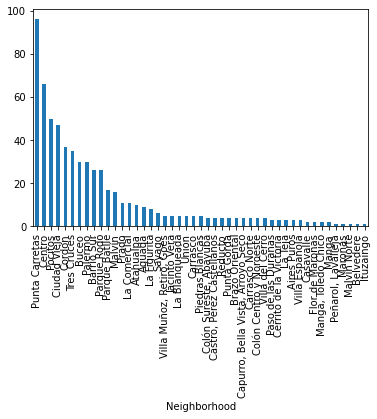

In [24]:
total_venues3.plot.bar()

# 3. Analyze Each Neighborhood

In [25]:
# encoding
mvd_encoding = pd.get_dummies(mvd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mvd_encoding['Neighborhood'] = mvd_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mvd_encoding.columns[-1]] + list(mvd_encoding.columns[:-1])
mvd_encoding = mvd_encoding[fixed_columns]

mvd_encoding.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Women's Store
0,Ciudad Vieja,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ciudad Vieja,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ciudad Vieja,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ciudad Vieja,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ciudad Vieja,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [26]:
mvd_group = mvd_encoding.groupby('Neighborhood').mean().reset_index()
mvd_group

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Wine Bar,Women's Store
0,Aguada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,0.000000,0.000000,0.000000
1,Aires Puros,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,Atahualpa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Barrio Sur,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.038462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.038462,0.000000
4,Belvedere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
5,Brazo Oriental,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.0,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,Buceo,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667
7,"Capurro, Bella Vista, Arroyo Seco",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
8,Carrasco,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
9,Carrasco Norte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


#### Let's print each neighborhood along with the top 5 most common venues


In [27]:
num_top_venues = 5

for hood in mvd_group['Neighborhood']:
    print("----"+hood+"----")
    temp = mvd_group[mvd_group['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aguada----
               venue  freq
0  Food & Drink Shop  0.11
1      Deli / Bodega  0.11
2         Restaurant  0.11
3     Ice Cream Shop  0.11
4      Train Station  0.11


----Aires Puros----
                   venue  freq
0            Pizza Place  0.33
1  General Entertainment  0.33
2                 Lounge  0.33
3    American Restaurant  0.00
4   Other Great Outdoors  0.00


----Atahualpa----
            venue  freq
0          Bakery   0.2
1    Soccer Field   0.1
2        Pharmacy   0.1
3   Grocery Store   0.1
4  Ice Cream Shop   0.1


----Barrio Sur----
               venue  freq
0         Restaurant  0.08
1  Convenience Store  0.08
2          BBQ Joint  0.08
3                Bar  0.08
4              Hotel  0.08


----Belvedere----
                           venue  freq
0                  Women's Store   1.0
1                    Pizza Place   0.0
2                      Nightclub   0.0
3           Other Great Outdoors   0.0
4  Paper / Office Supplies Store   0.0


----Brazo Or

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mvd_group['Neighborhood']

for ind in np.arange(mvd_group.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mvd_group.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aguada,Deli / Bodega,BBQ Joint,Mediterranean Restaurant,Mobile Phone Shop,Food & Drink Shop,Plaza,Restaurant,Ice Cream Shop,Train Station,Auto Garage
1,Aires Puros,Pizza Place,General Entertainment,Lounge,Fishing Spot,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Flea Market
2,Atahualpa,Bakery,Bar,Soccer Field,Ice Cream Shop,Gastropub,Gym,Grocery Store,Pizza Place,Pharmacy,Food & Drink Shop
3,Barrio Sur,Restaurant,Hotel,Convenience Store,BBQ Joint,Bar,Steakhouse,Electronics Store,Paper / Office Supplies Store,Fishing Spot,Scenic Lookout
4,Belvedere,Women's Store,Flea Market,Football Stadium,Food Truck,Food Service,Food Court,Food & Drink Shop,Food,Fishing Spot,Fried Chicken Joint


In [30]:
mvd_onlyfood = mvd_group.loc[:,['Neighborhood','Restaurant','BBQ Joint','Breakfast Spot','Health Food Store'
                                ,'Pizza Place','Latin American Restaurant','Vegetarian / Vegan Restaurant'
                                ,'Tapas Restaurant','Steakhouse','Spanish Restaurant','Italian Restaurant'
                                ,'Chinese Restaurant','Sushi Restaurant','Empanada Restaurant','Mediterranean Restaurant'
                                ,'Food','Mexican Restaurant','Japanese Restaurant','Food Truck','American Restaurant'
                                ,'Fried Chicken Joint'                              
                               ]]

mvd_onlyfood.head()

,Neighborhood,Restaurant,BBQ Joint,Breakfast Spot,Health Food Store,Pizza Place,Latin American Restaurant,Vegetarian / Vegan Restaurant,Tapas Restaurant,Steakhouse,...,Chinese Restaurant,Sushi Restaurant,Empanada Restaurant,Mediterranean Restaurant,Food,Mexican Restaurant,Japanese Restaurant,Food Truck,American Restaurant,Fried Chicken Joint
0,Aguada,0.111111,0.111111,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0
1,Aires Puros,0.000000,0.000000,0.0,0.0,0.333333,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Atahualpa,0.000000,0.000000,0.0,0.0,0.100000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Barrio Sur,0.076923,0.076923,0.0,0.0,0.000000,0.038462,0.0,0.0,0.038462,...,0.038462,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Belvedere,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 3600x36000 with 0 Axes>

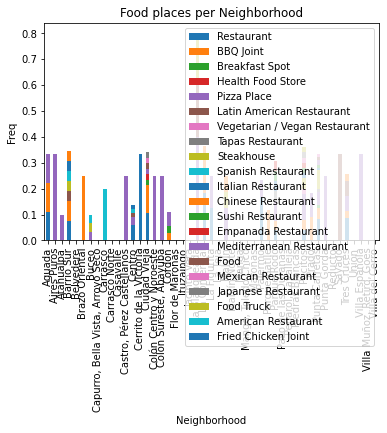

<Figure size 3600x36000 with 0 Axes>

In [31]:
mvd_onlyfood.plot(x='Neighborhood',kind="bar", stacked=True)
plt.title("Food places per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Freq")
plt.legend(loc='upper right')
plt.figure(figsize=(50,500))


# Clustering the Neighborhoods:

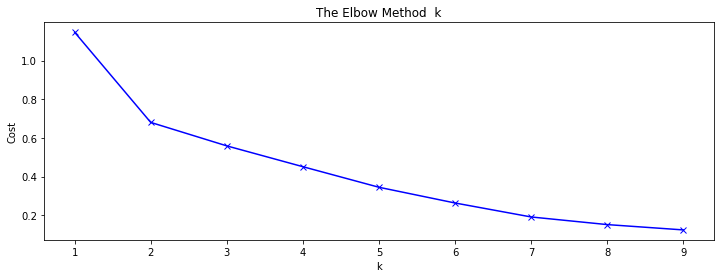

In [32]:
mvd_group_clustering = mvd_onlyfood.drop('Neighborhood', 1)

#Elbow method
cost = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(mvd_group_clustering)
    cost.append(kmeanModel.inertia_)
    
plt.figure(figsize=(12,4))
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('The Elbow Method  k')
plt.show()

#Its not so clear but lets try whit 2

In [33]:
# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(mvd_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
# add clustering labels
mvd_onlyfood.insert(0, 'Cluster Labels', kmeans.labels_)

mvd_merged = mvd_barrios

# merge mvd_barrios with manhattan_data to add latitude/longitude for each neighborhood
mvd_merged = mvd_merged.join(mvd_onlyfood.set_index('Neighborhood'), on='Barrio')

mvd_merged.head()

,Codigo,Barrio,CCZ,Municipio,Latitud,Longitud,Cluster Labels,Restaurant,BBQ Joint,Breakfast Spot,...,Chinese Restaurant,Sushi Restaurant,Empanada Restaurant,Mediterranean Restaurant,Food,Mexican Restaurant,Japanese Restaurant,Food Truck,American Restaurant,Fried Chicken Joint
0,1,Ciudad Vieja,1,B,-34.906667,-56.208333,1.0,0.106383,0.106383,0.021277,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Centro,1,B,-34.903611,-56.188333,1.0,0.060606,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Barrio Sur,1,B,-34.910694,-56.190861,1.0,0.076923,0.076923,0.000000,...,0.038462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Cordón,2,B,-34.900000,-56.178583,1.0,0.000000,0.027027,0.027027,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Palermo,2,B,-34.912111,-56.181500,1.0,0.166667,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#Vemos los barrios que no tienen servicios de comida,los eliminaremos porque no podemos hacer Cluster con Nan values.
nan_rows = mvd_merged[mvd_merged.isnull().any(1)]
#print(nan_rows) #12 en total

mvd_merged_notnan = mvd_merged.dropna(how='any')

print(mvd_merged_notnan)

    Codigo                             Barrio       CCZ Municipio    Latitud  \
0        1                       Ciudad Vieja         1         B -34.906667   
1        2                             Centro         1         B -34.903611   
2        3                         Barrio Sur         1         B -34.910694   
3        4                             Cordón         2         B -34.900000   
4        5                            Palermo         2         B -34.912111   
5        6                        Parque Rodó         2         B -34.913528   
6        7                     Punta Carretas         5    B y CH -34.921889   
7        8                            Pocitos         5        CH -34.908333   
8        9                              Buceo     5 y 7    CH y E -34.900000   
9       10                      Parque Batlle     4 y 5        CH -34.895556   
10      11                             Malvín         7         E -34.893528   
11      12                       Malvín 

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mvd_merged_notnan['Latitud'], mvd_merged_notnan['Longitud'], mvd_merged_notnan['Barrio'], mvd_merged_notnan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [37]:
mvd_merged_notnan.loc[mvd_merged_notnan['Cluster Labels'] == 0, mvd_merged_notnan.columns[[1] + list(range(5, mvd_merged_notnan.shape[1]))]]

,Barrio,Longitud,Cluster Labels,Restaurant,BBQ Joint,Breakfast Spot,Health Food Store,Pizza Place,Latin American Restaurant,Vegetarian / Vegan Restaurant,...,Chinese Restaurant,Sushi Restaurant,Empanada Restaurant,Mediterranean Restaurant,Food,Mexican Restaurant,Japanese Restaurant,Food Truck,American Restaurant,Fried Chicken Joint
12,Punta Gorda,-56.089833,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,Villa Española,-56.144722,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,"Castro, Pérez Castellanos",-56.157500,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Aires Puros,-56.188333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,La Blanqueada,-56.151444,0.0,0.0,0.0,0.0,0.0,0.400000,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
50,"Colón Sureste, Abayubá",-56.224139,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,Colón Centro y Noroeste,-56.224139,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cluster 2

In [38]:
mvd_merged_notnan.loc[mvd_merged_notnan['Cluster Labels'] == 1, mvd_merged_notnan.columns[[1] + list(range(5, mvd_merged_notnan.shape[1]))]]

,Barrio,Longitud,Cluster Labels,Restaurant,BBQ Joint,Breakfast Spot,Health Food Store,Pizza Place,Latin American Restaurant,Vegetarian / Vegan Restaurant,...,Chinese Restaurant,Sushi Restaurant,Empanada Restaurant,Mediterranean Restaurant,Food,Mexican Restaurant,Japanese Restaurant,Food Truck,American Restaurant,Fried Chicken Joint
0,Ciudad Vieja,-56.208333,1.0,0.106383,0.106383,0.021277,0.021277,0.021277,0.021277,0.021277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Centro,-56.188333,1.0,0.060606,0.000000,0.000000,0.000000,0.030303,0.015152,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Barrio Sur,-56.190861,1.0,0.076923,0.076923,0.000000,0.000000,0.000000,0.038462,0.000000,...,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Cordón,-56.178583,1.0,0.000000,0.027027,0.027027,0.000000,0.054054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Palermo,-56.181500,1.0,0.166667,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,Parque Rodó,-56.167250,1.0,0.038462,0.038462,0.000000,0.000000,0.076923,0.000000,0.000000,...,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
6,Punta Carretas,-56.159444,1.0,0.083333,0.041667,0.010417,0.000000,0.052083,0.000000,0.000000,...,0.000000,0.010417,0.000000,0.020833,0.010417,0.010417,0.00,0.000000,0.000000,0.000000
7,Pocitos,-56.150000,1.0,0.040000,0.040000,0.000000,0.000000,0.100000,0.000000,0.020000,...,0.000000,0.020000,0.020000,0.000000,0.000000,0.020000,0.02,0.020000,0.000000,0.000000
8,Buceo,-56.133056,1.0,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.033333,0.033333,0.000000
9,Parque Batlle,-56.150000,1.0,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


In [40]:
file = pd.ExcelFile('/Users/agustinposada/Desktop/Precio_m2usd_mdeo_gall.xlsx')

mvd_cost_neigh = file.parse('Hoja 1')

mvd_cost_neigh.head()

,Neighborhood,Avg Usd/m2
0,Aguada,1149
1,Aires Puros,1159
2,"Capurro, Bella Vista, Arroyo Seco",1275
3,Atahualpa,1728
4,Barra de Carrasco,2316


We merge both tables

In [41]:
mvd_merged_notnan = mvd_merged_notnan.rename(columns={'Barrio':'Neighborhood'})

mvd_merged_final = mvd_merged_notnan.merge(mvd_cost_neigh, on='Neighborhood', how='left')

mvd_merged_final.head()

,Codigo,Neighborhood,CCZ,Municipio,Latitud,Longitud,Cluster Labels,Restaurant,BBQ Joint,Breakfast Spot,...,Sushi Restaurant,Empanada Restaurant,Mediterranean Restaurant,Food,Mexican Restaurant,Japanese Restaurant,Food Truck,American Restaurant,Fried Chicken Joint,Avg Usd/m2
0,1,Ciudad Vieja,1,B,-34.906667,-56.208333,1.0,0.106383,0.106383,0.021277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,852
1,2,Centro,1,B,-34.903611,-56.188333,1.0,0.060606,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1270
2,3,Barrio Sur,1,B,-34.910694,-56.190861,1.0,0.076923,0.076923,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1558
3,4,Cordón,2,B,-34.900000,-56.178583,1.0,0.000000,0.027027,0.027027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1510
4,5,Palermo,2,B,-34.912111,-56.181500,1.0,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1618


In [42]:
only_usd_neigh = mvd_cost_neigh

#Llenamos aquellos que no tienen Datos con un promedio simple, es discutible el método pero efectivo. La idea
#es no elegirlos ya que no se tienen datos certeros pero se necesita algun valor distinto de cero
#para que el mapa final funcione

only_usd_neigh = only_usd_neigh.fillna(832)

only_usd_neigh

,Neighborhood,Avg Usd/m2
0,Aguada,1149
1,Aires Puros,1159
2,"Capurro, Bella Vista, Arroyo Seco",1275
3,Atahualpa,1728
4,Barra de Carrasco,2316
...,...,...
58,Sayago,1267
59,Tres Cruces,1470
60,Unión,1231
61,Villa Española,1120


In [43]:
mvd_merged_final = mvd_merged_final.fillna(832)

mvd_merged_final

,Codigo,Neighborhood,CCZ,Municipio,Latitud,Longitud,Cluster Labels,Restaurant,BBQ Joint,Breakfast Spot,...,Sushi Restaurant,Empanada Restaurant,Mediterranean Restaurant,Food,Mexican Restaurant,Japanese Restaurant,Food Truck,American Restaurant,Fried Chicken Joint,Avg Usd/m2
0,1,Ciudad Vieja,1,B,-34.906667,-56.208333,1.0,0.106383,0.106383,0.021277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,852
1,2,Centro,1,B,-34.903611,-56.188333,1.0,0.060606,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1270
2,3,Barrio Sur,1,B,-34.910694,-56.190861,1.0,0.076923,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1558
3,4,Cordón,2,B,-34.900000,-56.178583,1.0,0.000000,0.027027,0.027027,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1510
4,5,Palermo,2,B,-34.912111,-56.181500,1.0,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1618
5,6,Parque Rodó,2,B,-34.913528,-56.167250,1.0,0.038462,0.038462,0.000000,...,0.038462,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1959
6,7,Punta Carretas,5,B y CH,-34.921889,-56.159444,1.0,0.083333,0.041667,0.010417,...,0.010417,0.000000,0.020833,0.010417,0.010417,0.00,0.000000,0.000000,0.000000,2522
7,8,Pocitos,5,CH,-34.908333,-56.150000,1.0,0.040000,0.040000,0.000000,...,0.020000,0.020000,0.000000,0.000000,0.020000,0.02,0.020000,0.000000,0.000000,2168
8,9,Buceo,5 y 7,CH y E,-34.900000,-56.133056,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.033333,0.033333,0.000000,1997
9,10,Parque Batlle,4 y 5,CH,-34.895556,-56.150000,1.0,0.000000,0.117647,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1902


In [44]:
mvd_map = folium.Map(location=[latitude, longitude], zoom_start=11)

In [45]:
from geojson import Polygon

#https://github.com/vierja/geojson_montevideo/blob/f5280f3b289cb0c07e067e851f06e2ab0378f473/barrios.geojson 
mvd_geojson={
"type": "FeatureCollection", 
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { "id_barrio": 32, "nombre": "Manga, Toledo Chico", "codigo": "MT" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.087509, -34.779000 ], [ -56.089275, -34.780357 ], [ -56.097165, -34.784546 ], [ -56.100819, -34.786404 ], [ -56.101924, -34.786965 ], [ -56.107073, -34.789582 ], [ -56.108435, -34.789457 ], [ -56.108794, -34.789425 ], [ -56.117839, -34.793944 ], [ -56.117866, -34.794173 ], [ -56.120106, -34.798928 ], [ -56.120258, -34.799004 ], [ -56.120684, -34.799386 ], [ -56.122132, -34.800086 ], [ -56.122818, -34.800413 ], [ -56.122992, -34.800499 ], [ -56.123437, -34.800709 ], [ -56.125085, -34.801503 ], [ -56.126321, -34.800022 ], [ -56.127398, -34.798726 ], [ -56.127432, -34.798650 ], [ -56.129320, -34.798735 ], [ -56.136071, -34.799661 ], [ -56.136157, -34.799733 ], [ -56.136366, -34.800431 ], [ -56.136341, -34.799954 ], [ -56.136435, -34.799778 ], [ -56.143931, -34.800882 ], [ -56.143303, -34.803682 ], [ -56.143246, -34.803673 ], [ -56.142783, -34.806054 ], [ -56.143128, -34.806094 ], [ -56.144617, -34.806293 ], [ -56.147514, -34.806678 ], [ -56.148977, -34.806872 ], [ -56.155225, -34.807668 ], [ -56.155363, -34.807686 ], [ -56.160480, -34.808367 ], [ -56.160643, -34.808380 ], [ -56.161442, -34.808445 ], [ -56.164497, -34.808874 ], [ -56.167687, -34.811953 ], [ -56.167929, -34.812200 ], [ -56.169353, -34.813643 ], [ -56.169992, -34.814246 ], [ -56.171041, -34.815230 ], [ -56.172770, -34.816857 ], [ -56.174489, -34.818542 ], [ -56.175799, -34.819787 ], [ -56.177607, -34.821648 ], [ -56.177726, -34.821769 ], [ -56.179700, -34.823801 ], [ -56.181240, -34.825329 ], [ -56.183429, -34.827478 ], [ -56.183562, -34.827428 ], [ -56.183787, -34.827355 ], [ -56.184119, -34.827349 ], [ -56.184351, -34.827245 ], [ -56.185070, -34.826765 ], [ -56.185450, -34.826034 ], [ -56.185098, -34.825003 ], [ -56.185391, -34.824430 ], [ -56.185336, -34.823840 ], [ -56.185281, -34.823258 ], [ -56.185901, -34.822892 ], [ -56.186394, -34.822719 ], [ -56.186814, -34.822510 ], [ -56.187035, -34.822420 ], [ -56.187150, -34.822230 ], [ -56.187539, -34.822031 ], [ -56.187831, -34.821354 ], [ -56.187457, -34.820156 ], [ -56.187749, -34.819493 ], [ -56.187810, -34.818956 ], [ -56.187176, -34.818331 ], [ -56.186983, -34.817449 ], [ -56.186917, -34.817259 ], [ -56.186607, -34.816729 ], [ -56.186029, -34.816257 ], [ -56.185843, -34.816068 ], [ -56.185677, -34.815627 ], [ -56.185593, -34.815343 ], [ -56.185572, -34.815037 ], [ -56.185591, -34.814766 ], [ -56.185405, -34.814393 ], [ -56.185465, -34.814154 ], [ -56.185382, -34.813951 ], [ -56.185566, -34.813698 ], [ -56.185483, -34.813577 ], [ -56.185749, -34.813256 ], [ -56.185851, -34.812967 ], [ -56.185602, -34.812495 ], [ -56.185273, -34.812360 ], [ -56.184944, -34.812325 ], [ -56.184676, -34.812277 ], [ -56.184225, -34.811967 ], [ -56.183687, -34.811585 ], [ -56.183449, -34.811347 ], [ -56.183459, -34.811095 ], [ -56.183642, -34.810634 ], [ -56.183724, -34.810463 ], [ -56.183640, -34.810247 ], [ -56.183619, -34.810125 ], [ -56.183762, -34.809769 ], [ -56.184048, -34.809497 ], [ -56.184274, -34.809429 ], [ -56.184562, -34.809446 ], [ -56.184849, -34.809207 ], [ -56.185157, -34.809156 ], [ -56.185567, -34.808898 ], [ -56.185669, -34.808695 ], [ -56.185504, -34.808542 ], [ -56.185297, -34.808340 ], [ -56.185070, -34.808070 ], [ -56.184987, -34.807886 ], [ -56.185048, -34.807629 ], [ -56.184945, -34.807512 ], [ -56.184554, -34.807463 ], [ -56.184265, -34.807140 ], [ -56.183955, -34.806771 ], [ -56.183687, -34.806650 ], [ -56.183276, -34.806516 ], [ -56.183069, -34.806246 ], [ -56.182822, -34.806076 ], [ -56.182718, -34.805909 ], [ -56.182696, -34.805639 ], [ -56.182798, -34.805431 ], [ -56.182900, -34.805296 ], [ -56.183147, -34.805196 ], [ -56.183496, -34.805159 ], [ -56.183742, -34.805072 ], [ -56.184133, -34.804923 ], [ -56.184176, -34.804877 ], [ -56.184244, -34.804810 ], [ -56.184480, -34.804579 ], [ -56.184521, -34.804412 ], [ -56.184294, -34.804156 ], [ -56.184004, -34.803801 ], [ -56.184004, -34.803634 ], [ -56.184065, -34.803481 ], [ -56.184434, -34.803412 ], [ -56.184825, -34.803325 ], [ -56.185091, -34.803189 ], [ -56.185295, -34.802833 ], [ -56.185582, -34.802458 ], [ -56.185847, -34.802169 ], [ -56.186093, -34.801965 ], [ -56.186277, -34.801762 ], [ -56.186317, -34.801406 ], [ -56.186501, -34.801270 ], [ -56.186643, -34.800729 ], [ -56.186436, -34.800287 ], [ -56.186476, -34.800085 ], [ -56.186187, -34.799883 ], [ -56.185858, -34.799681 ], [ -56.185857, -34.799392 ], [ -56.186020, -34.799117 ], [ -56.185855, -34.798914 ], [ -56.185813, -34.798680 ], [ -56.185606, -34.798492 ], [ -56.185297, -34.798222 ], [ -56.185049, -34.797849 ], [ -56.184903, -34.797344 ], [ -56.184888, -34.797114 ], [ -56.184816, -34.796028 ], [ -56.185204, -34.795383 ], [ -56.185903, -34.794736 ], [ -56.186837, -34.794220 ], [ -56.187850, -34.793766 ], [ -56.188158, -34.792801 ], [ -56.189013, -34.792023 ], [ -56.189634, -34.791382 ], [ -56.190646, -34.790734 ], [ -56.191191, -34.790345 ], [ -56.191188, -34.789831 ], [ -56.191498, -34.789249 ], [ -56.191261, -34.788479 ], [ -56.190790, -34.787967 ], [ -56.190477, -34.787643 ], [ -56.191174, -34.786420 ], [ -56.190859, -34.785650 ], [ -56.190778, -34.784942 ], [ -56.190462, -34.784042 ], [ -56.190615, -34.783271 ], [ -56.190845, -34.782432 ], [ -56.191467, -34.781849 ], [ -56.190996, -34.781142 ], [ -56.191146, -34.779664 ], [ -56.191145, -34.779407 ], [ -56.190674, -34.778764 ], [ -56.190592, -34.777799 ], [ -56.190588, -34.776835 ], [ -56.190564, -34.776709 ], [ -56.190428, -34.775997 ], [ -56.190114, -34.775421 ], [ -56.189332, -34.774972 ], [ -56.189330, -34.774522 ], [ -56.188471, -34.774393 ], [ -56.188156, -34.773561 ], [ -56.188153, -34.772785 ], [ -56.188616, -34.771756 ], [ -56.189550, -34.771046 ], [ -56.191027, -34.769947 ], [ -56.191883, -34.769300 ], [ -56.192816, -34.768653 ], [ -56.193827, -34.768073 ], [ -56.193668, -34.767235 ], [ -56.193040, -34.766335 ], [ -56.192261, -34.766468 ], [ -56.191475, -34.765182 ], [ -56.191472, -34.764474 ], [ -56.190922, -34.763448 ], [ -56.189906, -34.763063 ], [ -56.188737, -34.763260 ], [ -56.187959, -34.763583 ], [ -56.187104, -34.764293 ], [ -56.185934, -34.764296 ], [ -56.185075, -34.764041 ], [ -56.184216, -34.763787 ], [ -56.183277, -34.763145 ], [ -56.182496, -34.762827 ], [ -56.181483, -34.762961 ], [ -56.181250, -34.763281 ], [ -56.180939, -34.763476 ], [ -56.180391, -34.762964 ], [ -56.179454, -34.762899 ], [ -56.178674, -34.762838 ], [ -56.178205, -34.762645 ], [ -56.178124, -34.761938 ], [ -56.177734, -34.761745 ], [ -56.178434, -34.761423 ], [ -56.178901, -34.761102 ], [ -56.178197, -34.760585 ], [ -56.178153, -34.760396 ], [ -56.177959, -34.759559 ], [ -56.178659, -34.759106 ], [ -56.179203, -34.758523 ], [ -56.179747, -34.758008 ], [ -56.179431, -34.757175 ], [ -56.179507, -34.756724 ], [ -56.179349, -34.756206 ], [ -56.178802, -34.755951 ], [ -56.178333, -34.755632 ], [ -56.177632, -34.755891 ], [ -56.176852, -34.755699 ], [ -56.176458, -34.754866 ], [ -56.177159, -34.754603 ], [ -56.176611, -34.754154 ], [ -56.176141, -34.753641 ], [ -56.175828, -34.753385 ], [ -56.175905, -34.752997 ], [ -56.175825, -34.752551 ], [ -56.175746, -34.752227 ], [ -56.175432, -34.751714 ], [ -56.175118, -34.751327 ], [ -56.174260, -34.751136 ], [ -56.173012, -34.751076 ], [ -56.172072, -34.750177 ], [ -56.171524, -34.749602 ], [ -56.171053, -34.748639 ], [ -56.171049, -34.747670 ], [ -56.171120, -34.747340 ], [ -56.171355, -34.746254 ], [ -56.171353, -34.745677 ], [ -56.171429, -34.745163 ], [ -56.170722, -34.743939 ], [ -56.169940, -34.743364 ], [ -56.168844, -34.742141 ], [ -56.168449, -34.740984 ], [ -56.168523, -34.739956 ], [ -56.168052, -34.739119 ], [ -56.167735, -34.737835 ], [ -56.168043, -34.736676 ], [ -56.167963, -34.736455 ], [ -56.167648, -34.735582 ], [ -56.167178, -34.735006 ], [ -56.166148, -34.734220 ], [ -56.166084, -34.734171 ], [ -56.165689, -34.733004 ], [ -56.162489, -34.728195 ], [ -56.159999, -34.723888 ], [ -56.155747, -34.721244 ], [ -56.148665, -34.717774 ], [ -56.148435, -34.717621 ], [ -56.143706, -34.714469 ], [ -56.140529, -34.715635 ], [ -56.135585, -34.716643 ], [ -56.132396, -34.714496 ], [ -56.126052, -34.718319 ], [ -56.124648, -34.721148 ], [ -56.123070, -34.724803 ], [ -56.122107, -34.726283 ], [ -56.121663, -34.726965 ], [ -56.128387, -34.729275 ], [ -56.126983, -34.732266 ], [ -56.128050, -34.734261 ], [ -56.125052, -34.736093 ], [ -56.121354, -34.740086 ], [ -56.121362, -34.742745 ], [ -56.121501, -34.743344 ], [ -56.121900, -34.745069 ], [ -56.119608, -34.746900 ], [ -56.116081, -34.749233 ], [ -56.112373, -34.750738 ], [ -56.109192, -34.751241 ], [ -56.108302, -34.751468 ], [ -56.106543, -34.751913 ], [ -56.103709, -34.750423 ], [ -56.101592, -34.751757 ], [ -56.100182, -34.753256 ], [ -56.098950, -34.754918 ], [ -56.098654, -34.755689 ], [ -56.098248, -34.756744 ], [ -56.096129, -34.757249 ], [ -56.094011, -34.758583 ], [ -56.094018, -34.760909 ], [ -56.096326, -34.764059 ], [ -56.099163, -34.766708 ], [ -56.098288, -34.769864 ], [ -56.097589, -34.772358 ], [ -56.095056, -34.775681 ], [ -56.094419, -34.776516 ], [ -56.091242, -34.778686 ], [ -56.087895, -34.778990 ], [ -56.087509, -34.779000 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 58, "nombre": "Colón Sureste, Abayubá", "codigo": "CY" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.165689, -34.733004 ], [ -56.166084, -34.734171 ], [ -56.166148, -34.734220 ], [ -56.167178, -34.735006 ], [ -56.167648, -34.735582 ], [ -56.167963, -34.736455 ], [ -56.168043, -34.736676 ], [ -56.167735, -34.737835 ], [ -56.168052, -34.739119 ], [ -56.168523, -34.739956 ], [ -56.168449, -34.740984 ], [ -56.168844, -34.742141 ], [ -56.169940, -34.743364 ], [ -56.170722, -34.743939 ], [ -56.171429, -34.745163 ], [ -56.171353, -34.745677 ], [ -56.171355, -34.746254 ], [ -56.171120, -34.747340 ], [ -56.171049, -34.747670 ], [ -56.171053, -34.748639 ], [ -56.171524, -34.749602 ], [ -56.172072, -34.750177 ], [ -56.173012, -34.751076 ], [ -56.174260, -34.751136 ], [ -56.175118, -34.751327 ], [ -56.175432, -34.751714 ], [ -56.175746, -34.752227 ], [ -56.175825, -34.752551 ], [ -56.175905, -34.752997 ], [ -56.175828, -34.753385 ], [ -56.176141, -34.753641 ], [ -56.176611, -34.754154 ], [ -56.177159, -34.754603 ], [ -56.176458, -34.754866 ], [ -56.176852, -34.755699 ], [ -56.177632, -34.755891 ], [ -56.178333, -34.755632 ], [ -56.178802, -34.755951 ], [ -56.179349, -34.756206 ], [ -56.179507, -34.756724 ], [ -56.179431, -34.757175 ], [ -56.179747, -34.758008 ], [ -56.179203, -34.758523 ], [ -56.178659, -34.759106 ], [ -56.177959, -34.759559 ], [ -56.178153, -34.760396 ], [ -56.178197, -34.760585 ], [ -56.178901, -34.761102 ], [ -56.178434, -34.761423 ], [ -56.177734, -34.761745 ], [ -56.178124, -34.761938 ], [ -56.178205, -34.762645 ], [ -56.178674, -34.762838 ], [ -56.179454, -34.762899 ], [ -56.180391, -34.762964 ], [ -56.180939, -34.763476 ], [ -56.181250, -34.763281 ], [ -56.181483, -34.762961 ], [ -56.182496, -34.762827 ], [ -56.183277, -34.763145 ], [ -56.184216, -34.763787 ], [ -56.185075, -34.764041 ], [ -56.185934, -34.764296 ], [ -56.187104, -34.764293 ], [ -56.187959, -34.763583 ], [ -56.188737, -34.763260 ], [ -56.189906, -34.763063 ], [ -56.190922, -34.763448 ], [ -56.191472, -34.764474 ], [ -56.191475, -34.765182 ], [ -56.192261, -34.766468 ], [ -56.193040, -34.766335 ], [ -56.193668, -34.767235 ], [ -56.193827, -34.768073 ], [ -56.192816, -34.768653 ], [ -56.191883, -34.769300 ], [ -56.191027, -34.769947 ], [ -56.189550, -34.771046 ], [ -56.188616, -34.771756 ], [ -56.188153, -34.772785 ], [ -56.188156, -34.773561 ], [ -56.188471, -34.774393 ], [ -56.189330, -34.774522 ], [ -56.189332, -34.774972 ], [ -56.190114, -34.775421 ], [ -56.190428, -34.775997 ], [ -56.190564, -34.776709 ], [ -56.190588, -34.776835 ], [ -56.190592, -34.777799 ], [ -56.190674, -34.778764 ], [ -56.191145, -34.779407 ], [ -56.191146, -34.779664 ], [ -56.190996, -34.781142 ], [ -56.191467, -34.781849 ], [ -56.190845, -34.782432 ], [ -56.190615, -34.783271 ], [ -56.190462, -34.784042 ], [ -56.190778, -34.784942 ], [ -56.190859, -34.785650 ], [ -56.191174, -34.786420 ], [ -56.190477, -34.787643 ], [ -56.190790, -34.787967 ], [ -56.191261, -34.788479 ], [ -56.191498, -34.789249 ], [ -56.191188, -34.789831 ], [ -56.191191, -34.790345 ], [ -56.190646, -34.790734 ], [ -56.189634, -34.791382 ], [ -56.189013, -34.792023 ], [ -56.188158, -34.792801 ], [ -56.187850, -34.793766 ], [ -56.186837, -34.794220 ], [ -56.185903, -34.794736 ], [ -56.185204, -34.795383 ], [ -56.184816, -34.796028 ], [ -56.184888, -34.797114 ], [ -56.184903, -34.797344 ], [ -56.185049, -34.797849 ], [ -56.185297, -34.798222 ], [ -56.185606, -34.798492 ], [ -56.185813, -34.798680 ], [ -56.185855, -34.798914 ], [ -56.186020, -34.799117 ], [ -56.185857, -34.799392 ], [ -56.185858, -34.799681 ], [ -56.186187, -34.799883 ], [ -56.186476, -34.800085 ], [ -56.186436, -34.800287 ], [ -56.186643, -34.800729 ], [ -56.186501, -34.801270 ], [ -56.186317, -34.801406 ], [ -56.186277, -34.801762 ], [ -56.186093, -34.801965 ], [ -56.185847, -34.802169 ], [ -56.185582, -34.802458 ], [ -56.185295, -34.802833 ], [ -56.185091, -34.803189 ], [ -56.184825, -34.803325 ], [ -56.184434, -34.803412 ], [ -56.184065, -34.803481 ], [ -56.184004, -34.803634 ], [ -56.184004, -34.803801 ], [ -56.184294, -34.804156 ], [ -56.184521, -34.804412 ], [ -56.184480, -34.804579 ], [ -56.184244, -34.804810 ], [ -56.184515, -34.804683 ], [ -56.186638, -34.803834 ], [ -56.187090, -34.803630 ], [ -56.189534, -34.802532 ], [ -56.190238, -34.802224 ], [ -56.190814, -34.802614 ], [ -56.191329, -34.802473 ], [ -56.192137, -34.802250 ], [ -56.193638, -34.802313 ], [ -56.194082, -34.802339 ], [ -56.194629, -34.802369 ], [ -56.195271, -34.802863 ], [ -56.196635, -34.803914 ], [ -56.197952, -34.804928 ], [ -56.199705, -34.806275 ], [ -56.200920, -34.807628 ], [ -56.199743, -34.808159 ], [ -56.196550, -34.809629 ], [ -56.196410, -34.809692 ], [ -56.194789, -34.810445 ], [ -56.193912, -34.810840 ], [ -56.193801, -34.810890 ], [ -56.192433, -34.811502 ], [ -56.193586, -34.813175 ], [ -56.193689, -34.813310 ], [ -56.194529, -34.814299 ], [ -56.196246, -34.816552 ], [ -56.198977, -34.815012 ], [ -56.199792, -34.814545 ], [ -56.203145, -34.812625 ], [ -56.203774, -34.812267 ], [ -56.204788, -34.811678 ], [ -56.207258, -34.810278 ], [ -56.208626, -34.809494 ], [ -56.209196, -34.809204 ], [ -56.209616, -34.810785 ], [ -56.209645, -34.810866 ], [ -56.210040, -34.811942 ], [ -56.210613, -34.813423 ], [ -56.210675, -34.813553 ], [ -56.210728, -34.813666 ], [ -56.211571, -34.814934 ], [ -56.212384, -34.816189 ], [ -56.213011, -34.817044 ], [ -56.218728, -34.813542 ], [ -56.219888, -34.812831 ], [ -56.220005, -34.811596 ], [ -56.219779, -34.811304 ], [ -56.220047, -34.811145 ], [ -56.220184, -34.809702 ], [ -56.220210, -34.809495 ], [ -56.220324, -34.808260 ], [ -56.220346, -34.808025 ], [ -56.220314, -34.807809 ], [ -56.220509, -34.807700 ], [ -56.220796, -34.804526 ], [ -56.220894, -34.803440 ], [ -56.220965, -34.802660 ], [ -56.220991, -34.802376 ], [ -56.220795, -34.802489 ], [ -56.220979, -34.800686 ], [ -56.221031, -34.800064 ], [ -56.221130, -34.799049 ], [ -56.221303, -34.798977 ], [ -56.221367, -34.798282 ], [ -56.221540, -34.796195 ], [ -56.221705, -34.795122 ], [ -56.221795, -34.794549 ], [ -56.221844, -34.793977 ], [ -56.221930, -34.792998 ], [ -56.222031, -34.791844 ], [ -56.222149, -34.790501 ], [ -56.222206, -34.789847 ], [ -56.222263, -34.789239 ], [ -56.222496, -34.786705 ], [ -56.223773, -34.786075 ], [ -56.224074, -34.786849 ], [ -56.224027, -34.785948 ], [ -56.223960, -34.784668 ], [ -56.223862, -34.782793 ], [ -56.224299, -34.780673 ], [ -56.224313, -34.780628 ], [ -56.224957, -34.778621 ], [ -56.225598, -34.776618 ], [ -56.225619, -34.776554 ], [ -56.225722, -34.776126 ], [ -56.226253, -34.773929 ], [ -56.226288, -34.773785 ], [ -56.226301, -34.773735 ], [ -56.226850, -34.771651 ], [ -56.227211, -34.770280 ], [ -56.227522, -34.768765 ], [ -56.227649, -34.768147 ], [ -56.227629, -34.767746 ], [ -56.227432, -34.767566 ], [ -56.226401, -34.767434 ], [ -56.225053, -34.766195 ], [ -56.224372, -34.766057 ], [ -56.223837, -34.765603 ], [ -56.223023, -34.765561 ], [ -56.222495, -34.765549 ], [ -56.221846, -34.764487 ], [ -56.221418, -34.763276 ], [ -56.220861, -34.762142 ], [ -56.220051, -34.761780 ], [ -56.219932, -34.759838 ], [ -56.219535, -34.759613 ], [ -56.219424, -34.759551 ], [ -56.217205, -34.755114 ], [ -56.214884, -34.749974 ], [ -56.212206, -34.744168 ], [ -56.211237, -34.742426 ], [ -56.209712, -34.739691 ], [ -56.204933, -34.734387 ], [ -56.205012, -34.733945 ], [ -56.204301, -34.733248 ], [ -56.204165, -34.732762 ], [ -56.204204, -34.732158 ], [ -56.203724, -34.731447 ], [ -56.203463, -34.730889 ], [ -56.203387, -34.730727 ], [ -56.201876, -34.729776 ], [ -56.201374, -34.728921 ], [ -56.197919, -34.726028 ], [ -56.196230, -34.724618 ], [ -56.192507, -34.721807 ], [ -56.181724, -34.721008 ], [ -56.178183, -34.719355 ], [ -56.175364, -34.721355 ], [ -56.172551, -34.725184 ], [ -56.170799, -34.729007 ], [ -56.169928, -34.732326 ], [ -56.165689, -34.733004 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 61, "nombre": "Villa García, Manga Rural", "codigo": "VG" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.125085, -34.801503 ], [ -56.123437, -34.800709 ], [ -56.122992, -34.800499 ], [ -56.122818, -34.800413 ], [ -56.122132, -34.800086 ], [ -56.120684, -34.799386 ], [ -56.120258, -34.799004 ], [ -56.120106, -34.798928 ], [ -56.117866, -34.794173 ], [ -56.117839, -34.793944 ], [ -56.108794, -34.789425 ], [ -56.108435, -34.789457 ], [ -56.107073, -34.789582 ], [ -56.101924, -34.786965 ], [ -56.100819, -34.786404 ], [ -56.097165, -34.784546 ], [ -56.089275, -34.780357 ], [ -56.087509, -34.779000 ], [ -56.084158, -34.775211 ], [ -56.077260, -34.774724 ], [ -56.074244, -34.771075 ], [ -56.070888, -34.772577 ], [ -56.070457, -34.771929 ], [ -56.067692, -34.767765 ], [ -56.066450, -34.765942 ], [ -56.064862, -34.767275 ], [ -56.063451, -34.768774 ], [ -56.060804, -34.770604 ], [ -56.059390, -34.768181 ], [ -56.058672, -34.766952 ], [ -56.056364, -34.763139 ], [ -56.054416, -34.761813 ], [ -56.050352, -34.763149 ], [ -56.047521, -34.762158 ], [ -56.043987, -34.763322 ], [ -56.040276, -34.763995 ], [ -56.037276, -34.768299 ], [ -56.035510, -34.769132 ], [ -56.033746, -34.771293 ], [ -56.032864, -34.772291 ], [ -56.032108, -34.773599 ], [ -56.031807, -34.774122 ], [ -56.030573, -34.775449 ], [ -56.030045, -34.776946 ], [ -56.028456, -34.778111 ], [ -56.028285, -34.780437 ], [ -56.029525, -34.781598 ], [ -56.034481, -34.783249 ], [ -56.032363, -34.785249 ], [ -56.036783, -34.784408 ], [ -56.037847, -34.785903 ], [ -56.038451, -34.787173 ], [ -56.038558, -34.787398 ], [ -56.039270, -34.789222 ], [ -56.042281, -34.790876 ], [ -56.044759, -34.791706 ], [ -56.042993, -34.792872 ], [ -56.041403, -34.793870 ], [ -56.041052, -34.794700 ], [ -56.041408, -34.795862 ], [ -56.039819, -34.796861 ], [ -56.039644, -34.797691 ], [ -56.042653, -34.798515 ], [ -56.042478, -34.799349 ], [ -56.041775, -34.801509 ], [ -56.040187, -34.802841 ], [ -56.042136, -34.804163 ], [ -56.040901, -34.805828 ], [ -56.045680, -34.806817 ], [ -56.046656, -34.807076 ], [ -56.053658, -34.802999 ], [ -56.059241, -34.799753 ], [ -56.063650, -34.797186 ], [ -56.067270, -34.795083 ], [ -56.070302, -34.792360 ], [ -56.070679, -34.792571 ], [ -56.071203, -34.792859 ], [ -56.072543, -34.793699 ], [ -56.080209, -34.797759 ], [ -56.079274, -34.798995 ], [ -56.079102, -34.799216 ], [ -56.078087, -34.800512 ], [ -56.076860, -34.802083 ], [ -56.075692, -34.803577 ], [ -56.079392, -34.805485 ], [ -56.083219, -34.807456 ], [ -56.086657, -34.809203 ], [ -56.087417, -34.809589 ], [ -56.087534, -34.809602 ], [ -56.087831, -34.809638 ], [ -56.088620, -34.809726 ], [ -56.088702, -34.809726 ], [ -56.088866, -34.809726 ], [ -56.090071, -34.810323 ], [ -56.091800, -34.811180 ], [ -56.095653, -34.813092 ], [ -56.096179, -34.813303 ], [ -56.100220, -34.815287 ], [ -56.102128, -34.816224 ], [ -56.102320, -34.816319 ], [ -56.102758, -34.816557 ], [ -56.104153, -34.817239 ], [ -56.104526, -34.817423 ], [ -56.105962, -34.818145 ], [ -56.112503, -34.821421 ], [ -56.112994, -34.821668 ], [ -56.113286, -34.821816 ], [ -56.117238, -34.823840 ], [ -56.117664, -34.824055 ], [ -56.118401, -34.824432 ], [ -56.118456, -34.824419 ], [ -56.119525, -34.824939 ], [ -56.119818, -34.824492 ], [ -56.121582, -34.825313 ], [ -56.121182, -34.825873 ], [ -56.120691, -34.826563 ], [ -56.120156, -34.827308 ], [ -56.119642, -34.828026 ], [ -56.120646, -34.828601 ], [ -56.121899, -34.829409 ], [ -56.122574, -34.829849 ], [ -56.123502, -34.830474 ], [ -56.123512, -34.830329 ], [ -56.124014, -34.829463 ], [ -56.125011, -34.827743 ], [ -56.126208, -34.825676 ], [ -56.126229, -34.825600 ], [ -56.126439, -34.824811 ], [ -56.126505, -34.824562 ], [ -56.126518, -34.824508 ], [ -56.126910, -34.822777 ], [ -56.127554, -34.821166 ], [ -56.128075, -34.819863 ], [ -56.128959, -34.819928 ], [ -56.129095, -34.819937 ], [ -56.129217, -34.819175 ], [ -56.129257, -34.818927 ], [ -56.129368, -34.818237 ], [ -56.129858, -34.817285 ], [ -56.130074, -34.816622 ], [ -56.130380, -34.815679 ], [ -56.131805, -34.815834 ], [ -56.131984, -34.815869 ], [ -56.133064, -34.816020 ], [ -56.133419, -34.816073 ], [ -56.133768, -34.816122 ], [ -56.135831, -34.816414 ], [ -56.136497, -34.816507 ], [ -56.135113, -34.814447 ], [ -56.133610, -34.812210 ], [ -56.132375, -34.810406 ], [ -56.132274, -34.810307 ], [ -56.130653, -34.808670 ], [ -56.130588, -34.808607 ], [ -56.129546, -34.807474 ], [ -56.129412, -34.807262 ], [ -56.128723, -34.806173 ], [ -56.127405, -34.804090 ], [ -56.126771, -34.803091 ], [ -56.126086, -34.802006 ], [ -56.125085, -34.801503 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 16, "nombre": "Bañados de Carrasco", "codigo": "BC" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.070302, -34.792360 ], [ -56.067270, -34.795083 ], [ -56.063650, -34.797186 ], [ -56.059241, -34.799753 ], [ -56.053658, -34.802999 ], [ -56.046656, -34.807076 ], [ -56.049398, -34.807806 ], [ -56.049754, -34.808802 ], [ -56.049933, -34.809798 ], [ -56.049938, -34.811627 ], [ -56.052239, -34.812453 ], [ -56.055245, -34.811781 ], [ -56.055602, -34.813110 ], [ -56.054367, -34.814441 ], [ -56.052779, -34.816107 ], [ -56.053846, -34.818264 ], [ -56.052087, -34.822085 ], [ -56.054922, -34.823905 ], [ -56.054926, -34.825568 ], [ -56.054911, -34.827632 ], [ -56.054815, -34.840721 ], [ -56.054800, -34.842686 ], [ -56.053507, -34.847281 ], [ -56.053397, -34.847669 ], [ -56.054466, -34.850155 ], [ -56.053763, -34.852148 ], [ -56.056256, -34.858120 ], [ -56.055375, -34.859947 ], [ -56.057681, -34.861606 ], [ -56.058927, -34.864425 ], [ -56.059616, -34.866664 ], [ -56.059739, -34.866519 ], [ -56.060016, -34.866658 ], [ -56.060587, -34.866941 ], [ -56.061752, -34.867516 ], [ -56.062911, -34.867893 ], [ -56.063605, -34.868175 ], [ -56.064031, -34.868310 ], [ -56.064395, -34.868422 ], [ -56.065597, -34.868798 ], [ -56.066994, -34.869233 ], [ -56.068210, -34.869614 ], [ -56.069634, -34.870233 ], [ -56.070429, -34.870137 ], [ -56.070650, -34.870159 ], [ -56.071236, -34.870181 ], [ -56.073012, -34.870119 ], [ -56.073652, -34.870104 ], [ -56.074804, -34.870079 ], [ -56.076770, -34.870035 ], [ -56.079607, -34.869971 ], [ -56.080854, -34.869941 ], [ -56.082597, -34.870253 ], [ -56.084640, -34.870619 ], [ -56.085587, -34.870757 ], [ -56.086347, -34.870922 ], [ -56.087790, -34.871194 ], [ -56.089652, -34.871546 ], [ -56.091160, -34.871877 ], [ -56.092722, -34.872185 ], [ -56.094356, -34.872299 ], [ -56.094224, -34.871835 ], [ -56.093111, -34.868880 ], [ -56.093018, -34.868624 ], [ -56.092348, -34.866755 ], [ -56.093112, -34.866568 ], [ -56.093271, -34.866983 ], [ -56.095104, -34.866618 ], [ -56.098239, -34.866003 ], [ -56.097989, -34.865427 ], [ -56.095852, -34.860546 ], [ -56.095744, -34.860303 ], [ -56.095803, -34.860285 ], [ -56.096752, -34.859927 ], [ -56.097367, -34.858884 ], [ -56.098331, -34.858549 ], [ -56.099043, -34.858416 ], [ -56.099342, -34.858434 ], [ -56.099482, -34.857983 ], [ -56.099708, -34.857784 ], [ -56.100668, -34.857895 ], [ -56.101056, -34.857714 ], [ -56.102710, -34.857782 ], [ -56.103810, -34.858010 ], [ -56.104331, -34.858211 ], [ -56.104553, -34.858215 ], [ -56.104711, -34.858495 ], [ -56.105287, -34.858651 ], [ -56.105499, -34.858727 ], [ -56.105689, -34.858722 ], [ -56.105808, -34.858794 ], [ -56.106157, -34.858753 ], [ -56.106424, -34.858991 ], [ -56.106484, -34.859023 ], [ -56.106548, -34.859054 ], [ -56.106979, -34.858909 ], [ -56.106988, -34.858823 ], [ -56.107219, -34.858665 ], [ -56.107750, -34.858479 ], [ -56.108166, -34.858487 ], [ -56.108316, -34.858568 ], [ -56.108650, -34.858617 ], [ -56.109613, -34.858574 ], [ -56.110386, -34.858221 ], [ -56.110662, -34.857652 ], [ -56.110651, -34.857405 ], [ -56.111006, -34.856800 ], [ -56.111417, -34.856100 ], [ -56.111972, -34.855946 ], [ -56.112347, -34.855945 ], [ -56.112698, -34.856242 ], [ -56.112855, -34.856679 ], [ -56.113193, -34.856380 ], [ -56.113593, -34.856100 ], [ -56.113927, -34.855991 ], [ -56.114119, -34.855946 ], [ -56.114069, -34.855373 ], [ -56.113976, -34.854535 ], [ -56.113863, -34.853503 ], [ -56.113647, -34.851548 ], [ -56.114642, -34.851248 ], [ -56.115045, -34.851121 ], [ -56.115122, -34.851098 ], [ -56.115210, -34.851004 ], [ -56.114718, -34.849517 ], [ -56.114564, -34.849495 ], [ -56.114264, -34.848581 ], [ -56.114368, -34.848427 ], [ -56.114089, -34.847594 ], [ -56.114050, -34.847428 ], [ -56.114008, -34.847302 ], [ -56.113878, -34.846910 ], [ -56.113777, -34.846608 ], [ -56.113653, -34.846239 ], [ -56.113591, -34.846095 ], [ -56.112549, -34.846412 ], [ -56.112417, -34.846268 ], [ -56.111958, -34.845364 ], [ -56.113114, -34.845000 ], [ -56.113616, -34.844842 ], [ -56.114326, -34.844628 ], [ -56.115385, -34.844315 ], [ -56.116208, -34.844038 ], [ -56.117089, -34.843743 ], [ -56.118141, -34.843425 ], [ -56.120055, -34.842844 ], [ -56.120267, -34.842781 ], [ -56.121991, -34.842326 ], [ -56.122124, -34.842290 ], [ -56.123676, -34.842106 ], [ -56.124199, -34.841465 ], [ -56.124124, -34.841442 ], [ -56.123906, -34.841316 ], [ -56.122286, -34.840365 ], [ -56.121965, -34.840163 ], [ -56.120650, -34.839359 ], [ -56.120264, -34.839121 ], [ -56.119168, -34.838488 ], [ -56.118507, -34.838066 ], [ -56.117984, -34.837729 ], [ -56.116823, -34.837060 ], [ -56.116684, -34.836984 ], [ -56.115426, -34.836274 ], [ -56.114233, -34.835569 ], [ -56.112993, -34.834878 ], [ -56.111987, -34.834267 ], [ -56.111590, -34.834115 ], [ -56.110486, -34.834464 ], [ -56.110051, -34.834573 ], [ -56.107983, -34.835200 ], [ -56.107004, -34.835518 ], [ -56.106675, -34.834874 ], [ -56.106159, -34.834370 ], [ -56.106104, -34.834298 ], [ -56.105759, -34.833938 ], [ -56.105578, -34.833384 ], [ -56.105418, -34.833141 ], [ -56.104954, -34.832876 ], [ -56.104526, -34.832877 ], [ -56.104324, -34.832968 ], [ -56.104224, -34.832855 ], [ -56.104075, -34.832743 ], [ -56.103900, -34.832694 ], [ -56.103453, -34.832672 ], [ -56.103291, -34.832614 ], [ -56.103278, -34.832560 ], [ -56.103290, -34.832501 ], [ -56.103315, -34.832366 ], [ -56.103289, -34.832078 ], [ -56.103301, -34.831906 ], [ -56.103077, -34.831844 ], [ -56.103225, -34.831546 ], [ -56.104705, -34.830385 ], [ -56.102522, -34.829172 ], [ -56.102244, -34.829020 ], [ -56.101790, -34.828768 ], [ -56.101119, -34.828391 ], [ -56.100758, -34.828189 ], [ -56.098769, -34.827048 ], [ -56.097198, -34.828057 ], [ -56.095729, -34.827257 ], [ -56.093934, -34.826243 ], [ -56.093830, -34.826225 ], [ -56.093343, -34.826154 ], [ -56.092818, -34.826011 ], [ -56.092501, -34.825921 ], [ -56.090739, -34.825212 ], [ -56.084709, -34.822791 ], [ -56.080432, -34.821059 ], [ -56.079950, -34.820709 ], [ -56.079562, -34.820610 ], [ -56.078978, -34.820228 ], [ -56.079171, -34.819656 ], [ -56.079830, -34.819618 ], [ -56.080489, -34.819202 ], [ -56.081187, -34.819043 ], [ -56.081378, -34.817826 ], [ -56.081183, -34.817475 ], [ -56.080949, -34.817250 ], [ -56.080444, -34.817219 ], [ -56.080305, -34.817044 ], [ -56.081117, -34.816114 ], [ -56.081549, -34.815622 ], [ -56.082715, -34.815178 ], [ -56.083947, -34.814653 ], [ -56.083998, -34.814621 ], [ -56.084632, -34.814232 ], [ -56.084990, -34.813898 ], [ -56.085324, -34.813401 ], [ -56.085411, -34.813271 ], [ -56.085604, -34.813130 ], [ -56.086185, -34.812868 ], [ -56.087136, -34.812699 ], [ -56.087776, -34.812310 ], [ -56.087947, -34.812278 ], [ -56.088123, -34.812062 ], [ -56.088360, -34.811205 ], [ -56.088213, -34.810876 ], [ -56.087540, -34.810278 ], [ -56.087385, -34.809949 ], [ -56.087417, -34.809589 ], [ -56.086657, -34.809203 ], [ -56.083219, -34.807456 ], [ -56.079392, -34.805485 ], [ -56.075692, -34.803577 ], [ -56.076860, -34.802083 ], [ -56.078087, -34.800512 ], [ -56.079102, -34.799216 ], [ -56.079274, -34.798995 ], [ -56.080209, -34.797759 ], [ -56.072543, -34.793699 ], [ -56.071203, -34.792859 ], [ -56.070679, -34.792571 ], [ -56.070302, -34.792360 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 62, "nombre": "Manga", "codigo": "MG" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.167687, -34.811953 ], [ -56.164497, -34.808874 ], [ -56.161442, -34.808445 ], [ -56.160643, -34.808380 ], [ -56.160480, -34.808367 ], [ -56.155363, -34.807686 ], [ -56.155225, -34.807668 ], [ -56.148977, -34.806872 ], [ -56.147514, -34.806678 ], [ -56.144617, -34.806293 ], [ -56.143128, -34.806094 ], [ -56.142783, -34.806054 ], [ -56.143246, -34.803673 ], [ -56.143303, -34.803682 ], [ -56.143931, -34.800882 ], [ -56.136435, -34.799778 ], [ -56.136341, -34.799954 ], [ -56.136366, -34.800431 ], [ -56.136157, -34.799733 ], [ -56.136071, -34.799661 ], [ -56.129320, -34.798735 ], [ -56.127432, -34.798650 ], [ -56.127398, -34.798726 ], [ -56.126321, -34.800022 ], [ -56.125085, -34.801503 ], [ -56.126086, -34.802006 ], [ -56.126771, -34.803091 ], [ -56.127405, -34.804090 ], [ -56.128723, -34.806173 ], [ -56.129412, -34.807262 ], [ -56.129546, -34.807474 ], [ -56.130588, -34.808607 ], [ -56.130653, -34.808670 ], [ -56.132274, -34.810307 ], [ -56.132375, -34.810406 ], [ -56.133610, -34.812210 ], [ -56.135113, -34.814447 ], [ -56.136497, -34.816507 ], [ -56.137564, -34.816654 ], [ -56.139186, -34.816880 ], [ -56.139198, -34.816943 ], [ -56.140623, -34.817124 ], [ -56.141167, -34.817195 ], [ -56.141374, -34.817221 ], [ -56.141830, -34.817274 ], [ -56.143002, -34.817416 ], [ -56.143836, -34.817549 ], [ -56.144120, -34.817584 ], [ -56.145049, -34.817708 ], [ -56.145141, -34.817694 ], [ -56.146218, -34.817561 ], [ -56.147249, -34.817680 ], [ -56.147785, -34.817742 ], [ -56.148175, -34.817786 ], [ -56.148812, -34.817856 ], [ -56.149072, -34.817887 ], [ -56.149321, -34.817905 ], [ -56.150045, -34.817957 ], [ -56.151284, -34.818130 ], [ -56.152145, -34.818249 ], [ -56.153626, -34.818493 ], [ -56.153928, -34.818542 ], [ -56.154970, -34.818679 ], [ -56.156465, -34.818878 ], [ -56.156759, -34.818895 ], [ -56.156479, -34.819653 ], [ -56.155949, -34.821160 ], [ -56.155787, -34.821800 ], [ -56.157066, -34.821923 ], [ -56.157604, -34.822003 ], [ -56.158225, -34.822092 ], [ -56.160665, -34.822450 ], [ -56.162108, -34.822663 ], [ -56.162669, -34.822743 ], [ -56.163716, -34.822898 ], [ -56.164628, -34.823076 ], [ -56.165301, -34.823173 ], [ -56.165876, -34.823275 ], [ -56.168343, -34.823706 ], [ -56.168879, -34.823754 ], [ -56.168889, -34.823695 ], [ -56.168923, -34.823163 ], [ -56.169067, -34.820765 ], [ -56.168963, -34.820144 ], [ -56.168588, -34.818351 ], [ -56.168194, -34.816468 ], [ -56.168127, -34.814868 ], [ -56.168124, -34.814800 ], [ -56.168002, -34.814008 ], [ -56.167915, -34.813435 ], [ -56.167687, -34.811953 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 34, "nombre": "Peñarol, Lavalleja", "codigo": "PJ" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.219888, -34.812831 ], [ -56.218728, -34.813542 ], [ -56.213011, -34.817044 ], [ -56.212384, -34.816189 ], [ -56.211571, -34.814934 ], [ -56.210728, -34.813666 ], [ -56.210675, -34.813553 ], [ -56.210613, -34.813423 ], [ -56.210040, -34.811942 ], [ -56.209645, -34.810866 ], [ -56.209616, -34.810785 ], [ -56.209196, -34.809204 ], [ -56.208626, -34.809494 ], [ -56.207258, -34.810278 ], [ -56.204788, -34.811678 ], [ -56.203774, -34.812267 ], [ -56.203145, -34.812625 ], [ -56.199792, -34.814545 ], [ -56.198977, -34.815012 ], [ -56.196246, -34.816552 ], [ -56.194529, -34.814299 ], [ -56.193689, -34.813310 ], [ -56.193586, -34.813175 ], [ -56.192433, -34.811502 ], [ -56.193801, -34.810890 ], [ -56.193912, -34.810840 ], [ -56.194789, -34.810445 ], [ -56.196410, -34.809692 ], [ -56.196550, -34.809629 ], [ -56.199743, -34.808159 ], [ -56.200920, -34.807628 ], [ -56.199705, -34.806275 ], [ -56.197952, -34.804928 ], [ -56.196635, -34.803914 ], [ -56.195271, -34.802863 ], [ -56.194629, -34.802369 ], [ -56.194082, -34.802339 ], [ -56.193638, -34.802313 ], [ -56.192137, -34.802250 ], [ -56.191329, -34.802473 ], [ -56.190814, -34.802614 ], [ -56.190238, -34.802224 ], [ -56.189534, -34.802532 ], [ -56.187090, -34.803630 ], [ -56.186638, -34.803834 ], [ -56.184515, -34.804683 ], [ -56.184244, -34.804810 ], [ -56.184176, -34.804877 ], [ -56.184133, -34.804923 ], [ -56.183742, -34.805072 ], [ -56.183496, -34.805159 ], [ -56.183147, -34.805196 ], [ -56.182900, -34.805296 ], [ -56.182798, -34.805431 ], [ -56.182696, -34.805639 ], [ -56.182718, -34.805909 ], [ -56.182822, -34.806076 ], [ -56.183069, -34.806246 ], [ -56.183276, -34.806516 ], [ -56.183687, -34.806650 ], [ -56.183955, -34.806771 ], [ -56.184265, -34.807140 ], [ -56.184554, -34.807463 ], [ -56.184945, -34.807512 ], [ -56.185048, -34.807629 ], [ -56.184987, -34.807886 ], [ -56.185070, -34.808070 ], [ -56.185297, -34.808340 ], [ -56.185504, -34.808542 ], [ -56.185669, -34.808695 ], [ -56.185567, -34.808898 ], [ -56.185157, -34.809156 ], [ -56.184849, -34.809207 ], [ -56.184562, -34.809446 ], [ -56.184274, -34.809429 ], [ -56.184048, -34.809497 ], [ -56.183762, -34.809769 ], [ -56.183619, -34.810125 ], [ -56.183640, -34.810247 ], [ -56.183724, -34.810463 ], [ -56.183642, -34.810634 ], [ -56.183459, -34.811095 ], [ -56.183449, -34.811347 ], [ -56.183687, -34.811585 ], [ -56.184225, -34.811967 ], [ -56.184676, -34.812277 ], [ -56.184944, -34.812325 ], [ -56.185273, -34.812360 ], [ -56.185602, -34.812495 ], [ -56.185851, -34.812967 ], [ -56.185749, -34.813256 ], [ -56.185483, -34.813577 ], [ -56.185566, -34.813698 ], [ -56.185382, -34.813951 ], [ -56.185465, -34.814154 ], [ -56.185405, -34.814393 ], [ -56.185591, -34.814766 ], [ -56.185572, -34.815037 ], [ -56.185593, -34.815343 ], [ -56.185677, -34.815627 ], [ -56.185843, -34.816068 ], [ -56.186029, -34.816257 ], [ -56.186607, -34.816729 ], [ -56.186917, -34.817259 ], [ -56.186983, -34.817449 ], [ -56.187176, -34.818331 ], [ -56.187810, -34.818956 ], [ -56.187749, -34.819493 ], [ -56.187457, -34.820156 ], [ -56.187831, -34.821354 ], [ -56.187539, -34.822031 ], [ -56.187150, -34.822230 ], [ -56.187035, -34.822420 ], [ -56.186814, -34.822510 ], [ -56.186394, -34.822719 ], [ -56.185901, -34.822892 ], [ -56.185281, -34.823258 ], [ -56.185336, -34.823840 ], [ -56.185391, -34.824430 ], [ -56.185098, -34.825003 ], [ -56.185450, -34.826034 ], [ -56.185070, -34.826765 ], [ -56.184351, -34.827245 ], [ -56.184119, -34.827349 ], [ -56.183787, -34.827355 ], [ -56.183562, -34.827428 ], [ -56.183429, -34.827478 ], [ -56.183052, -34.827623 ], [ -56.182516, -34.828057 ], [ -56.182285, -34.828283 ], [ -56.182254, -34.828738 ], [ -56.182354, -34.829049 ], [ -56.182108, -34.829870 ], [ -56.182224, -34.830059 ], [ -56.182340, -34.830171 ], [ -56.182479, -34.830229 ], [ -56.182502, -34.830401 ], [ -56.182550, -34.830702 ], [ -56.182412, -34.830820 ], [ -56.182413, -34.831027 ], [ -56.182575, -34.831275 ], [ -56.182530, -34.831388 ], [ -56.182576, -34.831559 ], [ -56.182692, -34.831694 ], [ -56.182786, -34.831919 ], [ -56.182810, -34.832130 ], [ -56.182879, -34.832207 ], [ -56.182949, -34.832337 ], [ -56.183042, -34.832490 ], [ -56.183158, -34.832661 ], [ -56.183484, -34.833327 ], [ -56.183054, -34.833797 ], [ -56.182991, -34.833825 ], [ -56.181912, -34.834905 ], [ -56.181656, -34.835307 ], [ -56.181275, -34.836434 ], [ -56.181251, -34.836854 ], [ -56.181226, -34.837304 ], [ -56.181279, -34.837557 ], [ -56.181545, -34.837975 ], [ -56.181739, -34.838177 ], [ -56.181975, -34.838231 ], [ -56.182318, -34.838063 ], [ -56.182662, -34.838103 ], [ -56.183233, -34.838714 ], [ -56.183020, -34.839233 ], [ -56.182711, -34.839820 ], [ -56.183221, -34.840246 ], [ -56.183886, -34.840695 ], [ -56.184185, -34.841068 ], [ -56.184931, -34.841661 ], [ -56.185670, -34.842209 ], [ -56.185999, -34.842456 ], [ -56.186645, -34.843117 ], [ -56.186839, -34.843535 ], [ -56.186989, -34.843859 ], [ -56.187014, -34.844986 ], [ -56.186996, -34.845550 ], [ -56.187703, -34.846359 ], [ -56.188448, -34.846803 ], [ -56.188924, -34.846973 ], [ -56.189002, -34.847000 ], [ -56.189133, -34.847049 ], [ -56.190177, -34.846879 ], [ -56.190657, -34.846481 ], [ -56.191601, -34.846397 ], [ -56.192426, -34.846674 ], [ -56.193211, -34.847037 ], [ -56.193630, -34.847189 ], [ -56.193877, -34.847044 ], [ -56.194030, -34.846931 ], [ -56.194408, -34.846723 ], [ -56.195055, -34.846329 ], [ -56.195431, -34.846093 ], [ -56.196004, -34.845740 ], [ -56.196407, -34.845482 ], [ -56.196958, -34.845133 ], [ -56.197472, -34.844803 ], [ -56.198406, -34.844210 ], [ -56.198663, -34.844047 ], [ -56.198544, -34.843966 ], [ -56.197783, -34.843211 ], [ -56.196951, -34.842389 ], [ -56.196244, -34.841670 ], [ -56.196957, -34.841230 ], [ -56.196980, -34.841145 ], [ -56.197141, -34.841113 ], [ -56.197201, -34.841018 ], [ -56.197339, -34.841009 ], [ -56.197400, -34.840891 ], [ -56.197522, -34.840891 ], [ -56.199233, -34.839854 ], [ -56.199280, -34.839786 ], [ -56.199367, -34.839786 ], [ -56.201070, -34.838767 ], [ -56.201032, -34.837712 ], [ -56.200999, -34.837135 ], [ -56.200940, -34.836085 ], [ -56.200876, -34.834932 ], [ -56.201110, -34.834791 ], [ -56.202457, -34.833994 ], [ -56.203635, -34.833301 ], [ -56.205423, -34.832241 ], [ -56.206681, -34.831503 ], [ -56.206787, -34.831340 ], [ -56.207538, -34.830905 ], [ -56.208427, -34.830393 ], [ -56.209288, -34.829900 ], [ -56.210177, -34.829388 ], [ -56.210737, -34.829634 ], [ -56.211131, -34.829795 ], [ -56.211667, -34.830019 ], [ -56.212067, -34.830180 ], [ -56.212369, -34.830305 ], [ -56.212646, -34.830417 ], [ -56.213694, -34.830833 ], [ -56.214079, -34.831048 ], [ -56.214219, -34.830975 ], [ -56.214470, -34.830776 ], [ -56.214824, -34.830573 ], [ -56.215114, -34.830409 ], [ -56.215656, -34.830101 ], [ -56.215944, -34.829938 ], [ -56.216396, -34.829680 ], [ -56.216616, -34.829553 ], [ -56.216857, -34.829417 ], [ -56.217603, -34.828973 ], [ -56.217952, -34.828765 ], [ -56.217893, -34.828679 ], [ -56.217850, -34.828612 ], [ -56.217804, -34.828549 ], [ -56.217757, -34.828490 ], [ -56.217709, -34.828427 ], [ -56.217660, -34.828364 ], [ -56.217609, -34.828306 ], [ -56.217557, -34.828248 ], [ -56.217504, -34.828189 ], [ -56.217449, -34.828131 ], [ -56.217394, -34.828072 ], [ -56.217337, -34.828018 ], [ -56.217279, -34.827960 ], [ -56.217219, -34.827906 ], [ -56.217159, -34.827852 ], [ -56.217097, -34.827798 ], [ -56.217035, -34.827749 ], [ -56.216971, -34.827695 ], [ -56.216906, -34.827646 ], [ -56.216840, -34.827596 ], [ -56.216774, -34.827547 ], [ -56.216706, -34.827502 ], [ -56.216637, -34.827457 ], [ -56.216567, -34.827408 ], [ -56.216496, -34.827367 ], [ -56.216425, -34.827327 ], [ -56.216355, -34.827287 ], [ -56.216300, -34.827255 ], [ -56.216246, -34.827229 ], [ -56.216191, -34.827197 ], [ -56.216135, -34.827170 ], [ -56.216079, -34.827143 ], [ -56.216021, -34.827117 ], [ -56.215964, -34.827090 ], [ -56.215906, -34.827067 ], [ -56.215847, -34.827040 ], [ -56.215788, -34.827018 ], [ -56.215728, -34.826996 ], [ -56.215669, -34.826973 ], [ -56.215608, -34.826956 ], [ -56.215547, -34.826933 ], [ -56.215486, -34.826915 ], [ -56.215424, -34.826897 ], [ -56.215362, -34.826880 ], [ -56.215300, -34.826862 ], [ -56.215237, -34.826848 ], [ -56.215174, -34.826826 ], [ -56.215110, -34.826822 ], [ -56.215046, -34.826809 ], [ -56.214983, -34.826795 ], [ -56.214919, -34.826786 ], [ -56.214854, -34.826773 ], [ -56.214735, -34.826760 ], [ -56.216512, -34.825718 ], [ -56.219005, -34.824250 ], [ -56.218982, -34.823984 ], [ -56.219117, -34.822523 ], [ -56.219291, -34.820702 ], [ -56.219349, -34.820093 ], [ -56.220219, -34.819577 ], [ -56.220094, -34.819591 ], [ -56.220327, -34.816899 ], [ -56.220530, -34.814650 ], [ -56.220604, -34.813762 ], [ -56.220706, -34.812328 ], [ -56.219888, -34.812831 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 30, "nombre": "Casavalle", "codigo": "CV" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.167687, -34.811953 ], [ -56.167915, -34.813435 ], [ -56.168002, -34.814008 ], [ -56.168124, -34.814800 ], [ -56.168127, -34.814868 ], [ -56.168194, -34.816468 ], [ -56.168588, -34.818351 ], [ -56.168963, -34.820144 ], [ -56.169067, -34.820765 ], [ -56.168923, -34.823163 ], [ -56.168889, -34.823695 ], [ -56.168879, -34.823754 ], [ -56.168343, -34.823706 ], [ -56.165876, -34.823275 ], [ -56.165301, -34.823173 ], [ -56.164628, -34.823076 ], [ -56.163716, -34.822898 ], [ -56.162669, -34.822743 ], [ -56.162108, -34.822663 ], [ -56.160665, -34.822450 ], [ -56.158225, -34.822092 ], [ -56.157604, -34.822003 ], [ -56.157066, -34.821923 ], [ -56.155787, -34.821800 ], [ -56.155315, -34.823677 ], [ -56.152603, -34.823494 ], [ -56.152473, -34.823481 ], [ -56.151315, -34.823407 ], [ -56.151206, -34.823399 ], [ -56.149961, -34.823312 ], [ -56.149260, -34.823268 ], [ -56.147911, -34.823186 ], [ -56.147701, -34.823209 ], [ -56.147525, -34.824665 ], [ -56.148092, -34.824704 ], [ -56.148788, -34.824752 ], [ -56.148608, -34.825848 ], [ -56.148367, -34.827106 ], [ -56.148202, -34.828026 ], [ -56.149322, -34.828172 ], [ -56.149981, -34.828256 ], [ -56.150608, -34.828340 ], [ -56.154614, -34.828731 ], [ -56.154515, -34.829357 ], [ -56.154387, -34.830164 ], [ -56.154334, -34.830498 ], [ -56.154192, -34.831427 ], [ -56.152710, -34.832846 ], [ -56.151787, -34.833727 ], [ -56.151737, -34.833795 ], [ -56.152017, -34.833826 ], [ -56.153493, -34.833966 ], [ -56.155417, -34.834178 ], [ -56.156536, -34.834292 ], [ -56.157403, -34.834375 ], [ -56.157934, -34.834433 ], [ -56.159114, -34.834565 ], [ -56.159428, -34.834586 ], [ -56.160438, -34.834687 ], [ -56.161449, -34.834793 ], [ -56.162461, -34.834903 ], [ -56.162463, -34.835259 ], [ -56.162427, -34.836345 ], [ -56.162406, -34.837197 ], [ -56.162405, -34.837260 ], [ -56.162859, -34.837800 ], [ -56.163036, -34.838011 ], [ -56.163250, -34.838141 ], [ -56.165696, -34.838446 ], [ -56.165870, -34.838468 ], [ -56.168014, -34.838746 ], [ -56.168393, -34.838894 ], [ -56.168291, -34.838480 ], [ -56.168318, -34.837064 ], [ -56.168322, -34.836821 ], [ -56.168327, -34.836533 ], [ -56.168293, -34.835519 ], [ -56.168914, -34.835594 ], [ -56.170439, -34.835738 ], [ -56.170161, -34.837186 ], [ -56.170049, -34.837772 ], [ -56.169974, -34.838223 ], [ -56.171382, -34.840518 ], [ -56.171420, -34.840576 ], [ -56.172097, -34.841688 ], [ -56.172692, -34.842659 ], [ -56.173287, -34.843636 ], [ -56.173872, -34.844594 ], [ -56.174431, -34.845512 ], [ -56.175156, -34.846705 ], [ -56.175873, -34.847807 ], [ -56.176132, -34.848009 ], [ -56.176575, -34.847561 ], [ -56.177957, -34.846755 ], [ -56.179918, -34.845610 ], [ -56.182489, -34.844188 ], [ -56.184438, -34.843042 ], [ -56.185670, -34.842209 ], [ -56.184931, -34.841661 ], [ -56.184185, -34.841068 ], [ -56.183886, -34.840695 ], [ -56.183221, -34.840246 ], [ -56.182711, -34.839820 ], [ -56.183020, -34.839233 ], [ -56.183233, -34.838714 ], [ -56.182662, -34.838103 ], [ -56.182318, -34.838063 ], [ -56.181975, -34.838231 ], [ -56.181739, -34.838177 ], [ -56.181545, -34.837975 ], [ -56.181279, -34.837557 ], [ -56.181226, -34.837304 ], [ -56.181251, -34.836854 ], [ -56.181275, -34.836434 ], [ -56.181656, -34.835307 ], [ -56.181912, -34.834905 ], [ -56.182991, -34.833825 ], [ -56.183054, -34.833797 ], [ -56.183484, -34.833327 ], [ -56.183158, -34.832661 ], [ -56.183042, -34.832490 ], [ -56.182949, -34.832337 ], [ -56.182879, -34.832207 ], [ -56.182810, -34.832130 ], [ -56.182786, -34.831919 ], [ -56.182692, -34.831694 ], [ -56.182576, -34.831559 ], [ -56.182530, -34.831388 ], [ -56.182575, -34.831275 ], [ -56.182413, -34.831027 ], [ -56.182412, -34.830820 ], [ -56.182550, -34.830702 ], [ -56.182502, -34.830401 ], [ -56.182479, -34.830229 ], [ -56.182340, -34.830171 ], [ -56.182224, -34.830059 ], [ -56.182108, -34.829870 ], [ -56.182354, -34.829049 ], [ -56.182254, -34.828738 ], [ -56.182285, -34.828283 ], [ -56.182516, -34.828057 ], [ -56.183052, -34.827623 ], [ -56.183429, -34.827478 ], [ -56.181240, -34.825329 ], [ -56.179700, -34.823801 ], [ -56.177726, -34.821769 ], [ -56.177607, -34.821648 ], [ -56.175799, -34.819787 ], [ -56.174489, -34.818542 ], [ -56.172770, -34.816857 ], [ -56.171041, -34.815230 ], [ -56.169992, -34.814246 ], [ -56.169353, -34.813643 ], [ -56.167929, -34.812200 ], [ -56.167687, -34.811953 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 31, "nombre": "Piedras Blancas", "codigo": "PI" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.155787, -34.821800 ], [ -56.155949, -34.821160 ], [ -56.156479, -34.819653 ], [ -56.156759, -34.818895 ], [ -56.156465, -34.818878 ], [ -56.154970, -34.818679 ], [ -56.153928, -34.818542 ], [ -56.153626, -34.818493 ], [ -56.152145, -34.818249 ], [ -56.151284, -34.818130 ], [ -56.150045, -34.817957 ], [ -56.149321, -34.817905 ], [ -56.149072, -34.817887 ], [ -56.148812, -34.817856 ], [ -56.148175, -34.817786 ], [ -56.147785, -34.817742 ], [ -56.147249, -34.817680 ], [ -56.146218, -34.817561 ], [ -56.145141, -34.817694 ], [ -56.145049, -34.817708 ], [ -56.144120, -34.817584 ], [ -56.143836, -34.817549 ], [ -56.143002, -34.817416 ], [ -56.141830, -34.817274 ], [ -56.141374, -34.817221 ], [ -56.141167, -34.817195 ], [ -56.140623, -34.817124 ], [ -56.139198, -34.816943 ], [ -56.139186, -34.816880 ], [ -56.137564, -34.816654 ], [ -56.136497, -34.816507 ], [ -56.135831, -34.816414 ], [ -56.133768, -34.816122 ], [ -56.133419, -34.816073 ], [ -56.133064, -34.816020 ], [ -56.131984, -34.815869 ], [ -56.131805, -34.815834 ], [ -56.130380, -34.815679 ], [ -56.130074, -34.816622 ], [ -56.129858, -34.817285 ], [ -56.129368, -34.818237 ], [ -56.129257, -34.818927 ], [ -56.129217, -34.819175 ], [ -56.129095, -34.819937 ], [ -56.128959, -34.819928 ], [ -56.128075, -34.819863 ], [ -56.127554, -34.821166 ], [ -56.126910, -34.822777 ], [ -56.126518, -34.824508 ], [ -56.126505, -34.824562 ], [ -56.126439, -34.824811 ], [ -56.126229, -34.825600 ], [ -56.128511, -34.825833 ], [ -56.128279, -34.827294 ], [ -56.128108, -34.827276 ], [ -56.127067, -34.827085 ], [ -56.126398, -34.828200 ], [ -56.127510, -34.828409 ], [ -56.128246, -34.828511 ], [ -56.128933, -34.828604 ], [ -56.129071, -34.828527 ], [ -56.130741, -34.828726 ], [ -56.130801, -34.828730 ], [ -56.132110, -34.828885 ], [ -56.132296, -34.828903 ], [ -56.132284, -34.828979 ], [ -56.134370, -34.829213 ], [ -56.134940, -34.829275 ], [ -56.135974, -34.829390 ], [ -56.136965, -34.829500 ], [ -56.138254, -34.829641 ], [ -56.139510, -34.829778 ], [ -56.139945, -34.829826 ], [ -56.140713, -34.829924 ], [ -56.140760, -34.829414 ], [ -56.140771, -34.829009 ], [ -56.140781, -34.828860 ], [ -56.140975, -34.828638 ], [ -56.141362, -34.829178 ], [ -56.142112, -34.830100 ], [ -56.142195, -34.830204 ], [ -56.142814, -34.830978 ], [ -56.143865, -34.832251 ], [ -56.144243, -34.832709 ], [ -56.144454, -34.832988 ], [ -56.145193, -34.833095 ], [ -56.146003, -34.833178 ], [ -56.146852, -34.833271 ], [ -56.147369, -34.833324 ], [ -56.148413, -34.833438 ], [ -56.149283, -34.833535 ], [ -56.149904, -34.833601 ], [ -56.150510, -34.833667 ], [ -56.151737, -34.833795 ], [ -56.151787, -34.833727 ], [ -56.152710, -34.832846 ], [ -56.154192, -34.831427 ], [ -56.154334, -34.830498 ], [ -56.154387, -34.830164 ], [ -56.154515, -34.829357 ], [ -56.154614, -34.828731 ], [ -56.150608, -34.828340 ], [ -56.149981, -34.828256 ], [ -56.149322, -34.828172 ], [ -56.148202, -34.828026 ], [ -56.148367, -34.827106 ], [ -56.148608, -34.825848 ], [ -56.148788, -34.824752 ], [ -56.148092, -34.824704 ], [ -56.147525, -34.824665 ], [ -56.147701, -34.823209 ], [ -56.147911, -34.823186 ], [ -56.149260, -34.823268 ], [ -56.149961, -34.823312 ], [ -56.151206, -34.823399 ], [ -56.151315, -34.823407 ], [ -56.152473, -34.823481 ], [ -56.152603, -34.823494 ], [ -56.155315, -34.823677 ], [ -56.155787, -34.821800 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 52, "nombre": "Sayago", "codigo": "SA" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.220219, -34.819577 ], [ -56.219349, -34.820093 ], [ -56.219291, -34.820702 ], [ -56.219117, -34.822523 ], [ -56.218982, -34.823984 ], [ -56.219005, -34.824250 ], [ -56.216512, -34.825718 ], [ -56.214735, -34.826760 ], [ -56.214854, -34.826773 ], [ -56.214919, -34.826786 ], [ -56.214983, -34.826795 ], [ -56.215046, -34.826809 ], [ -56.215110, -34.826822 ], [ -56.215174, -34.826826 ], [ -56.215237, -34.826848 ], [ -56.215300, -34.826862 ], [ -56.215362, -34.826880 ], [ -56.215424, -34.826897 ], [ -56.215486, -34.826915 ], [ -56.215547, -34.826933 ], [ -56.215608, -34.826956 ], [ -56.215669, -34.826973 ], [ -56.215728, -34.826996 ], [ -56.215788, -34.827018 ], [ -56.215847, -34.827040 ], [ -56.215906, -34.827067 ], [ -56.215964, -34.827090 ], [ -56.216021, -34.827117 ], [ -56.216079, -34.827143 ], [ -56.216135, -34.827170 ], [ -56.216191, -34.827197 ], [ -56.216246, -34.827229 ], [ -56.216300, -34.827255 ], [ -56.216355, -34.827287 ], [ -56.216425, -34.827327 ], [ -56.216496, -34.827367 ], [ -56.216567, -34.827408 ], [ -56.216637, -34.827457 ], [ -56.216706, -34.827502 ], [ -56.216774, -34.827547 ], [ -56.216840, -34.827596 ], [ -56.216906, -34.827646 ], [ -56.216971, -34.827695 ], [ -56.217035, -34.827749 ], [ -56.217097, -34.827798 ], [ -56.217159, -34.827852 ], [ -56.217219, -34.827906 ], [ -56.217279, -34.827960 ], [ -56.217337, -34.828018 ], [ -56.217394, -34.828072 ], [ -56.217449, -34.828131 ], [ -56.217504, -34.828189 ], [ -56.217557, -34.828248 ], [ -56.217609, -34.828306 ], [ -56.217660, -34.828364 ], [ -56.217709, -34.828427 ], [ -56.217757, -34.828490 ], [ -56.217804, -34.828549 ], [ -56.217850, -34.828612 ], [ -56.217893, -34.828679 ], [ -56.217952, -34.828765 ], [ -56.217603, -34.828973 ], [ -56.216857, -34.829417 ], [ -56.216616, -34.829553 ], [ -56.216396, -34.829680 ], [ -56.215944, -34.829938 ], [ -56.215656, -34.830101 ], [ -56.215114, -34.830409 ], [ -56.214824, -34.830573 ], [ -56.214470, -34.830776 ], [ -56.214219, -34.830975 ], [ -56.214079, -34.831048 ], [ -56.213694, -34.830833 ], [ -56.212646, -34.830417 ], [ -56.212369, -34.830305 ], [ -56.212067, -34.830180 ], [ -56.211667, -34.830019 ], [ -56.211131, -34.829795 ], [ -56.210737, -34.829634 ], [ -56.210177, -34.829388 ], [ -56.209288, -34.829900 ], [ -56.208427, -34.830393 ], [ -56.207538, -34.830905 ], [ -56.206787, -34.831340 ], [ -56.206681, -34.831503 ], [ -56.205423, -34.832241 ], [ -56.203635, -34.833301 ], [ -56.202457, -34.833994 ], [ -56.201110, -34.834791 ], [ -56.200876, -34.834932 ], [ -56.200940, -34.836085 ], [ -56.200999, -34.837135 ], [ -56.201032, -34.837712 ], [ -56.201070, -34.838767 ], [ -56.201081, -34.839082 ], [ -56.201131, -34.839992 ], [ -56.201206, -34.841376 ], [ -56.201275, -34.842656 ], [ -56.201381, -34.842579 ], [ -56.203333, -34.841410 ], [ -56.203869, -34.841098 ], [ -56.204867, -34.840513 ], [ -56.205285, -34.840269 ], [ -56.205878, -34.839911 ], [ -56.207025, -34.840813 ], [ -56.207282, -34.841006 ], [ -56.208407, -34.841846 ], [ -56.208676, -34.842025 ], [ -56.208792, -34.842223 ], [ -56.209460, -34.842739 ], [ -56.210152, -34.843274 ], [ -56.210405, -34.843616 ], [ -56.210591, -34.843872 ], [ -56.211191, -34.844708 ], [ -56.212473, -34.843961 ], [ -56.212861, -34.843725 ], [ -56.214119, -34.842964 ], [ -56.214231, -34.842901 ], [ -56.216653, -34.841478 ], [ -56.217312, -34.841089 ], [ -56.217914, -34.840735 ], [ -56.219615, -34.839702 ], [ -56.221733, -34.838452 ], [ -56.221597, -34.838380 ], [ -56.221456, -34.834699 ], [ -56.221473, -34.834536 ], [ -56.221354, -34.833667 ], [ -56.221452, -34.833540 ], [ -56.221326, -34.833509 ], [ -56.221107, -34.832514 ], [ -56.221204, -34.832473 ], [ -56.221084, -34.832460 ], [ -56.220805, -34.831203 ], [ -56.220849, -34.831063 ], [ -56.220903, -34.830896 ], [ -56.220663, -34.829969 ], [ -56.220497, -34.829244 ], [ -56.220371, -34.828969 ], [ -56.220433, -34.828816 ], [ -56.220120, -34.827577 ], [ -56.220021, -34.827532 ], [ -56.220390, -34.827324 ], [ -56.220642, -34.827179 ], [ -56.222339, -34.826209 ], [ -56.223301, -34.825656 ], [ -56.223551, -34.825471 ], [ -56.223399, -34.825395 ], [ -56.223054, -34.824702 ], [ -56.222853, -34.824436 ], [ -56.222454, -34.823906 ], [ -56.222069, -34.824137 ], [ -56.221141, -34.822999 ], [ -56.221675, -34.822687 ], [ -56.222047, -34.822456 ], [ -56.223589, -34.821545 ], [ -56.223181, -34.821087 ], [ -56.222983, -34.820862 ], [ -56.222544, -34.820368 ], [ -56.222447, -34.820282 ], [ -56.222402, -34.820242 ], [ -56.221836, -34.819613 ], [ -56.221255, -34.818974 ], [ -56.220823, -34.819246 ], [ -56.220219, -34.819577 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 21, "nombre": "Jardines del Hipódromo", "codigo": "JH" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.126229, -34.825600 ], [ -56.126208, -34.825676 ], [ -56.125011, -34.827743 ], [ -56.124014, -34.829463 ], [ -56.123512, -34.830329 ], [ -56.123502, -34.830474 ], [ -56.123343, -34.832682 ], [ -56.123323, -34.833097 ], [ -56.123295, -34.833656 ], [ -56.122769, -34.834261 ], [ -56.122339, -34.834753 ], [ -56.121855, -34.835322 ], [ -56.120982, -34.836352 ], [ -56.120073, -34.837422 ], [ -56.119168, -34.838488 ], [ -56.120264, -34.839121 ], [ -56.120650, -34.839359 ], [ -56.121965, -34.840163 ], [ -56.122286, -34.840365 ], [ -56.123906, -34.841316 ], [ -56.124124, -34.841442 ], [ -56.124199, -34.841465 ], [ -56.124607, -34.841748 ], [ -56.124687, -34.841973 ], [ -56.124859, -34.842567 ], [ -56.125337, -34.844216 ], [ -56.125328, -34.844437 ], [ -56.125506, -34.845022 ], [ -56.125780, -34.845779 ], [ -56.128564, -34.846624 ], [ -56.129050, -34.846772 ], [ -56.129378, -34.846870 ], [ -56.132664, -34.847881 ], [ -56.133586, -34.848140 ], [ -56.133712, -34.848329 ], [ -56.134221, -34.847589 ], [ -56.134449, -34.847259 ], [ -56.134966, -34.846510 ], [ -56.135018, -34.846433 ], [ -56.135156, -34.846036 ], [ -56.135717, -34.846215 ], [ -56.136801, -34.846609 ], [ -56.136943, -34.846663 ], [ -56.137514, -34.846882 ], [ -56.138297, -34.846141 ], [ -56.139301, -34.845508 ], [ -56.140166, -34.844960 ], [ -56.139710, -34.844457 ], [ -56.140603, -34.843873 ], [ -56.140869, -34.843697 ], [ -56.141485, -34.843240 ], [ -56.142283, -34.842648 ], [ -56.143221, -34.842050 ], [ -56.143519, -34.841842 ], [ -56.144062, -34.841467 ], [ -56.144910, -34.840883 ], [ -56.146049, -34.840096 ], [ -56.146410, -34.839996 ], [ -56.146522, -34.839978 ], [ -56.148508, -34.839648 ], [ -56.149772, -34.839438 ], [ -56.148017, -34.837302 ], [ -56.146448, -34.835376 ], [ -56.145851, -34.834801 ], [ -56.145550, -34.834387 ], [ -56.145099, -34.833838 ], [ -56.144454, -34.832988 ], [ -56.144243, -34.832709 ], [ -56.143865, -34.832251 ], [ -56.142814, -34.830978 ], [ -56.142195, -34.830204 ], [ -56.142112, -34.830100 ], [ -56.141362, -34.829178 ], [ -56.140975, -34.828638 ], [ -56.140781, -34.828860 ], [ -56.140771, -34.829009 ], [ -56.140760, -34.829414 ], [ -56.140713, -34.829924 ], [ -56.139945, -34.829826 ], [ -56.139510, -34.829778 ], [ -56.138254, -34.829641 ], [ -56.136965, -34.829500 ], [ -56.135974, -34.829390 ], [ -56.134940, -34.829275 ], [ -56.134370, -34.829213 ], [ -56.132284, -34.828979 ], [ -56.132296, -34.828903 ], [ -56.132110, -34.828885 ], [ -56.130801, -34.828730 ], [ -56.130741, -34.828726 ], [ -56.129071, -34.828527 ], [ -56.128933, -34.828604 ], [ -56.128246, -34.828511 ], [ -56.127510, -34.828409 ], [ -56.126398, -34.828200 ], [ -56.127067, -34.827085 ], [ -56.128108, -34.827276 ], [ -56.128279, -34.827294 ], [ -56.128511, -34.825833 ], [ -56.126229, -34.825600 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 36, "nombre": "Casabó, Pajas Blancas", "codigo": "CA" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.290302, -34.851642 ], [ -56.290364, -34.852345 ], [ -56.290332, -34.852507 ], [ -56.289639, -34.855836 ], [ -56.288563, -34.861068 ], [ -56.288474, -34.861519 ], [ -56.287727, -34.865280 ], [ -56.287352, -34.867170 ], [ -56.286970, -34.869091 ], [ -56.286848, -34.869637 ], [ -56.286579, -34.870941 ], [ -56.286171, -34.872916 ], [ -56.285769, -34.874865 ], [ -56.284185, -34.874703 ], [ -56.283123, -34.874541 ], [ -56.282590, -34.874457 ], [ -56.281752, -34.874329 ], [ -56.280638, -34.874157 ], [ -56.280393, -34.874118 ], [ -56.280178, -34.874096 ], [ -56.280102, -34.874087 ], [ -56.277760, -34.873816 ], [ -56.276544, -34.873649 ], [ -56.276123, -34.873592 ], [ -56.275984, -34.873570 ], [ -56.274143, -34.873320 ], [ -56.272795, -34.873140 ], [ -56.272736, -34.873131 ], [ -56.272464, -34.873091 ], [ -56.271469, -34.872951 ], [ -56.269922, -34.872735 ], [ -56.269702, -34.872704 ], [ -56.269570, -34.872682 ], [ -56.269132, -34.872621 ], [ -56.267817, -34.872422 ], [ -56.267082, -34.872317 ], [ -56.267067, -34.872394 ], [ -56.266980, -34.872840 ], [ -56.266691, -34.874270 ], [ -56.266598, -34.874739 ], [ -56.266497, -34.875145 ], [ -56.266296, -34.876164 ], [ -56.266139, -34.876967 ], [ -56.266114, -34.877093 ], [ -56.265953, -34.877900 ], [ -56.265932, -34.878004 ], [ -56.265759, -34.878870 ], [ -56.265578, -34.879781 ], [ -56.265405, -34.880656 ], [ -56.265222, -34.881572 ], [ -56.265044, -34.882469 ], [ -56.264841, -34.883479 ], [ -56.264515, -34.885103 ], [ -56.264391, -34.885725 ], [ -56.264333, -34.886014 ], [ -56.264161, -34.886866 ], [ -56.264364, -34.886893 ], [ -56.264616, -34.887338 ], [ -56.264889, -34.888045 ], [ -56.264964, -34.888585 ], [ -56.264976, -34.888874 ], [ -56.265040, -34.889162 ], [ -56.265227, -34.889359 ], [ -56.266360, -34.890126 ], [ -56.263639, -34.889568 ], [ -56.263651, -34.889496 ], [ -56.262823, -34.889399 ], [ -56.262932, -34.888714 ], [ -56.262924, -34.888655 ], [ -56.262910, -34.888597 ], [ -56.262892, -34.888538 ], [ -56.262869, -34.888484 ], [ -56.262841, -34.888430 ], [ -56.262809, -34.888376 ], [ -56.262772, -34.888327 ], [ -56.262731, -34.888277 ], [ -56.262686, -34.888232 ], [ -56.262638, -34.888188 ], [ -56.262585, -34.888147 ], [ -56.262530, -34.888111 ], [ -56.262443, -34.888040 ], [ -56.262381, -34.887995 ], [ -56.262317, -34.887945 ], [ -56.262252, -34.887900 ], [ -56.262187, -34.887856 ], [ -56.262120, -34.887811 ], [ -56.262053, -34.887770 ], [ -56.261984, -34.887726 ], [ -56.261915, -34.887685 ], [ -56.261845, -34.887645 ], [ -56.261774, -34.887609 ], [ -56.261702, -34.887569 ], [ -56.261630, -34.887533 ], [ -56.261556, -34.887497 ], [ -56.261482, -34.887461 ], [ -56.261407, -34.887426 ], [ -56.261332, -34.887394 ], [ -56.261256, -34.887363 ], [ -56.261179, -34.887332 ], [ -56.261104, -34.887305 ], [ -56.261009, -34.887278 ], [ -56.260925, -34.887252 ], [ -56.260840, -34.887229 ], [ -56.260754, -34.887212 ], [ -56.260667, -34.887194 ], [ -56.260580, -34.887181 ], [ -56.260492, -34.887172 ], [ -56.260404, -34.887163 ], [ -56.260315, -34.887154 ], [ -56.260226, -34.887150 ], [ -56.260137, -34.887151 ], [ -56.260049, -34.887151 ], [ -56.259960, -34.887156 ], [ -56.259871, -34.887160 ], [ -56.259783, -34.887170 ], [ -56.259716, -34.887188 ], [ -56.259669, -34.887215 ], [ -56.259621, -34.887242 ], [ -56.259572, -34.887265 ], [ -56.259523, -34.887288 ], [ -56.259471, -34.887311 ], [ -56.259420, -34.887333 ], [ -56.259367, -34.887351 ], [ -56.259314, -34.887365 ], [ -56.259260, -34.887383 ], [ -56.259205, -34.887397 ], [ -56.259150, -34.887411 ], [ -56.259094, -34.887420 ], [ -56.259038, -34.887429 ], [ -56.258981, -34.887434 ], [ -56.258925, -34.887443 ], [ -56.258868, -34.887448 ], [ -56.258811, -34.887448 ], [ -56.258753, -34.887448 ], [ -56.258644, -34.887449 ], [ -56.258673, -34.887710 ], [ -56.258607, -34.887981 ], [ -56.258522, -34.888409 ], [ -56.258544, -34.888900 ], [ -56.258603, -34.889089 ], [ -56.258622, -34.889152 ], [ -56.257222, -34.889635 ], [ -56.256003, -34.889792 ], [ -56.254950, -34.889926 ], [ -56.254811, -34.889954 ], [ -56.254792, -34.890049 ], [ -56.254764, -34.890188 ], [ -56.254587, -34.891072 ], [ -56.254412, -34.891947 ], [ -56.254379, -34.892114 ], [ -56.254225, -34.892854 ], [ -56.254121, -34.893354 ], [ -56.254073, -34.893589 ], [ -56.254041, -34.893742 ], [ -56.253865, -34.894590 ], [ -56.253680, -34.895483 ], [ -56.253302, -34.895435 ], [ -56.253499, -34.895538 ], [ -56.253659, -34.895646 ], [ -56.253416, -34.896935 ], [ -56.254693, -34.897310 ], [ -56.255938, -34.898301 ], [ -56.255058, -34.899467 ], [ -56.257009, -34.899961 ], [ -56.259490, -34.900281 ], [ -56.257375, -34.902447 ], [ -56.256851, -34.903945 ], [ -56.256502, -34.904943 ], [ -56.258456, -34.906099 ], [ -56.260761, -34.906591 ], [ -56.260933, -34.905428 ], [ -56.260221, -34.904763 ], [ -56.261454, -34.903434 ], [ -56.263399, -34.902927 ], [ -56.264286, -34.903091 ], [ -56.266233, -34.902917 ], [ -56.267997, -34.901582 ], [ -56.269407, -34.900085 ], [ -56.271880, -34.898913 ], [ -56.273478, -34.899737 ], [ -56.273484, -34.900900 ], [ -56.274746, -34.902234 ], [ -56.277046, -34.901897 ], [ -56.278098, -34.899730 ], [ -56.277558, -34.898073 ], [ -56.278789, -34.896572 ], [ -56.280910, -34.895736 ], [ -56.282148, -34.895398 ], [ -56.283745, -34.896059 ], [ -56.285343, -34.896882 ], [ -56.285176, -34.898708 ], [ -56.284948, -34.899142 ], [ -56.284475, -34.900040 ], [ -56.285716, -34.900369 ], [ -56.288549, -34.900192 ], [ -56.290670, -34.899355 ], [ -56.288888, -34.897370 ], [ -56.288528, -34.896370 ], [ -56.289760, -34.894874 ], [ -56.291357, -34.895531 ], [ -56.292601, -34.896193 ], [ -56.293479, -34.894861 ], [ -56.296812, -34.893595 ], [ -56.297013, -34.893518 ], [ -56.303745, -34.893993 ], [ -56.304267, -34.895433 ], [ -56.304285, -34.895483 ], [ -56.306062, -34.896639 ], [ -56.306781, -34.898466 ], [ -56.307490, -34.898625 ], [ -56.307484, -34.897463 ], [ -56.308904, -34.898124 ], [ -56.310860, -34.899608 ], [ -56.311576, -34.900935 ], [ -56.310518, -34.901773 ], [ -56.309460, -34.902440 ], [ -56.309112, -34.903604 ], [ -56.310355, -34.904261 ], [ -56.311597, -34.904590 ], [ -56.311779, -34.905419 ], [ -56.313376, -34.905913 ], [ -56.314790, -34.905407 ], [ -56.315319, -34.905076 ], [ -56.315484, -34.902912 ], [ -56.314948, -34.902085 ], [ -56.316006, -34.901252 ], [ -56.317057, -34.899256 ], [ -56.318462, -34.897258 ], [ -56.331495, -34.884916 ], [ -56.333959, -34.883725 ], [ -56.333923, -34.883500 ], [ -56.333591, -34.881401 ], [ -56.334292, -34.880236 ], [ -56.335524, -34.878901 ], [ -56.334450, -34.876914 ], [ -56.334711, -34.876309 ], [ -56.335672, -34.874087 ], [ -56.338860, -34.874241 ], [ -56.339379, -34.872242 ], [ -56.341570, -34.870647 ], [ -56.341671, -34.870575 ], [ -56.344151, -34.870898 ], [ -56.346454, -34.871217 ], [ -56.347686, -34.869883 ], [ -56.349801, -34.868382 ], [ -56.350507, -34.868046 ], [ -56.351921, -34.867706 ], [ -56.353520, -34.868534 ], [ -56.356357, -34.869351 ], [ -56.354893, -34.868514 ], [ -56.354144, -34.868044 ], [ -56.353885, -34.867378 ], [ -56.353607, -34.867222 ], [ -56.353776, -34.866991 ], [ -56.353966, -34.866760 ], [ -56.353792, -34.866130 ], [ -56.353299, -34.865695 ], [ -56.352933, -34.865066 ], [ -56.352654, -34.864697 ], [ -56.352502, -34.864225 ], [ -56.352500, -34.863855 ], [ -56.352475, -34.863328 ], [ -56.352409, -34.862873 ], [ -56.352535, -34.862661 ], [ -56.352554, -34.862241 ], [ -56.352572, -34.861732 ], [ -56.352635, -34.861538 ], [ -56.352632, -34.861065 ], [ -56.352524, -34.860907 ], [ -56.352395, -34.860678 ], [ -56.352308, -34.860417 ], [ -56.352414, -34.860187 ], [ -56.352305, -34.859854 ], [ -56.352431, -34.859623 ], [ -56.352663, -34.859307 ], [ -56.352853, -34.858991 ], [ -56.352959, -34.858814 ], [ -56.353042, -34.858517 ], [ -56.352976, -34.858219 ], [ -56.353014, -34.857480 ], [ -56.352715, -34.857324 ], [ -56.352476, -34.856464 ], [ -56.352624, -34.856324 ], [ -56.352707, -34.856062 ], [ -56.352855, -34.855764 ], [ -56.352768, -34.855588 ], [ -56.352253, -34.854784 ], [ -56.351630, -34.853975 ], [ -56.351414, -34.853557 ], [ -56.351073, -34.853400 ], [ -56.350753, -34.853294 ], [ -56.350282, -34.852962 ], [ -56.349896, -34.852599 ], [ -56.349681, -34.852230 ], [ -56.349084, -34.852111 ], [ -56.348684, -34.851883 ], [ -56.348919, -34.851760 ], [ -56.350386, -34.851019 ], [ -56.350779, -34.850819 ], [ -56.350937, -34.850742 ], [ -56.351283, -34.850569 ], [ -56.353406, -34.849528 ], [ -56.353468, -34.849497 ], [ -56.355553, -34.848420 ], [ -56.357467, -34.847474 ], [ -56.361014, -34.845719 ], [ -56.361504, -34.845465 ], [ -56.365428, -34.843420 ], [ -56.365563, -34.843352 ], [ -56.358923, -34.834326 ], [ -56.357952, -34.833005 ], [ -56.355623, -34.829837 ], [ -56.351579, -34.831923 ], [ -56.345128, -34.835249 ], [ -56.344503, -34.835571 ], [ -56.340343, -34.837720 ], [ -56.339591, -34.838106 ], [ -56.333636, -34.841132 ], [ -56.333458, -34.841218 ], [ -56.329171, -34.843394 ], [ -56.327408, -34.844289 ], [ -56.320540, -34.847773 ], [ -56.319046, -34.848531 ], [ -56.317096, -34.849540 ], [ -56.315261, -34.850484 ], [ -56.314845, -34.850702 ], [ -56.313111, -34.851597 ], [ -56.311810, -34.852269 ], [ -56.311391, -34.852487 ], [ -56.309996, -34.853209 ], [ -56.306834, -34.854839 ], [ -56.300823, -34.857944 ], [ -56.290838, -34.852023 ], [ -56.290603, -34.851884 ], [ -56.290302, -34.851642 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 54, "nombre": "Belvedere", "codigo": "BE" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.221733, -34.838452 ], [ -56.219615, -34.839702 ], [ -56.217914, -34.840735 ], [ -56.217312, -34.841089 ], [ -56.216653, -34.841478 ], [ -56.214231, -34.842901 ], [ -56.214119, -34.842964 ], [ -56.212861, -34.843725 ], [ -56.212473, -34.843961 ], [ -56.211191, -34.844708 ], [ -56.211736, -34.845468 ], [ -56.212218, -34.846175 ], [ -56.212658, -34.846818 ], [ -56.213101, -34.847465 ], [ -56.213086, -34.847668 ], [ -56.212987, -34.848998 ], [ -56.212953, -34.849260 ], [ -56.212787, -34.850549 ], [ -56.212691, -34.850950 ], [ -56.213609, -34.850456 ], [ -56.214398, -34.851446 ], [ -56.214724, -34.851823 ], [ -56.215322, -34.852511 ], [ -56.215837, -34.853104 ], [ -56.216012, -34.853009 ], [ -56.216285, -34.852869 ], [ -56.216747, -34.852628 ], [ -56.217205, -34.853213 ], [ -56.217521, -34.853640 ], [ -56.218193, -34.854548 ], [ -56.217791, -34.854689 ], [ -56.217314, -34.854871 ], [ -56.217410, -34.854997 ], [ -56.218059, -34.855874 ], [ -56.218334, -34.856247 ], [ -56.218538, -34.856499 ], [ -56.219070, -34.857160 ], [ -56.220236, -34.858513 ], [ -56.220809, -34.858195 ], [ -56.220985, -34.858100 ], [ -56.221418, -34.857864 ], [ -56.221720, -34.857643 ], [ -56.221813, -34.857724 ], [ -56.221987, -34.857628 ], [ -56.223190, -34.856998 ], [ -56.224202, -34.856427 ], [ -56.225103, -34.857168 ], [ -56.225151, -34.857208 ], [ -56.226039, -34.857981 ], [ -56.226655, -34.858520 ], [ -56.226967, -34.858758 ], [ -56.227050, -34.858717 ], [ -56.227909, -34.858322 ], [ -56.228960, -34.857836 ], [ -56.230152, -34.857184 ], [ -56.230912, -34.856767 ], [ -56.231190, -34.856594 ], [ -56.232167, -34.856001 ], [ -56.232231, -34.855960 ], [ -56.233158, -34.855416 ], [ -56.234167, -34.854890 ], [ -56.233901, -34.855130 ], [ -56.233108, -34.855795 ], [ -56.233912, -34.856441 ], [ -56.234719, -34.855763 ], [ -56.234921, -34.855595 ], [ -56.235501, -34.855107 ], [ -56.235723, -34.854917 ], [ -56.236282, -34.854446 ], [ -56.236724, -34.854075 ], [ -56.237076, -34.853781 ], [ -56.237838, -34.853139 ], [ -56.238860, -34.852338 ], [ -56.238372, -34.852587 ], [ -56.238135, -34.852710 ], [ -56.237640, -34.852973 ], [ -56.236776, -34.852236 ], [ -56.236708, -34.852178 ], [ -56.235367, -34.850429 ], [ -56.234522, -34.850887 ], [ -56.233895, -34.849275 ], [ -56.233037, -34.849774 ], [ -56.232646, -34.849306 ], [ -56.232953, -34.849134 ], [ -56.232738, -34.848874 ], [ -56.232514, -34.848599 ], [ -56.232200, -34.848785 ], [ -56.231847, -34.848372 ], [ -56.231282, -34.847706 ], [ -56.230730, -34.847059 ], [ -56.231771, -34.846488 ], [ -56.232111, -34.846284 ], [ -56.232513, -34.846044 ], [ -56.233488, -34.845491 ], [ -56.232520, -34.844079 ], [ -56.232261, -34.843701 ], [ -56.231557, -34.842721 ], [ -56.231498, -34.842653 ], [ -56.231431, -34.842572 ], [ -56.231907, -34.840367 ], [ -56.230217, -34.841364 ], [ -56.228917, -34.842134 ], [ -56.228101, -34.841159 ], [ -56.227189, -34.840039 ], [ -56.226735, -34.840293 ], [ -56.225928, -34.840737 ], [ -56.224696, -34.841444 ], [ -56.223963, -34.840505 ], [ -56.221985, -34.841579 ], [ -56.221811, -34.841688 ], [ -56.221913, -34.841525 ], [ -56.221897, -34.840074 ], [ -56.221760, -34.839980 ], [ -56.221896, -34.839822 ], [ -56.221845, -34.838564 ], [ -56.221733, -34.838452 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 33, "nombre": "Paso de las Duranas", "codigo": "PD" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.211191, -34.844708 ], [ -56.210591, -34.843872 ], [ -56.210405, -34.843616 ], [ -56.210152, -34.843274 ], [ -56.209460, -34.842739 ], [ -56.208792, -34.842223 ], [ -56.208676, -34.842025 ], [ -56.208407, -34.841846 ], [ -56.207282, -34.841006 ], [ -56.207025, -34.840813 ], [ -56.205878, -34.839911 ], [ -56.205285, -34.840269 ], [ -56.204867, -34.840513 ], [ -56.203869, -34.841098 ], [ -56.203333, -34.841410 ], [ -56.201381, -34.842579 ], [ -56.201275, -34.842656 ], [ -56.201206, -34.841376 ], [ -56.201131, -34.839992 ], [ -56.201081, -34.839082 ], [ -56.201070, -34.838767 ], [ -56.199367, -34.839786 ], [ -56.199280, -34.839786 ], [ -56.199233, -34.839854 ], [ -56.197522, -34.840891 ], [ -56.197400, -34.840891 ], [ -56.197339, -34.841009 ], [ -56.197201, -34.841018 ], [ -56.197141, -34.841113 ], [ -56.196980, -34.841145 ], [ -56.196957, -34.841230 ], [ -56.196244, -34.841670 ], [ -56.196951, -34.842389 ], [ -56.197783, -34.843211 ], [ -56.198544, -34.843966 ], [ -56.198663, -34.844047 ], [ -56.198406, -34.844210 ], [ -56.197472, -34.844803 ], [ -56.196958, -34.845133 ], [ -56.196407, -34.845482 ], [ -56.196004, -34.845740 ], [ -56.195431, -34.846093 ], [ -56.195055, -34.846329 ], [ -56.194408, -34.846723 ], [ -56.194030, -34.846931 ], [ -56.193877, -34.847044 ], [ -56.193630, -34.847189 ], [ -56.193976, -34.847319 ], [ -56.194360, -34.847714 ], [ -56.194625, -34.848674 ], [ -56.194911, -34.849800 ], [ -56.195519, -34.851006 ], [ -56.195902, -34.851352 ], [ -56.196788, -34.851696 ], [ -56.197559, -34.851766 ], [ -56.197893, -34.851797 ], [ -56.198778, -34.851808 ], [ -56.199163, -34.852189 ], [ -56.199645, -34.852666 ], [ -56.200131, -34.853462 ], [ -56.200132, -34.853611 ], [ -56.200133, -34.853958 ], [ -56.200537, -34.854434 ], [ -56.200961, -34.854866 ], [ -56.201665, -34.855062 ], [ -56.202350, -34.855493 ], [ -56.202473, -34.855988 ], [ -56.202666, -34.856875 ], [ -56.202803, -34.856816 ], [ -56.202981, -34.856537 ], [ -56.203154, -34.856257 ], [ -56.203768, -34.855935 ], [ -56.204029, -34.855794 ], [ -56.205920, -34.854707 ], [ -56.207650, -34.853710 ], [ -56.208305, -34.853325 ], [ -56.208512, -34.853230 ], [ -56.209741, -34.852546 ], [ -56.210519, -34.852115 ], [ -56.210965, -34.851875 ], [ -56.211791, -34.851431 ], [ -56.212691, -34.850950 ], [ -56.212787, -34.850549 ], [ -56.212953, -34.849260 ], [ -56.212987, -34.848998 ], [ -56.213086, -34.847668 ], [ -56.213101, -34.847465 ], [ -56.212658, -34.846818 ], [ -56.212218, -34.846175 ], [ -56.211736, -34.845468 ], [ -56.211191, -34.844708 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 22, "nombre": "Ituzaingó", "codigo": "IT" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.155564, -34.846540 ], [ -56.155298, -34.846203 ], [ -56.154690, -34.845456 ], [ -56.154010, -34.844570 ], [ -56.153452, -34.844089 ], [ -56.153167, -34.843720 ], [ -56.152931, -34.843414 ], [ -56.151678, -34.841853 ], [ -56.151440, -34.841521 ], [ -56.150908, -34.840877 ], [ -56.149985, -34.839708 ], [ -56.149772, -34.839438 ], [ -56.148508, -34.839648 ], [ -56.146522, -34.839978 ], [ -56.146410, -34.839996 ], [ -56.146049, -34.840096 ], [ -56.144910, -34.840883 ], [ -56.144062, -34.841467 ], [ -56.143519, -34.841842 ], [ -56.143221, -34.842050 ], [ -56.142283, -34.842648 ], [ -56.141485, -34.843240 ], [ -56.140869, -34.843697 ], [ -56.140603, -34.843873 ], [ -56.139710, -34.844457 ], [ -56.140166, -34.844960 ], [ -56.139301, -34.845508 ], [ -56.138297, -34.846141 ], [ -56.137514, -34.846882 ], [ -56.136943, -34.846663 ], [ -56.136801, -34.846609 ], [ -56.135717, -34.846215 ], [ -56.135156, -34.846036 ], [ -56.135018, -34.846433 ], [ -56.134966, -34.846510 ], [ -56.134449, -34.847259 ], [ -56.134221, -34.847589 ], [ -56.133712, -34.848329 ], [ -56.134221, -34.848878 ], [ -56.135015, -34.849737 ], [ -56.135513, -34.850272 ], [ -56.135790, -34.850586 ], [ -56.136522, -34.851419 ], [ -56.137358, -34.852367 ], [ -56.137882, -34.852966 ], [ -56.138203, -34.853348 ], [ -56.138734, -34.853644 ], [ -56.138569, -34.853960 ], [ -56.138359, -34.854470 ], [ -56.138092, -34.855457 ], [ -56.137698, -34.855715 ], [ -56.138504, -34.856714 ], [ -56.139366, -34.856239 ], [ -56.141124, -34.855274 ], [ -56.141733, -34.855881 ], [ -56.142152, -34.856065 ], [ -56.142258, -34.856114 ], [ -56.142221, -34.856290 ], [ -56.142085, -34.856926 ], [ -56.142054, -34.857070 ], [ -56.141925, -34.857174 ], [ -56.142335, -34.857570 ], [ -56.141822, -34.857887 ], [ -56.142983, -34.859434 ], [ -56.143084, -34.859344 ], [ -56.143353, -34.859104 ], [ -56.143446, -34.859000 ], [ -56.143560, -34.858874 ], [ -56.143624, -34.858689 ], [ -56.143723, -34.858207 ], [ -56.143823, -34.857733 ], [ -56.143935, -34.857205 ], [ -56.144042, -34.856534 ], [ -56.144075, -34.856331 ], [ -56.144241, -34.855452 ], [ -56.144317, -34.854879 ], [ -56.144403, -34.853946 ], [ -56.144417, -34.853369 ], [ -56.144697, -34.853210 ], [ -56.145636, -34.852636 ], [ -56.145898, -34.852473 ], [ -56.146311, -34.852224 ], [ -56.146971, -34.851817 ], [ -56.147433, -34.851523 ], [ -56.148111, -34.851106 ], [ -56.148340, -34.850948 ], [ -56.148551, -34.850839 ], [ -56.149445, -34.850301 ], [ -56.150162, -34.849853 ], [ -56.150203, -34.849812 ], [ -56.151183, -34.849215 ], [ -56.152029, -34.848703 ], [ -56.152374, -34.848495 ], [ -56.153465, -34.847798 ], [ -56.153510, -34.847771 ], [ -56.154486, -34.847192 ], [ -56.155564, -34.846540 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 18, "nombre": "Flor de Maroñas", "codigo": "FL" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.133712, -34.848329 ], [ -56.133586, -34.848140 ], [ -56.132664, -34.847881 ], [ -56.129378, -34.846870 ], [ -56.129050, -34.846772 ], [ -56.128564, -34.846624 ], [ -56.125780, -34.845779 ], [ -56.125506, -34.845022 ], [ -56.125328, -34.844437 ], [ -56.125337, -34.844216 ], [ -56.124859, -34.842567 ], [ -56.124687, -34.841973 ], [ -56.124607, -34.841748 ], [ -56.124199, -34.841465 ], [ -56.123676, -34.842106 ], [ -56.122124, -34.842290 ], [ -56.121991, -34.842326 ], [ -56.120267, -34.842781 ], [ -56.120055, -34.842844 ], [ -56.118141, -34.843425 ], [ -56.117089, -34.843743 ], [ -56.116208, -34.844038 ], [ -56.115385, -34.844315 ], [ -56.114326, -34.844628 ], [ -56.113616, -34.844842 ], [ -56.113114, -34.845000 ], [ -56.111958, -34.845364 ], [ -56.112417, -34.846268 ], [ -56.112549, -34.846412 ], [ -56.113591, -34.846095 ], [ -56.113653, -34.846239 ], [ -56.113777, -34.846608 ], [ -56.113878, -34.846910 ], [ -56.114008, -34.847302 ], [ -56.114050, -34.847428 ], [ -56.114089, -34.847594 ], [ -56.114368, -34.848427 ], [ -56.114264, -34.848581 ], [ -56.114564, -34.849495 ], [ -56.114718, -34.849517 ], [ -56.115210, -34.851004 ], [ -56.115122, -34.851098 ], [ -56.115045, -34.851121 ], [ -56.114642, -34.851248 ], [ -56.113647, -34.851548 ], [ -56.113863, -34.853503 ], [ -56.113976, -34.854535 ], [ -56.114069, -34.855373 ], [ -56.114119, -34.855946 ], [ -56.113927, -34.855991 ], [ -56.113593, -34.856100 ], [ -56.113193, -34.856380 ], [ -56.112855, -34.856679 ], [ -56.112985, -34.856841 ], [ -56.113225, -34.857061 ], [ -56.113359, -34.857182 ], [ -56.113561, -34.857371 ], [ -56.113687, -34.857416 ], [ -56.114324, -34.857698 ], [ -56.115450, -34.858007 ], [ -56.116129, -34.857992 ], [ -56.116964, -34.857877 ], [ -56.117608, -34.857777 ], [ -56.117784, -34.857763 ], [ -56.117928, -34.857762 ], [ -56.118561, -34.857527 ], [ -56.120894, -34.856746 ], [ -56.120760, -34.856467 ], [ -56.120655, -34.856391 ], [ -56.120332, -34.855621 ], [ -56.119491, -34.855889 ], [ -56.119135, -34.855943 ], [ -56.119119, -34.855511 ], [ -56.118924, -34.854750 ], [ -56.119531, -34.854690 ], [ -56.122438, -34.854386 ], [ -56.123043, -34.854537 ], [ -56.123491, -34.855285 ], [ -56.123574, -34.855338 ], [ -56.124214, -34.855743 ], [ -56.124599, -34.855940 ], [ -56.125768, -34.856537 ], [ -56.126401, -34.856287 ], [ -56.127436, -34.855884 ], [ -56.128403, -34.855503 ], [ -56.129461, -34.855086 ], [ -56.131024, -34.854474 ], [ -56.131650, -34.855257 ], [ -56.132155, -34.855891 ], [ -56.132870, -34.856687 ], [ -56.132935, -34.856786 ], [ -56.133490, -34.857632 ], [ -56.133603, -34.857803 ], [ -56.133630, -34.858303 ], [ -56.133644, -34.858591 ], [ -56.133685, -34.859331 ], [ -56.133697, -34.859574 ], [ -56.133753, -34.860628 ], [ -56.133777, -34.861079 ], [ -56.133791, -34.861336 ], [ -56.133810, -34.861624 ], [ -56.133822, -34.861786 ], [ -56.134982, -34.861238 ], [ -56.134944, -34.860522 ], [ -56.135751, -34.860132 ], [ -56.136399, -34.859824 ], [ -56.136779, -34.859648 ], [ -56.137959, -34.859095 ], [ -56.137151, -34.858096 ], [ -56.136796, -34.857651 ], [ -56.136960, -34.857560 ], [ -56.137640, -34.857185 ], [ -56.138504, -34.856714 ], [ -56.137698, -34.855715 ], [ -56.138092, -34.855457 ], [ -56.138359, -34.854470 ], [ -56.138569, -34.853960 ], [ -56.138734, -34.853644 ], [ -56.138203, -34.853348 ], [ -56.137882, -34.852966 ], [ -56.137358, -34.852367 ], [ -56.136522, -34.851419 ], [ -56.135790, -34.850586 ], [ -56.135513, -34.850272 ], [ -56.135015, -34.849737 ], [ -56.134221, -34.848878 ], [ -56.133712, -34.848329 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 29, "nombre": "Aires Puros", "codigo": "AI" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.193630, -34.847189 ], [ -56.193211, -34.847037 ], [ -56.192426, -34.846674 ], [ -56.191601, -34.846397 ], [ -56.190657, -34.846481 ], [ -56.190177, -34.846879 ], [ -56.189133, -34.847049 ], [ -56.189002, -34.847000 ], [ -56.188924, -34.846973 ], [ -56.188448, -34.846803 ], [ -56.187703, -34.846359 ], [ -56.186996, -34.845550 ], [ -56.187014, -34.844986 ], [ -56.186989, -34.843859 ], [ -56.186839, -34.843535 ], [ -56.186645, -34.843117 ], [ -56.185999, -34.842456 ], [ -56.185670, -34.842209 ], [ -56.184438, -34.843042 ], [ -56.182489, -34.844188 ], [ -56.179918, -34.845610 ], [ -56.177957, -34.846755 ], [ -56.176575, -34.847561 ], [ -56.176132, -34.848009 ], [ -56.176812, -34.848539 ], [ -56.177386, -34.848983 ], [ -56.177710, -34.849253 ], [ -56.178591, -34.849985 ], [ -56.178757, -34.850124 ], [ -56.179495, -34.850744 ], [ -56.179991, -34.851239 ], [ -56.180151, -34.851410 ], [ -56.180897, -34.852268 ], [ -56.181316, -34.852750 ], [ -56.181737, -34.853226 ], [ -56.182505, -34.854094 ], [ -56.182928, -34.854611 ], [ -56.183348, -34.855142 ], [ -56.183469, -34.855331 ], [ -56.183613, -34.855673 ], [ -56.183641, -34.855731 ], [ -56.184090, -34.856685 ], [ -56.184331, -34.857194 ], [ -56.184562, -34.857703 ], [ -56.184750, -34.858220 ], [ -56.184966, -34.858720 ], [ -56.185181, -34.859220 ], [ -56.185313, -34.859526 ], [ -56.186254, -34.860916 ], [ -56.186297, -34.861082 ], [ -56.187214, -34.860647 ], [ -56.187635, -34.860430 ], [ -56.188344, -34.860067 ], [ -56.189707, -34.859288 ], [ -56.189990, -34.859125 ], [ -56.190963, -34.858789 ], [ -56.191042, -34.858762 ], [ -56.191848, -34.858498 ], [ -56.192274, -34.858352 ], [ -56.192569, -34.858279 ], [ -56.193326, -34.858110 ], [ -56.194071, -34.857946 ], [ -56.194675, -34.857814 ], [ -56.194954, -34.857754 ], [ -56.195081, -34.857623 ], [ -56.196074, -34.857404 ], [ -56.196406, -34.857024 ], [ -56.196521, -34.856510 ], [ -56.196769, -34.855392 ], [ -56.196896, -34.854869 ], [ -56.196994, -34.854364 ], [ -56.199013, -34.853943 ], [ -56.199756, -34.853788 ], [ -56.199831, -34.853751 ], [ -56.200132, -34.853611 ], [ -56.200131, -34.853462 ], [ -56.199645, -34.852666 ], [ -56.199163, -34.852189 ], [ -56.198778, -34.851808 ], [ -56.197893, -34.851797 ], [ -56.197559, -34.851766 ], [ -56.196788, -34.851696 ], [ -56.195902, -34.851352 ], [ -56.195519, -34.851006 ], [ -56.194911, -34.849800 ], [ -56.194625, -34.848674 ], [ -56.194360, -34.847714 ], [ -56.193976, -34.847319 ], [ -56.193630, -34.847189 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 26, "nombre": "Castro, Pérez Castellanos", "codigo": "CC" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.160636, -34.850218 ], [ -56.160446, -34.850259 ], [ -56.160131, -34.850332 ], [ -56.159006, -34.850551 ], [ -56.158782, -34.850597 ], [ -56.157233, -34.848604 ], [ -56.157196, -34.848559 ], [ -56.156503, -34.847709 ], [ -56.156245, -34.847394 ], [ -56.155564, -34.846540 ], [ -56.154486, -34.847192 ], [ -56.153510, -34.847771 ], [ -56.153465, -34.847798 ], [ -56.152374, -34.848495 ], [ -56.152029, -34.848703 ], [ -56.151183, -34.849215 ], [ -56.150203, -34.849812 ], [ -56.150162, -34.849853 ], [ -56.149445, -34.850301 ], [ -56.148551, -34.850839 ], [ -56.148340, -34.850948 ], [ -56.148845, -34.852754 ], [ -56.149132, -34.853781 ], [ -56.149536, -34.855227 ], [ -56.149797, -34.856159 ], [ -56.150227, -34.857699 ], [ -56.150596, -34.857518 ], [ -56.153133, -34.856488 ], [ -56.153318, -34.857565 ], [ -56.153391, -34.857502 ], [ -56.154081, -34.857225 ], [ -56.154870, -34.858521 ], [ -56.155640, -34.859786 ], [ -56.156474, -34.861154 ], [ -56.156422, -34.861203 ], [ -56.156119, -34.861520 ], [ -56.155788, -34.861624 ], [ -56.155833, -34.861696 ], [ -56.156009, -34.861844 ], [ -56.156137, -34.861952 ], [ -56.157231, -34.862864 ], [ -56.158428, -34.863862 ], [ -56.159605, -34.864792 ], [ -56.160259, -34.865155 ], [ -56.160402, -34.865227 ], [ -56.160603, -34.865330 ], [ -56.161850, -34.865958 ], [ -56.162254, -34.866159 ], [ -56.163058, -34.866558 ], [ -56.163820, -34.866940 ], [ -56.163992, -34.866971 ], [ -56.163992, -34.866871 ], [ -56.165594, -34.865673 ], [ -56.165700, -34.865646 ], [ -56.165728, -34.865560 ], [ -56.166102, -34.865230 ], [ -56.166221, -34.865257 ], [ -56.166221, -34.865162 ], [ -56.167416, -34.864257 ], [ -56.167474, -34.864217 ], [ -56.167581, -34.864144 ], [ -56.168067, -34.863769 ], [ -56.168431, -34.863484 ], [ -56.168513, -34.863439 ], [ -56.168473, -34.863389 ], [ -56.168447, -34.863349 ], [ -56.168425, -34.863304 ], [ -56.168392, -34.863191 ], [ -56.168388, -34.863142 ], [ -56.168389, -34.863097 ], [ -56.168395, -34.863051 ], [ -56.168407, -34.863006 ], [ -56.168423, -34.862961 ], [ -56.168444, -34.862916 ], [ -56.168470, -34.862875 ], [ -56.168500, -34.862835 ], [ -56.168534, -34.862799 ], [ -56.168573, -34.862763 ], [ -56.168615, -34.862731 ], [ -56.168735, -34.862667 ], [ -56.168533, -34.862605 ], [ -56.168318, -34.862331 ], [ -56.167995, -34.861912 ], [ -56.168000, -34.861750 ], [ -56.167851, -34.861764 ], [ -56.167522, -34.861310 ], [ -56.167488, -34.861260 ], [ -56.167444, -34.861202 ], [ -56.167002, -34.860639 ], [ -56.166494, -34.859992 ], [ -56.166690, -34.859883 ], [ -56.166223, -34.859262 ], [ -56.165494, -34.858453 ], [ -56.164860, -34.857679 ], [ -56.164250, -34.856865 ], [ -56.164071, -34.856668 ], [ -56.163562, -34.856101 ], [ -56.162935, -34.855323 ], [ -56.162503, -34.854801 ], [ -56.162277, -34.854531 ], [ -56.161666, -34.853726 ], [ -56.161559, -34.853343 ], [ -56.161416, -34.852862 ], [ -56.161323, -34.852546 ], [ -56.161158, -34.851983 ], [ -56.160895, -34.851096 ], [ -56.160636, -34.850218 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 27, "nombre": "Cerrito de la Victoria", "codigo": "CT" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.176132, -34.848009 ], [ -56.175873, -34.847807 ], [ -56.175156, -34.846705 ], [ -56.174125, -34.846991 ], [ -56.173563, -34.847146 ], [ -56.173104, -34.847278 ], [ -56.172065, -34.847569 ], [ -56.171047, -34.847883 ], [ -56.170081, -34.848147 ], [ -56.168954, -34.848398 ], [ -56.168145, -34.848576 ], [ -56.167924, -34.848626 ], [ -56.166833, -34.848863 ], [ -56.165788, -34.849091 ], [ -56.164755, -34.849319 ], [ -56.163675, -34.849552 ], [ -56.162711, -34.849780 ], [ -56.162440, -34.849848 ], [ -56.161728, -34.849994 ], [ -56.160636, -34.850218 ], [ -56.160895, -34.851096 ], [ -56.161158, -34.851983 ], [ -56.161323, -34.852546 ], [ -56.161416, -34.852862 ], [ -56.161559, -34.853343 ], [ -56.161666, -34.853726 ], [ -56.162277, -34.854531 ], [ -56.162503, -34.854801 ], [ -56.162935, -34.855323 ], [ -56.163562, -34.856101 ], [ -56.164071, -34.856668 ], [ -56.164250, -34.856865 ], [ -56.164860, -34.857679 ], [ -56.165494, -34.858453 ], [ -56.166223, -34.859262 ], [ -56.166690, -34.859883 ], [ -56.166494, -34.859992 ], [ -56.167002, -34.860639 ], [ -56.167444, -34.861202 ], [ -56.167488, -34.861260 ], [ -56.167522, -34.861310 ], [ -56.167851, -34.861764 ], [ -56.168000, -34.861750 ], [ -56.167995, -34.861912 ], [ -56.168318, -34.862331 ], [ -56.168533, -34.862605 ], [ -56.168735, -34.862667 ], [ -56.168811, -34.862640 ], [ -56.168866, -34.862627 ], [ -56.168922, -34.862617 ], [ -56.168978, -34.862613 ], [ -56.169035, -34.862613 ], [ -56.169092, -34.862617 ], [ -56.169148, -34.862621 ], [ -56.169203, -34.862635 ], [ -56.169256, -34.862653 ], [ -56.169308, -34.862670 ], [ -56.169357, -34.862693 ], [ -56.169419, -34.862733 ], [ -56.169496, -34.862656 ], [ -56.169876, -34.862371 ], [ -56.170875, -34.861621 ], [ -56.170973, -34.861643 ], [ -56.170997, -34.861490 ], [ -56.171832, -34.860865 ], [ -56.172697, -34.860219 ], [ -56.172827, -34.860223 ], [ -56.172842, -34.860110 ], [ -56.173602, -34.859549 ], [ -56.173735, -34.859531 ], [ -56.173763, -34.859422 ], [ -56.174526, -34.858825 ], [ -56.174660, -34.858839 ], [ -56.174461, -34.858397 ], [ -56.174193, -34.857492 ], [ -56.174106, -34.857276 ], [ -56.173895, -34.856623 ], [ -56.174674, -34.856454 ], [ -56.175505, -34.857209 ], [ -56.175977, -34.857641 ], [ -56.176059, -34.857735 ], [ -56.176208, -34.857744 ], [ -56.176404, -34.857585 ], [ -56.176402, -34.857464 ], [ -56.176533, -34.857468 ], [ -56.177336, -34.856853 ], [ -56.178330, -34.856030 ], [ -56.178381, -34.855890 ], [ -56.178514, -34.855899 ], [ -56.179407, -34.855189 ], [ -56.179596, -34.855706 ], [ -56.179666, -34.855684 ], [ -56.180719, -34.855325 ], [ -56.181020, -34.855220 ], [ -56.182079, -34.854884 ], [ -56.182928, -34.854611 ], [ -56.182505, -34.854094 ], [ -56.181737, -34.853226 ], [ -56.181316, -34.852750 ], [ -56.180897, -34.852268 ], [ -56.180151, -34.851410 ], [ -56.179991, -34.851239 ], [ -56.179495, -34.850744 ], [ -56.178757, -34.850124 ], [ -56.178591, -34.849985 ], [ -56.177710, -34.849253 ], [ -56.177386, -34.848983 ], [ -56.176812, -34.848539 ], [ -56.176132, -34.848009 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 39, "nombre": "Prado", "codigo": "PN" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.212691, -34.850950 ], [ -56.211791, -34.851431 ], [ -56.210965, -34.851875 ], [ -56.210519, -34.852115 ], [ -56.209741, -34.852546 ], [ -56.208512, -34.853230 ], [ -56.208305, -34.853325 ], [ -56.207650, -34.853710 ], [ -56.205920, -34.854707 ], [ -56.204029, -34.855794 ], [ -56.203768, -34.855935 ], [ -56.203154, -34.856257 ], [ -56.202981, -34.856537 ], [ -56.202803, -34.856816 ], [ -56.202666, -34.856875 ], [ -56.202473, -34.855988 ], [ -56.202350, -34.855493 ], [ -56.201665, -34.855062 ], [ -56.200961, -34.854866 ], [ -56.200537, -34.854434 ], [ -56.200133, -34.853958 ], [ -56.200132, -34.853611 ], [ -56.199831, -34.853751 ], [ -56.199756, -34.853788 ], [ -56.199013, -34.853943 ], [ -56.196994, -34.854364 ], [ -56.196896, -34.854869 ], [ -56.196769, -34.855392 ], [ -56.196521, -34.856510 ], [ -56.196406, -34.857024 ], [ -56.196074, -34.857404 ], [ -56.196317, -34.857291 ], [ -56.196606, -34.857560 ], [ -56.196383, -34.857912 ], [ -56.196056, -34.857931 ], [ -56.196047, -34.858360 ], [ -56.195206, -34.859953 ], [ -56.194654, -34.860712 ], [ -56.194268, -34.861240 ], [ -56.193652, -34.862080 ], [ -56.193384, -34.862478 ], [ -56.193171, -34.863303 ], [ -56.192911, -34.864309 ], [ -56.192868, -34.864471 ], [ -56.192349, -34.866447 ], [ -56.192267, -34.866699 ], [ -56.192093, -34.867317 ], [ -56.192081, -34.867403 ], [ -56.192065, -34.867507 ], [ -56.191849, -34.868291 ], [ -56.191652, -34.869063 ], [ -56.191458, -34.869491 ], [ -56.191431, -34.869550 ], [ -56.191226, -34.869871 ], [ -56.190245, -34.871401 ], [ -56.192585, -34.871557 ], [ -56.193851, -34.871643 ], [ -56.193963, -34.871652 ], [ -56.195364, -34.871743 ], [ -56.196559, -34.871825 ], [ -56.199046, -34.871989 ], [ -56.200242, -34.872071 ], [ -56.201491, -34.872153 ], [ -56.201855, -34.872179 ], [ -56.202227, -34.872282 ], [ -56.202318, -34.872169 ], [ -56.202562, -34.871848 ], [ -56.202872, -34.871446 ], [ -56.203183, -34.871134 ], [ -56.203526, -34.870786 ], [ -56.203625, -34.870686 ], [ -56.205102, -34.871052 ], [ -56.206492, -34.871399 ], [ -56.207423, -34.871658 ], [ -56.207475, -34.871698 ], [ -56.207761, -34.871512 ], [ -56.208338, -34.870884 ], [ -56.208556, -34.870645 ], [ -56.209151, -34.869962 ], [ -56.209893, -34.869113 ], [ -56.210210, -34.868747 ], [ -56.210408, -34.868543 ], [ -56.210936, -34.868001 ], [ -56.210580, -34.867493 ], [ -56.212189, -34.865509 ], [ -56.212600, -34.865734 ], [ -56.212545, -34.865810 ], [ -56.212221, -34.866298 ], [ -56.212034, -34.866817 ], [ -56.212583, -34.866216 ], [ -56.213281, -34.865691 ], [ -56.213346, -34.865650 ], [ -56.214243, -34.865107 ], [ -56.214945, -34.864676 ], [ -56.215679, -34.864228 ], [ -56.216198, -34.863911 ], [ -56.216025, -34.863776 ], [ -56.214999, -34.863207 ], [ -56.215946, -34.862420 ], [ -56.216144, -34.862586 ], [ -56.217071, -34.862042 ], [ -56.217203, -34.862195 ], [ -56.217544, -34.861987 ], [ -56.218096, -34.861647 ], [ -56.217954, -34.861494 ], [ -56.218475, -34.861177 ], [ -56.219525, -34.860543 ], [ -56.218794, -34.859720 ], [ -56.219877, -34.859046 ], [ -56.220966, -34.858366 ], [ -56.222063, -34.857714 ], [ -56.221987, -34.857628 ], [ -56.221813, -34.857724 ], [ -56.221720, -34.857643 ], [ -56.221418, -34.857864 ], [ -56.220985, -34.858100 ], [ -56.220809, -34.858195 ], [ -56.220236, -34.858513 ], [ -56.219070, -34.857160 ], [ -56.218538, -34.856499 ], [ -56.218334, -34.856247 ], [ -56.218059, -34.855874 ], [ -56.217410, -34.854997 ], [ -56.217314, -34.854871 ], [ -56.217791, -34.854689 ], [ -56.218193, -34.854548 ], [ -56.217521, -34.853640 ], [ -56.217205, -34.853213 ], [ -56.216747, -34.852628 ], [ -56.216285, -34.852869 ], [ -56.216012, -34.853009 ], [ -56.215837, -34.853104 ], [ -56.215322, -34.852511 ], [ -56.214724, -34.851823 ], [ -56.214398, -34.851446 ], [ -56.213609, -34.850456 ], [ -56.212691, -34.850950 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 24, "nombre": "Villa Española", "codigo": "VE" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.153318, -34.857565 ], [ -56.153133, -34.856488 ], [ -56.150596, -34.857518 ], [ -56.150227, -34.857699 ], [ -56.149797, -34.856159 ], [ -56.149536, -34.855227 ], [ -56.149132, -34.853781 ], [ -56.148845, -34.852754 ], [ -56.148340, -34.850948 ], [ -56.148111, -34.851106 ], [ -56.147433, -34.851523 ], [ -56.146971, -34.851817 ], [ -56.146311, -34.852224 ], [ -56.145898, -34.852473 ], [ -56.145636, -34.852636 ], [ -56.144697, -34.853210 ], [ -56.144417, -34.853369 ], [ -56.144403, -34.853946 ], [ -56.144317, -34.854879 ], [ -56.144241, -34.855452 ], [ -56.144075, -34.856331 ], [ -56.144042, -34.856534 ], [ -56.143935, -34.857205 ], [ -56.143823, -34.857733 ], [ -56.143723, -34.858207 ], [ -56.143624, -34.858689 ], [ -56.143560, -34.858874 ], [ -56.143446, -34.859000 ], [ -56.143353, -34.859104 ], [ -56.143084, -34.859344 ], [ -56.142983, -34.859434 ], [ -56.141822, -34.857887 ], [ -56.142335, -34.857570 ], [ -56.141925, -34.857174 ], [ -56.142054, -34.857070 ], [ -56.142085, -34.856926 ], [ -56.142221, -34.856290 ], [ -56.142258, -34.856114 ], [ -56.142152, -34.856065 ], [ -56.141733, -34.855881 ], [ -56.141124, -34.855274 ], [ -56.139366, -34.856239 ], [ -56.138504, -34.856714 ], [ -56.137640, -34.857185 ], [ -56.136960, -34.857560 ], [ -56.136796, -34.857651 ], [ -56.137151, -34.858096 ], [ -56.137959, -34.859095 ], [ -56.136779, -34.859648 ], [ -56.136399, -34.859824 ], [ -56.135751, -34.860132 ], [ -56.134944, -34.860522 ], [ -56.134982, -34.861238 ], [ -56.133822, -34.861786 ], [ -56.133903, -34.862972 ], [ -56.133982, -34.864112 ], [ -56.134036, -34.864896 ], [ -56.134102, -34.865851 ], [ -56.134121, -34.865941 ], [ -56.135207, -34.865812 ], [ -56.135260, -34.865781 ], [ -56.136134, -34.865269 ], [ -56.136961, -34.864573 ], [ -56.137051, -34.864505 ], [ -56.137237, -34.865474 ], [ -56.137340, -34.865979 ], [ -56.137416, -34.866343 ], [ -56.138738, -34.866178 ], [ -56.138911, -34.867074 ], [ -56.139033, -34.867705 ], [ -56.139225, -34.868318 ], [ -56.139340, -34.868935 ], [ -56.138978, -34.869567 ], [ -56.139322, -34.869922 ], [ -56.139664, -34.870119 ], [ -56.140468, -34.870577 ], [ -56.140703, -34.870712 ], [ -56.141071, -34.870918 ], [ -56.141337, -34.871071 ], [ -56.142165, -34.871537 ], [ -56.143188, -34.872116 ], [ -56.144098, -34.872632 ], [ -56.144999, -34.873144 ], [ -56.145434, -34.873391 ], [ -56.145803, -34.873602 ], [ -56.146073, -34.873754 ], [ -56.146629, -34.874077 ], [ -56.147532, -34.874598 ], [ -56.147825, -34.874255 ], [ -56.148151, -34.873857 ], [ -56.148672, -34.873225 ], [ -56.149005, -34.872819 ], [ -56.149317, -34.872439 ], [ -56.149536, -34.872182 ], [ -56.149970, -34.871671 ], [ -56.150178, -34.871423 ], [ -56.150920, -34.870529 ], [ -56.151718, -34.869571 ], [ -56.152140, -34.869823 ], [ -56.152359, -34.869953 ], [ -56.152458, -34.869650 ], [ -56.152446, -34.868884 ], [ -56.152441, -34.868213 ], [ -56.152251, -34.868101 ], [ -56.152102, -34.867984 ], [ -56.152082, -34.867655 ], [ -56.152072, -34.867520 ], [ -56.152226, -34.867447 ], [ -56.152083, -34.867389 ], [ -56.152069, -34.867155 ], [ -56.152030, -34.865456 ], [ -56.151999, -34.864518 ], [ -56.151929, -34.864194 ], [ -56.151803, -34.863613 ], [ -56.151678, -34.863005 ], [ -56.151826, -34.862711 ], [ -56.151555, -34.862478 ], [ -56.151468, -34.862068 ], [ -56.151586, -34.861905 ], [ -56.151727, -34.861621 ], [ -56.151945, -34.861372 ], [ -56.152358, -34.860749 ], [ -56.152647, -34.859757 ], [ -56.152754, -34.859387 ], [ -56.152962, -34.858643 ], [ -56.153199, -34.857665 ], [ -56.153318, -34.857565 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 17, "nombre": "Maroñas", "codigo": "MO" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.133822, -34.861786 ], [ -56.133810, -34.861624 ], [ -56.133791, -34.861336 ], [ -56.133777, -34.861079 ], [ -56.133753, -34.860628 ], [ -56.133697, -34.859574 ], [ -56.133685, -34.859331 ], [ -56.133644, -34.858591 ], [ -56.133630, -34.858303 ], [ -56.133603, -34.857803 ], [ -56.133490, -34.857632 ], [ -56.132935, -34.856786 ], [ -56.132870, -34.856687 ], [ -56.132155, -34.855891 ], [ -56.131650, -34.855257 ], [ -56.131024, -34.854474 ], [ -56.129461, -34.855086 ], [ -56.128403, -34.855503 ], [ -56.127436, -34.855884 ], [ -56.126401, -34.856287 ], [ -56.125768, -34.856537 ], [ -56.124599, -34.855940 ], [ -56.124214, -34.855743 ], [ -56.123574, -34.855338 ], [ -56.123491, -34.855285 ], [ -56.123043, -34.854537 ], [ -56.122438, -34.854386 ], [ -56.119531, -34.854690 ], [ -56.118924, -34.854750 ], [ -56.119119, -34.855511 ], [ -56.119135, -34.855943 ], [ -56.119491, -34.855889 ], [ -56.120332, -34.855621 ], [ -56.120655, -34.856391 ], [ -56.120760, -34.856467 ], [ -56.120894, -34.856746 ], [ -56.118561, -34.857527 ], [ -56.117928, -34.857762 ], [ -56.117784, -34.857763 ], [ -56.117608, -34.857777 ], [ -56.116964, -34.857877 ], [ -56.116129, -34.857992 ], [ -56.115450, -34.858007 ], [ -56.114324, -34.857698 ], [ -56.113687, -34.857416 ], [ -56.113561, -34.857371 ], [ -56.113359, -34.857182 ], [ -56.112701, -34.859590 ], [ -56.112016, -34.861634 ], [ -56.112947, -34.861888 ], [ -56.115054, -34.863299 ], [ -56.115404, -34.863533 ], [ -56.116937, -34.864548 ], [ -56.116436, -34.865072 ], [ -56.115838, -34.865677 ], [ -56.115445, -34.866074 ], [ -56.114507, -34.867054 ], [ -56.113632, -34.867967 ], [ -56.112847, -34.868784 ], [ -56.112017, -34.869651 ], [ -56.111388, -34.870306 ], [ -56.113677, -34.870644 ], [ -56.114923, -34.870916 ], [ -56.115942, -34.871238 ], [ -56.116147, -34.871305 ], [ -56.117071, -34.871587 ], [ -56.117291, -34.871654 ], [ -56.118021, -34.871734 ], [ -56.118279, -34.871814 ], [ -56.119564, -34.871996 ], [ -56.120193, -34.872085 ], [ -56.121478, -34.872366 ], [ -56.122580, -34.872625 ], [ -56.122721, -34.872692 ], [ -56.123641, -34.872911 ], [ -56.124077, -34.872978 ], [ -56.124790, -34.873143 ], [ -56.125268, -34.873250 ], [ -56.125648, -34.873316 ], [ -56.126531, -34.872665 ], [ -56.127381, -34.872050 ], [ -56.127568, -34.871915 ], [ -56.128247, -34.871422 ], [ -56.128723, -34.871078 ], [ -56.129062, -34.870830 ], [ -56.129787, -34.870305 ], [ -56.129909, -34.870219 ], [ -56.130696, -34.869672 ], [ -56.131771, -34.868917 ], [ -56.132187, -34.868627 ], [ -56.132772, -34.868220 ], [ -56.133471, -34.867732 ], [ -56.134238, -34.867194 ], [ -56.134302, -34.866910 ], [ -56.134121, -34.865941 ], [ -56.134102, -34.865851 ], [ -56.134036, -34.864896 ], [ -56.133982, -34.864112 ], [ -56.133903, -34.862972 ], [ -56.133822, -34.861786 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 51, "nombre": "Brazo Oriental", "codigo": "BO" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.186297, -34.861082 ], [ -56.186254, -34.860916 ], [ -56.185313, -34.859526 ], [ -56.185181, -34.859220 ], [ -56.184966, -34.858720 ], [ -56.184750, -34.858220 ], [ -56.184562, -34.857703 ], [ -56.184331, -34.857194 ], [ -56.184090, -34.856685 ], [ -56.183641, -34.855731 ], [ -56.183613, -34.855673 ], [ -56.183469, -34.855331 ], [ -56.183348, -34.855142 ], [ -56.182928, -34.854611 ], [ -56.182079, -34.854884 ], [ -56.181020, -34.855220 ], [ -56.180719, -34.855325 ], [ -56.179666, -34.855684 ], [ -56.179596, -34.855706 ], [ -56.179407, -34.855189 ], [ -56.178514, -34.855899 ], [ -56.178381, -34.855890 ], [ -56.178330, -34.856030 ], [ -56.177336, -34.856853 ], [ -56.176533, -34.857468 ], [ -56.176402, -34.857464 ], [ -56.176404, -34.857585 ], [ -56.176208, -34.857744 ], [ -56.176059, -34.857735 ], [ -56.175977, -34.857641 ], [ -56.175505, -34.857209 ], [ -56.174674, -34.856454 ], [ -56.173895, -34.856623 ], [ -56.174106, -34.857276 ], [ -56.174193, -34.857492 ], [ -56.174461, -34.858397 ], [ -56.174660, -34.858839 ], [ -56.174526, -34.858825 ], [ -56.173763, -34.859422 ], [ -56.173735, -34.859531 ], [ -56.173602, -34.859549 ], [ -56.172842, -34.860110 ], [ -56.172827, -34.860223 ], [ -56.172697, -34.860219 ], [ -56.171832, -34.860865 ], [ -56.170997, -34.861490 ], [ -56.170973, -34.861643 ], [ -56.170875, -34.861621 ], [ -56.169876, -34.862371 ], [ -56.169496, -34.862656 ], [ -56.169419, -34.862733 ], [ -56.169486, -34.862783 ], [ -56.170057, -34.862412 ], [ -56.170958, -34.863279 ], [ -56.171404, -34.863728 ], [ -56.172265, -34.864582 ], [ -56.172478, -34.864821 ], [ -56.173486, -34.865868 ], [ -56.173981, -34.865574 ], [ -56.174731, -34.866401 ], [ -56.175494, -34.867246 ], [ -56.174945, -34.867789 ], [ -56.174521, -34.868209 ], [ -56.174379, -34.868345 ], [ -56.173580, -34.869099 ], [ -56.174013, -34.869635 ], [ -56.174200, -34.869868 ], [ -56.174522, -34.870273 ], [ -56.174815, -34.870290 ], [ -56.175331, -34.870330 ], [ -56.176444, -34.870412 ], [ -56.177547, -34.870495 ], [ -56.178709, -34.870582 ], [ -56.178953, -34.870599 ], [ -56.180000, -34.870677 ], [ -56.181174, -34.870764 ], [ -56.182286, -34.870847 ], [ -56.183802, -34.870960 ], [ -56.183850, -34.870860 ], [ -56.183582, -34.870090 ], [ -56.184797, -34.869776 ], [ -56.185124, -34.869811 ], [ -56.186178, -34.869934 ], [ -56.186300, -34.869064 ], [ -56.186335, -34.868807 ], [ -56.186356, -34.868659 ], [ -56.186622, -34.866742 ], [ -56.186627, -34.866666 ], [ -56.186654, -34.866174 ], [ -56.186790, -34.864371 ], [ -56.186838, -34.863470 ], [ -56.186880, -34.863019 ], [ -56.186884, -34.862969 ], [ -56.186922, -34.862469 ], [ -56.186735, -34.862100 ], [ -56.186304, -34.861254 ], [ -56.186297, -34.861082 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 38, "nombre": "La Teja", "codigo": "LT" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.226967, -34.858758 ], [ -56.226655, -34.858520 ], [ -56.226039, -34.857981 ], [ -56.225151, -34.857208 ], [ -56.225103, -34.857168 ], [ -56.224202, -34.856427 ], [ -56.223190, -34.856998 ], [ -56.221987, -34.857628 ], [ -56.222063, -34.857714 ], [ -56.220966, -34.858366 ], [ -56.219877, -34.859046 ], [ -56.218794, -34.859720 ], [ -56.219525, -34.860543 ], [ -56.218475, -34.861177 ], [ -56.217954, -34.861494 ], [ -56.218096, -34.861647 ], [ -56.217544, -34.861987 ], [ -56.217203, -34.862195 ], [ -56.217071, -34.862042 ], [ -56.216144, -34.862586 ], [ -56.215946, -34.862420 ], [ -56.214999, -34.863207 ], [ -56.216025, -34.863776 ], [ -56.216198, -34.863911 ], [ -56.216687, -34.864292 ], [ -56.216375, -34.865132 ], [ -56.216410, -34.865902 ], [ -56.216420, -34.866123 ], [ -56.217015, -34.867140 ], [ -56.217361, -34.867603 ], [ -56.217432, -34.867697 ], [ -56.217999, -34.868457 ], [ -56.219920, -34.869091 ], [ -56.220917, -34.869138 ], [ -56.222505, -34.869210 ], [ -56.222796, -34.869384 ], [ -56.224029, -34.870129 ], [ -56.224843, -34.871100 ], [ -56.225113, -34.871788 ], [ -56.225403, -34.872527 ], [ -56.225569, -34.872779 ], [ -56.228112, -34.876592 ], [ -56.228201, -34.876795 ], [ -56.228306, -34.876957 ], [ -56.228428, -34.877204 ], [ -56.228572, -34.877497 ], [ -56.228680, -34.877686 ], [ -56.228819, -34.877915 ], [ -56.228925, -34.878140 ], [ -56.229073, -34.878275 ], [ -56.229836, -34.879742 ], [ -56.230064, -34.879705 ], [ -56.230264, -34.879628 ], [ -56.230504, -34.879523 ], [ -56.230721, -34.879599 ], [ -56.230895, -34.879711 ], [ -56.231181, -34.879607 ], [ -56.231722, -34.879299 ], [ -56.231792, -34.879100 ], [ -56.231987, -34.878978 ], [ -56.232201, -34.878910 ], [ -56.232416, -34.878832 ], [ -56.232636, -34.878746 ], [ -56.232843, -34.878687 ], [ -56.233038, -34.879069 ], [ -56.233262, -34.879483 ], [ -56.233354, -34.879649 ], [ -56.233490, -34.879901 ], [ -56.233642, -34.880167 ], [ -56.233822, -34.880320 ], [ -56.234073, -34.880260 ], [ -56.234281, -34.880165 ], [ -56.234689, -34.880001 ], [ -56.234917, -34.879888 ], [ -56.235178, -34.879815 ], [ -56.235428, -34.879719 ], [ -56.235702, -34.879664 ], [ -56.236150, -34.879456 ], [ -56.236269, -34.879293 ], [ -56.236389, -34.879130 ], [ -56.236661, -34.878746 ], [ -56.236905, -34.878385 ], [ -56.237105, -34.878105 ], [ -56.238486, -34.878101 ], [ -56.238945, -34.877373 ], [ -56.239013, -34.877265 ], [ -56.240256, -34.877928 ], [ -56.240437, -34.878757 ], [ -56.241500, -34.879087 ], [ -56.242383, -34.878417 ], [ -56.243152, -34.878414 ], [ -56.242936, -34.877491 ], [ -56.242071, -34.876457 ], [ -56.241856, -34.875899 ], [ -56.241769, -34.875674 ], [ -56.241912, -34.874741 ], [ -56.241968, -34.874380 ], [ -56.243343, -34.873303 ], [ -56.243902, -34.872787 ], [ -56.242684, -34.871619 ], [ -56.241776, -34.870825 ], [ -56.241553, -34.870632 ], [ -56.241088, -34.870250 ], [ -56.240302, -34.869608 ], [ -56.239609, -34.869043 ], [ -56.238728, -34.868266 ], [ -56.238061, -34.867677 ], [ -56.237146, -34.866959 ], [ -56.236328, -34.866322 ], [ -56.235517, -34.865671 ], [ -56.234719, -34.865034 ], [ -56.233915, -34.864387 ], [ -56.233100, -34.863736 ], [ -56.232270, -34.863072 ], [ -56.231477, -34.862434 ], [ -56.230700, -34.861765 ], [ -56.229931, -34.861101 ], [ -56.229772, -34.860962 ], [ -56.229121, -34.860432 ], [ -56.228307, -34.859790 ], [ -56.228071, -34.859606 ], [ -56.227477, -34.859148 ], [ -56.226967, -34.858758 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 43, "nombre": "Atahualpa", "codigo": "AT" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.196056, -34.857931 ], [ -56.194954, -34.857754 ], [ -56.194675, -34.857814 ], [ -56.194071, -34.857946 ], [ -56.193326, -34.858110 ], [ -56.192569, -34.858279 ], [ -56.192274, -34.858352 ], [ -56.191848, -34.858498 ], [ -56.191042, -34.858762 ], [ -56.190963, -34.858789 ], [ -56.189990, -34.859125 ], [ -56.189707, -34.859288 ], [ -56.188344, -34.860067 ], [ -56.187635, -34.860430 ], [ -56.187214, -34.860647 ], [ -56.186297, -34.861082 ], [ -56.186304, -34.861254 ], [ -56.186735, -34.862100 ], [ -56.186922, -34.862469 ], [ -56.186884, -34.862969 ], [ -56.186880, -34.863019 ], [ -56.186838, -34.863470 ], [ -56.186790, -34.864371 ], [ -56.186654, -34.866174 ], [ -56.186627, -34.866666 ], [ -56.186622, -34.866742 ], [ -56.186356, -34.868659 ], [ -56.186335, -34.868807 ], [ -56.186300, -34.869064 ], [ -56.186178, -34.869934 ], [ -56.185124, -34.869811 ], [ -56.184797, -34.869776 ], [ -56.183582, -34.870090 ], [ -56.183850, -34.870860 ], [ -56.183802, -34.870960 ], [ -56.183731, -34.871104 ], [ -56.183616, -34.871965 ], [ -56.183498, -34.872853 ], [ -56.183804, -34.872871 ], [ -56.184057, -34.872892 ], [ -56.184619, -34.872945 ], [ -56.185739, -34.873050 ], [ -56.186069, -34.873081 ], [ -56.187324, -34.873167 ], [ -56.188480, -34.873241 ], [ -56.188771, -34.873262 ], [ -56.189134, -34.873288 ], [ -56.189244, -34.873090 ], [ -56.189684, -34.872277 ], [ -56.190245, -34.871401 ], [ -56.191226, -34.869871 ], [ -56.191431, -34.869550 ], [ -56.191458, -34.869491 ], [ -56.191652, -34.869063 ], [ -56.191849, -34.868291 ], [ -56.192065, -34.867507 ], [ -56.192081, -34.867403 ], [ -56.192093, -34.867317 ], [ -56.192267, -34.866699 ], [ -56.192349, -34.866447 ], [ -56.192868, -34.864471 ], [ -56.192911, -34.864309 ], [ -56.193171, -34.863303 ], [ -56.193384, -34.862478 ], [ -56.193652, -34.862080 ], [ -56.194268, -34.861240 ], [ -56.194654, -34.860712 ], [ -56.195206, -34.859953 ], [ -56.196047, -34.858360 ], [ -56.196056, -34.857931 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 40, "nombre": "Capurro, Bella Vista, Arroyo Seco", "codigo": "CP" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.216198, -34.863911 ], [ -56.215679, -34.864228 ], [ -56.214945, -34.864676 ], [ -56.214243, -34.865107 ], [ -56.213346, -34.865650 ], [ -56.213281, -34.865691 ], [ -56.212583, -34.866216 ], [ -56.212034, -34.866817 ], [ -56.212221, -34.866298 ], [ -56.212545, -34.865810 ], [ -56.212600, -34.865734 ], [ -56.212189, -34.865509 ], [ -56.210580, -34.867493 ], [ -56.210936, -34.868001 ], [ -56.210408, -34.868543 ], [ -56.210210, -34.868747 ], [ -56.209893, -34.869113 ], [ -56.209151, -34.869962 ], [ -56.208556, -34.870645 ], [ -56.208338, -34.870884 ], [ -56.207761, -34.871512 ], [ -56.207475, -34.871698 ], [ -56.207423, -34.871658 ], [ -56.206492, -34.871399 ], [ -56.205102, -34.871052 ], [ -56.203625, -34.870686 ], [ -56.203526, -34.870786 ], [ -56.203183, -34.871134 ], [ -56.202872, -34.871446 ], [ -56.202562, -34.871848 ], [ -56.202318, -34.872169 ], [ -56.202227, -34.872282 ], [ -56.201855, -34.872179 ], [ -56.201491, -34.872153 ], [ -56.200242, -34.872071 ], [ -56.199046, -34.871989 ], [ -56.196559, -34.871825 ], [ -56.195364, -34.871743 ], [ -56.193963, -34.871652 ], [ -56.193960, -34.871697 ], [ -56.193767, -34.872716 ], [ -56.193628, -34.873451 ], [ -56.193753, -34.873550 ], [ -56.193694, -34.873591 ], [ -56.193596, -34.873623 ], [ -56.193544, -34.874303 ], [ -56.193519, -34.874551 ], [ -56.193420, -34.875534 ], [ -56.193343, -34.876300 ], [ -56.193292, -34.876801 ], [ -56.193187, -34.877730 ], [ -56.193405, -34.877729 ], [ -56.193581, -34.877765 ], [ -56.193997, -34.877890 ], [ -56.194065, -34.877898 ], [ -56.193783, -34.879179 ], [ -56.193754, -34.879256 ], [ -56.193375, -34.880239 ], [ -56.192813, -34.881706 ], [ -56.193773, -34.881946 ], [ -56.193850, -34.882000 ], [ -56.193372, -34.882687 ], [ -56.193285, -34.882813 ], [ -56.192787, -34.883563 ], [ -56.193790, -34.884024 ], [ -56.193681, -34.884187 ], [ -56.193175, -34.884932 ], [ -56.193229, -34.884959 ], [ -56.193499, -34.884944 ], [ -56.193638, -34.884953 ], [ -56.195810, -34.885141 ], [ -56.195526, -34.885759 ], [ -56.195463, -34.885912 ], [ -56.195822, -34.886060 ], [ -56.195714, -34.886858 ], [ -56.197975, -34.886996 ], [ -56.198044, -34.885612 ], [ -56.198398, -34.884042 ], [ -56.199711, -34.882736 ], [ -56.200118, -34.882938 ], [ -56.200360, -34.882914 ], [ -56.200671, -34.882873 ], [ -56.200878, -34.882967 ], [ -56.201281, -34.883033 ], [ -56.201567, -34.882915 ], [ -56.201696, -34.882654 ], [ -56.201643, -34.882478 ], [ -56.201609, -34.882190 ], [ -56.202181, -34.882048 ], [ -56.202347, -34.881931 ], [ -56.202505, -34.881795 ], [ -56.203116, -34.882235 ], [ -56.202678, -34.881632 ], [ -56.202869, -34.881505 ], [ -56.203000, -34.881338 ], [ -56.203226, -34.881211 ], [ -56.203653, -34.880908 ], [ -56.203999, -34.880776 ], [ -56.203984, -34.880592 ], [ -56.204695, -34.880139 ], [ -56.204841, -34.879990 ], [ -56.204993, -34.879836 ], [ -56.205679, -34.879433 ], [ -56.205845, -34.879333 ], [ -56.205967, -34.879261 ], [ -56.206880, -34.878713 ], [ -56.207446, -34.878373 ], [ -56.207717, -34.878210 ], [ -56.209269, -34.877281 ], [ -56.210515, -34.876493 ], [ -56.209937, -34.875815 ], [ -56.210950, -34.875397 ], [ -56.212971, -34.874805 ], [ -56.213375, -34.874668 ], [ -56.214009, -34.874405 ], [ -56.214271, -34.874283 ], [ -56.214620, -34.874115 ], [ -56.215067, -34.873870 ], [ -56.215493, -34.873725 ], [ -56.217017, -34.873422 ], [ -56.217941, -34.873239 ], [ -56.218248, -34.873347 ], [ -56.218919, -34.874241 ], [ -56.220626, -34.873830 ], [ -56.220571, -34.873529 ], [ -56.220463, -34.872930 ], [ -56.225403, -34.872527 ], [ -56.225113, -34.871788 ], [ -56.224843, -34.871100 ], [ -56.224029, -34.870129 ], [ -56.222796, -34.869384 ], [ -56.222505, -34.869210 ], [ -56.220917, -34.869138 ], [ -56.219920, -34.869091 ], [ -56.217999, -34.868457 ], [ -56.217432, -34.867697 ], [ -56.217361, -34.867603 ], [ -56.217015, -34.867140 ], [ -56.216420, -34.866123 ], [ -56.216410, -34.865902 ], [ -56.216375, -34.865132 ], [ -56.216687, -34.864292 ], [ -56.216198, -34.863911 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 23, "nombre": "Unión", "codigo": "UN" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.134121, -34.865941 ], [ -56.134302, -34.866910 ], [ -56.134238, -34.867194 ], [ -56.133471, -34.867732 ], [ -56.132772, -34.868220 ], [ -56.132187, -34.868627 ], [ -56.131771, -34.868917 ], [ -56.130696, -34.869672 ], [ -56.129909, -34.870219 ], [ -56.129787, -34.870305 ], [ -56.129062, -34.870830 ], [ -56.128723, -34.871078 ], [ -56.128247, -34.871422 ], [ -56.127568, -34.871915 ], [ -56.127381, -34.872050 ], [ -56.126531, -34.872665 ], [ -56.125648, -34.873316 ], [ -56.125831, -34.873348 ], [ -56.126399, -34.873378 ], [ -56.126769, -34.873386 ], [ -56.126451, -34.874311 ], [ -56.126141, -34.875271 ], [ -56.126392, -34.876046 ], [ -56.126776, -34.877226 ], [ -56.127267, -34.878739 ], [ -56.127315, -34.878888 ], [ -56.127644, -34.879919 ], [ -56.127749, -34.880252 ], [ -56.128246, -34.881806 ], [ -56.128340, -34.882139 ], [ -56.128371, -34.882247 ], [ -56.128390, -34.882392 ], [ -56.128534, -34.883545 ], [ -56.128638, -34.884370 ], [ -56.128740, -34.885185 ], [ -56.128803, -34.885685 ], [ -56.128832, -34.885987 ], [ -56.128903, -34.886740 ], [ -56.130269, -34.886664 ], [ -56.129917, -34.886940 ], [ -56.128822, -34.887790 ], [ -56.129053, -34.887916 ], [ -56.131466, -34.887815 ], [ -56.132846, -34.887758 ], [ -56.133282, -34.887739 ], [ -56.134297, -34.887718 ], [ -56.136611, -34.887663 ], [ -56.137587, -34.886931 ], [ -56.137901, -34.886700 ], [ -56.137980, -34.886493 ], [ -56.138185, -34.886497 ], [ -56.138718, -34.886504 ], [ -56.140102, -34.886564 ], [ -56.141203, -34.886602 ], [ -56.142037, -34.886695 ], [ -56.142403, -34.886775 ], [ -56.143481, -34.887097 ], [ -56.144669, -34.887486 ], [ -56.145170, -34.887079 ], [ -56.145599, -34.886735 ], [ -56.146098, -34.886338 ], [ -56.146381, -34.886130 ], [ -56.146426, -34.886102 ], [ -56.146785, -34.885876 ], [ -56.147178, -34.885623 ], [ -56.147680, -34.885405 ], [ -56.148004, -34.885287 ], [ -56.148124, -34.885237 ], [ -56.148269, -34.885174 ], [ -56.149224, -34.884766 ], [ -56.149570, -34.884616 ], [ -56.150146, -34.884344 ], [ -56.150501, -34.884195 ], [ -56.151025, -34.883995 ], [ -56.151163, -34.883806 ], [ -56.152395, -34.882081 ], [ -56.152458, -34.882004 ], [ -56.152768, -34.881616 ], [ -56.153474, -34.881073 ], [ -56.153928, -34.880756 ], [ -56.154147, -34.880585 ], [ -56.154432, -34.880363 ], [ -56.155249, -34.879297 ], [ -56.154356, -34.878718 ], [ -56.152670, -34.877623 ], [ -56.152546, -34.877546 ], [ -56.152319, -34.877403 ], [ -56.151911, -34.877151 ], [ -56.151370, -34.876770 ], [ -56.150154, -34.876115 ], [ -56.149307, -34.875626 ], [ -56.148391, -34.875096 ], [ -56.147532, -34.874598 ], [ -56.146629, -34.874077 ], [ -56.146073, -34.873754 ], [ -56.145803, -34.873602 ], [ -56.145434, -34.873391 ], [ -56.144999, -34.873144 ], [ -56.144098, -34.872632 ], [ -56.143188, -34.872116 ], [ -56.142165, -34.871537 ], [ -56.141337, -34.871071 ], [ -56.141071, -34.870918 ], [ -56.140703, -34.870712 ], [ -56.140468, -34.870577 ], [ -56.139664, -34.870119 ], [ -56.139322, -34.869922 ], [ -56.138978, -34.869567 ], [ -56.139340, -34.868935 ], [ -56.139225, -34.868318 ], [ -56.139033, -34.867705 ], [ -56.138911, -34.867074 ], [ -56.138738, -34.866178 ], [ -56.137416, -34.866343 ], [ -56.137340, -34.865979 ], [ -56.137237, -34.865474 ], [ -56.137051, -34.864505 ], [ -56.136961, -34.864573 ], [ -56.136134, -34.865269 ], [ -56.135260, -34.865781 ], [ -56.135207, -34.865812 ], [ -56.134121, -34.865941 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 15, "nombre": "Carrasco Norte", "codigo": "CN" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.060016, -34.866658 ], [ -56.059837, -34.866898 ], [ -56.059616, -34.866664 ], [ -56.059043, -34.867323 ], [ -56.058207, -34.868149 ], [ -56.057608, -34.868191 ], [ -56.056913, -34.867660 ], [ -56.056076, -34.867977 ], [ -56.055934, -34.868590 ], [ -56.055815, -34.869100 ], [ -56.055075, -34.869736 ], [ -56.054214, -34.869914 ], [ -56.053232, -34.869956 ], [ -56.052298, -34.869619 ], [ -56.052131, -34.869435 ], [ -56.051482, -34.868715 ], [ -56.050475, -34.868343 ], [ -56.049684, -34.867713 ], [ -56.049158, -34.867831 ], [ -56.049114, -34.868151 ], [ -56.048292, -34.867769 ], [ -56.047324, -34.867492 ], [ -56.047336, -34.866888 ], [ -56.046928, -34.866397 ], [ -56.046352, -34.866042 ], [ -56.045897, -34.866020 ], [ -56.045348, -34.866634 ], [ -56.045015, -34.867405 ], [ -56.044490, -34.868154 ], [ -56.043964, -34.868412 ], [ -56.043486, -34.868413 ], [ -56.042743, -34.868396 ], [ -56.041929, -34.868357 ], [ -56.041427, -34.868515 ], [ -56.041261, -34.868989 ], [ -56.040951, -34.869778 ], [ -56.040906, -34.870706 ], [ -56.040740, -34.871473 ], [ -56.040431, -34.872501 ], [ -56.039944, -34.872547 ], [ -56.039842, -34.872831 ], [ -56.038550, -34.873685 ], [ -56.038224, -34.874325 ], [ -56.040376, -34.874511 ], [ -56.042333, -34.874675 ], [ -56.044015, -34.874821 ], [ -56.043975, -34.874911 ], [ -56.043848, -34.875862 ], [ -56.045160, -34.875986 ], [ -56.045738, -34.876044 ], [ -56.047618, -34.876226 ], [ -56.049275, -34.876371 ], [ -56.049495, -34.876389 ], [ -56.051323, -34.876553 ], [ -56.051460, -34.875417 ], [ -56.051603, -34.875340 ], [ -56.052242, -34.875375 ], [ -56.052379, -34.875487 ], [ -56.052879, -34.875527 ], [ -56.053687, -34.875589 ], [ -56.054278, -34.875633 ], [ -56.054883, -34.875681 ], [ -56.055219, -34.875708 ], [ -56.055618, -34.875734 ], [ -56.056003, -34.875765 ], [ -56.056933, -34.875836 ], [ -56.058059, -34.875924 ], [ -56.057899, -34.877109 ], [ -56.060233, -34.877308 ], [ -56.060599, -34.877343 ], [ -56.062948, -34.877542 ], [ -56.062928, -34.877794 ], [ -56.062191, -34.877719 ], [ -56.062763, -34.878922 ], [ -56.063143, -34.879719 ], [ -56.063710, -34.879902 ], [ -56.064033, -34.879798 ], [ -56.065129, -34.879801 ], [ -56.066926, -34.880221 ], [ -56.068701, -34.880858 ], [ -56.068746, -34.880786 ], [ -56.069093, -34.880068 ], [ -56.069215, -34.879820 ], [ -56.069290, -34.879667 ], [ -56.069839, -34.878535 ], [ -56.072570, -34.879471 ], [ -56.075313, -34.880413 ], [ -56.078168, -34.881390 ], [ -56.080850, -34.882308 ], [ -56.083260, -34.883133 ], [ -56.083401, -34.882781 ], [ -56.083657, -34.881794 ], [ -56.083774, -34.881654 ], [ -56.084271, -34.880842 ], [ -56.084384, -34.880634 ], [ -56.084984, -34.879957 ], [ -56.085333, -34.879532 ], [ -56.085867, -34.879009 ], [ -56.086006, -34.878918 ], [ -56.088959, -34.877055 ], [ -56.089471, -34.876730 ], [ -56.090333, -34.876187 ], [ -56.091746, -34.875288 ], [ -56.092828, -34.874600 ], [ -56.093462, -34.874193 ], [ -56.093586, -34.874116 ], [ -56.094557, -34.873515 ], [ -56.094721, -34.873411 ], [ -56.095462, -34.873153 ], [ -56.095705, -34.873066 ], [ -56.096891, -34.872415 ], [ -56.096065, -34.872412 ], [ -56.094356, -34.872299 ], [ -56.092722, -34.872185 ], [ -56.091160, -34.871877 ], [ -56.089652, -34.871546 ], [ -56.087790, -34.871194 ], [ -56.086347, -34.870922 ], [ -56.085587, -34.870757 ], [ -56.084640, -34.870619 ], [ -56.082597, -34.870253 ], [ -56.080854, -34.869941 ], [ -56.079607, -34.869971 ], [ -56.076770, -34.870035 ], [ -56.074804, -34.870079 ], [ -56.073652, -34.870104 ], [ -56.073012, -34.870119 ], [ -56.071236, -34.870181 ], [ -56.070650, -34.870159 ], [ -56.070429, -34.870137 ], [ -56.069634, -34.870233 ], [ -56.068210, -34.869614 ], [ -56.066994, -34.869233 ], [ -56.065597, -34.868798 ], [ -56.064395, -34.868422 ], [ -56.064031, -34.868310 ], [ -56.063605, -34.868175 ], [ -56.062911, -34.867893 ], [ -56.061752, -34.867516 ], [ -56.060587, -34.866941 ], [ -56.060016, -34.866658 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 44, "nombre": "Jacinto Vera", "codigo": "JV" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.178709, -34.870582 ], [ -56.177547, -34.870495 ], [ -56.176444, -34.870412 ], [ -56.175331, -34.870330 ], [ -56.174815, -34.870290 ], [ -56.174522, -34.870273 ], [ -56.174161, -34.870252 ], [ -56.173843, -34.870230 ], [ -56.173841, -34.870302 ], [ -56.173797, -34.871280 ], [ -56.173770, -34.871880 ], [ -56.173732, -34.872209 ], [ -56.172520, -34.872117 ], [ -56.171215, -34.872022 ], [ -56.171232, -34.871724 ], [ -56.171274, -34.871093 ], [ -56.169936, -34.870993 ], [ -56.170009, -34.870001 ], [ -56.169329, -34.869963 ], [ -56.168929, -34.869932 ], [ -56.168264, -34.869199 ], [ -56.168364, -34.869032 ], [ -56.168886, -34.868652 ], [ -56.168443, -34.868820 ], [ -56.167856, -34.869097 ], [ -56.167384, -34.869319 ], [ -56.167072, -34.869432 ], [ -56.166747, -34.869582 ], [ -56.167102, -34.869847 ], [ -56.167334, -34.869855 ], [ -56.167390, -34.869909 ], [ -56.167666, -34.870174 ], [ -56.167586, -34.870540 ], [ -56.167560, -34.870819 ], [ -56.167474, -34.871752 ], [ -56.167359, -34.872974 ], [ -56.167276, -34.873871 ], [ -56.167183, -34.874867 ], [ -56.167097, -34.875792 ], [ -56.167074, -34.876035 ], [ -56.166997, -34.876689 ], [ -56.166920, -34.877329 ], [ -56.166832, -34.878163 ], [ -56.166725, -34.879186 ], [ -56.166464, -34.881256 ], [ -56.166412, -34.881702 ], [ -56.164995, -34.881625 ], [ -56.164940, -34.882143 ], [ -56.164749, -34.882319 ], [ -56.165759, -34.883033 ], [ -56.165962, -34.883177 ], [ -56.166212, -34.883307 ], [ -56.166353, -34.883451 ], [ -56.167017, -34.883895 ], [ -56.167156, -34.883751 ], [ -56.167616, -34.883308 ], [ -56.167755, -34.883172 ], [ -56.168159, -34.882784 ], [ -56.168954, -34.882015 ], [ -56.169390, -34.881617 ], [ -56.170281, -34.881061 ], [ -56.170383, -34.880993 ], [ -56.170468, -34.880461 ], [ -56.170543, -34.880046 ], [ -56.170637, -34.879207 ], [ -56.170723, -34.878436 ], [ -56.172058, -34.878523 ], [ -56.172791, -34.878571 ], [ -56.173226, -34.878596 ], [ -56.173260, -34.878353 ], [ -56.173304, -34.877943 ], [ -56.173313, -34.877866 ], [ -56.173332, -34.877767 ], [ -56.173149, -34.877749 ], [ -56.172398, -34.877697 ], [ -56.172176, -34.877680 ], [ -56.172219, -34.876927 ], [ -56.173088, -34.876974 ], [ -56.173544, -34.876500 ], [ -56.173947, -34.876080 ], [ -56.174169, -34.875845 ], [ -56.174343, -34.875664 ], [ -56.174805, -34.875176 ], [ -56.175132, -34.874828 ], [ -56.175382, -34.874543 ], [ -56.175664, -34.874254 ], [ -56.176328, -34.874279 ], [ -56.177354, -34.874313 ], [ -56.177865, -34.874329 ], [ -56.177379, -34.873745 ], [ -56.177038, -34.873331 ], [ -56.176824, -34.873070 ], [ -56.176695, -34.872917 ], [ -56.177148, -34.872438 ], [ -56.177475, -34.872095 ], [ -56.177784, -34.871770 ], [ -56.177971, -34.871580 ], [ -56.178291, -34.871263 ], [ -56.178702, -34.870852 ], [ -56.178709, -34.870748 ], [ -56.178709, -34.870582 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 45, "nombre": "La Figurita", "codigo": "FI" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.183802, -34.870960 ], [ -56.182286, -34.870847 ], [ -56.181174, -34.870764 ], [ -56.180000, -34.870677 ], [ -56.178953, -34.870599 ], [ -56.178709, -34.870582 ], [ -56.178709, -34.870748 ], [ -56.178702, -34.870852 ], [ -56.178291, -34.871263 ], [ -56.177971, -34.871580 ], [ -56.177784, -34.871770 ], [ -56.177475, -34.872095 ], [ -56.177148, -34.872438 ], [ -56.176695, -34.872917 ], [ -56.176824, -34.873070 ], [ -56.177038, -34.873331 ], [ -56.177379, -34.873745 ], [ -56.177865, -34.874329 ], [ -56.177354, -34.874313 ], [ -56.176328, -34.874279 ], [ -56.175664, -34.874254 ], [ -56.175382, -34.874543 ], [ -56.175132, -34.874828 ], [ -56.174805, -34.875176 ], [ -56.174343, -34.875664 ], [ -56.174169, -34.875845 ], [ -56.173947, -34.876080 ], [ -56.173544, -34.876500 ], [ -56.173088, -34.876974 ], [ -56.172219, -34.876927 ], [ -56.172176, -34.877680 ], [ -56.172398, -34.877697 ], [ -56.173149, -34.877749 ], [ -56.173332, -34.877767 ], [ -56.173313, -34.877866 ], [ -56.173304, -34.877943 ], [ -56.173260, -34.878353 ], [ -56.173226, -34.878596 ], [ -56.172791, -34.878571 ], [ -56.172058, -34.878523 ], [ -56.170723, -34.878436 ], [ -56.170637, -34.879207 ], [ -56.170543, -34.880046 ], [ -56.170468, -34.880461 ], [ -56.170383, -34.880993 ], [ -56.170255, -34.882133 ], [ -56.171578, -34.882170 ], [ -56.172824, -34.882203 ], [ -56.173112, -34.882211 ], [ -56.174363, -34.882249 ], [ -56.175665, -34.882295 ], [ -56.176197, -34.882347 ], [ -56.176725, -34.882400 ], [ -56.177827, -34.882505 ], [ -56.177807, -34.882280 ], [ -56.178714, -34.881930 ], [ -56.179722, -34.881544 ], [ -56.180864, -34.881104 ], [ -56.181114, -34.881009 ], [ -56.181731, -34.880782 ], [ -56.181299, -34.879904 ], [ -56.180911, -34.879080 ], [ -56.180493, -34.878189 ], [ -56.180062, -34.877275 ], [ -56.179706, -34.876560 ], [ -56.179574, -34.876398 ], [ -56.180099, -34.876171 ], [ -56.180509, -34.875985 ], [ -56.181327, -34.875618 ], [ -56.182099, -34.875269 ], [ -56.182719, -34.874992 ], [ -56.183110, -34.874815 ], [ -56.183068, -34.874757 ], [ -56.182808, -34.874428 ], [ -56.182490, -34.874019 ], [ -56.182134, -34.873569 ], [ -56.181979, -34.873371 ], [ -56.182023, -34.872763 ], [ -56.183050, -34.872823 ], [ -56.183498, -34.872853 ], [ -56.183616, -34.871965 ], [ -56.183731, -34.871104 ], [ -56.183802, -34.870960 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 12, "nombre": "Malvín Norte", "codigo": "MN" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.125648, -34.873316 ], [ -56.125268, -34.873250 ], [ -56.124790, -34.873143 ], [ -56.124077, -34.872978 ], [ -56.123641, -34.872911 ], [ -56.122721, -34.872692 ], [ -56.122580, -34.872625 ], [ -56.121478, -34.872366 ], [ -56.120193, -34.872085 ], [ -56.119564, -34.871996 ], [ -56.118279, -34.871814 ], [ -56.118021, -34.871734 ], [ -56.117291, -34.871654 ], [ -56.117071, -34.871587 ], [ -56.116147, -34.871305 ], [ -56.115942, -34.871238 ], [ -56.115791, -34.871473 ], [ -56.114943, -34.872516 ], [ -56.113967, -34.873721 ], [ -56.113392, -34.874430 ], [ -56.112672, -34.875315 ], [ -56.112294, -34.875780 ], [ -56.111979, -34.876232 ], [ -56.111851, -34.876507 ], [ -56.111517, -34.877233 ], [ -56.111186, -34.877951 ], [ -56.111097, -34.878140 ], [ -56.111201, -34.878942 ], [ -56.111412, -34.880397 ], [ -56.111468, -34.880785 ], [ -56.111471, -34.880839 ], [ -56.111471, -34.881168 ], [ -56.111472, -34.882002 ], [ -56.111412, -34.882588 ], [ -56.111373, -34.882971 ], [ -56.111347, -34.883228 ], [ -56.111283, -34.883471 ], [ -56.111261, -34.883553 ], [ -56.111446, -34.883570 ], [ -56.112103, -34.883641 ], [ -56.112692, -34.883788 ], [ -56.112799, -34.883896 ], [ -56.113774, -34.884340 ], [ -56.114388, -34.884519 ], [ -56.114835, -34.884595 ], [ -56.115721, -34.884638 ], [ -56.115913, -34.884651 ], [ -56.116806, -34.884577 ], [ -56.116939, -34.884568 ], [ -56.117456, -34.884566 ], [ -56.118700, -34.884446 ], [ -56.118757, -34.884437 ], [ -56.118881, -34.884414 ], [ -56.120111, -34.884240 ], [ -56.121522, -34.883958 ], [ -56.122855, -34.883797 ], [ -56.123885, -34.883520 ], [ -56.124593, -34.883185 ], [ -56.124852, -34.883058 ], [ -56.125271, -34.882850 ], [ -56.125328, -34.882791 ], [ -56.125285, -34.882557 ], [ -56.125254, -34.882151 ], [ -56.125350, -34.882083 ], [ -56.125715, -34.881839 ], [ -56.126278, -34.881671 ], [ -56.126662, -34.881611 ], [ -56.126755, -34.881598 ], [ -56.127680, -34.881740 ], [ -56.128246, -34.881806 ], [ -56.127749, -34.880252 ], [ -56.127644, -34.879919 ], [ -56.127315, -34.878888 ], [ -56.127267, -34.878739 ], [ -56.126776, -34.877226 ], [ -56.126392, -34.876046 ], [ -56.126141, -34.875271 ], [ -56.126451, -34.874311 ], [ -56.126769, -34.873386 ], [ -56.126399, -34.873378 ], [ -56.125831, -34.873348 ], [ -56.125648, -34.873316 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 14, "nombre": "Carrasco", "codigo": "CR" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.083260, -34.883133 ], [ -56.080850, -34.882308 ], [ -56.078168, -34.881390 ], [ -56.075313, -34.880413 ], [ -56.072570, -34.879471 ], [ -56.069839, -34.878535 ], [ -56.069290, -34.879667 ], [ -56.069215, -34.879820 ], [ -56.069093, -34.880068 ], [ -56.068746, -34.880786 ], [ -56.068701, -34.880858 ], [ -56.066926, -34.880221 ], [ -56.065129, -34.879801 ], [ -56.064033, -34.879798 ], [ -56.063710, -34.879902 ], [ -56.063143, -34.879719 ], [ -56.062763, -34.878922 ], [ -56.062191, -34.877719 ], [ -56.062928, -34.877794 ], [ -56.062948, -34.877542 ], [ -56.060599, -34.877343 ], [ -56.060233, -34.877308 ], [ -56.057899, -34.877109 ], [ -56.058059, -34.875924 ], [ -56.056933, -34.875836 ], [ -56.056003, -34.875765 ], [ -56.055618, -34.875734 ], [ -56.055219, -34.875708 ], [ -56.054883, -34.875681 ], [ -56.054278, -34.875633 ], [ -56.053687, -34.875589 ], [ -56.052879, -34.875527 ], [ -56.052379, -34.875487 ], [ -56.052242, -34.875375 ], [ -56.051603, -34.875340 ], [ -56.051460, -34.875417 ], [ -56.051323, -34.876553 ], [ -56.049495, -34.876389 ], [ -56.049275, -34.876371 ], [ -56.047618, -34.876226 ], [ -56.045738, -34.876044 ], [ -56.045160, -34.875986 ], [ -56.043848, -34.875862 ], [ -56.043975, -34.874911 ], [ -56.044015, -34.874821 ], [ -56.042333, -34.874675 ], [ -56.040376, -34.874511 ], [ -56.038224, -34.874325 ], [ -56.038550, -34.873685 ], [ -56.039842, -34.872831 ], [ -56.039944, -34.872547 ], [ -56.039785, -34.872561 ], [ -56.039161, -34.871949 ], [ -56.038370, -34.871634 ], [ -56.037509, -34.871794 ], [ -56.036911, -34.872151 ], [ -56.036625, -34.872741 ], [ -56.036508, -34.873828 ], [ -56.036294, -34.874342 ], [ -56.036106, -34.876177 ], [ -56.035415, -34.877264 ], [ -56.034794, -34.877945 ], [ -56.034246, -34.878546 ], [ -56.034011, -34.878641 ], [ -56.033781, -34.878673 ], [ -56.033517, -34.878696 ], [ -56.033249, -34.878691 ], [ -56.033028, -34.878687 ], [ -56.032776, -34.878643 ], [ -56.032560, -34.878611 ], [ -56.032311, -34.878576 ], [ -56.032059, -34.878536 ], [ -56.031819, -34.878522 ], [ -56.031571, -34.878550 ], [ -56.031366, -34.878663 ], [ -56.031216, -34.878843 ], [ -56.031169, -34.879046 ], [ -56.031199, -34.879231 ], [ -56.031075, -34.879511 ], [ -56.030912, -34.879678 ], [ -56.030788, -34.879840 ], [ -56.030665, -34.880020 ], [ -56.030244, -34.880125 ], [ -56.030057, -34.879814 ], [ -56.029706, -34.879981 ], [ -56.029586, -34.880144 ], [ -56.029448, -34.880284 ], [ -56.029187, -34.880298 ], [ -56.028960, -34.880194 ], [ -56.028767, -34.880086 ], [ -56.028546, -34.880078 ], [ -56.028314, -34.880096 ], [ -56.028075, -34.880069 ], [ -56.027851, -34.879975 ], [ -56.027621, -34.879890 ], [ -56.027435, -34.880034 ], [ -56.027326, -34.880215 ], [ -56.027340, -34.880400 ], [ -56.027596, -34.880485 ], [ -56.027831, -34.880579 ], [ -56.028056, -34.880664 ], [ -56.028277, -34.880759 ], [ -56.028498, -34.880871 ], [ -56.028704, -34.880961 ], [ -56.028915, -34.881069 ], [ -56.029147, -34.881181 ], [ -56.029344, -34.881271 ], [ -56.029563, -34.881338 ], [ -56.029806, -34.881432 ], [ -56.030014, -34.881504 ], [ -56.030282, -34.881599 ], [ -56.030527, -34.881684 ], [ -56.030758, -34.881742 ], [ -56.031026, -34.881787 ], [ -56.031319, -34.881908 ], [ -56.031548, -34.882002 ], [ -56.031787, -34.882105 ], [ -56.032003, -34.882191 ], [ -56.032229, -34.882281 ], [ -56.032473, -34.882379 ], [ -56.032682, -34.882505 ], [ -56.032880, -34.882604 ], [ -56.033122, -34.882703 ], [ -56.033322, -34.882779 ], [ -56.033543, -34.882851 ], [ -56.033759, -34.882959 ], [ -56.034001, -34.883053 ], [ -56.034279, -34.883138 ], [ -56.034535, -34.883214 ], [ -56.034759, -34.883318 ], [ -56.034968, -34.883399 ], [ -56.035190, -34.883466 ], [ -56.035469, -34.883515 ], [ -56.035732, -34.883533 ], [ -56.035950, -34.883510 ], [ -56.036166, -34.883536 ], [ -56.036358, -34.883635 ], [ -56.036592, -34.883702 ], [ -56.036790, -34.883806 ], [ -56.037033, -34.883896 ], [ -56.037206, -34.884008 ], [ -56.037426, -34.884102 ], [ -56.037649, -34.884201 ], [ -56.037891, -34.884331 ], [ -56.038113, -34.884435 ], [ -56.038345, -34.884547 ], [ -56.038503, -34.884700 ], [ -56.038718, -34.884821 ], [ -56.038914, -34.884911 ], [ -56.039108, -34.885010 ], [ -56.039323, -34.885140 ], [ -56.039551, -34.885253 ], [ -56.039775, -34.885347 ], [ -56.039976, -34.885450 ], [ -56.040216, -34.885549 ], [ -56.040455, -34.885625 ], [ -56.040646, -34.885733 ], [ -56.040817, -34.885882 ], [ -56.041024, -34.885994 ], [ -56.041247, -34.886079 ], [ -56.041450, -34.886165 ], [ -56.041648, -34.886268 ], [ -56.041871, -34.886394 ], [ -56.042055, -34.886493 ], [ -56.042286, -34.886600 ], [ -56.042511, -34.886713 ], [ -56.042796, -34.886820 ], [ -56.042997, -34.886915 ], [ -56.043236, -34.887049 ], [ -56.043453, -34.887166 ], [ -56.043682, -34.887274 ], [ -56.043886, -34.887359 ], [ -56.044098, -34.887440 ], [ -56.044317, -34.887543 ], [ -56.044529, -34.887633 ], [ -56.044767, -34.887714 ], [ -56.044963, -34.887804 ], [ -56.045196, -34.887885 ], [ -56.045406, -34.887961 ], [ -56.045582, -34.888087 ], [ -56.045818, -34.888185 ], [ -56.046016, -34.888271 ], [ -56.046225, -34.888352 ], [ -56.046292, -34.888379 ], [ -56.046485, -34.888450 ], [ -56.046714, -34.888531 ], [ -56.046922, -34.888630 ], [ -56.047126, -34.888756 ], [ -56.047352, -34.888818 ], [ -56.047563, -34.888904 ], [ -56.047732, -34.889021 ], [ -56.047923, -34.889110 ], [ -56.048144, -34.889205 ], [ -56.048387, -34.889281 ], [ -56.048580, -34.889371 ], [ -56.048786, -34.889447 ], [ -56.049024, -34.889496 ], [ -56.049213, -34.889591 ], [ -56.049450, -34.889698 ], [ -56.049651, -34.889802 ], [ -56.049862, -34.889900 ], [ -56.050091, -34.889968 ], [ -56.050339, -34.890066 ], [ -56.050568, -34.890174 ], [ -56.050800, -34.890250 ], [ -56.051005, -34.890318 ], [ -56.051231, -34.890407 ], [ -56.051455, -34.890506 ], [ -56.051662, -34.890591 ], [ -56.052049, -34.890672 ], [ -56.052262, -34.890771 ], [ -56.052451, -34.890869 ], [ -56.052687, -34.890950 ], [ -56.052912, -34.891031 ], [ -56.053146, -34.891125 ], [ -56.053369, -34.891224 ], [ -56.053587, -34.891314 ], [ -56.053774, -34.891408 ], [ -56.053968, -34.891525 ], [ -56.054174, -34.891619 ], [ -56.054373, -34.891700 ], [ -56.054579, -34.891826 ], [ -56.054780, -34.891979 ], [ -56.054983, -34.892123 ], [ -56.055198, -34.892235 ], [ -56.055404, -34.892347 ], [ -56.055595, -34.892464 ], [ -56.055769, -34.892581 ], [ -56.055963, -34.892707 ], [ -56.056146, -34.892851 ], [ -56.056308, -34.892995 ], [ -56.056484, -34.893161 ], [ -56.056629, -34.893292 ], [ -56.056776, -34.893440 ], [ -56.056937, -34.893570 ], [ -56.057095, -34.893741 ], [ -56.057293, -34.893899 ], [ -56.057474, -34.894016 ], [ -56.057686, -34.894137 ], [ -56.057872, -34.894249 ], [ -56.058061, -34.894393 ], [ -56.058245, -34.894551 ], [ -56.058394, -34.894690 ], [ -56.058590, -34.894838 ], [ -56.058793, -34.894942 ], [ -56.058984, -34.895077 ], [ -56.059191, -34.895221 ], [ -56.059351, -34.895351 ], [ -56.059434, -34.895432 ], [ -56.060260, -34.895196 ], [ -56.060692, -34.895042 ], [ -56.061949, -34.894598 ], [ -56.063731, -34.893968 ], [ -56.065445, -34.893370 ], [ -56.066022, -34.893171 ], [ -56.067243, -34.892750 ], [ -56.067885, -34.892523 ], [ -56.068522, -34.892306 ], [ -56.068639, -34.892265 ], [ -56.069991, -34.891789 ], [ -56.071084, -34.891404 ], [ -56.071466, -34.891268 ], [ -56.071867, -34.891128 ], [ -56.072716, -34.890824 ], [ -56.073080, -34.890787 ], [ -56.075069, -34.890017 ], [ -56.075152, -34.889986 ], [ -56.076062, -34.889574 ], [ -56.076752, -34.889347 ], [ -56.076962, -34.889203 ], [ -56.078303, -34.888551 ], [ -56.078704, -34.888311 ], [ -56.079101, -34.888072 ], [ -56.080061, -34.887475 ], [ -56.080299, -34.887303 ], [ -56.081317, -34.886607 ], [ -56.081509, -34.886427 ], [ -56.081925, -34.886038 ], [ -56.081902, -34.885917 ], [ -56.082168, -34.885619 ], [ -56.082318, -34.885451 ], [ -56.082600, -34.884946 ], [ -56.082789, -34.884545 ], [ -56.082867, -34.884364 ], [ -56.083099, -34.883782 ], [ -56.083260, -34.883133 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 42, "nombre": "Reducto", "codigo": "RE" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.193963, -34.871652 ], [ -56.193851, -34.871643 ], [ -56.192585, -34.871557 ], [ -56.190245, -34.871401 ], [ -56.189684, -34.872277 ], [ -56.189244, -34.873090 ], [ -56.189134, -34.873288 ], [ -56.188771, -34.873262 ], [ -56.188480, -34.873241 ], [ -56.187324, -34.873167 ], [ -56.186069, -34.873081 ], [ -56.185739, -34.873050 ], [ -56.184619, -34.872945 ], [ -56.184057, -34.872892 ], [ -56.183804, -34.872871 ], [ -56.183498, -34.872853 ], [ -56.183050, -34.872823 ], [ -56.182023, -34.872763 ], [ -56.181979, -34.873371 ], [ -56.182134, -34.873569 ], [ -56.182490, -34.874019 ], [ -56.182808, -34.874428 ], [ -56.183068, -34.874757 ], [ -56.183110, -34.874815 ], [ -56.182719, -34.874992 ], [ -56.182099, -34.875269 ], [ -56.181327, -34.875618 ], [ -56.180509, -34.875985 ], [ -56.180099, -34.876171 ], [ -56.179574, -34.876398 ], [ -56.179706, -34.876560 ], [ -56.180062, -34.877275 ], [ -56.180493, -34.878189 ], [ -56.180911, -34.879080 ], [ -56.181299, -34.879904 ], [ -56.181731, -34.880782 ], [ -56.182186, -34.881601 ], [ -56.182739, -34.882591 ], [ -56.183162, -34.883342 ], [ -56.184017, -34.883020 ], [ -56.184403, -34.882874 ], [ -56.184864, -34.882702 ], [ -56.185693, -34.882398 ], [ -56.186401, -34.882134 ], [ -56.186631, -34.882048 ], [ -56.187529, -34.881716 ], [ -56.187366, -34.882010 ], [ -56.187276, -34.882172 ], [ -56.188184, -34.882589 ], [ -56.189111, -34.883014 ], [ -56.189230, -34.883068 ], [ -56.189312, -34.883108 ], [ -56.190728, -34.883767 ], [ -56.190935, -34.883852 ], [ -56.192221, -34.884443 ], [ -56.193175, -34.884932 ], [ -56.193681, -34.884187 ], [ -56.193790, -34.884024 ], [ -56.192787, -34.883563 ], [ -56.193285, -34.882813 ], [ -56.193372, -34.882687 ], [ -56.193850, -34.882000 ], [ -56.193773, -34.881946 ], [ -56.192813, -34.881706 ], [ -56.193375, -34.880239 ], [ -56.193754, -34.879256 ], [ -56.193783, -34.879179 ], [ -56.194065, -34.877898 ], [ -56.193997, -34.877890 ], [ -56.193581, -34.877765 ], [ -56.193405, -34.877729 ], [ -56.193187, -34.877730 ], [ -56.193292, -34.876801 ], [ -56.193343, -34.876300 ], [ -56.193420, -34.875534 ], [ -56.193519, -34.874551 ], [ -56.193544, -34.874303 ], [ -56.193596, -34.873623 ], [ -56.193694, -34.873591 ], [ -56.193753, -34.873550 ], [ -56.193628, -34.873451 ], [ -56.193767, -34.872716 ], [ -56.193960, -34.871697 ], [ -56.193963, -34.871652 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 35, "nombre": "Villa del Cerro", "codigo": "CO" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.247376, -34.871374 ], [ -56.247047, -34.871519 ], [ -56.246452, -34.871783 ], [ -56.245445, -34.872034 ], [ -56.244216, -34.872498 ], [ -56.243902, -34.872787 ], [ -56.243343, -34.873303 ], [ -56.241968, -34.874380 ], [ -56.241912, -34.874741 ], [ -56.241769, -34.875674 ], [ -56.241856, -34.875899 ], [ -56.242071, -34.876457 ], [ -56.242936, -34.877491 ], [ -56.243152, -34.878414 ], [ -56.243622, -34.878413 ], [ -56.245219, -34.879237 ], [ -56.246103, -34.878905 ], [ -56.245767, -34.880736 ], [ -56.245586, -34.881728 ], [ -56.244175, -34.882895 ], [ -56.244000, -34.883396 ], [ -56.244539, -34.884210 ], [ -56.245427, -34.885550 ], [ -56.245613, -34.887375 ], [ -56.244205, -34.889043 ], [ -56.243854, -34.889873 ], [ -56.244079, -34.890494 ], [ -56.244393, -34.891363 ], [ -56.243334, -34.892034 ], [ -56.242454, -34.893199 ], [ -56.241575, -34.894532 ], [ -56.242820, -34.895691 ], [ -56.243338, -34.893030 ], [ -56.244402, -34.893193 ], [ -56.244948, -34.896346 ], [ -56.247037, -34.896898 ], [ -56.247431, -34.897000 ], [ -56.251323, -34.896325 ], [ -56.253416, -34.896935 ], [ -56.253659, -34.895646 ], [ -56.253499, -34.895538 ], [ -56.253302, -34.895435 ], [ -56.253680, -34.895483 ], [ -56.253865, -34.894590 ], [ -56.254041, -34.893742 ], [ -56.254073, -34.893589 ], [ -56.254121, -34.893354 ], [ -56.254225, -34.892854 ], [ -56.254379, -34.892114 ], [ -56.254412, -34.891947 ], [ -56.254587, -34.891072 ], [ -56.254764, -34.890188 ], [ -56.254792, -34.890049 ], [ -56.254811, -34.889954 ], [ -56.254950, -34.889926 ], [ -56.256003, -34.889792 ], [ -56.257222, -34.889635 ], [ -56.258622, -34.889152 ], [ -56.258603, -34.889089 ], [ -56.258544, -34.888900 ], [ -56.258522, -34.888409 ], [ -56.258607, -34.887981 ], [ -56.258673, -34.887710 ], [ -56.258644, -34.887449 ], [ -56.258753, -34.887448 ], [ -56.258811, -34.887448 ], [ -56.258868, -34.887448 ], [ -56.258925, -34.887443 ], [ -56.258981, -34.887434 ], [ -56.259038, -34.887429 ], [ -56.259094, -34.887420 ], [ -56.259150, -34.887411 ], [ -56.259205, -34.887397 ], [ -56.259260, -34.887383 ], [ -56.259314, -34.887365 ], [ -56.259367, -34.887351 ], [ -56.259420, -34.887333 ], [ -56.259471, -34.887311 ], [ -56.259523, -34.887288 ], [ -56.259572, -34.887265 ], [ -56.259621, -34.887242 ], [ -56.259669, -34.887215 ], [ -56.259716, -34.887188 ], [ -56.259783, -34.887170 ], [ -56.259871, -34.887160 ], [ -56.259960, -34.887156 ], [ -56.260049, -34.887151 ], [ -56.260137, -34.887151 ], [ -56.260226, -34.887150 ], [ -56.260315, -34.887154 ], [ -56.260404, -34.887163 ], [ -56.260492, -34.887172 ], [ -56.260580, -34.887181 ], [ -56.260667, -34.887194 ], [ -56.260754, -34.887212 ], [ -56.260840, -34.887229 ], [ -56.260925, -34.887252 ], [ -56.261009, -34.887278 ], [ -56.261104, -34.887305 ], [ -56.261179, -34.887332 ], [ -56.261256, -34.887363 ], [ -56.261332, -34.887394 ], [ -56.261407, -34.887426 ], [ -56.261482, -34.887461 ], [ -56.261556, -34.887497 ], [ -56.261630, -34.887533 ], [ -56.261702, -34.887569 ], [ -56.261774, -34.887609 ], [ -56.261845, -34.887645 ], [ -56.261915, -34.887685 ], [ -56.261984, -34.887726 ], [ -56.262053, -34.887770 ], [ -56.262120, -34.887811 ], [ -56.262187, -34.887856 ], [ -56.262252, -34.887900 ], [ -56.262317, -34.887945 ], [ -56.262381, -34.887995 ], [ -56.262443, -34.888040 ], [ -56.262530, -34.888111 ], [ -56.262585, -34.888147 ], [ -56.262638, -34.888188 ], [ -56.262686, -34.888232 ], [ -56.262731, -34.888277 ], [ -56.262772, -34.888327 ], [ -56.262809, -34.888376 ], [ -56.262841, -34.888430 ], [ -56.262869, -34.888484 ], [ -56.262892, -34.888538 ], [ -56.262910, -34.888597 ], [ -56.262924, -34.888655 ], [ -56.262932, -34.888714 ], [ -56.262823, -34.889399 ], [ -56.263651, -34.889496 ], [ -56.263639, -34.889568 ], [ -56.266360, -34.890126 ], [ -56.265227, -34.889359 ], [ -56.265040, -34.889162 ], [ -56.264976, -34.888874 ], [ -56.264964, -34.888585 ], [ -56.264889, -34.888045 ], [ -56.264616, -34.887338 ], [ -56.264364, -34.886893 ], [ -56.264161, -34.886866 ], [ -56.264333, -34.886014 ], [ -56.264391, -34.885725 ], [ -56.264515, -34.885103 ], [ -56.264841, -34.883479 ], [ -56.265044, -34.882469 ], [ -56.265222, -34.881572 ], [ -56.265405, -34.880656 ], [ -56.265578, -34.879781 ], [ -56.265759, -34.878870 ], [ -56.265932, -34.878004 ], [ -56.265953, -34.877900 ], [ -56.266114, -34.877093 ], [ -56.266139, -34.876967 ], [ -56.266296, -34.876164 ], [ -56.266497, -34.875145 ], [ -56.266598, -34.874739 ], [ -56.266691, -34.874270 ], [ -56.266980, -34.872840 ], [ -56.267067, -34.872394 ], [ -56.267082, -34.872317 ], [ -56.267098, -34.872231 ], [ -56.266490, -34.872504 ], [ -56.266417, -34.872540 ], [ -56.266323, -34.872581 ], [ -56.265235, -34.873067 ], [ -56.264109, -34.873571 ], [ -56.263830, -34.873698 ], [ -56.262909, -34.874112 ], [ -56.262589, -34.873671 ], [ -56.261711, -34.873557 ], [ -56.261505, -34.873530 ], [ -56.260415, -34.873390 ], [ -56.259836, -34.873315 ], [ -56.259659, -34.873289 ], [ -56.259359, -34.873254 ], [ -56.258819, -34.873184 ], [ -56.258431, -34.873131 ], [ -56.257997, -34.873078 ], [ -56.257590, -34.873026 ], [ -56.257141, -34.872964 ], [ -56.257029, -34.872951 ], [ -56.256812, -34.872920 ], [ -56.256456, -34.872872 ], [ -56.256065, -34.872819 ], [ -56.255826, -34.872784 ], [ -56.255554, -34.872744 ], [ -56.255293, -34.872709 ], [ -56.255038, -34.872674 ], [ -56.254386, -34.872581 ], [ -56.253478, -34.872458 ], [ -56.253045, -34.872396 ], [ -56.252934, -34.872383 ], [ -56.253042, -34.871693 ], [ -56.252877, -34.871649 ], [ -56.252730, -34.872366 ], [ -56.251708, -34.872257 ], [ -56.251273, -34.872213 ], [ -56.249796, -34.872006 ], [ -56.247837, -34.871738 ], [ -56.247675, -34.871716 ], [ -56.247376, -34.871374 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 13, "nombre": "Punta Gorda", "codigo": "PG" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.089471, -34.876730 ], [ -56.088959, -34.877055 ], [ -56.086006, -34.878918 ], [ -56.085867, -34.879009 ], [ -56.085333, -34.879532 ], [ -56.084984, -34.879957 ], [ -56.084384, -34.880634 ], [ -56.084271, -34.880842 ], [ -56.083774, -34.881654 ], [ -56.083657, -34.881794 ], [ -56.083401, -34.882781 ], [ -56.083260, -34.883133 ], [ -56.083099, -34.883782 ], [ -56.082867, -34.884364 ], [ -56.082789, -34.884545 ], [ -56.082600, -34.884946 ], [ -56.082318, -34.885451 ], [ -56.082168, -34.885619 ], [ -56.081902, -34.885917 ], [ -56.081925, -34.886038 ], [ -56.081509, -34.886427 ], [ -56.081317, -34.886607 ], [ -56.080299, -34.887303 ], [ -56.080061, -34.887475 ], [ -56.079101, -34.888072 ], [ -56.078704, -34.888311 ], [ -56.078303, -34.888551 ], [ -56.076962, -34.889203 ], [ -56.076752, -34.889347 ], [ -56.076062, -34.889574 ], [ -56.075152, -34.889986 ], [ -56.075069, -34.890017 ], [ -56.073080, -34.890787 ], [ -56.072716, -34.890824 ], [ -56.071867, -34.891128 ], [ -56.071466, -34.891268 ], [ -56.071084, -34.891404 ], [ -56.069991, -34.891789 ], [ -56.068639, -34.892265 ], [ -56.068522, -34.892306 ], [ -56.067885, -34.892523 ], [ -56.067243, -34.892750 ], [ -56.066022, -34.893171 ], [ -56.065445, -34.893370 ], [ -56.063731, -34.893968 ], [ -56.061949, -34.894598 ], [ -56.060692, -34.895042 ], [ -56.060260, -34.895196 ], [ -56.059434, -34.895432 ], [ -56.059586, -34.895576 ], [ -56.059778, -34.895742 ], [ -56.059925, -34.895882 ], [ -56.060116, -34.896039 ], [ -56.060262, -34.896188 ], [ -56.060414, -34.896332 ], [ -56.060604, -34.896507 ], [ -56.060792, -34.896664 ], [ -56.060995, -34.896831 ], [ -56.061164, -34.896970 ], [ -56.061338, -34.897101 ], [ -56.061529, -34.897254 ], [ -56.061710, -34.897420 ], [ -56.061860, -34.897577 ], [ -56.062013, -34.897744 ], [ -56.062150, -34.897892 ], [ -56.062308, -34.898059 ], [ -56.062437, -34.898212 ], [ -56.062596, -34.898356 ], [ -56.062745, -34.898500 ], [ -56.063051, -34.898716 ], [ -56.063148, -34.898914 ], [ -56.063365, -34.898963 ], [ -56.063579, -34.899035 ], [ -56.063646, -34.899260 ], [ -56.063872, -34.899241 ], [ -56.064124, -34.899272 ], [ -56.064236, -34.899466 ], [ -56.064353, -34.899696 ], [ -56.064592, -34.899709 ], [ -56.064852, -34.899708 ], [ -56.065084, -34.899789 ], [ -56.065326, -34.899789 ], [ -56.065482, -34.899653 ], [ -56.065719, -34.899657 ], [ -56.065929, -34.899729 ], [ -56.066121, -34.899589 ], [ -56.066328, -34.899656 ], [ -56.066544, -34.899683 ], [ -56.066782, -34.899664 ], [ -56.066943, -34.899795 ], [ -56.067157, -34.899893 ], [ -56.067507, -34.899911 ], [ -56.067745, -34.899852 ], [ -56.067905, -34.899712 ], [ -56.068086, -34.899572 ], [ -56.068271, -34.899450 ], [ -56.068478, -34.899391 ], [ -56.068714, -34.899372 ], [ -56.068940, -34.899358 ], [ -56.069190, -34.899358 ], [ -56.069432, -34.899371 ], [ -56.069635, -34.899470 ], [ -56.069815, -34.899591 ], [ -56.069876, -34.899771 ], [ -56.070103, -34.899771 ], [ -56.070343, -34.899743 ], [ -56.070599, -34.899761 ], [ -56.070849, -34.899706 ], [ -56.071089, -34.899674 ], [ -56.071283, -34.899782 ], [ -56.071565, -34.899957 ], [ -56.071819, -34.899975 ], [ -56.072019, -34.899875 ], [ -56.072084, -34.899663 ], [ -56.072111, -34.899470 ], [ -56.072353, -34.899397 ], [ -56.072478, -34.899217 ], [ -56.072649, -34.898968 ], [ -56.072909, -34.898756 ], [ -56.073127, -34.898571 ], [ -56.073293, -34.898503 ], [ -56.073389, -34.898467 ], [ -56.073592, -34.898376 ], [ -56.073887, -34.898245 ], [ -56.074131, -34.898186 ], [ -56.074459, -34.898158 ], [ -56.074758, -34.898140 ], [ -56.074977, -34.898130 ], [ -56.075230, -34.898116 ], [ -56.075471, -34.898120 ], [ -56.075720, -34.898142 ], [ -56.076178, -34.898155 ], [ -56.076484, -34.898217 ], [ -56.076791, -34.898253 ], [ -56.077040, -34.898248 ], [ -56.077339, -34.898265 ], [ -56.077636, -34.898368 ], [ -56.077938, -34.898440 ], [ -56.078123, -34.898593 ], [ -56.078335, -34.898737 ], [ -56.078562, -34.898723 ], [ -56.078715, -34.898903 ], [ -56.078883, -34.899047 ], [ -56.079106, -34.899082 ], [ -56.079355, -34.899001 ], [ -56.079485, -34.899172 ], [ -56.079672, -34.899270 ], [ -56.079652, -34.899482 ], [ -56.079844, -34.899622 ], [ -56.080110, -34.899716 ], [ -56.080256, -34.899882 ], [ -56.080442, -34.900076 ], [ -56.080676, -34.900246 ], [ -56.080600, -34.900431 ], [ -56.080847, -34.900453 ], [ -56.081107, -34.900494 ], [ -56.081153, -34.900273 ], [ -56.081408, -34.900259 ], [ -56.081639, -34.900384 ], [ -56.081922, -34.900442 ], [ -56.082147, -34.900455 ], [ -56.082411, -34.900230 ], [ -56.082410, -34.900040 ], [ -56.082470, -34.899833 ], [ -56.082535, -34.899634 ], [ -56.082570, -34.899432 ], [ -56.082752, -34.899319 ], [ -56.082708, -34.899102 ], [ -56.082693, -34.898890 ], [ -56.082699, -34.898701 ], [ -56.082900, -34.898516 ], [ -56.082980, -34.898340 ], [ -56.083057, -34.898169 ], [ -56.083231, -34.898047 ], [ -56.083341, -34.897808 ], [ -56.083491, -34.897631 ], [ -56.083727, -34.897568 ], [ -56.083779, -34.897392 ], [ -56.083837, -34.897185 ], [ -56.083910, -34.897013 ], [ -56.084148, -34.896900 ], [ -56.084418, -34.896949 ], [ -56.084665, -34.896858 ], [ -56.084621, -34.896638 ], [ -56.084866, -34.896520 ], [ -56.085086, -34.896538 ], [ -56.085089, -34.896330 ], [ -56.085009, -34.896123 ], [ -56.085123, -34.895956 ], [ -56.085346, -34.895938 ], [ -56.085555, -34.895820 ], [ -56.085797, -34.895829 ], [ -56.085979, -34.895954 ], [ -56.086214, -34.896053 ], [ -56.086398, -34.896161 ], [ -56.086628, -34.896174 ], [ -56.086901, -34.896173 ], [ -56.087136, -34.896159 ], [ -56.087338, -34.896285 ], [ -56.087564, -34.896334 ], [ -56.087797, -34.896311 ], [ -56.088007, -34.896442 ], [ -56.088234, -34.896450 ], [ -56.088446, -34.896391 ], [ -56.088839, -34.896526 ], [ -56.089083, -34.896588 ], [ -56.089308, -34.896529 ], [ -56.089513, -34.896452 ], [ -56.089655, -34.896303 ], [ -56.089516, -34.896141 ], [ -56.089265, -34.896164 ], [ -56.088994, -34.896160 ], [ -56.089126, -34.895885 ], [ -56.089377, -34.895858 ], [ -56.089557, -34.895740 ], [ -56.089818, -34.895690 ], [ -56.090042, -34.895640 ], [ -56.090263, -34.895599 ], [ -56.090483, -34.895544 ], [ -56.090747, -34.895539 ], [ -56.090900, -34.895566 ], [ -56.091349, -34.895024 ], [ -56.091459, -34.895051 ], [ -56.091362, -34.894857 ], [ -56.091554, -34.894632 ], [ -56.091718, -34.894600 ], [ -56.092571, -34.893575 ], [ -56.091008, -34.892704 ], [ -56.091191, -34.892420 ], [ -56.091988, -34.891976 ], [ -56.092853, -34.890911 ], [ -56.091439, -34.890729 ], [ -56.091489, -34.890283 ], [ -56.092722, -34.888784 ], [ -56.093289, -34.888053 ], [ -56.093383, -34.887940 ], [ -56.095742, -34.885073 ], [ -56.095815, -34.884951 ], [ -56.096667, -34.883719 ], [ -56.097494, -34.882455 ], [ -56.097180, -34.882411 ], [ -56.095610, -34.881634 ], [ -56.094296, -34.879839 ], [ -56.093439, -34.878700 ], [ -56.092777, -34.877877 ], [ -56.092136, -34.877085 ], [ -56.091635, -34.876478 ], [ -56.091479, -34.876284 ], [ -56.091190, -34.875965 ], [ -56.090369, -34.876404 ], [ -56.089600, -34.876878 ], [ -56.089471, -34.876730 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 48, "nombre": "Villa Muñoz, Retiro, Goes", "codigo": "VM" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.181731, -34.880782 ], [ -56.181114, -34.881009 ], [ -56.180864, -34.881104 ], [ -56.179722, -34.881544 ], [ -56.178714, -34.881930 ], [ -56.177807, -34.882280 ], [ -56.177827, -34.882505 ], [ -56.176725, -34.882400 ], [ -56.176197, -34.882347 ], [ -56.175665, -34.882295 ], [ -56.174363, -34.882249 ], [ -56.174213, -34.883439 ], [ -56.174147, -34.883966 ], [ -56.174019, -34.884922 ], [ -56.174012, -34.884994 ], [ -56.173952, -34.885544 ], [ -56.173887, -34.886157 ], [ -56.173829, -34.886689 ], [ -56.173725, -34.887605 ], [ -56.173606, -34.888650 ], [ -56.173597, -34.888727 ], [ -56.173509, -34.889493 ], [ -56.173399, -34.890445 ], [ -56.173311, -34.891207 ], [ -56.173300, -34.891310 ], [ -56.173194, -34.892298 ], [ -56.173078, -34.893380 ], [ -56.173016, -34.893957 ], [ -56.172976, -34.894308 ], [ -56.173910, -34.894378 ], [ -56.174987, -34.894465 ], [ -56.175061, -34.894469 ], [ -56.176187, -34.894557 ], [ -56.177355, -34.894648 ], [ -56.178452, -34.894713 ], [ -56.178420, -34.894943 ], [ -56.179099, -34.894986 ], [ -56.179621, -34.894619 ], [ -56.179824, -34.894731 ], [ -56.180624, -34.895135 ], [ -56.181256, -34.894403 ], [ -56.180881, -34.893728 ], [ -56.181017, -34.892939 ], [ -56.181174, -34.891974 ], [ -56.181387, -34.890648 ], [ -56.181555, -34.889494 ], [ -56.181668, -34.889223 ], [ -56.181232, -34.888431 ], [ -56.180647, -34.887356 ], [ -56.181314, -34.887110 ], [ -56.181558, -34.887020 ], [ -56.182567, -34.886643 ], [ -56.183705, -34.886220 ], [ -56.184583, -34.885876 ], [ -56.184124, -34.885057 ], [ -56.183662, -34.884233 ], [ -56.183162, -34.883342 ], [ -56.182739, -34.882591 ], [ -56.182186, -34.881601 ], [ -56.181731, -34.880782 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 49, "nombre": "La Comercial", "codigo": "LC" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.174363, -34.882249 ], [ -56.173112, -34.882211 ], [ -56.172824, -34.882203 ], [ -56.171578, -34.882170 ], [ -56.170255, -34.882133 ], [ -56.170383, -34.880993 ], [ -56.170281, -34.881061 ], [ -56.169390, -34.881617 ], [ -56.168954, -34.882015 ], [ -56.168159, -34.882784 ], [ -56.167755, -34.883172 ], [ -56.167616, -34.883308 ], [ -56.167156, -34.883751 ], [ -56.167017, -34.883895 ], [ -56.166873, -34.884049 ], [ -56.166229, -34.884605 ], [ -56.165961, -34.884804 ], [ -56.165718, -34.884962 ], [ -56.164714, -34.885650 ], [ -56.164535, -34.885772 ], [ -56.164244, -34.885967 ], [ -56.163809, -34.886265 ], [ -56.164689, -34.887849 ], [ -56.165301, -34.889038 ], [ -56.165419, -34.889263 ], [ -56.165437, -34.889497 ], [ -56.165430, -34.889686 ], [ -56.165672, -34.889704 ], [ -56.166815, -34.889791 ], [ -56.166704, -34.890738 ], [ -56.167798, -34.890838 ], [ -56.167702, -34.891623 ], [ -56.167670, -34.891884 ], [ -56.167899, -34.891897 ], [ -56.168380, -34.891937 ], [ -56.168874, -34.891976 ], [ -56.169070, -34.892074 ], [ -56.168965, -34.893089 ], [ -56.169851, -34.893154 ], [ -56.170241, -34.893180 ], [ -56.171296, -34.893258 ], [ -56.171581, -34.893276 ], [ -56.173078, -34.893380 ], [ -56.173194, -34.892298 ], [ -56.173300, -34.891310 ], [ -56.173311, -34.891207 ], [ -56.173399, -34.890445 ], [ -56.173509, -34.889493 ], [ -56.173597, -34.888727 ], [ -56.173606, -34.888650 ], [ -56.173725, -34.887605 ], [ -56.173829, -34.886689 ], [ -56.173887, -34.886157 ], [ -56.173952, -34.885544 ], [ -56.174012, -34.884994 ], [ -56.174019, -34.884922 ], [ -56.174147, -34.883966 ], [ -56.174213, -34.883439 ], [ -56.174363, -34.882249 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 9, "nombre": "Buceo", "codigo": "BU" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.128246, -34.881806 ], [ -56.127680, -34.881740 ], [ -56.126755, -34.881598 ], [ -56.126662, -34.881611 ], [ -56.126278, -34.881671 ], [ -56.125715, -34.881839 ], [ -56.125350, -34.882083 ], [ -56.125254, -34.882151 ], [ -56.125285, -34.882557 ], [ -56.125328, -34.882791 ], [ -56.125271, -34.882850 ], [ -56.124852, -34.883058 ], [ -56.124593, -34.883185 ], [ -56.123885, -34.883520 ], [ -56.122855, -34.883797 ], [ -56.121522, -34.883958 ], [ -56.120111, -34.884240 ], [ -56.118881, -34.884414 ], [ -56.119395, -34.885626 ], [ -56.120022, -34.887035 ], [ -56.120046, -34.887292 ], [ -56.120069, -34.888418 ], [ -56.120079, -34.888788 ], [ -56.119658, -34.888784 ], [ -56.119491, -34.888780 ], [ -56.118509, -34.888733 ], [ -56.118032, -34.889478 ], [ -56.117450, -34.890389 ], [ -56.116670, -34.891608 ], [ -56.116806, -34.891878 ], [ -56.117367, -34.891724 ], [ -56.119253, -34.892589 ], [ -56.118738, -34.893393 ], [ -56.118203, -34.894223 ], [ -56.117676, -34.895049 ], [ -56.117167, -34.895830 ], [ -56.116858, -34.896322 ], [ -56.117342, -34.897087 ], [ -56.117269, -34.897083 ], [ -56.116952, -34.898115 ], [ -56.117187, -34.898196 ], [ -56.117381, -34.898295 ], [ -56.117558, -34.898416 ], [ -56.117730, -34.898533 ], [ -56.117890, -34.898681 ], [ -56.118080, -34.898807 ], [ -56.118290, -34.898901 ], [ -56.118533, -34.898964 ], [ -56.118763, -34.899040 ], [ -56.119004, -34.899098 ], [ -56.119247, -34.899169 ], [ -56.119474, -34.899237 ], [ -56.119673, -34.899322 ], [ -56.119872, -34.899434 ], [ -56.120047, -34.899551 ], [ -56.120267, -34.899658 ], [ -56.120498, -34.899775 ], [ -56.120675, -34.899910 ], [ -56.120868, -34.900040 ], [ -56.121075, -34.900184 ], [ -56.121274, -34.900287 ], [ -56.121352, -34.900368 ], [ -56.121421, -34.900440 ], [ -56.121649, -34.900521 ], [ -56.121698, -34.900561 ], [ -56.122410, -34.901100 ], [ -56.122876, -34.901554 ], [ -56.123198, -34.902194 ], [ -56.123162, -34.902378 ], [ -56.122937, -34.902627 ], [ -56.122835, -34.902794 ], [ -56.122657, -34.902920 ], [ -56.122480, -34.903088 ], [ -56.122733, -34.903430 ], [ -56.122528, -34.903579 ], [ -56.122512, -34.903759 ], [ -56.122619, -34.904016 ], [ -56.122876, -34.904141 ], [ -56.122870, -34.904371 ], [ -56.123081, -34.904578 ], [ -56.123490, -34.904771 ], [ -56.123784, -34.904838 ], [ -56.123556, -34.905163 ], [ -56.124106, -34.905171 ], [ -56.124224, -34.905544 ], [ -56.124455, -34.905584 ], [ -56.124668, -34.905652 ], [ -56.124917, -34.905840 ], [ -56.125163, -34.905876 ], [ -56.125409, -34.905997 ], [ -56.125812, -34.906023 ], [ -56.126266, -34.905981 ], [ -56.126511, -34.906175 ], [ -56.126755, -34.906129 ], [ -56.127059, -34.906272 ], [ -56.127306, -34.906344 ], [ -56.127529, -34.906199 ], [ -56.127884, -34.906126 ], [ -56.128202, -34.906270 ], [ -56.128492, -34.906229 ], [ -56.128688, -34.906102 ], [ -56.128934, -34.906137 ], [ -56.129106, -34.905975 ], [ -56.129369, -34.905825 ], [ -56.129526, -34.905681 ], [ -56.129817, -34.905622 ], [ -56.130159, -34.905616 ], [ -56.130473, -34.905404 ], [ -56.130697, -34.905349 ], [ -56.130963, -34.905132 ], [ -56.131189, -34.905168 ], [ -56.131217, -34.905429 ], [ -56.131432, -34.905352 ], [ -56.131866, -34.905486 ], [ -56.131743, -34.905712 ], [ -56.131825, -34.905941 ], [ -56.131733, -34.906122 ], [ -56.131866, -34.906311 ], [ -56.132083, -34.906454 ], [ -56.132177, -34.906774 ], [ -56.132432, -34.906868 ], [ -56.132576, -34.907165 ], [ -56.132413, -34.907328 ], [ -56.132593, -34.907526 ], [ -56.132441, -34.907716 ], [ -56.132655, -34.907891 ], [ -56.132671, -34.908112 ], [ -56.132766, -34.908323 ], [ -56.133049, -34.908462 ], [ -56.133132, -34.908800 ], [ -56.133055, -34.908985 ], [ -56.132541, -34.909117 ], [ -56.132312, -34.909176 ], [ -56.132126, -34.909307 ], [ -56.132271, -34.909442 ], [ -56.132303, -34.909654 ], [ -56.132138, -34.909844 ], [ -56.131794, -34.909799 ], [ -56.131408, -34.909710 ], [ -56.130988, -34.909558 ], [ -56.130761, -34.909554 ], [ -56.130438, -34.909541 ], [ -56.129947, -34.909497 ], [ -56.129905, -34.909759 ], [ -56.129068, -34.909612 ], [ -56.129708, -34.909962 ], [ -56.129903, -34.910133 ], [ -56.129997, -34.910552 ], [ -56.130015, -34.910754 ], [ -56.130044, -34.911070 ], [ -56.130141, -34.911304 ], [ -56.130408, -34.911348 ], [ -56.130618, -34.911420 ], [ -56.130894, -34.911514 ], [ -56.131160, -34.911590 ], [ -56.131338, -34.911734 ], [ -56.131631, -34.911819 ], [ -56.131976, -34.911899 ], [ -56.132192, -34.911957 ], [ -56.132558, -34.912046 ], [ -56.132785, -34.911951 ], [ -56.133177, -34.911968 ], [ -56.133001, -34.911752 ], [ -56.134701, -34.911284 ], [ -56.134952, -34.911365 ], [ -56.135103, -34.910914 ], [ -56.135329, -34.910287 ], [ -56.135467, -34.909903 ], [ -56.135509, -34.909781 ], [ -56.135673, -34.909326 ], [ -56.135881, -34.908748 ], [ -56.136234, -34.907765 ], [ -56.136604, -34.906737 ], [ -56.136957, -34.905753 ], [ -56.137325, -34.904725 ], [ -56.137683, -34.903728 ], [ -56.138101, -34.902361 ], [ -56.138452, -34.901216 ], [ -56.139943, -34.901600 ], [ -56.140790, -34.899268 ], [ -56.141895, -34.899531 ], [ -56.142287, -34.898475 ], [ -56.142432, -34.898083 ], [ -56.142588, -34.897650 ], [ -56.142985, -34.896544 ], [ -56.143103, -34.896215 ], [ -56.143280, -34.895539 ], [ -56.143205, -34.895516 ], [ -56.142176, -34.895235 ], [ -56.141808, -34.895137 ], [ -56.141650, -34.895097 ], [ -56.140699, -34.894842 ], [ -56.139941, -34.894636 ], [ -56.139301, -34.894467 ], [ -56.139067, -34.894409 ], [ -56.138819, -34.894351 ], [ -56.138403, -34.894289 ], [ -56.137706, -34.894191 ], [ -56.136620, -34.894036 ], [ -56.136684, -34.893860 ], [ -56.136876, -34.893562 ], [ -56.137182, -34.893115 ], [ -56.136054, -34.892600 ], [ -56.134938, -34.892084 ], [ -56.133822, -34.891573 ], [ -56.132441, -34.890941 ], [ -56.133395, -34.890181 ], [ -56.134829, -34.889042 ], [ -56.135650, -34.888396 ], [ -56.135940, -34.888165 ], [ -56.136611, -34.887663 ], [ -56.134297, -34.887718 ], [ -56.133282, -34.887739 ], [ -56.132846, -34.887758 ], [ -56.131466, -34.887815 ], [ -56.129053, -34.887916 ], [ -56.128822, -34.887790 ], [ -56.129917, -34.886940 ], [ -56.130269, -34.886664 ], [ -56.128903, -34.886740 ], [ -56.128832, -34.885987 ], [ -56.128803, -34.885685 ], [ -56.128740, -34.885185 ], [ -56.128638, -34.884370 ], [ -56.128534, -34.883545 ], [ -56.128390, -34.882392 ], [ -56.128371, -34.882247 ], [ -56.128340, -34.882139 ], [ -56.128246, -34.881806 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 11, "nombre": "Malvín", "codigo": "MA" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.118881, -34.884414 ], [ -56.118757, -34.884437 ], [ -56.118700, -34.884446 ], [ -56.117456, -34.884566 ], [ -56.116939, -34.884568 ], [ -56.116806, -34.884577 ], [ -56.115913, -34.884651 ], [ -56.115721, -34.884638 ], [ -56.114835, -34.884595 ], [ -56.114388, -34.884519 ], [ -56.113774, -34.884340 ], [ -56.112799, -34.883896 ], [ -56.112692, -34.883788 ], [ -56.112103, -34.883641 ], [ -56.111446, -34.883570 ], [ -56.111261, -34.883553 ], [ -56.111214, -34.883701 ], [ -56.110938, -34.883738 ], [ -56.110642, -34.883608 ], [ -56.110416, -34.883437 ], [ -56.110224, -34.883253 ], [ -56.110072, -34.883032 ], [ -56.109725, -34.882835 ], [ -56.108673, -34.882368 ], [ -56.108118, -34.882383 ], [ -56.107527, -34.882497 ], [ -56.106955, -34.882755 ], [ -56.106675, -34.882927 ], [ -56.106277, -34.882694 ], [ -56.105569, -34.882326 ], [ -56.104526, -34.881737 ], [ -56.103747, -34.882694 ], [ -56.103994, -34.883163 ], [ -56.104003, -34.883654 ], [ -56.102620, -34.883697 ], [ -56.102336, -34.883703 ], [ -56.101458, -34.884755 ], [ -56.100687, -34.885667 ], [ -56.100576, -34.885784 ], [ -56.099124, -34.885647 ], [ -56.098999, -34.885801 ], [ -56.097362, -34.885435 ], [ -56.095742, -34.885073 ], [ -56.093383, -34.887940 ], [ -56.093289, -34.888053 ], [ -56.092722, -34.888784 ], [ -56.091489, -34.890283 ], [ -56.091439, -34.890729 ], [ -56.092853, -34.890911 ], [ -56.091988, -34.891976 ], [ -56.091191, -34.892420 ], [ -56.091008, -34.892704 ], [ -56.092571, -34.893575 ], [ -56.091718, -34.894600 ], [ -56.091554, -34.894632 ], [ -56.091362, -34.894857 ], [ -56.091459, -34.895051 ], [ -56.091349, -34.895024 ], [ -56.090900, -34.895566 ], [ -56.090963, -34.895579 ], [ -56.091202, -34.895674 ], [ -56.091429, -34.895705 ], [ -56.091685, -34.895749 ], [ -56.091937, -34.895798 ], [ -56.092178, -34.895843 ], [ -56.092448, -34.895892 ], [ -56.092680, -34.895932 ], [ -56.092918, -34.895954 ], [ -56.093163, -34.896026 ], [ -56.093398, -34.896070 ], [ -56.093792, -34.896173 ], [ -56.094045, -34.896245 ], [ -56.094242, -34.896348 ], [ -56.094461, -34.896420 ], [ -56.094683, -34.896496 ], [ -56.094899, -34.896594 ], [ -56.095094, -34.896693 ], [ -56.095192, -34.896855 ], [ -56.095061, -34.897054 ], [ -56.095309, -34.897089 ], [ -56.095495, -34.897233 ], [ -56.095736, -34.897255 ], [ -56.095766, -34.897435 ], [ -56.096015, -34.897385 ], [ -56.096229, -34.897263 ], [ -56.096467, -34.897330 ], [ -56.096644, -34.897181 ], [ -56.096733, -34.897226 ], [ -56.096841, -34.897280 ], [ -56.097056, -34.897230 ], [ -56.097237, -34.897112 ], [ -56.097465, -34.897107 ], [ -56.097734, -34.897156 ], [ -56.097977, -34.897215 ], [ -56.098214, -34.897300 ], [ -56.098429, -34.897403 ], [ -56.098639, -34.897488 ], [ -56.098846, -34.897591 ], [ -56.099037, -34.897717 ], [ -56.099197, -34.897847 ], [ -56.099405, -34.897978 ], [ -56.099644, -34.898103 ], [ -56.099758, -34.898265 ], [ -56.099889, -34.898450 ], [ -56.099983, -34.898662 ], [ -56.100060, -34.898860 ], [ -56.099858, -34.898932 ], [ -56.099735, -34.899307 ], [ -56.099959, -34.899419 ], [ -56.100183, -34.899364 ], [ -56.100317, -34.899553 ], [ -56.100375, -34.899751 ], [ -56.100606, -34.899715 ], [ -56.100828, -34.899778 ], [ -56.101047, -34.899858 ], [ -56.101214, -34.900002 ], [ -56.101355, -34.899835 ], [ -56.101598, -34.899789 ], [ -56.101470, -34.899614 ], [ -56.101543, -34.899420 ], [ -56.101368, -34.899281 ], [ -56.101218, -34.899128 ], [ -56.101208, -34.898934 ], [ -56.101278, -34.898722 ], [ -56.101418, -34.898550 ], [ -56.101580, -34.898401 ], [ -56.101739, -34.898275 ], [ -56.102084, -34.898080 ], [ -56.102357, -34.898008 ], [ -56.102603, -34.897944 ], [ -56.102809, -34.897844 ], [ -56.103042, -34.897763 ], [ -56.103242, -34.897645 ], [ -56.103489, -34.897627 ], [ -56.103725, -34.897617 ], [ -56.103966, -34.897589 ], [ -56.104198, -34.897490 ], [ -56.104430, -34.897449 ], [ -56.104648, -34.897412 ], [ -56.104869, -34.897344 ], [ -56.105107, -34.897326 ], [ -56.105326, -34.897294 ], [ -56.105571, -34.897262 ], [ -56.105795, -34.897239 ], [ -56.106052, -34.897229 ], [ -56.106289, -34.897219 ], [ -56.106568, -34.897223 ], [ -56.106788, -34.897209 ], [ -56.107055, -34.897222 ], [ -56.107277, -34.897235 ], [ -56.107540, -34.897248 ], [ -56.107807, -34.897279 ], [ -56.108050, -34.897337 ], [ -56.108292, -34.897269 ], [ -56.108536, -34.897251 ], [ -56.108766, -34.897210 ], [ -56.109002, -34.897178 ], [ -56.109268, -34.897159 ], [ -56.109525, -34.897149 ], [ -56.110003, -34.897121 ], [ -56.110240, -34.897130 ], [ -56.110487, -34.897147 ], [ -56.110708, -34.897183 ], [ -56.110945, -34.897223 ], [ -56.111173, -34.897285 ], [ -56.111395, -34.897326 ], [ -56.111625, -34.897352 ], [ -56.111879, -34.897365 ], [ -56.112080, -34.897437 ], [ -56.112235, -34.897612 ], [ -56.112442, -34.897693 ], [ -56.112662, -34.897796 ], [ -56.113028, -34.897732 ], [ -56.113185, -34.897898 ], [ -56.113283, -34.898088 ], [ -56.113453, -34.898227 ], [ -56.113478, -34.898407 ], [ -56.113653, -34.898519 ], [ -56.113794, -34.898361 ], [ -56.114060, -34.898307 ], [ -56.114482, -34.898436 ], [ -56.114620, -34.898287 ], [ -56.114851, -34.898273 ], [ -56.115058, -34.898165 ], [ -56.115271, -34.898101 ], [ -56.115527, -34.898164 ], [ -56.115779, -34.898132 ], [ -56.116035, -34.898113 ], [ -56.116257, -34.898135 ], [ -56.116486, -34.898116 ], [ -56.116952, -34.898115 ], [ -56.117269, -34.897083 ], [ -56.117342, -34.897087 ], [ -56.116858, -34.896322 ], [ -56.117167, -34.895830 ], [ -56.117676, -34.895049 ], [ -56.118203, -34.894223 ], [ -56.118738, -34.893393 ], [ -56.119253, -34.892589 ], [ -56.117367, -34.891724 ], [ -56.116806, -34.891878 ], [ -56.116670, -34.891608 ], [ -56.117450, -34.890389 ], [ -56.118032, -34.889478 ], [ -56.118509, -34.888733 ], [ -56.119491, -34.888780 ], [ -56.119658, -34.888784 ], [ -56.120079, -34.888788 ], [ -56.120069, -34.888418 ], [ -56.120046, -34.887292 ], [ -56.120022, -34.887035 ], [ -56.119395, -34.885626 ], [ -56.118881, -34.884414 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 41, "nombre": "Aguada", "codigo": "AG" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.193175, -34.884932 ], [ -56.192221, -34.884443 ], [ -56.190935, -34.883852 ], [ -56.190728, -34.883767 ], [ -56.189312, -34.883108 ], [ -56.189230, -34.883068 ], [ -56.189111, -34.883014 ], [ -56.188184, -34.882589 ], [ -56.187276, -34.882172 ], [ -56.187366, -34.882010 ], [ -56.187529, -34.881716 ], [ -56.186631, -34.882048 ], [ -56.186401, -34.882134 ], [ -56.185693, -34.882398 ], [ -56.184864, -34.882702 ], [ -56.184403, -34.882874 ], [ -56.184017, -34.883020 ], [ -56.183162, -34.883342 ], [ -56.183662, -34.884233 ], [ -56.184124, -34.885057 ], [ -56.184583, -34.885876 ], [ -56.183705, -34.886220 ], [ -56.182567, -34.886643 ], [ -56.181558, -34.887020 ], [ -56.181314, -34.887110 ], [ -56.180647, -34.887356 ], [ -56.181232, -34.888431 ], [ -56.181668, -34.889223 ], [ -56.181555, -34.889494 ], [ -56.181387, -34.890648 ], [ -56.181174, -34.891974 ], [ -56.181017, -34.892939 ], [ -56.180881, -34.893728 ], [ -56.181256, -34.894403 ], [ -56.180624, -34.895135 ], [ -56.180681, -34.895252 ], [ -56.179619, -34.896066 ], [ -56.180388, -34.896767 ], [ -56.180640, -34.896865 ], [ -56.181964, -34.897375 ], [ -56.182351, -34.896798 ], [ -56.182692, -34.896287 ], [ -56.183495, -34.896700 ], [ -56.184294, -34.897112 ], [ -56.185087, -34.897520 ], [ -56.186319, -34.898170 ], [ -56.186951, -34.898614 ], [ -56.186782, -34.898966 ], [ -56.187394, -34.899019 ], [ -56.187583, -34.899036 ], [ -56.187993, -34.899080 ], [ -56.188686, -34.899132 ], [ -56.189811, -34.899215 ], [ -56.191008, -34.899243 ], [ -56.191082, -34.899243 ], [ -56.191218, -34.899247 ], [ -56.191473, -34.899323 ], [ -56.192151, -34.899357 ], [ -56.193195, -34.899440 ], [ -56.194312, -34.899517 ], [ -56.195457, -34.899505 ], [ -56.195699, -34.899500 ], [ -56.196556, -34.899506 ], [ -56.195634, -34.899248 ], [ -56.195183, -34.899118 ], [ -56.194909, -34.898704 ], [ -56.194890, -34.898524 ], [ -56.194846, -34.898114 ], [ -56.195336, -34.892461 ], [ -56.195460, -34.890640 ], [ -56.195439, -34.890392 ], [ -56.195423, -34.890207 ], [ -56.195389, -34.889811 ], [ -56.195555, -34.888981 ], [ -56.195598, -34.888751 ], [ -56.195706, -34.887755 ], [ -56.195706, -34.887493 ], [ -56.195714, -34.886858 ], [ -56.195822, -34.886060 ], [ -56.195463, -34.885912 ], [ -56.195526, -34.885759 ], [ -56.195810, -34.885141 ], [ -56.193638, -34.884953 ], [ -56.193499, -34.884944 ], [ -56.193229, -34.884959 ], [ -56.193175, -34.884932 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 47, "nombre": "La Blanqueada", "codigo": "LB" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.152458, -34.882004 ], [ -56.152395, -34.882081 ], [ -56.151163, -34.883806 ], [ -56.151025, -34.883995 ], [ -56.150501, -34.884195 ], [ -56.150146, -34.884344 ], [ -56.149570, -34.884616 ], [ -56.149224, -34.884766 ], [ -56.148269, -34.885174 ], [ -56.148124, -34.885237 ], [ -56.148004, -34.885287 ], [ -56.147680, -34.885405 ], [ -56.147178, -34.885623 ], [ -56.146785, -34.885876 ], [ -56.146426, -34.886102 ], [ -56.146381, -34.886130 ], [ -56.146098, -34.886338 ], [ -56.145599, -34.886735 ], [ -56.145170, -34.887079 ], [ -56.144669, -34.887486 ], [ -56.145986, -34.887992 ], [ -56.147106, -34.888440 ], [ -56.147710, -34.888682 ], [ -56.148681, -34.889121 ], [ -56.149517, -34.889484 ], [ -56.149734, -34.889578 ], [ -56.150704, -34.889995 ], [ -56.151980, -34.890325 ], [ -56.155179, -34.891083 ], [ -56.155251, -34.891101 ], [ -56.155567, -34.891163 ], [ -56.155623, -34.891177 ], [ -56.155690, -34.891194 ], [ -56.157451, -34.891627 ], [ -56.158003, -34.891765 ], [ -56.158815, -34.891962 ], [ -56.159003, -34.891335 ], [ -56.159378, -34.890770 ], [ -56.159568, -34.890486 ], [ -56.159915, -34.889994 ], [ -56.160015, -34.889854 ], [ -56.160246, -34.889470 ], [ -56.159103, -34.888098 ], [ -56.158704, -34.887622 ], [ -56.158308, -34.887150 ], [ -56.156561, -34.885076 ], [ -56.155561, -34.883885 ], [ -56.155496, -34.883808 ], [ -56.154110, -34.882987 ], [ -56.153182, -34.882435 ], [ -56.152934, -34.882291 ], [ -56.152458, -34.882004 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 50, "nombre": "Tres Cruces", "codigo": "TC" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.163809, -34.886265 ], [ -56.163753, -34.886302 ], [ -56.163370, -34.886641 ], [ -56.162608, -34.887323 ], [ -56.162118, -34.887757 ], [ -56.161827, -34.888024 ], [ -56.161019, -34.888760 ], [ -56.160246, -34.889470 ], [ -56.160015, -34.889854 ], [ -56.159915, -34.889994 ], [ -56.159568, -34.890486 ], [ -56.159378, -34.890770 ], [ -56.159003, -34.891335 ], [ -56.158815, -34.891962 ], [ -56.158861, -34.892101 ], [ -56.159392, -34.892343 ], [ -56.160611, -34.892809 ], [ -56.162458, -34.893823 ], [ -56.162661, -34.893935 ], [ -56.162884, -34.894150 ], [ -56.163574, -34.894446 ], [ -56.163941, -34.894571 ], [ -56.164327, -34.894778 ], [ -56.164503, -34.894966 ], [ -56.164666, -34.895200 ], [ -56.164819, -34.895389 ], [ -56.164989, -34.895695 ], [ -56.164917, -34.896326 ], [ -56.164855, -34.896876 ], [ -56.164777, -34.897562 ], [ -56.164712, -34.898134 ], [ -56.164625, -34.898896 ], [ -56.164515, -34.899861 ], [ -56.164404, -34.900929 ], [ -56.164270, -34.902205 ], [ -56.165224, -34.901941 ], [ -56.165452, -34.901959 ], [ -56.166603, -34.902023 ], [ -56.167959, -34.902105 ], [ -56.169131, -34.902174 ], [ -56.169214, -34.901214 ], [ -56.169308, -34.900682 ], [ -56.169322, -34.900601 ], [ -56.169353, -34.900429 ], [ -56.169625, -34.899915 ], [ -56.169836, -34.899491 ], [ -56.169941, -34.899301 ], [ -56.170381, -34.898529 ], [ -56.170995, -34.897451 ], [ -56.171060, -34.897324 ], [ -56.171114, -34.897216 ], [ -56.171244, -34.896161 ], [ -56.171367, -34.895146 ], [ -56.171454, -34.894439 ], [ -56.171479, -34.894191 ], [ -56.171581, -34.893276 ], [ -56.171296, -34.893258 ], [ -56.170241, -34.893180 ], [ -56.169851, -34.893154 ], [ -56.168965, -34.893089 ], [ -56.169070, -34.892074 ], [ -56.168874, -34.891976 ], [ -56.168380, -34.891937 ], [ -56.167899, -34.891897 ], [ -56.167670, -34.891884 ], [ -56.167702, -34.891623 ], [ -56.167798, -34.890838 ], [ -56.166704, -34.890738 ], [ -56.166815, -34.889791 ], [ -56.165672, -34.889704 ], [ -56.165430, -34.889686 ], [ -56.165437, -34.889497 ], [ -56.165419, -34.889263 ], [ -56.165301, -34.889038 ], [ -56.164689, -34.887849 ], [ -56.163809, -34.886265 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 10, "nombre": "Parque Batlle", "codigo": "PB" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.144669, -34.887486 ], [ -56.143481, -34.887097 ], [ -56.142403, -34.886775 ], [ -56.142037, -34.886695 ], [ -56.141203, -34.886602 ], [ -56.140102, -34.886564 ], [ -56.138718, -34.886504 ], [ -56.138185, -34.886497 ], [ -56.137980, -34.886493 ], [ -56.137901, -34.886700 ], [ -56.137587, -34.886931 ], [ -56.136611, -34.887663 ], [ -56.135940, -34.888165 ], [ -56.135650, -34.888396 ], [ -56.134829, -34.889042 ], [ -56.133395, -34.890181 ], [ -56.132441, -34.890941 ], [ -56.133822, -34.891573 ], [ -56.134938, -34.892084 ], [ -56.136054, -34.892600 ], [ -56.137182, -34.893115 ], [ -56.136876, -34.893562 ], [ -56.136684, -34.893860 ], [ -56.136620, -34.894036 ], [ -56.137706, -34.894191 ], [ -56.138403, -34.894289 ], [ -56.138819, -34.894351 ], [ -56.139067, -34.894409 ], [ -56.139301, -34.894467 ], [ -56.139941, -34.894636 ], [ -56.140699, -34.894842 ], [ -56.141650, -34.895097 ], [ -56.141808, -34.895137 ], [ -56.142176, -34.895235 ], [ -56.143205, -34.895516 ], [ -56.143280, -34.895539 ], [ -56.143103, -34.896215 ], [ -56.142985, -34.896544 ], [ -56.142588, -34.897650 ], [ -56.142432, -34.898083 ], [ -56.142287, -34.898475 ], [ -56.141895, -34.899531 ], [ -56.140790, -34.899268 ], [ -56.139943, -34.901600 ], [ -56.140256, -34.901680 ], [ -56.141037, -34.901881 ], [ -56.142279, -34.902202 ], [ -56.142911, -34.902363 ], [ -56.143551, -34.902528 ], [ -56.143607, -34.902542 ], [ -56.144922, -34.902764 ], [ -56.145905, -34.902833 ], [ -56.146093, -34.902847 ], [ -56.147009, -34.902889 ], [ -56.147515, -34.902915 ], [ -56.148685, -34.902975 ], [ -56.149881, -34.903031 ], [ -56.150360, -34.903057 ], [ -56.150758, -34.903065 ], [ -56.151925, -34.903080 ], [ -56.152743, -34.903091 ], [ -56.153787, -34.903125 ], [ -56.154381, -34.903114 ], [ -56.155689, -34.903133 ], [ -56.155744, -34.903102 ], [ -56.156045, -34.903042 ], [ -56.156060, -34.903114 ], [ -56.156717, -34.903149 ], [ -56.157625, -34.903137 ], [ -56.159113, -34.903125 ], [ -56.160388, -34.903018 ], [ -56.161148, -34.902885 ], [ -56.161368, -34.902830 ], [ -56.162503, -34.902633 ], [ -56.163400, -34.902446 ], [ -56.163565, -34.902401 ], [ -56.164038, -34.902273 ], [ -56.164270, -34.902205 ], [ -56.164404, -34.900929 ], [ -56.164515, -34.899861 ], [ -56.164625, -34.898896 ], [ -56.164712, -34.898134 ], [ -56.164777, -34.897562 ], [ -56.164855, -34.896876 ], [ -56.164917, -34.896326 ], [ -56.164989, -34.895695 ], [ -56.164819, -34.895389 ], [ -56.164666, -34.895200 ], [ -56.164503, -34.894966 ], [ -56.164327, -34.894778 ], [ -56.163941, -34.894571 ], [ -56.163574, -34.894446 ], [ -56.162884, -34.894150 ], [ -56.162661, -34.893935 ], [ -56.162458, -34.893823 ], [ -56.160611, -34.892809 ], [ -56.159392, -34.892343 ], [ -56.158890, -34.892205 ], [ -56.158861, -34.892101 ], [ -56.158815, -34.891962 ], [ -56.158003, -34.891765 ], [ -56.157451, -34.891627 ], [ -56.155690, -34.891194 ], [ -56.155623, -34.891177 ], [ -56.155567, -34.891163 ], [ -56.155251, -34.891101 ], [ -56.155179, -34.891083 ], [ -56.151980, -34.890325 ], [ -56.150704, -34.889995 ], [ -56.149734, -34.889578 ], [ -56.149517, -34.889484 ], [ -56.148681, -34.889121 ], [ -56.147710, -34.888682 ], [ -56.147106, -34.888440 ], [ -56.145986, -34.887992 ], [ -56.144669, -34.887486 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 4, "nombre": "Cordón", "codigo": "CD" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.173078, -34.893380 ], [ -56.171581, -34.893276 ], [ -56.171479, -34.894191 ], [ -56.171454, -34.894439 ], [ -56.171367, -34.895146 ], [ -56.171244, -34.896161 ], [ -56.171114, -34.897216 ], [ -56.171060, -34.897324 ], [ -56.170995, -34.897451 ], [ -56.170381, -34.898529 ], [ -56.169941, -34.899301 ], [ -56.169836, -34.899491 ], [ -56.169625, -34.899915 ], [ -56.169353, -34.900429 ], [ -56.169322, -34.900601 ], [ -56.169308, -34.900682 ], [ -56.169214, -34.901214 ], [ -56.169131, -34.902174 ], [ -56.167959, -34.902105 ], [ -56.166603, -34.902023 ], [ -56.165452, -34.901959 ], [ -56.165224, -34.901941 ], [ -56.164270, -34.902205 ], [ -56.164038, -34.902273 ], [ -56.163990, -34.902684 ], [ -56.163886, -34.903576 ], [ -56.163767, -34.904600 ], [ -56.163649, -34.905614 ], [ -56.163656, -34.905808 ], [ -56.163548, -34.906732 ], [ -56.163434, -34.907697 ], [ -56.163652, -34.907714 ], [ -56.164813, -34.907792 ], [ -56.165957, -34.907875 ], [ -56.166665, -34.907923 ], [ -56.167347, -34.907970 ], [ -56.168434, -34.908044 ], [ -56.168584, -34.907106 ], [ -56.169707, -34.907189 ], [ -56.170810, -34.907272 ], [ -56.171340, -34.907311 ], [ -56.172019, -34.907358 ], [ -56.173170, -34.907437 ], [ -56.173814, -34.907480 ], [ -56.174373, -34.907519 ], [ -56.175262, -34.907580 ], [ -56.176220, -34.907649 ], [ -56.176285, -34.906901 ], [ -56.177465, -34.906645 ], [ -56.177395, -34.907727 ], [ -56.177743, -34.907753 ], [ -56.178470, -34.907805 ], [ -56.179573, -34.907879 ], [ -56.180895, -34.907970 ], [ -56.182082, -34.908052 ], [ -56.183063, -34.908121 ], [ -56.184288, -34.908204 ], [ -56.184366, -34.908208 ], [ -56.184374, -34.908140 ], [ -56.184479, -34.907284 ], [ -56.184524, -34.906378 ], [ -56.184685, -34.905611 ], [ -56.185114, -34.905547 ], [ -56.185141, -34.905407 ], [ -56.185315, -34.904532 ], [ -56.185452, -34.903739 ], [ -56.185494, -34.903527 ], [ -56.185673, -34.902643 ], [ -56.185864, -34.901691 ], [ -56.186008, -34.900947 ], [ -56.186095, -34.900501 ], [ -56.186468, -34.899670 ], [ -56.186782, -34.898966 ], [ -56.186951, -34.898614 ], [ -56.186319, -34.898170 ], [ -56.185087, -34.897520 ], [ -56.184294, -34.897112 ], [ -56.183495, -34.896700 ], [ -56.182692, -34.896287 ], [ -56.182351, -34.896798 ], [ -56.181964, -34.897375 ], [ -56.180640, -34.896865 ], [ -56.180388, -34.896767 ], [ -56.179619, -34.896066 ], [ -56.180681, -34.895252 ], [ -56.180624, -34.895135 ], [ -56.179824, -34.894731 ], [ -56.179621, -34.894619 ], [ -56.179099, -34.894986 ], [ -56.178420, -34.894943 ], [ -56.178452, -34.894713 ], [ -56.177355, -34.894648 ], [ -56.176187, -34.894557 ], [ -56.175061, -34.894469 ], [ -56.174987, -34.894465 ], [ -56.173910, -34.894378 ], [ -56.172976, -34.894308 ], [ -56.173016, -34.893957 ], [ -56.173078, -34.893380 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 2, "nombre": "Centro", "codigo": "CE" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.196556, -34.899506 ], [ -56.195699, -34.899500 ], [ -56.195457, -34.899505 ], [ -56.194312, -34.899517 ], [ -56.193195, -34.899440 ], [ -56.192151, -34.899357 ], [ -56.191473, -34.899323 ], [ -56.191218, -34.899247 ], [ -56.191082, -34.899243 ], [ -56.191008, -34.899243 ], [ -56.189811, -34.899215 ], [ -56.188686, -34.899132 ], [ -56.187993, -34.899080 ], [ -56.187583, -34.899036 ], [ -56.187394, -34.899019 ], [ -56.186782, -34.898966 ], [ -56.186468, -34.899670 ], [ -56.186095, -34.900501 ], [ -56.186008, -34.900947 ], [ -56.185864, -34.901691 ], [ -56.185673, -34.902643 ], [ -56.185494, -34.903527 ], [ -56.185452, -34.903739 ], [ -56.185315, -34.904532 ], [ -56.185141, -34.905407 ], [ -56.185114, -34.905547 ], [ -56.184685, -34.905611 ], [ -56.184524, -34.906378 ], [ -56.184479, -34.907284 ], [ -56.184374, -34.908140 ], [ -56.184366, -34.908208 ], [ -56.184360, -34.908258 ], [ -56.185226, -34.908314 ], [ -56.186578, -34.908405 ], [ -56.187712, -34.908478 ], [ -56.188849, -34.908556 ], [ -56.189958, -34.908629 ], [ -56.190615, -34.908673 ], [ -56.191112, -34.908712 ], [ -56.192200, -34.908790 ], [ -56.193319, -34.908877 ], [ -56.194458, -34.908959 ], [ -56.195585, -34.909046 ], [ -56.196744, -34.909133 ], [ -56.197821, -34.909211 ], [ -56.197922, -34.908273 ], [ -56.198023, -34.907340 ], [ -56.198091, -34.906713 ], [ -56.198126, -34.906393 ], [ -56.198722, -34.906441 ], [ -56.198765, -34.905958 ], [ -56.199313, -34.905993 ], [ -56.199365, -34.905497 ], [ -56.199459, -34.904600 ], [ -56.199561, -34.903635 ], [ -56.199638, -34.902896 ], [ -56.199657, -34.902675 ], [ -56.199710, -34.902044 ], [ -56.199794, -34.901052 ], [ -56.199883, -34.901074 ], [ -56.200259, -34.901078 ], [ -56.200560, -34.900987 ], [ -56.200469, -34.900955 ], [ -56.199716, -34.900674 ], [ -56.198748, -34.900307 ], [ -56.198443, -34.900191 ], [ -56.198179, -34.900092 ], [ -56.197688, -34.899918 ], [ -56.196556, -34.899506 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 1, "nombre": "Ciudad Vieja", "codigo": "CJ" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.214702, -34.907484 ], [ -56.214923, -34.907069 ], [ -56.215089, -34.906644 ], [ -56.215157, -34.906468 ], [ -56.214523, -34.906213 ], [ -56.213637, -34.905887 ], [ -56.212877, -34.905606 ], [ -56.212575, -34.905498 ], [ -56.212452, -34.905454 ], [ -56.211658, -34.905172 ], [ -56.210895, -34.904904 ], [ -56.210654, -34.904796 ], [ -56.209692, -34.904470 ], [ -56.208743, -34.904149 ], [ -56.208362, -34.904019 ], [ -56.207704, -34.903796 ], [ -56.207294, -34.903648 ], [ -56.206801, -34.903415 ], [ -56.206561, -34.903258 ], [ -56.206378, -34.903142 ], [ -56.206221, -34.902944 ], [ -56.205994, -34.902719 ], [ -56.205574, -34.902455 ], [ -56.205344, -34.902433 ], [ -56.205045, -34.902361 ], [ -56.204900, -34.902330 ], [ -56.204421, -34.902197 ], [ -56.203194, -34.901853 ], [ -56.202753, -34.901710 ], [ -56.201955, -34.901447 ], [ -56.200560, -34.900987 ], [ -56.200259, -34.901078 ], [ -56.199883, -34.901074 ], [ -56.199794, -34.901052 ], [ -56.199710, -34.902044 ], [ -56.199657, -34.902675 ], [ -56.199638, -34.902896 ], [ -56.199561, -34.903635 ], [ -56.199459, -34.904600 ], [ -56.199365, -34.905497 ], [ -56.199313, -34.905993 ], [ -56.198765, -34.905958 ], [ -56.198722, -34.906441 ], [ -56.198126, -34.906393 ], [ -56.198091, -34.906713 ], [ -56.198023, -34.907340 ], [ -56.197922, -34.908273 ], [ -56.197821, -34.909211 ], [ -56.197721, -34.910135 ], [ -56.197670, -34.910608 ], [ -56.197630, -34.911064 ], [ -56.197527, -34.911055 ], [ -56.197152, -34.911565 ], [ -56.196441, -34.911770 ], [ -56.196321, -34.911802 ], [ -56.195514, -34.912034 ], [ -56.195272, -34.912107 ], [ -56.195299, -34.912621 ], [ -56.197246, -34.912719 ], [ -56.198021, -34.912766 ], [ -56.198626, -34.912674 ], [ -56.198910, -34.912646 ], [ -56.199159, -34.912515 ], [ -56.199445, -34.912519 ], [ -56.199612, -34.912230 ], [ -56.199773, -34.912031 ], [ -56.200089, -34.910786 ], [ -56.201592, -34.910412 ], [ -56.201954, -34.910325 ], [ -56.203301, -34.910222 ], [ -56.203860, -34.910257 ], [ -56.204791, -34.910344 ], [ -56.205679, -34.910612 ], [ -56.206698, -34.910933 ], [ -56.207801, -34.911272 ], [ -56.208725, -34.911567 ], [ -56.209269, -34.911741 ], [ -56.209763, -34.911785 ], [ -56.210413, -34.911837 ], [ -56.210972, -34.911741 ], [ -56.211490, -34.911649 ], [ -56.212408, -34.911344 ], [ -56.213247, -34.910832 ], [ -56.213508, -34.910354 ], [ -56.213745, -34.910317 ], [ -56.213800, -34.910056 ], [ -56.213833, -34.909871 ], [ -56.214000, -34.909744 ], [ -56.214153, -34.909568 ], [ -56.214460, -34.909598 ], [ -56.214638, -34.909228 ], [ -56.214950, -34.909191 ], [ -56.215207, -34.909123 ], [ -56.215311, -34.908812 ], [ -56.215439, -34.908586 ], [ -56.215699, -34.908215 ], [ -56.214577, -34.907912 ], [ -56.214702, -34.907484 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 8, "nombre": "Pocitos", "codigo": "PO" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.164038, -34.902273 ], [ -56.163565, -34.902401 ], [ -56.163400, -34.902446 ], [ -56.162503, -34.902633 ], [ -56.161368, -34.902830 ], [ -56.161148, -34.902885 ], [ -56.160388, -34.903018 ], [ -56.159113, -34.903125 ], [ -56.157625, -34.903137 ], [ -56.156717, -34.903149 ], [ -56.156060, -34.903114 ], [ -56.156045, -34.903042 ], [ -56.155744, -34.903102 ], [ -56.155689, -34.903133 ], [ -56.154381, -34.903114 ], [ -56.153787, -34.903125 ], [ -56.152743, -34.903091 ], [ -56.151925, -34.903080 ], [ -56.150758, -34.903065 ], [ -56.150360, -34.903057 ], [ -56.149881, -34.903031 ], [ -56.148685, -34.902975 ], [ -56.147515, -34.902915 ], [ -56.147009, -34.902889 ], [ -56.146093, -34.902847 ], [ -56.145905, -34.902833 ], [ -56.144922, -34.902764 ], [ -56.143607, -34.902542 ], [ -56.143551, -34.902528 ], [ -56.142911, -34.902363 ], [ -56.142279, -34.902202 ], [ -56.141037, -34.901881 ], [ -56.140256, -34.901680 ], [ -56.139943, -34.901600 ], [ -56.138452, -34.901216 ], [ -56.138101, -34.902361 ], [ -56.137683, -34.903728 ], [ -56.137325, -34.904725 ], [ -56.136957, -34.905753 ], [ -56.136604, -34.906737 ], [ -56.136234, -34.907765 ], [ -56.135881, -34.908748 ], [ -56.135673, -34.909326 ], [ -56.135509, -34.909781 ], [ -56.135467, -34.909903 ], [ -56.135329, -34.910287 ], [ -56.135103, -34.910914 ], [ -56.134952, -34.911365 ], [ -56.135085, -34.911405 ], [ -56.135313, -34.911576 ], [ -56.135523, -34.911499 ], [ -56.135768, -34.911394 ], [ -56.136052, -34.911394 ], [ -56.136299, -34.911303 ], [ -56.136500, -34.911406 ], [ -56.136616, -34.911559 ], [ -56.136921, -34.911612 ], [ -56.136922, -34.911806 ], [ -56.137283, -34.911918 ], [ -56.137475, -34.912026 ], [ -56.137606, -34.912210 ], [ -56.137824, -34.912097 ], [ -56.138624, -34.911924 ], [ -56.139127, -34.911873 ], [ -56.139396, -34.911697 ], [ -56.139472, -34.911403 ], [ -56.139516, -34.911223 ], [ -56.139623, -34.911006 ], [ -56.139865, -34.910794 ], [ -56.139931, -34.910573 ], [ -56.140095, -34.910397 ], [ -56.140374, -34.910333 ], [ -56.140646, -34.910323 ], [ -56.140870, -34.910323 ], [ -56.141429, -34.910371 ], [ -56.141837, -34.910469 ], [ -56.142563, -34.910724 ], [ -56.143129, -34.910944 ], [ -56.143316, -34.911070 ], [ -56.143699, -34.911325 ], [ -56.144258, -34.911495 ], [ -56.144506, -34.911630 ], [ -56.145124, -34.912034 ], [ -56.145202, -34.912223 ], [ -56.145387, -34.912349 ], [ -56.145527, -34.912488 ], [ -56.145695, -34.912632 ], [ -56.145870, -34.912753 ], [ -56.146087, -34.912951 ], [ -56.146290, -34.913095 ], [ -56.146444, -34.913266 ], [ -56.146570, -34.913383 ], [ -56.146751, -34.913558 ], [ -56.146901, -34.913715 ], [ -56.147034, -34.913868 ], [ -56.147164, -34.914026 ], [ -56.147298, -34.914192 ], [ -56.147436, -34.914399 ], [ -56.147563, -34.914547 ], [ -56.147640, -34.914732 ], [ -56.147742, -34.914894 ], [ -56.147833, -34.915106 ], [ -56.147936, -34.915272 ], [ -56.147982, -34.915443 ], [ -56.148066, -34.915691 ], [ -56.148175, -34.915911 ], [ -56.148243, -34.916105 ], [ -56.148277, -34.916285 ], [ -56.148307, -34.916465 ], [ -56.148320, -34.916677 ], [ -56.148332, -34.916898 ], [ -56.148303, -34.917132 ], [ -56.148284, -34.917317 ], [ -56.148254, -34.917516 ], [ -56.148261, -34.917723 ], [ -56.148212, -34.917899 ], [ -56.148154, -34.918102 ], [ -56.148085, -34.918332 ], [ -56.148073, -34.918476 ], [ -56.148625, -34.918430 ], [ -56.149661, -34.918188 ], [ -56.150608, -34.917970 ], [ -56.150984, -34.917883 ], [ -56.151547, -34.917755 ], [ -56.152573, -34.917518 ], [ -56.153498, -34.917304 ], [ -56.154778, -34.917008 ], [ -56.154873, -34.917017 ], [ -56.156013, -34.916599 ], [ -56.156060, -34.916157 ], [ -56.156160, -34.915220 ], [ -56.156246, -34.914417 ], [ -56.156259, -34.914259 ], [ -56.157532, -34.914360 ], [ -56.158817, -34.914460 ], [ -56.159851, -34.914539 ], [ -56.160105, -34.914561 ], [ -56.160355, -34.914578 ], [ -56.161360, -34.914661 ], [ -56.161992, -34.914709 ], [ -56.162316, -34.914731 ], [ -56.162641, -34.914752 ], [ -56.162722, -34.913918 ], [ -56.162764, -34.913485 ], [ -56.162801, -34.913102 ], [ -56.162808, -34.913039 ], [ -56.162900, -34.912264 ], [ -56.162990, -34.911497 ], [ -56.163044, -34.911033 ], [ -56.163231, -34.908910 ], [ -56.163434, -34.907697 ], [ -56.163548, -34.906732 ], [ -56.163656, -34.905808 ], [ -56.163649, -34.905614 ], [ -56.163767, -34.904600 ], [ -56.163886, -34.903576 ], [ -56.163990, -34.902684 ], [ -56.164038, -34.902273 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 5, "nombre": "Palermo", "codigo": "PL" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.184366, -34.908208 ], [ -56.184288, -34.908204 ], [ -56.183063, -34.908121 ], [ -56.182082, -34.908052 ], [ -56.180895, -34.907970 ], [ -56.179573, -34.907879 ], [ -56.178470, -34.907805 ], [ -56.177743, -34.907753 ], [ -56.177395, -34.907727 ], [ -56.177465, -34.906645 ], [ -56.176285, -34.906901 ], [ -56.176220, -34.907649 ], [ -56.175262, -34.907580 ], [ -56.174373, -34.907519 ], [ -56.173814, -34.907480 ], [ -56.173170, -34.907437 ], [ -56.173144, -34.907671 ], [ -56.173065, -34.908370 ], [ -56.172926, -34.909605 ], [ -56.172915, -34.909704 ], [ -56.172865, -34.910182 ], [ -56.172769, -34.911084 ], [ -56.172690, -34.911828 ], [ -56.172592, -34.912747 ], [ -56.172498, -34.913635 ], [ -56.172410, -34.914465 ], [ -56.173608, -34.914380 ], [ -56.175480, -34.914357 ], [ -56.177123, -34.914457 ], [ -56.177748, -34.914491 ], [ -56.180135, -34.914728 ], [ -56.180596, -34.914803 ], [ -56.184398, -34.915631 ], [ -56.184466, -34.915220 ], [ -56.184587, -34.914490 ], [ -56.183617, -34.914488 ], [ -56.183746, -34.913546 ], [ -56.183805, -34.913109 ], [ -56.183856, -34.912640 ], [ -56.183938, -34.911882 ], [ -56.184039, -34.910954 ], [ -56.184109, -34.910313 ], [ -56.184133, -34.910097 ], [ -56.184250, -34.909155 ], [ -56.184360, -34.908258 ], [ -56.184366, -34.908208 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 6, "nombre": "Parque Rodó", "codigo": "PR" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.173170, -34.907437 ], [ -56.172019, -34.907358 ], [ -56.171340, -34.907311 ], [ -56.170810, -34.907272 ], [ -56.169707, -34.907189 ], [ -56.168584, -34.907106 ], [ -56.168434, -34.908044 ], [ -56.167347, -34.907970 ], [ -56.166665, -34.907923 ], [ -56.165957, -34.907875 ], [ -56.164813, -34.907792 ], [ -56.163652, -34.907714 ], [ -56.163434, -34.907697 ], [ -56.163231, -34.908910 ], [ -56.163044, -34.911033 ], [ -56.162990, -34.911497 ], [ -56.162900, -34.912264 ], [ -56.162808, -34.913039 ], [ -56.162801, -34.913102 ], [ -56.162764, -34.913485 ], [ -56.162722, -34.913918 ], [ -56.162641, -34.914752 ], [ -56.162858, -34.914765 ], [ -56.162760, -34.915725 ], [ -56.162707, -34.916253 ], [ -56.162693, -34.916375 ], [ -56.162663, -34.916641 ], [ -56.162563, -34.917506 ], [ -56.162448, -34.918502 ], [ -56.162344, -34.919404 ], [ -56.162187, -34.920770 ], [ -56.162115, -34.921397 ], [ -56.162090, -34.921609 ], [ -56.162869, -34.921224 ], [ -56.165621, -34.919851 ], [ -56.165701, -34.919837 ], [ -56.165713, -34.919688 ], [ -56.165749, -34.918737 ], [ -56.165755, -34.918570 ], [ -56.165781, -34.917773 ], [ -56.165791, -34.917457 ], [ -56.165772, -34.916835 ], [ -56.165743, -34.915916 ], [ -56.165715, -34.914997 ], [ -56.165717, -34.914951 ], [ -56.165746, -34.914406 ], [ -56.165749, -34.914361 ], [ -56.165760, -34.914235 ], [ -56.165812, -34.913581 ], [ -56.165890, -34.912607 ], [ -56.165974, -34.911562 ], [ -56.166056, -34.911354 ], [ -56.166988, -34.911397 ], [ -56.168101, -34.911488 ], [ -56.169171, -34.911589 ], [ -56.169149, -34.912017 ], [ -56.169209, -34.912261 ], [ -56.169478, -34.912512 ], [ -56.170014, -34.912844 ], [ -56.170213, -34.912965 ], [ -56.170168, -34.913709 ], [ -56.170288, -34.914579 ], [ -56.170457, -34.914916 ], [ -56.171365, -34.914752 ], [ -56.172410, -34.914465 ], [ -56.172498, -34.913635 ], [ -56.172592, -34.912747 ], [ -56.172690, -34.911828 ], [ -56.172769, -34.911084 ], [ -56.172865, -34.910182 ], [ -56.172915, -34.909704 ], [ -56.172926, -34.909605 ], [ -56.173065, -34.908370 ], [ -56.173144, -34.907671 ], [ -56.173170, -34.907437 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 3, "nombre": "Barrio Sur", "codigo": "SU" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.197821, -34.909211 ], [ -56.196744, -34.909133 ], [ -56.195585, -34.909046 ], [ -56.194458, -34.908959 ], [ -56.193319, -34.908877 ], [ -56.192200, -34.908790 ], [ -56.191112, -34.908712 ], [ -56.190615, -34.908673 ], [ -56.189958, -34.908629 ], [ -56.188849, -34.908556 ], [ -56.187712, -34.908478 ], [ -56.186578, -34.908405 ], [ -56.185226, -34.908314 ], [ -56.184360, -34.908258 ], [ -56.184250, -34.909155 ], [ -56.184133, -34.910097 ], [ -56.184109, -34.910313 ], [ -56.184039, -34.910954 ], [ -56.183938, -34.911882 ], [ -56.183856, -34.912640 ], [ -56.183805, -34.913109 ], [ -56.183746, -34.913546 ], [ -56.183617, -34.914488 ], [ -56.184587, -34.914490 ], [ -56.184466, -34.915220 ], [ -56.184398, -34.915631 ], [ -56.185493, -34.915655 ], [ -56.185782, -34.915627 ], [ -56.186465, -34.915557 ], [ -56.187253, -34.915402 ], [ -56.188074, -34.915098 ], [ -56.188727, -34.914744 ], [ -56.191687, -34.913212 ], [ -56.191741, -34.913194 ], [ -56.192888, -34.912835 ], [ -56.194114, -34.912462 ], [ -56.195272, -34.912107 ], [ -56.195514, -34.912034 ], [ -56.196321, -34.911802 ], [ -56.196441, -34.911770 ], [ -56.197152, -34.911565 ], [ -56.197527, -34.911055 ], [ -56.197630, -34.911064 ], [ -56.197670, -34.910608 ], [ -56.197721, -34.910135 ], [ -56.197821, -34.909211 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 7, "nombre": "Punta Carretas", "codigo": "PC" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.162641, -34.914752 ], [ -56.162316, -34.914731 ], [ -56.161992, -34.914709 ], [ -56.161360, -34.914661 ], [ -56.160355, -34.914578 ], [ -56.160105, -34.914561 ], [ -56.159851, -34.914539 ], [ -56.158817, -34.914460 ], [ -56.157532, -34.914360 ], [ -56.156259, -34.914259 ], [ -56.156246, -34.914417 ], [ -56.156160, -34.915220 ], [ -56.156060, -34.916157 ], [ -56.156013, -34.916599 ], [ -56.154873, -34.917017 ], [ -56.154778, -34.917008 ], [ -56.153498, -34.917304 ], [ -56.152573, -34.917518 ], [ -56.151547, -34.917755 ], [ -56.150984, -34.917883 ], [ -56.150608, -34.917970 ], [ -56.149661, -34.918188 ], [ -56.148625, -34.918430 ], [ -56.148073, -34.918476 ], [ -56.148059, -34.918769 ], [ -56.147956, -34.919040 ], [ -56.147647, -34.919293 ], [ -56.147312, -34.919384 ], [ -56.147061, -34.919326 ], [ -56.146851, -34.919241 ], [ -56.146696, -34.919102 ], [ -56.146475, -34.918971 ], [ -56.146276, -34.918828 ], [ -56.146047, -34.918891 ], [ -56.145797, -34.918829 ], [ -56.145529, -34.918829 ], [ -56.145297, -34.918902 ], [ -56.145180, -34.919065 ], [ -56.145313, -34.919272 ], [ -56.145493, -34.919452 ], [ -56.145407, -34.919623 ], [ -56.145597, -34.919785 ], [ -56.145775, -34.919938 ], [ -56.145801, -34.920140 ], [ -56.146041, -34.920252 ], [ -56.146265, -34.920283 ], [ -56.146489, -34.920359 ], [ -56.146698, -34.920490 ], [ -56.147005, -34.920579 ], [ -56.147268, -34.920565 ], [ -56.147547, -34.920677 ], [ -56.147670, -34.920933 ], [ -56.147885, -34.921194 ], [ -56.148054, -34.921343 ], [ -56.148248, -34.921446 ], [ -56.148600, -34.921531 ], [ -56.148940, -34.921602 ], [ -56.149298, -34.921885 ], [ -56.149649, -34.922096 ], [ -56.149232, -34.922119 ], [ -56.149275, -34.922304 ], [ -56.149530, -34.922290 ], [ -56.149754, -34.922307 ], [ -56.150000, -34.922338 ], [ -56.150280, -34.922369 ], [ -56.150516, -34.922463 ], [ -56.150738, -34.922661 ], [ -56.150980, -34.922818 ], [ -56.151287, -34.922849 ], [ -56.151516, -34.922907 ], [ -56.151709, -34.923046 ], [ -56.151724, -34.923271 ], [ -56.151669, -34.923461 ], [ -56.151664, -34.923650 ], [ -56.151433, -34.923772 ], [ -56.151409, -34.923957 ], [ -56.151375, -34.924142 ], [ -56.151362, -34.924345 ], [ -56.151100, -34.924440 ], [ -56.150857, -34.924468 ], [ -56.150685, -34.924356 ], [ -56.150461, -34.924451 ], [ -56.150242, -34.924460 ], [ -56.149975, -34.924484 ], [ -56.149748, -34.924502 ], [ -56.149521, -34.924512 ], [ -56.149316, -34.924602 ], [ -56.149013, -34.924594 ], [ -56.148743, -34.924595 ], [ -56.148592, -34.924730 ], [ -56.148669, -34.924915 ], [ -56.148896, -34.924987 ], [ -56.149199, -34.925004 ], [ -56.149479, -34.925035 ], [ -56.149747, -34.925043 ], [ -56.150127, -34.925038 ], [ -56.150349, -34.925064 ], [ -56.150593, -34.925077 ], [ -56.150903, -34.925311 ], [ -56.150962, -34.925567 ], [ -56.151582, -34.925584 ], [ -56.151746, -34.925426 ], [ -56.151978, -34.925362 ], [ -56.152229, -34.925375 ], [ -56.152450, -34.925352 ], [ -56.152607, -34.925496 ], [ -56.152903, -34.925148 ], [ -56.152987, -34.925166 ], [ -56.153153, -34.925197 ], [ -56.153211, -34.925386 ], [ -56.153147, -34.925611 ], [ -56.153124, -34.925823 ], [ -56.153278, -34.925967 ], [ -56.153546, -34.925971 ], [ -56.153802, -34.926024 ], [ -56.154007, -34.926145 ], [ -56.154218, -34.926226 ], [ -56.154445, -34.926293 ], [ -56.154534, -34.926473 ], [ -56.154686, -34.926603 ], [ -56.155043, -34.926661 ], [ -56.155258, -34.926773 ], [ -56.155201, -34.926877 ], [ -56.155103, -34.927053 ], [ -56.155243, -34.927215 ], [ -56.155502, -34.927232 ], [ -56.155708, -34.927106 ], [ -56.155893, -34.927245 ], [ -56.156119, -34.927303 ], [ -56.156372, -34.927316 ], [ -56.156640, -34.927306 ], [ -56.156924, -34.927450 ], [ -56.157379, -34.927394 ], [ -56.157679, -34.927601 ], [ -56.157932, -34.927735 ], [ -56.158024, -34.927911 ], [ -56.158131, -34.928095 ], [ -56.158166, -34.928307 ], [ -56.158184, -34.928492 ], [ -56.158276, -34.928663 ], [ -56.158350, -34.928866 ], [ -56.158416, -34.929050 ], [ -56.158418, -34.929230 ], [ -56.158384, -34.929429 ], [ -56.158467, -34.929600 ], [ -56.158436, -34.929794 ], [ -56.158495, -34.929983 ], [ -56.158550, -34.930158 ], [ -56.158539, -34.930488 ], [ -56.158419, -34.930646 ], [ -56.158552, -34.930816 ], [ -56.158661, -34.930987 ], [ -56.158700, -34.931190 ], [ -56.158567, -34.931344 ], [ -56.158710, -34.931528 ], [ -56.158848, -34.931695 ], [ -56.158933, -34.931888 ], [ -56.159001, -34.932073 ], [ -56.158961, -34.932285 ], [ -56.158938, -34.932483 ], [ -56.158820, -34.932646 ], [ -56.158693, -34.932808 ], [ -56.158633, -34.932984 ], [ -56.158706, -34.933178 ], [ -56.158659, -34.933376 ], [ -56.158691, -34.933565 ], [ -56.158753, -34.933754 ], [ -56.158843, -34.933935 ], [ -56.158932, -34.934115 ], [ -56.158986, -34.934322 ], [ -56.159020, -34.934511 ], [ -56.159150, -34.934691 ], [ -56.159277, -34.934839 ], [ -56.159421, -34.935019 ], [ -56.159548, -34.935177 ], [ -56.159692, -34.935334 ], [ -56.159746, -34.935532 ], [ -56.159843, -34.935748 ], [ -56.159839, -34.936014 ], [ -56.159852, -34.936230 ], [ -56.159850, -34.936447 ], [ -56.159856, -34.936632 ], [ -56.159870, -34.936861 ], [ -56.159865, -34.937064 ], [ -56.159846, -34.937272 ], [ -56.159839, -34.937474 ], [ -56.159822, -34.937655 ], [ -56.159830, -34.937857 ], [ -56.160071, -34.937821 ], [ -56.160547, -34.937950 ], [ -56.160508, -34.937612 ], [ -56.160485, -34.937401 ], [ -56.160470, -34.937202 ], [ -56.160479, -34.936999 ], [ -56.160484, -34.936788 ], [ -56.160462, -34.936580 ], [ -56.160465, -34.936373 ], [ -56.160478, -34.936157 ], [ -56.160489, -34.935972 ], [ -56.160703, -34.935913 ], [ -56.160698, -34.935728 ], [ -56.161100, -34.935574 ], [ -56.161040, -34.935367 ], [ -56.161022, -34.935177 ], [ -56.161047, -34.934997 ], [ -56.161155, -34.934839 ], [ -56.161342, -34.934685 ], [ -56.161647, -34.934391 ], [ -56.161766, -34.934220 ], [ -56.161814, -34.934026 ], [ -56.161870, -34.933837 ], [ -56.161961, -34.933665 ], [ -56.162143, -34.933552 ], [ -56.162377, -34.933578 ], [ -56.162611, -34.933569 ], [ -56.162980, -34.933460 ], [ -56.162493, -34.933321 ], [ -56.162256, -34.933254 ], [ -56.162299, -34.932736 ], [ -56.162122, -34.932569 ], [ -56.161899, -34.932471 ], [ -56.161800, -34.932678 ], [ -56.161730, -34.932863 ], [ -56.161454, -34.933004 ], [ -56.161200, -34.932959 ], [ -56.160971, -34.932915 ], [ -56.160752, -34.932807 ], [ -56.160584, -34.932691 ], [ -56.160385, -34.932601 ], [ -56.160180, -34.932475 ], [ -56.160040, -34.932282 ], [ -56.160061, -34.932079 ], [ -56.160165, -34.931912 ], [ -56.160176, -34.931700 ], [ -56.160247, -34.931484 ], [ -56.160302, -34.931267 ], [ -56.160355, -34.931091 ], [ -56.160485, -34.930942 ], [ -56.160763, -34.930761 ], [ -56.161015, -34.930724 ], [ -56.161208, -34.930850 ], [ -56.161490, -34.930502 ], [ -56.161438, -34.930304 ], [ -56.161348, -34.930030 ], [ -56.161389, -34.929809 ], [ -56.161511, -34.929651 ], [ -56.161751, -34.929605 ], [ -56.161974, -34.929550 ], [ -56.162315, -34.929351 ], [ -56.162381, -34.929157 ], [ -56.162610, -34.929138 ], [ -56.162814, -34.929034 ], [ -56.162939, -34.928876 ], [ -56.163121, -34.928763 ], [ -56.163357, -34.928749 ], [ -56.163587, -34.928739 ], [ -56.163909, -34.928545 ], [ -56.164238, -34.928224 ], [ -56.164231, -34.928030 ], [ -56.164429, -34.927944 ], [ -56.164633, -34.927876 ], [ -56.164887, -34.927843 ], [ -56.165051, -34.927721 ], [ -56.165243, -34.927626 ], [ -56.165462, -34.927630 ], [ -56.165461, -34.927432 ], [ -56.165610, -34.927265 ], [ -56.165677, -34.927089 ], [ -56.165863, -34.926980 ], [ -56.165856, -34.926768 ], [ -56.166032, -34.926628 ], [ -56.166253, -34.926623 ], [ -56.166482, -34.926568 ], [ -56.166722, -34.926554 ], [ -56.166980, -34.926617 ], [ -56.167212, -34.926526 ], [ -56.167460, -34.926516 ], [ -56.167856, -34.926529 ], [ -56.168279, -34.926383 ], [ -56.168691, -34.926233 ], [ -56.168958, -34.926192 ], [ -56.169163, -34.926047 ], [ -56.169401, -34.926042 ], [ -56.169298, -34.925853 ], [ -56.169490, -34.925735 ], [ -56.169709, -34.925681 ], [ -56.169922, -34.925617 ], [ -56.170142, -34.925553 ], [ -56.170389, -34.925503 ], [ -56.170614, -34.925476 ], [ -56.170830, -34.925507 ], [ -56.171049, -34.925416 ], [ -56.171284, -34.925447 ], [ -56.171343, -34.925262 ], [ -56.171578, -34.925266 ], [ -56.171802, -34.925197 ], [ -56.171882, -34.924981 ], [ -56.172010, -34.924782 ], [ -56.171900, -34.924616 ], [ -56.172118, -34.924530 ], [ -56.172356, -34.924389 ], [ -56.172312, -34.924196 ], [ -56.172126, -34.924092 ], [ -56.171981, -34.923944 ], [ -56.172040, -34.923759 ], [ -56.171826, -34.923467 ], [ -56.171561, -34.923346 ], [ -56.171318, -34.923184 ], [ -56.171316, -34.922923 ], [ -56.171279, -34.922670 ], [ -56.171231, -34.922418 ], [ -56.171182, -34.921612 ], [ -56.171347, -34.921480 ], [ -56.171541, -34.921340 ], [ -56.171791, -34.921294 ], [ -56.171927, -34.921109 ], [ -56.171948, -34.920870 ], [ -56.172192, -34.920879 ], [ -56.172412, -34.920865 ], [ -56.172419, -34.920684 ], [ -56.172523, -34.920513 ], [ -56.172570, -34.920332 ], [ -56.172790, -34.920251 ], [ -56.173039, -34.920214 ], [ -56.173010, -34.920011 ], [ -56.172913, -34.919845 ], [ -56.172819, -34.919665 ], [ -56.172560, -34.919386 ], [ -56.172474, -34.919215 ], [ -56.172257, -34.919134 ], [ -56.172016, -34.919076 ], [ -56.171819, -34.918991 ], [ -56.171407, -34.919101 ], [ -56.171079, -34.919038 ], [ -56.170908, -34.918890 ], [ -56.170735, -34.918724 ], [ -56.170562, -34.918612 ], [ -56.170273, -34.918441 ], [ -56.170129, -34.918239 ], [ -56.170065, -34.918014 ], [ -56.170012, -34.917757 ], [ -56.170039, -34.917554 ], [ -56.170097, -34.917374 ], [ -56.170123, -34.917085 ], [ -56.170188, -34.916850 ], [ -56.170220, -34.916621 ], [ -56.170329, -34.916408 ], [ -56.170441, -34.916237 ], [ -56.170523, -34.916038 ], [ -56.170631, -34.915853 ], [ -56.170738, -34.915691 ], [ -56.170886, -34.915515 ], [ -56.171027, -34.915365 ], [ -56.171162, -34.915194 ], [ -56.171335, -34.915013 ], [ -56.171365, -34.914752 ], [ -56.170457, -34.914916 ], [ -56.170288, -34.914579 ], [ -56.170168, -34.913709 ], [ -56.170213, -34.912965 ], [ -56.170014, -34.912844 ], [ -56.169478, -34.912512 ], [ -56.169209, -34.912261 ], [ -56.169149, -34.912017 ], [ -56.169171, -34.911589 ], [ -56.168101, -34.911488 ], [ -56.166988, -34.911397 ], [ -56.166056, -34.911354 ], [ -56.165974, -34.911562 ], [ -56.165890, -34.912607 ], [ -56.165812, -34.913581 ], [ -56.165760, -34.914235 ], [ -56.165749, -34.914361 ], [ -56.165746, -34.914406 ], [ -56.165717, -34.914951 ], [ -56.165715, -34.914997 ], [ -56.165743, -34.915916 ], [ -56.165772, -34.916835 ], [ -56.165791, -34.917457 ], [ -56.165781, -34.917773 ], [ -56.165755, -34.918570 ], [ -56.165749, -34.918737 ], [ -56.165713, -34.919688 ], [ -56.165701, -34.919837 ], [ -56.165621, -34.919851 ], [ -56.162869, -34.921224 ], [ -56.162090, -34.921609 ], [ -56.162115, -34.921397 ], [ -56.162187, -34.920770 ], [ -56.162344, -34.919404 ], [ -56.162448, -34.918502 ], [ -56.162563, -34.917506 ], [ -56.162663, -34.916641 ], [ -56.162693, -34.916375 ], [ -56.162707, -34.916253 ], [ -56.162760, -34.915725 ], [ -56.162858, -34.914765 ], [ -56.162641, -34.914752 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 59, "nombre": "Colón Centro y Noroeste", "codigo": "CS" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.225598, -34.776618 ], [ -56.224957, -34.778621 ], [ -56.224313, -34.780628 ], [ -56.224299, -34.780673 ], [ -56.223862, -34.782793 ], [ -56.223960, -34.784668 ], [ -56.224027, -34.785948 ], [ -56.224074, -34.786849 ], [ -56.223773, -34.786075 ], [ -56.222496, -34.786705 ], [ -56.222263, -34.789239 ], [ -56.222206, -34.789847 ], [ -56.222149, -34.790501 ], [ -56.222031, -34.791844 ], [ -56.221930, -34.792998 ], [ -56.221844, -34.793977 ], [ -56.221795, -34.794549 ], [ -56.221705, -34.795122 ], [ -56.221540, -34.796195 ], [ -56.221367, -34.798282 ], [ -56.221303, -34.798977 ], [ -56.221130, -34.799049 ], [ -56.221031, -34.800064 ], [ -56.220979, -34.800686 ], [ -56.220795, -34.802489 ], [ -56.220991, -34.802376 ], [ -56.220965, -34.802660 ], [ -56.220894, -34.803440 ], [ -56.220796, -34.804526 ], [ -56.220509, -34.807700 ], [ -56.220314, -34.807809 ], [ -56.220346, -34.808025 ], [ -56.220324, -34.808260 ], [ -56.220210, -34.809495 ], [ -56.220184, -34.809702 ], [ -56.220047, -34.811145 ], [ -56.220005, -34.811596 ], [ -56.219888, -34.812831 ], [ -56.220706, -34.812328 ], [ -56.220604, -34.813762 ], [ -56.220530, -34.814650 ], [ -56.220327, -34.816899 ], [ -56.220094, -34.819591 ], [ -56.220219, -34.819577 ], [ -56.220823, -34.819246 ], [ -56.221255, -34.818974 ], [ -56.223388, -34.817692 ], [ -56.223620, -34.817552 ], [ -56.224917, -34.816782 ], [ -56.225347, -34.816523 ], [ -56.225699, -34.816288 ], [ -56.225761, -34.816279 ], [ -56.227413, -34.815286 ], [ -56.230444, -34.813461 ], [ -56.231647, -34.814750 ], [ -56.232278, -34.815424 ], [ -56.232874, -34.816008 ], [ -56.233586, -34.816754 ], [ -56.239122, -34.813739 ], [ -56.239924, -34.813326 ], [ -56.239973, -34.813376 ], [ -56.240914, -34.812800 ], [ -56.240837, -34.812751 ], [ -56.240808, -34.812675 ], [ -56.240783, -34.812607 ], [ -56.240758, -34.812544 ], [ -56.240710, -34.812459 ], [ -56.240679, -34.812400 ], [ -56.240668, -34.812346 ], [ -56.240659, -34.812292 ], [ -56.240649, -34.812247 ], [ -56.240639, -34.812193 ], [ -56.240631, -34.812121 ], [ -56.240621, -34.812071 ], [ -56.240613, -34.812017 ], [ -56.240599, -34.811959 ], [ -56.240582, -34.811882 ], [ -56.240587, -34.811801 ], [ -56.240591, -34.811666 ], [ -56.240590, -34.811603 ], [ -56.240574, -34.811535 ], [ -56.240552, -34.811481 ], [ -56.240521, -34.811414 ], [ -56.240471, -34.811355 ], [ -56.240413, -34.811301 ], [ -56.240394, -34.811256 ], [ -56.240351, -34.811202 ], [ -56.240327, -34.811130 ], [ -56.240323, -34.811058 ], [ -56.240304, -34.810986 ], [ -56.240291, -34.810937 ], [ -56.240277, -34.810874 ], [ -56.240277, -34.810824 ], [ -56.240275, -34.810747 ], [ -56.240268, -34.810675 ], [ -56.240262, -34.810612 ], [ -56.240246, -34.810531 ], [ -56.240233, -34.810464 ], [ -56.240224, -34.810414 ], [ -56.240206, -34.810369 ], [ -56.240156, -34.810311 ], [ -56.240121, -34.810248 ], [ -56.240078, -34.810194 ], [ -56.240017, -34.810149 ], [ -56.239946, -34.810077 ], [ -56.239886, -34.810014 ], [ -56.239848, -34.809965 ], [ -56.239804, -34.809929 ], [ -56.239763, -34.809897 ], [ -56.239716, -34.809861 ], [ -56.239640, -34.809803 ], [ -56.239578, -34.809740 ], [ -56.239550, -34.809682 ], [ -56.239577, -34.809618 ], [ -56.239611, -34.809551 ], [ -56.239596, -34.809492 ], [ -56.239611, -34.809424 ], [ -56.239608, -34.809375 ], [ -56.239598, -34.809298 ], [ -56.239583, -34.809231 ], [ -56.239569, -34.809154 ], [ -56.239560, -34.809082 ], [ -56.239597, -34.809023 ], [ -56.239638, -34.808969 ], [ -56.239650, -34.808902 ], [ -56.239618, -34.808816 ], [ -56.239580, -34.808753 ], [ -56.239535, -34.808690 ], [ -56.239472, -34.808627 ], [ -56.239441, -34.808564 ], [ -56.239401, -34.808506 ], [ -56.239341, -34.808465 ], [ -56.239261, -34.808452 ], [ -56.239184, -34.808407 ], [ -56.239115, -34.808349 ], [ -56.239055, -34.808290 ], [ -56.238963, -34.808237 ], [ -56.238886, -34.808187 ], [ -56.238811, -34.808129 ], [ -56.238775, -34.808075 ], [ -56.238748, -34.808003 ], [ -56.238688, -34.807945 ], [ -56.238623, -34.807900 ], [ -56.238580, -34.807868 ], [ -56.238515, -34.807833 ], [ -56.238458, -34.807779 ], [ -56.238385, -34.807720 ], [ -56.238340, -34.807693 ], [ -56.238257, -34.807671 ], [ -56.238177, -34.807644 ], [ -56.238069, -34.807604 ], [ -56.238104, -34.807554 ], [ -56.238154, -34.807505 ], [ -56.238209, -34.807450 ], [ -56.238280, -34.807405 ], [ -56.238346, -34.807369 ], [ -56.238440, -34.807332 ], [ -56.238527, -34.807296 ], [ -56.238605, -34.807273 ], [ -56.238673, -34.807246 ], [ -56.238752, -34.807246 ], [ -56.238828, -34.807255 ], [ -56.238918, -34.807268 ], [ -56.238996, -34.807259 ], [ -56.239070, -34.807249 ], [ -56.239157, -34.807227 ], [ -56.239201, -34.807199 ], [ -56.239267, -34.807168 ], [ -56.239324, -34.807136 ], [ -56.239412, -34.807090 ], [ -56.239459, -34.806910 ], [ -56.239519, -34.806675 ], [ -56.239893, -34.804899 ], [ -56.240290, -34.803009 ], [ -56.240865, -34.802538 ], [ -56.241834, -34.801710 ], [ -56.241943, -34.801575 ], [ -56.242294, -34.801308 ], [ -56.242138, -34.801186 ], [ -56.240787, -34.800141 ], [ -56.239892, -34.799450 ], [ -56.239347, -34.799564 ], [ -56.239601, -34.799117 ], [ -56.239646, -34.799067 ], [ -56.239711, -34.799017 ], [ -56.239754, -34.798981 ], [ -56.239794, -34.798941 ], [ -56.239861, -34.798859 ], [ -56.239890, -34.798819 ], [ -56.239930, -34.798746 ], [ -56.239955, -34.798665 ], [ -56.239961, -34.798589 ], [ -56.239958, -34.798543 ], [ -56.239931, -34.798467 ], [ -56.239874, -34.798404 ], [ -56.239794, -34.798337 ], [ -56.239740, -34.798283 ], [ -56.239707, -34.798242 ], [ -56.239663, -34.798184 ], [ -56.239635, -34.798107 ], [ -56.239622, -34.798031 ], [ -56.239600, -34.797968 ], [ -56.239574, -34.797905 ], [ -56.239549, -34.797855 ], [ -56.239457, -34.797779 ], [ -56.239389, -34.797725 ], [ -56.239334, -34.797685 ], [ -56.239290, -34.797653 ], [ -56.239251, -34.797622 ], [ -56.239192, -34.797559 ], [ -56.239144, -34.797487 ], [ -56.239112, -34.797424 ], [ -56.239070, -34.797352 ], [ -56.239033, -34.797294 ], [ -56.239006, -34.797231 ], [ -56.238977, -34.797158 ], [ -56.238942, -34.797068 ], [ -56.238915, -34.797014 ], [ -56.238875, -34.796951 ], [ -56.238840, -34.796898 ], [ -56.238815, -34.796857 ], [ -56.238780, -34.796785 ], [ -56.238756, -34.796727 ], [ -56.238730, -34.796655 ], [ -56.238707, -34.796600 ], [ -56.238677, -34.796528 ], [ -56.238652, -34.796452 ], [ -56.238637, -34.796389 ], [ -56.238625, -34.796335 ], [ -56.238616, -34.796276 ], [ -56.238609, -34.796222 ], [ -56.238603, -34.796150 ], [ -56.238628, -34.796078 ], [ -56.238696, -34.796015 ], [ -56.238741, -34.795974 ], [ -56.238728, -34.795897 ], [ -56.238701, -34.795821 ], [ -56.238677, -34.795767 ], [ -56.238656, -34.795713 ], [ -56.238626, -34.795632 ], [ -56.238598, -34.795564 ], [ -56.238565, -34.795497 ], [ -56.238519, -34.795420 ], [ -56.238488, -34.795366 ], [ -56.238446, -34.795294 ], [ -56.238401, -34.795222 ], [ -56.238363, -34.795159 ], [ -56.238338, -34.795114 ], [ -56.238300, -34.795047 ], [ -56.238267, -34.794993 ], [ -56.238221, -34.794916 ], [ -56.238176, -34.794854 ], [ -56.238141, -34.794772 ], [ -56.238122, -34.794714 ], [ -56.238102, -34.794642 ], [ -56.238090, -34.794592 ], [ -56.238082, -34.794516 ], [ -56.238061, -34.794444 ], [ -56.238025, -34.794376 ], [ -56.237984, -34.794304 ], [ -56.237945, -34.794219 ], [ -56.237914, -34.794160 ], [ -56.237889, -34.794111 ], [ -56.237855, -34.794043 ], [ -56.237829, -34.793985 ], [ -56.237805, -34.793917 ], [ -56.237805, -34.793827 ], [ -56.237813, -34.793768 ], [ -56.237826, -34.793701 ], [ -56.237843, -34.793620 ], [ -56.237866, -34.793556 ], [ -56.237913, -34.793493 ], [ -56.237934, -34.793421 ], [ -56.237960, -34.793340 ], [ -56.237987, -34.793254 ], [ -56.238012, -34.793164 ], [ -56.238030, -34.793110 ], [ -56.238042, -34.793065 ], [ -56.238067, -34.792979 ], [ -56.238072, -34.792929 ], [ -56.238076, -34.792884 ], [ -56.238077, -34.792830 ], [ -56.238079, -34.792758 ], [ -56.238084, -34.792686 ], [ -56.238093, -34.792632 ], [ -56.238064, -34.792582 ], [ -56.238029, -34.792515 ], [ -56.238034, -34.792452 ], [ -56.237982, -34.792380 ], [ -56.237939, -34.792344 ], [ -56.237880, -34.792294 ], [ -56.237801, -34.792245 ], [ -56.237722, -34.792205 ], [ -56.237559, -34.792066 ], [ -56.237355, -34.791891 ], [ -56.237328, -34.791850 ], [ -56.237303, -34.791805 ], [ -56.237261, -34.791738 ], [ -56.237226, -34.791697 ], [ -56.237195, -34.791648 ], [ -56.237162, -34.791585 ], [ -56.237142, -34.791540 ], [ -56.237101, -34.791459 ], [ -56.237092, -34.791414 ], [ -56.237078, -34.791324 ], [ -56.237071, -34.791238 ], [ -56.237077, -34.791157 ], [ -56.237067, -34.791071 ], [ -56.237060, -34.791026 ], [ -56.237045, -34.790909 ], [ -56.237049, -34.790837 ], [ -56.237053, -34.790792 ], [ -56.237053, -34.790729 ], [ -56.237042, -34.790657 ], [ -56.237030, -34.790607 ], [ -56.236980, -34.790522 ], [ -56.236937, -34.790463 ], [ -56.236901, -34.790400 ], [ -56.236864, -34.790337 ], [ -56.236821, -34.790265 ], [ -56.236787, -34.790193 ], [ -56.236758, -34.790121 ], [ -56.236738, -34.790076 ], [ -56.236701, -34.789991 ], [ -56.236663, -34.789923 ], [ -56.236630, -34.789869 ], [ -56.236605, -34.789815 ], [ -56.236599, -34.789739 ], [ -56.236575, -34.789662 ], [ -56.236568, -34.789608 ], [ -56.236572, -34.789549 ], [ -56.236570, -34.789495 ], [ -56.236573, -34.789446 ], [ -56.236572, -34.789356 ], [ -56.236574, -34.789302 ], [ -56.236581, -34.789243 ], [ -56.236597, -34.789198 ], [ -56.236602, -34.789108 ], [ -56.236597, -34.789049 ], [ -56.236603, -34.789004 ], [ -56.236644, -34.788927 ], [ -56.236612, -34.788833 ], [ -56.236537, -34.788743 ], [ -56.236485, -34.788680 ], [ -56.236416, -34.788603 ], [ -56.236401, -34.788531 ], [ -56.236383, -34.788441 ], [ -56.236376, -34.788396 ], [ -56.236363, -34.788306 ], [ -56.236341, -34.788234 ], [ -56.236339, -34.788149 ], [ -56.236331, -34.788085 ], [ -56.236317, -34.788027 ], [ -56.236311, -34.787982 ], [ -56.236295, -34.787892 ], [ -56.236280, -34.787815 ], [ -56.236262, -34.787761 ], [ -56.236260, -34.787676 ], [ -56.236254, -34.787621 ], [ -56.236250, -34.787549 ], [ -56.236201, -34.787468 ], [ -56.236171, -34.787414 ], [ -56.236120, -34.787356 ], [ -56.236071, -34.787302 ], [ -56.236048, -34.787239 ], [ -56.236056, -34.787171 ], [ -56.236028, -34.787113 ], [ -56.235978, -34.787054 ], [ -56.235923, -34.787005 ], [ -56.235870, -34.786956 ], [ -56.235813, -34.786906 ], [ -56.235774, -34.786839 ], [ -56.235763, -34.786771 ], [ -56.235763, -34.786681 ], [ -56.235786, -34.786618 ], [ -56.235812, -34.786550 ], [ -56.235837, -34.786487 ], [ -56.235866, -34.786415 ], [ -56.235878, -34.786338 ], [ -56.235852, -34.786280 ], [ -56.235834, -34.786226 ], [ -56.235837, -34.786135 ], [ -56.235835, -34.786063 ], [ -56.235832, -34.786005 ], [ -56.235827, -34.785946 ], [ -56.235816, -34.785901 ], [ -56.235808, -34.785856 ], [ -56.235785, -34.785771 ], [ -56.235778, -34.785721 ], [ -56.235762, -34.785662 ], [ -56.235743, -34.785563 ], [ -56.235728, -34.785455 ], [ -56.235740, -34.785370 ], [ -56.235691, -34.785275 ], [ -56.235693, -34.785212 ], [ -56.235668, -34.785154 ], [ -56.235635, -34.785104 ], [ -56.235590, -34.785032 ], [ -56.235546, -34.784956 ], [ -56.235526, -34.784897 ], [ -56.235524, -34.784852 ], [ -56.235509, -34.784784 ], [ -56.235488, -34.784712 ], [ -56.235501, -34.784658 ], [ -56.235507, -34.784609 ], [ -56.235481, -34.784541 ], [ -56.235440, -34.784505 ], [ -56.235397, -34.784465 ], [ -56.235339, -34.784406 ], [ -56.235288, -34.784352 ], [ -56.235236, -34.784294 ], [ -56.235172, -34.784231 ], [ -56.235121, -34.784191 ], [ -56.235045, -34.784146 ], [ -56.234891, -34.784079 ], [ -56.234795, -34.784034 ], [ -56.234737, -34.784012 ], [ -56.234678, -34.783980 ], [ -56.234633, -34.783953 ], [ -56.234566, -34.783913 ], [ -56.234482, -34.783868 ], [ -56.234434, -34.783846 ], [ -56.234325, -34.783810 ], [ -56.234271, -34.783765 ], [ -56.234206, -34.783720 ], [ -56.234103, -34.783689 ], [ -56.234032, -34.783662 ], [ -56.233969, -34.783640 ], [ -56.233896, -34.783613 ], [ -56.233732, -34.783555 ], [ -56.233644, -34.783524 ], [ -56.233593, -34.783506 ], [ -56.233537, -34.783488 ], [ -56.233458, -34.783461 ], [ -56.233372, -34.783426 ], [ -56.233264, -34.783385 ], [ -56.233203, -34.783363 ], [ -56.233132, -34.783323 ], [ -56.233060, -34.783287 ], [ -56.232990, -34.783256 ], [ -56.232948, -34.783224 ], [ -56.232883, -34.783179 ], [ -56.232832, -34.783152 ], [ -56.232778, -34.783130 ], [ -56.232725, -34.783108 ], [ -56.232645, -34.783072 ], [ -56.232559, -34.783036 ], [ -56.232497, -34.783005 ], [ -56.232440, -34.782964 ], [ -56.232369, -34.782915 ], [ -56.232296, -34.782875 ], [ -56.232222, -34.782830 ], [ -56.232150, -34.782794 ], [ -56.232101, -34.782763 ], [ -56.232007, -34.782718 ], [ -56.231922, -34.782687 ], [ -56.231855, -34.782637 ], [ -56.231777, -34.782565 ], [ -56.231703, -34.782516 ], [ -56.231640, -34.782476 ], [ -56.231564, -34.782422 ], [ -56.231484, -34.782377 ], [ -56.231426, -34.782323 ], [ -56.231373, -34.782278 ], [ -56.231289, -34.782224 ], [ -56.231214, -34.782171 ], [ -56.231158, -34.782135 ], [ -56.231084, -34.782085 ], [ -56.231008, -34.782027 ], [ -56.230942, -34.781991 ], [ -56.230874, -34.781960 ], [ -56.230807, -34.781901 ], [ -56.230767, -34.781870 ], [ -56.230688, -34.781798 ], [ -56.230641, -34.781758 ], [ -56.230590, -34.781708 ], [ -56.230536, -34.781654 ], [ -56.230487, -34.781596 ], [ -56.230441, -34.781533 ], [ -56.230395, -34.781466 ], [ -56.230339, -34.781394 ], [ -56.230298, -34.781326 ], [ -56.230272, -34.781241 ], [ -56.231095, -34.780792 ], [ -56.231001, -34.780711 ], [ -56.233793, -34.779143 ], [ -56.229484, -34.777917 ], [ -56.229160, -34.778017 ], [ -56.225598, -34.776618 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 53, "nombre": "Conciliación", "codigo": "CI" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.239973, -34.813376 ], [ -56.239924, -34.813326 ], [ -56.239122, -34.813739 ], [ -56.233586, -34.816754 ], [ -56.232874, -34.816008 ], [ -56.232278, -34.815424 ], [ -56.231647, -34.814750 ], [ -56.230444, -34.813461 ], [ -56.227413, -34.815286 ], [ -56.225761, -34.816279 ], [ -56.225699, -34.816288 ], [ -56.225347, -34.816523 ], [ -56.224917, -34.816782 ], [ -56.223620, -34.817552 ], [ -56.223388, -34.817692 ], [ -56.221255, -34.818974 ], [ -56.221836, -34.819613 ], [ -56.222402, -34.820242 ], [ -56.222447, -34.820282 ], [ -56.222544, -34.820368 ], [ -56.222983, -34.820862 ], [ -56.223181, -34.821087 ], [ -56.223589, -34.821545 ], [ -56.222047, -34.822456 ], [ -56.221675, -34.822687 ], [ -56.221141, -34.822999 ], [ -56.222069, -34.824137 ], [ -56.222454, -34.823906 ], [ -56.222853, -34.824436 ], [ -56.223054, -34.824702 ], [ -56.223399, -34.825395 ], [ -56.223551, -34.825471 ], [ -56.223301, -34.825656 ], [ -56.222339, -34.826209 ], [ -56.220642, -34.827179 ], [ -56.220390, -34.827324 ], [ -56.220021, -34.827532 ], [ -56.220120, -34.827577 ], [ -56.220433, -34.828816 ], [ -56.220371, -34.828969 ], [ -56.220497, -34.829244 ], [ -56.220663, -34.829969 ], [ -56.220903, -34.830896 ], [ -56.220849, -34.831063 ], [ -56.220805, -34.831203 ], [ -56.221084, -34.832460 ], [ -56.221204, -34.832473 ], [ -56.221107, -34.832514 ], [ -56.221326, -34.833509 ], [ -56.221452, -34.833540 ], [ -56.221354, -34.833667 ], [ -56.221473, -34.834536 ], [ -56.221456, -34.834699 ], [ -56.221597, -34.838380 ], [ -56.221733, -34.838452 ], [ -56.223540, -34.837401 ], [ -56.224558, -34.836812 ], [ -56.226362, -34.835778 ], [ -56.226945, -34.835439 ], [ -56.227712, -34.834985 ], [ -56.228702, -34.834414 ], [ -56.229637, -34.833875 ], [ -56.229821, -34.833766 ], [ -56.230965, -34.833078 ], [ -56.231287, -34.832883 ], [ -56.231725, -34.832598 ], [ -56.232526, -34.832045 ], [ -56.233335, -34.831637 ], [ -56.234214, -34.831102 ], [ -56.238014, -34.828796 ], [ -56.238138, -34.828719 ], [ -56.240056, -34.827586 ], [ -56.240355, -34.827418 ], [ -56.240554, -34.827305 ], [ -56.241092, -34.827006 ], [ -56.241654, -34.826680 ], [ -56.242698, -34.826068 ], [ -56.243332, -34.825701 ], [ -56.244994, -34.824731 ], [ -56.245123, -34.824672 ], [ -56.246105, -34.825813 ], [ -56.244710, -34.826444 ], [ -56.246263, -34.826380 ], [ -56.246557, -34.826434 ], [ -56.246819, -34.826654 ], [ -56.247170, -34.827094 ], [ -56.247925, -34.827921 ], [ -56.248628, -34.828617 ], [ -56.251538, -34.826534 ], [ -56.253633, -34.825126 ], [ -56.254436, -34.824559 ], [ -56.254909, -34.824242 ], [ -56.255310, -34.824007 ], [ -56.259539, -34.827449 ], [ -56.262340, -34.823829 ], [ -56.262252, -34.823735 ], [ -56.261845, -34.823529 ], [ -56.260697, -34.822866 ], [ -56.260086, -34.822030 ], [ -56.259616, -34.821301 ], [ -56.259216, -34.820415 ], [ -56.258097, -34.819675 ], [ -56.257584, -34.818789 ], [ -56.257343, -34.817780 ], [ -56.257294, -34.817609 ], [ -56.257169, -34.817407 ], [ -56.257095, -34.817240 ], [ -56.256968, -34.817209 ], [ -56.256729, -34.817219 ], [ -56.256211, -34.817302 ], [ -56.255877, -34.817285 ], [ -56.255365, -34.817341 ], [ -56.254994, -34.817405 ], [ -56.254418, -34.817538 ], [ -56.253637, -34.817608 ], [ -56.253034, -34.817610 ], [ -56.252362, -34.817522 ], [ -56.251894, -34.817262 ], [ -56.251427, -34.817061 ], [ -56.250658, -34.816689 ], [ -56.250411, -34.816546 ], [ -56.250342, -34.816443 ], [ -56.249862, -34.816458 ], [ -56.249506, -34.816504 ], [ -56.248848, -34.816529 ], [ -56.247630, -34.816772 ], [ -56.247096, -34.816954 ], [ -56.246891, -34.817090 ], [ -56.246892, -34.817360 ], [ -56.246347, -34.817925 ], [ -56.245841, -34.818166 ], [ -56.245526, -34.818234 ], [ -56.245157, -34.818551 ], [ -56.244801, -34.818597 ], [ -56.244554, -34.818566 ], [ -56.244252, -34.818410 ], [ -56.244005, -34.818329 ], [ -56.243799, -34.818353 ], [ -56.243539, -34.818227 ], [ -56.243194, -34.817769 ], [ -56.242932, -34.817612 ], [ -56.242740, -34.817383 ], [ -56.242602, -34.817329 ], [ -56.242451, -34.817338 ], [ -56.242204, -34.817114 ], [ -56.241874, -34.816858 ], [ -56.241749, -34.816620 ], [ -56.241762, -34.816381 ], [ -56.241719, -34.816124 ], [ -56.241732, -34.815930 ], [ -56.241567, -34.815773 ], [ -56.241511, -34.815593 ], [ -56.241524, -34.815480 ], [ -56.241413, -34.815138 ], [ -56.241179, -34.814958 ], [ -56.241013, -34.814680 ], [ -56.240875, -34.814441 ], [ -56.240669, -34.814203 ], [ -56.240517, -34.814014 ], [ -56.240172, -34.813583 ], [ -56.239973, -34.813376 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 55, "nombre": "Nuevo París", "codigo": "NP" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.248628, -34.828617 ], [ -56.247925, -34.827921 ], [ -56.247170, -34.827094 ], [ -56.246819, -34.826654 ], [ -56.246557, -34.826434 ], [ -56.246263, -34.826380 ], [ -56.244710, -34.826444 ], [ -56.246105, -34.825813 ], [ -56.245123, -34.824672 ], [ -56.244994, -34.824731 ], [ -56.243332, -34.825701 ], [ -56.242698, -34.826068 ], [ -56.241654, -34.826680 ], [ -56.241092, -34.827006 ], [ -56.240554, -34.827305 ], [ -56.240355, -34.827418 ], [ -56.240056, -34.827586 ], [ -56.238138, -34.828719 ], [ -56.238014, -34.828796 ], [ -56.234214, -34.831102 ], [ -56.233335, -34.831637 ], [ -56.232526, -34.832045 ], [ -56.231725, -34.832598 ], [ -56.231287, -34.832883 ], [ -56.230965, -34.833078 ], [ -56.229821, -34.833766 ], [ -56.229637, -34.833875 ], [ -56.228702, -34.834414 ], [ -56.227712, -34.834985 ], [ -56.226945, -34.835439 ], [ -56.226362, -34.835778 ], [ -56.224558, -34.836812 ], [ -56.223540, -34.837401 ], [ -56.221733, -34.838452 ], [ -56.221845, -34.838564 ], [ -56.221896, -34.839822 ], [ -56.221760, -34.839980 ], [ -56.221897, -34.840074 ], [ -56.221913, -34.841525 ], [ -56.221811, -34.841688 ], [ -56.221985, -34.841579 ], [ -56.223963, -34.840505 ], [ -56.224696, -34.841444 ], [ -56.225928, -34.840737 ], [ -56.226735, -34.840293 ], [ -56.227189, -34.840039 ], [ -56.228101, -34.841159 ], [ -56.228917, -34.842134 ], [ -56.230217, -34.841364 ], [ -56.231907, -34.840367 ], [ -56.231431, -34.842572 ], [ -56.231498, -34.842653 ], [ -56.231557, -34.842721 ], [ -56.232261, -34.843701 ], [ -56.232520, -34.844079 ], [ -56.233488, -34.845491 ], [ -56.232513, -34.846044 ], [ -56.232111, -34.846284 ], [ -56.231771, -34.846488 ], [ -56.230730, -34.847059 ], [ -56.231282, -34.847706 ], [ -56.231847, -34.848372 ], [ -56.232200, -34.848785 ], [ -56.232514, -34.848599 ], [ -56.232738, -34.848874 ], [ -56.232953, -34.849134 ], [ -56.232646, -34.849306 ], [ -56.233037, -34.849774 ], [ -56.233895, -34.849275 ], [ -56.234522, -34.850887 ], [ -56.235367, -34.850429 ], [ -56.236708, -34.852178 ], [ -56.236776, -34.852236 ], [ -56.237640, -34.852973 ], [ -56.238135, -34.852710 ], [ -56.238372, -34.852587 ], [ -56.238860, -34.852338 ], [ -56.239028, -34.852238 ], [ -56.239658, -34.851907 ], [ -56.241382, -34.851000 ], [ -56.241859, -34.850732 ], [ -56.242094, -34.850601 ], [ -56.242939, -34.850130 ], [ -56.243708, -34.849699 ], [ -56.244448, -34.849286 ], [ -56.244779, -34.849100 ], [ -56.245047, -34.848951 ], [ -56.245538, -34.848674 ], [ -56.247499, -34.847573 ], [ -56.247696, -34.847464 ], [ -56.247903, -34.847350 ], [ -56.249710, -34.846344 ], [ -56.249814, -34.846429 ], [ -56.249885, -34.846465 ], [ -56.249940, -34.846541 ], [ -56.249966, -34.846586 ], [ -56.249993, -34.846640 ], [ -56.250020, -34.846694 ], [ -56.250038, -34.846739 ], [ -56.250059, -34.846798 ], [ -56.250076, -34.846852 ], [ -56.250090, -34.846901 ], [ -56.250103, -34.846951 ], [ -56.250113, -34.846996 ], [ -56.250125, -34.847077 ], [ -56.250127, -34.847122 ], [ -56.250128, -34.847167 ], [ -56.250128, -34.847244 ], [ -56.250128, -34.847293 ], [ -56.250127, -34.847343 ], [ -56.250123, -34.847420 ], [ -56.250119, -34.847465 ], [ -56.250114, -34.847510 ], [ -56.250100, -34.847582 ], [ -56.250086, -34.847668 ], [ -56.250079, -34.847717 ], [ -56.250071, -34.847767 ], [ -56.250061, -34.847821 ], [ -56.250042, -34.847898 ], [ -56.250031, -34.847947 ], [ -56.250019, -34.848001 ], [ -56.250002, -34.848051 ], [ -56.249977, -34.848096 ], [ -56.249928, -34.848168 ], [ -56.249894, -34.848223 ], [ -56.249864, -34.848277 ], [ -56.249837, -34.848331 ], [ -56.249814, -34.848376 ], [ -56.249795, -34.848421 ], [ -56.249769, -34.848507 ], [ -56.249761, -34.848552 ], [ -56.249758, -34.848602 ], [ -56.249761, -34.848656 ], [ -56.249766, -34.848710 ], [ -56.249771, -34.848764 ], [ -56.249776, -34.848813 ], [ -56.249779, -34.848868 ], [ -56.249781, -34.848917 ], [ -56.249781, -34.849003 ], [ -56.249779, -34.849075 ], [ -56.249770, -34.849156 ], [ -56.249749, -34.849233 ], [ -56.249717, -34.849309 ], [ -56.249689, -34.849382 ], [ -56.249665, -34.849458 ], [ -56.249635, -34.849535 ], [ -56.249622, -34.849580 ], [ -56.249599, -34.849666 ], [ -56.249586, -34.849747 ], [ -56.249588, -34.849792 ], [ -56.249623, -34.849860 ], [ -56.249685, -34.849913 ], [ -56.249700, -34.849995 ], [ -56.249711, -34.850071 ], [ -56.249756, -34.850148 ], [ -56.249803, -34.850211 ], [ -56.249782, -34.850292 ], [ -56.249726, -34.850350 ], [ -56.249701, -34.850427 ], [ -56.249700, -34.850508 ], [ -56.249691, -34.850589 ], [ -56.249696, -34.850666 ], [ -56.249714, -34.850752 ], [ -56.249744, -34.850792 ], [ -56.249810, -34.850855 ], [ -56.249881, -34.850913 ], [ -56.249973, -34.850954 ], [ -56.250069, -34.850962 ], [ -56.250154, -34.851003 ], [ -56.250118, -34.851075 ], [ -56.250061, -34.851134 ], [ -56.250002, -34.851192 ], [ -56.249969, -34.851233 ], [ -56.249898, -34.851274 ], [ -56.249854, -34.851337 ], [ -56.249827, -34.851409 ], [ -56.249811, -34.851463 ], [ -56.249828, -34.851540 ], [ -56.249851, -34.851589 ], [ -56.249904, -34.851657 ], [ -56.249920, -34.851702 ], [ -56.249961, -34.851765 ], [ -56.250055, -34.851796 ], [ -56.250088, -34.851864 ], [ -56.250120, -34.851931 ], [ -56.250190, -34.851980 ], [ -56.250271, -34.852021 ], [ -56.250325, -34.852043 ], [ -56.250405, -34.852083 ], [ -56.250410, -34.852165 ], [ -56.250402, -34.852246 ], [ -56.250432, -34.852318 ], [ -56.250400, -34.852385 ], [ -56.250370, -34.852431 ], [ -56.250333, -34.852498 ], [ -56.250303, -34.852566 ], [ -56.250273, -34.852643 ], [ -56.250275, -34.852719 ], [ -56.250319, -34.852782 ], [ -56.250407, -34.852782 ], [ -56.250460, -34.852840 ], [ -56.250492, -34.852912 ], [ -56.250541, -34.852975 ], [ -56.250552, -34.853043 ], [ -56.250528, -34.853102 ], [ -56.250529, -34.853156 ], [ -56.250573, -34.853196 ], [ -56.250928, -34.853474 ], [ -56.251430, -34.853743 ], [ -56.251931, -34.853944 ], [ -56.251837, -34.854395 ], [ -56.252474, -34.854546 ], [ -56.253053, -34.854770 ], [ -56.253523, -34.854673 ], [ -56.253745, -34.854569 ], [ -56.254189, -34.854532 ], [ -56.254673, -34.854886 ], [ -56.255251, -34.854830 ], [ -56.255528, -34.854770 ], [ -56.255642, -34.854522 ], [ -56.255729, -34.854364 ], [ -56.255670, -34.854161 ], [ -56.255722, -34.853986 ], [ -56.255837, -34.853791 ], [ -56.256088, -34.853818 ], [ -56.256158, -34.853619 ], [ -56.256099, -34.853403 ], [ -56.256120, -34.853222 ], [ -56.256392, -34.853037 ], [ -56.256650, -34.853004 ], [ -56.256887, -34.852963 ], [ -56.257224, -34.852944 ], [ -56.257471, -34.852677 ], [ -56.257525, -34.852501 ], [ -56.257614, -34.852321 ], [ -56.257687, -34.852149 ], [ -56.257808, -34.851991 ], [ -56.257855, -34.851779 ], [ -56.257840, -34.851594 ], [ -56.257769, -34.851374 ], [ -56.257933, -34.851211 ], [ -56.257967, -34.851012 ], [ -56.258063, -34.850836 ], [ -56.258250, -34.850682 ], [ -56.258113, -34.850503 ], [ -56.258044, -34.850313 ], [ -56.258164, -34.850133 ], [ -56.258225, -34.849948 ], [ -56.258342, -34.849763 ], [ -56.258398, -34.849564 ], [ -56.258409, -34.849375 ], [ -56.258527, -34.849176 ], [ -56.258559, -34.848982 ], [ -56.258594, -34.848802 ], [ -56.258620, -34.848599 ], [ -56.258653, -34.848387 ], [ -56.258671, -34.848184 ], [ -56.258781, -34.848008 ], [ -56.258862, -34.847800 ], [ -56.258930, -34.847593 ], [ -56.258967, -34.847372 ], [ -56.259045, -34.847155 ], [ -56.258965, -34.846971 ], [ -56.258977, -34.846772 ], [ -56.259200, -34.846713 ], [ -56.259442, -34.846757 ], [ -56.259683, -34.846770 ], [ -56.259927, -34.846778 ], [ -56.260174, -34.846759 ], [ -56.260430, -34.846740 ], [ -56.260606, -34.846618 ], [ -56.260734, -34.846451 ], [ -56.260926, -34.846265 ], [ -56.260774, -34.846104 ], [ -56.260852, -34.845919 ], [ -56.261084, -34.845819 ], [ -56.261268, -34.845678 ], [ -56.261417, -34.845534 ], [ -56.261627, -34.845470 ], [ -56.261731, -34.845303 ], [ -56.261906, -34.845176 ], [ -56.262077, -34.845013 ], [ -56.262075, -34.844833 ], [ -56.261822, -34.844789 ], [ -56.261989, -34.844626 ], [ -56.262243, -34.844395 ], [ -56.262488, -34.844349 ], [ -56.262717, -34.844308 ], [ -56.262965, -34.844208 ], [ -56.263373, -34.843868 ], [ -56.263569, -34.843769 ], [ -56.263783, -34.843664 ], [ -56.263993, -34.843564 ], [ -56.264237, -34.843482 ], [ -56.264480, -34.843414 ], [ -56.264705, -34.843431 ], [ -56.264948, -34.843421 ], [ -56.265498, -34.843392 ], [ -56.265614, -34.843194 ], [ -56.265782, -34.843013 ], [ -56.265940, -34.842818 ], [ -56.265898, -34.842629 ], [ -56.265984, -34.842413 ], [ -56.265985, -34.842070 ], [ -56.265780, -34.841841 ], [ -56.265742, -34.841611 ], [ -56.265809, -34.841381 ], [ -56.265862, -34.841196 ], [ -56.265868, -34.841007 ], [ -56.265672, -34.840823 ], [ -56.265638, -34.840471 ], [ -56.265628, -34.840260 ], [ -56.265658, -34.840070 ], [ -56.265582, -34.839782 ], [ -56.265700, -34.839444 ], [ -56.265726, -34.839263 ], [ -56.265669, -34.839079 ], [ -56.265566, -34.838777 ], [ -56.265459, -34.838615 ], [ -56.265235, -34.838350 ], [ -56.265102, -34.838157 ], [ -56.265022, -34.838175 ], [ -56.264163, -34.838358 ], [ -56.263359, -34.837928 ], [ -56.263193, -34.837911 ], [ -56.262408, -34.837837 ], [ -56.261168, -34.837490 ], [ -56.258903, -34.836848 ], [ -56.257717, -34.836514 ], [ -56.256599, -34.836203 ], [ -56.255459, -34.835877 ], [ -56.254349, -34.835566 ], [ -56.253745, -34.835780 ], [ -56.253657, -34.834775 ], [ -56.253289, -34.833253 ], [ -56.253203, -34.832897 ], [ -56.252899, -34.832199 ], [ -56.252532, -34.832138 ], [ -56.251085, -34.830826 ], [ -56.249828, -34.829708 ], [ -56.249359, -34.829318 ], [ -56.248580, -34.828653 ], [ -56.248628, -34.828617 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 60, "nombre": "Lezica, Melilla", "codigo": "LZ" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.227629, -34.767746 ], [ -56.227649, -34.768147 ], [ -56.227522, -34.768765 ], [ -56.227211, -34.770280 ], [ -56.226850, -34.771651 ], [ -56.226301, -34.773735 ], [ -56.226288, -34.773785 ], [ -56.226253, -34.773929 ], [ -56.225722, -34.776126 ], [ -56.225619, -34.776554 ], [ -56.225598, -34.776618 ], [ -56.229160, -34.778017 ], [ -56.229484, -34.777917 ], [ -56.233793, -34.779143 ], [ -56.231001, -34.780711 ], [ -56.231095, -34.780792 ], [ -56.230272, -34.781241 ], [ -56.230298, -34.781326 ], [ -56.230339, -34.781394 ], [ -56.230395, -34.781466 ], [ -56.230441, -34.781533 ], [ -56.230487, -34.781596 ], [ -56.230536, -34.781654 ], [ -56.230590, -34.781708 ], [ -56.230641, -34.781758 ], [ -56.230688, -34.781798 ], [ -56.230767, -34.781870 ], [ -56.230807, -34.781901 ], [ -56.230874, -34.781960 ], [ -56.230942, -34.781991 ], [ -56.231008, -34.782027 ], [ -56.231084, -34.782085 ], [ -56.231158, -34.782135 ], [ -56.231214, -34.782171 ], [ -56.231289, -34.782224 ], [ -56.231373, -34.782278 ], [ -56.231426, -34.782323 ], [ -56.231484, -34.782377 ], [ -56.231564, -34.782422 ], [ -56.231640, -34.782476 ], [ -56.231703, -34.782516 ], [ -56.231777, -34.782565 ], [ -56.231855, -34.782637 ], [ -56.231922, -34.782687 ], [ -56.232007, -34.782718 ], [ -56.232101, -34.782763 ], [ -56.232150, -34.782794 ], [ -56.232222, -34.782830 ], [ -56.232296, -34.782875 ], [ -56.232369, -34.782915 ], [ -56.232440, -34.782964 ], [ -56.232497, -34.783005 ], [ -56.232559, -34.783036 ], [ -56.232645, -34.783072 ], [ -56.232725, -34.783108 ], [ -56.232778, -34.783130 ], [ -56.232832, -34.783152 ], [ -56.232883, -34.783179 ], [ -56.232948, -34.783224 ], [ -56.232990, -34.783256 ], [ -56.233060, -34.783287 ], [ -56.233132, -34.783323 ], [ -56.233203, -34.783363 ], [ -56.233264, -34.783385 ], [ -56.233372, -34.783426 ], [ -56.233458, -34.783461 ], [ -56.233537, -34.783488 ], [ -56.233593, -34.783506 ], [ -56.233644, -34.783524 ], [ -56.233732, -34.783555 ], [ -56.233896, -34.783613 ], [ -56.233969, -34.783640 ], [ -56.234032, -34.783662 ], [ -56.234103, -34.783689 ], [ -56.234206, -34.783720 ], [ -56.234271, -34.783765 ], [ -56.234325, -34.783810 ], [ -56.234434, -34.783846 ], [ -56.234482, -34.783868 ], [ -56.234566, -34.783913 ], [ -56.234633, -34.783953 ], [ -56.234678, -34.783980 ], [ -56.234737, -34.784012 ], [ -56.234795, -34.784034 ], [ -56.234891, -34.784079 ], [ -56.235045, -34.784146 ], [ -56.235121, -34.784191 ], [ -56.235172, -34.784231 ], [ -56.235236, -34.784294 ], [ -56.235288, -34.784352 ], [ -56.235339, -34.784406 ], [ -56.235397, -34.784465 ], [ -56.235440, -34.784505 ], [ -56.235481, -34.784541 ], [ -56.235507, -34.784609 ], [ -56.235501, -34.784658 ], [ -56.235488, -34.784712 ], [ -56.235509, -34.784784 ], [ -56.235524, -34.784852 ], [ -56.235526, -34.784897 ], [ -56.235546, -34.784956 ], [ -56.235590, -34.785032 ], [ -56.235635, -34.785104 ], [ -56.235668, -34.785154 ], [ -56.235693, -34.785212 ], [ -56.235691, -34.785275 ], [ -56.235740, -34.785370 ], [ -56.235728, -34.785455 ], [ -56.235743, -34.785563 ], [ -56.235762, -34.785662 ], [ -56.235778, -34.785721 ], [ -56.235785, -34.785771 ], [ -56.235808, -34.785856 ], [ -56.235816, -34.785901 ], [ -56.235827, -34.785946 ], [ -56.235832, -34.786005 ], [ -56.235835, -34.786063 ], [ -56.235837, -34.786135 ], [ -56.235834, -34.786226 ], [ -56.235852, -34.786280 ], [ -56.235878, -34.786338 ], [ -56.235866, -34.786415 ], [ -56.235837, -34.786487 ], [ -56.235812, -34.786550 ], [ -56.235786, -34.786618 ], [ -56.235763, -34.786681 ], [ -56.235763, -34.786771 ], [ -56.235774, -34.786839 ], [ -56.235813, -34.786906 ], [ -56.235870, -34.786956 ], [ -56.235923, -34.787005 ], [ -56.235978, -34.787054 ], [ -56.236028, -34.787113 ], [ -56.236056, -34.787171 ], [ -56.236048, -34.787239 ], [ -56.236071, -34.787302 ], [ -56.236120, -34.787356 ], [ -56.236171, -34.787414 ], [ -56.236201, -34.787468 ], [ -56.236250, -34.787549 ], [ -56.236254, -34.787621 ], [ -56.236260, -34.787676 ], [ -56.236262, -34.787761 ], [ -56.236280, -34.787815 ], [ -56.236295, -34.787892 ], [ -56.236311, -34.787982 ], [ -56.236317, -34.788027 ], [ -56.236331, -34.788085 ], [ -56.236339, -34.788149 ], [ -56.236341, -34.788234 ], [ -56.236363, -34.788306 ], [ -56.236376, -34.788396 ], [ -56.236383, -34.788441 ], [ -56.236401, -34.788531 ], [ -56.236416, -34.788603 ], [ -56.236485, -34.788680 ], [ -56.236537, -34.788743 ], [ -56.236612, -34.788833 ], [ -56.236644, -34.788927 ], [ -56.236603, -34.789004 ], [ -56.236597, -34.789049 ], [ -56.236602, -34.789108 ], [ -56.236597, -34.789198 ], [ -56.236581, -34.789243 ], [ -56.236574, -34.789302 ], [ -56.236572, -34.789356 ], [ -56.236573, -34.789446 ], [ -56.236570, -34.789495 ], [ -56.236572, -34.789549 ], [ -56.236568, -34.789608 ], [ -56.236575, -34.789662 ], [ -56.236599, -34.789739 ], [ -56.236605, -34.789815 ], [ -56.236630, -34.789869 ], [ -56.236663, -34.789923 ], [ -56.236701, -34.789991 ], [ -56.236738, -34.790076 ], [ -56.236758, -34.790121 ], [ -56.236787, -34.790193 ], [ -56.236821, -34.790265 ], [ -56.236864, -34.790337 ], [ -56.236901, -34.790400 ], [ -56.236937, -34.790463 ], [ -56.236980, -34.790522 ], [ -56.237030, -34.790607 ], [ -56.237042, -34.790657 ], [ -56.237053, -34.790729 ], [ -56.237053, -34.790792 ], [ -56.237049, -34.790837 ], [ -56.237045, -34.790909 ], [ -56.237060, -34.791026 ], [ -56.237067, -34.791071 ], [ -56.237077, -34.791157 ], [ -56.237071, -34.791238 ], [ -56.237078, -34.791324 ], [ -56.237092, -34.791414 ], [ -56.237101, -34.791459 ], [ -56.237142, -34.791540 ], [ -56.237162, -34.791585 ], [ -56.237195, -34.791648 ], [ -56.237226, -34.791697 ], [ -56.237261, -34.791738 ], [ -56.237303, -34.791805 ], [ -56.237328, -34.791850 ], [ -56.237355, -34.791891 ], [ -56.237559, -34.792066 ], [ -56.237722, -34.792205 ], [ -56.237801, -34.792245 ], [ -56.237880, -34.792294 ], [ -56.237939, -34.792344 ], [ -56.237982, -34.792380 ], [ -56.238034, -34.792452 ], [ -56.238029, -34.792515 ], [ -56.238064, -34.792582 ], [ -56.238093, -34.792632 ], [ -56.238084, -34.792686 ], [ -56.238079, -34.792758 ], [ -56.238077, -34.792830 ], [ -56.238076, -34.792884 ], [ -56.238072, -34.792929 ], [ -56.238067, -34.792979 ], [ -56.238042, -34.793065 ], [ -56.238030, -34.793110 ], [ -56.238012, -34.793164 ], [ -56.237987, -34.793254 ], [ -56.237960, -34.793340 ], [ -56.237934, -34.793421 ], [ -56.237913, -34.793493 ], [ -56.237866, -34.793556 ], [ -56.237843, -34.793620 ], [ -56.237826, -34.793701 ], [ -56.237813, -34.793768 ], [ -56.237805, -34.793827 ], [ -56.237805, -34.793917 ], [ -56.237829, -34.793985 ], [ -56.237855, -34.794043 ], [ -56.237889, -34.794111 ], [ -56.237914, -34.794160 ], [ -56.237945, -34.794219 ], [ -56.237984, -34.794304 ], [ -56.238025, -34.794376 ], [ -56.238061, -34.794444 ], [ -56.238082, -34.794516 ], [ -56.238090, -34.794592 ], [ -56.238102, -34.794642 ], [ -56.238122, -34.794714 ], [ -56.238141, -34.794772 ], [ -56.238176, -34.794854 ], [ -56.238221, -34.794916 ], [ -56.238267, -34.794993 ], [ -56.238300, -34.795047 ], [ -56.238338, -34.795114 ], [ -56.238363, -34.795159 ], [ -56.238401, -34.795222 ], [ -56.238446, -34.795294 ], [ -56.238488, -34.795366 ], [ -56.238519, -34.795420 ], [ -56.238565, -34.795497 ], [ -56.238598, -34.795564 ], [ -56.238626, -34.795632 ], [ -56.238656, -34.795713 ], [ -56.238677, -34.795767 ], [ -56.238701, -34.795821 ], [ -56.238728, -34.795897 ], [ -56.238741, -34.795974 ], [ -56.238696, -34.796015 ], [ -56.238628, -34.796078 ], [ -56.238603, -34.796150 ], [ -56.238609, -34.796222 ], [ -56.238616, -34.796276 ], [ -56.238625, -34.796335 ], [ -56.238637, -34.796389 ], [ -56.238652, -34.796452 ], [ -56.238677, -34.796528 ], [ -56.238707, -34.796600 ], [ -56.238730, -34.796655 ], [ -56.238756, -34.796727 ], [ -56.238780, -34.796785 ], [ -56.238815, -34.796857 ], [ -56.238840, -34.796898 ], [ -56.238875, -34.796951 ], [ -56.238915, -34.797014 ], [ -56.238942, -34.797068 ], [ -56.238977, -34.797158 ], [ -56.239006, -34.797231 ], [ -56.239033, -34.797294 ], [ -56.239070, -34.797352 ], [ -56.239112, -34.797424 ], [ -56.239144, -34.797487 ], [ -56.239192, -34.797559 ], [ -56.239251, -34.797622 ], [ -56.239290, -34.797653 ], [ -56.239334, -34.797685 ], [ -56.239389, -34.797725 ], [ -56.239457, -34.797779 ], [ -56.239549, -34.797855 ], [ -56.239574, -34.797905 ], [ -56.239600, -34.797968 ], [ -56.239622, -34.798031 ], [ -56.239635, -34.798107 ], [ -56.239663, -34.798184 ], [ -56.239707, -34.798242 ], [ -56.239740, -34.798283 ], [ -56.239794, -34.798337 ], [ -56.239874, -34.798404 ], [ -56.239931, -34.798467 ], [ -56.239958, -34.798543 ], [ -56.239961, -34.798589 ], [ -56.239955, -34.798665 ], [ -56.239930, -34.798746 ], [ -56.239890, -34.798819 ], [ -56.239861, -34.798859 ], [ -56.239794, -34.798941 ], [ -56.239754, -34.798981 ], [ -56.239711, -34.799017 ], [ -56.239646, -34.799067 ], [ -56.239601, -34.799117 ], [ -56.239347, -34.799564 ], [ -56.239892, -34.799450 ], [ -56.240787, -34.800141 ], [ -56.242138, -34.801186 ], [ -56.242294, -34.801308 ], [ -56.241943, -34.801575 ], [ -56.241834, -34.801710 ], [ -56.240865, -34.802538 ], [ -56.240290, -34.803009 ], [ -56.239893, -34.804899 ], [ -56.239519, -34.806675 ], [ -56.239459, -34.806910 ], [ -56.239412, -34.807090 ], [ -56.239324, -34.807136 ], [ -56.239267, -34.807168 ], [ -56.239201, -34.807199 ], [ -56.239157, -34.807227 ], [ -56.239070, -34.807249 ], [ -56.238996, -34.807259 ], [ -56.238918, -34.807268 ], [ -56.238828, -34.807255 ], [ -56.238752, -34.807246 ], [ -56.238673, -34.807246 ], [ -56.238605, -34.807273 ], [ -56.238527, -34.807296 ], [ -56.238440, -34.807332 ], [ -56.238346, -34.807369 ], [ -56.238280, -34.807405 ], [ -56.238209, -34.807450 ], [ -56.238154, -34.807505 ], [ -56.238104, -34.807554 ], [ -56.238069, -34.807604 ], [ -56.238177, -34.807644 ], [ -56.238257, -34.807671 ], [ -56.238340, -34.807693 ], [ -56.238385, -34.807720 ], [ -56.238458, -34.807779 ], [ -56.238515, -34.807833 ], [ -56.238580, -34.807868 ], [ -56.238623, -34.807900 ], [ -56.238688, -34.807945 ], [ -56.238748, -34.808003 ], [ -56.238775, -34.808075 ], [ -56.238811, -34.808129 ], [ -56.238886, -34.808187 ], [ -56.238963, -34.808237 ], [ -56.239055, -34.808290 ], [ -56.239115, -34.808349 ], [ -56.239184, -34.808407 ], [ -56.239261, -34.808452 ], [ -56.239341, -34.808465 ], [ -56.239401, -34.808506 ], [ -56.239441, -34.808564 ], [ -56.239472, -34.808627 ], [ -56.239535, -34.808690 ], [ -56.239580, -34.808753 ], [ -56.239618, -34.808816 ], [ -56.239650, -34.808902 ], [ -56.239638, -34.808969 ], [ -56.239597, -34.809023 ], [ -56.239560, -34.809082 ], [ -56.239569, -34.809154 ], [ -56.239583, -34.809231 ], [ -56.239598, -34.809298 ], [ -56.239608, -34.809375 ], [ -56.239611, -34.809424 ], [ -56.239596, -34.809492 ], [ -56.239611, -34.809551 ], [ -56.239577, -34.809618 ], [ -56.239550, -34.809682 ], [ -56.239578, -34.809740 ], [ -56.239640, -34.809803 ], [ -56.239716, -34.809861 ], [ -56.239763, -34.809897 ], [ -56.239804, -34.809929 ], [ -56.239848, -34.809965 ], [ -56.239886, -34.810014 ], [ -56.239946, -34.810077 ], [ -56.240017, -34.810149 ], [ -56.240078, -34.810194 ], [ -56.240121, -34.810248 ], [ -56.240156, -34.810311 ], [ -56.240206, -34.810369 ], [ -56.240224, -34.810414 ], [ -56.240233, -34.810464 ], [ -56.240246, -34.810531 ], [ -56.240262, -34.810612 ], [ -56.240268, -34.810675 ], [ -56.240275, -34.810747 ], [ -56.240277, -34.810824 ], [ -56.240277, -34.810874 ], [ -56.240291, -34.810937 ], [ -56.240304, -34.810986 ], [ -56.240323, -34.811058 ], [ -56.240327, -34.811130 ], [ -56.240351, -34.811202 ], [ -56.240394, -34.811256 ], [ -56.240413, -34.811301 ], [ -56.240471, -34.811355 ], [ -56.240521, -34.811414 ], [ -56.240552, -34.811481 ], [ -56.240574, -34.811535 ], [ -56.240590, -34.811603 ], [ -56.240591, -34.811666 ], [ -56.240587, -34.811801 ], [ -56.240582, -34.811882 ], [ -56.240599, -34.811959 ], [ -56.240613, -34.812017 ], [ -56.240621, -34.812071 ], [ -56.240631, -34.812121 ], [ -56.240639, -34.812193 ], [ -56.240649, -34.812247 ], [ -56.240659, -34.812292 ], [ -56.240668, -34.812346 ], [ -56.240679, -34.812400 ], [ -56.240710, -34.812459 ], [ -56.240758, -34.812544 ], [ -56.240783, -34.812607 ], [ -56.240808, -34.812675 ], [ -56.240837, -34.812751 ], [ -56.240914, -34.812800 ], [ -56.239973, -34.813376 ], [ -56.240172, -34.813583 ], [ -56.240517, -34.814014 ], [ -56.240669, -34.814203 ], [ -56.240875, -34.814441 ], [ -56.241013, -34.814680 ], [ -56.241179, -34.814958 ], [ -56.241413, -34.815138 ], [ -56.241524, -34.815480 ], [ -56.241511, -34.815593 ], [ -56.241567, -34.815773 ], [ -56.241732, -34.815930 ], [ -56.241719, -34.816124 ], [ -56.241762, -34.816381 ], [ -56.241749, -34.816620 ], [ -56.241874, -34.816858 ], [ -56.242204, -34.817114 ], [ -56.242451, -34.817338 ], [ -56.242602, -34.817329 ], [ -56.242740, -34.817383 ], [ -56.242932, -34.817612 ], [ -56.243194, -34.817769 ], [ -56.243539, -34.818227 ], [ -56.243799, -34.818353 ], [ -56.244005, -34.818329 ], [ -56.244252, -34.818410 ], [ -56.244554, -34.818566 ], [ -56.244801, -34.818597 ], [ -56.245157, -34.818551 ], [ -56.245526, -34.818234 ], [ -56.245841, -34.818166 ], [ -56.246347, -34.817925 ], [ -56.246892, -34.817360 ], [ -56.246891, -34.817090 ], [ -56.247096, -34.816954 ], [ -56.247630, -34.816772 ], [ -56.248848, -34.816529 ], [ -56.249506, -34.816504 ], [ -56.249862, -34.816458 ], [ -56.250342, -34.816443 ], [ -56.250411, -34.816546 ], [ -56.250658, -34.816689 ], [ -56.251427, -34.817061 ], [ -56.251894, -34.817262 ], [ -56.252362, -34.817522 ], [ -56.253034, -34.817610 ], [ -56.253637, -34.817608 ], [ -56.254418, -34.817538 ], [ -56.254994, -34.817405 ], [ -56.255365, -34.817341 ], [ -56.255877, -34.817285 ], [ -56.256211, -34.817302 ], [ -56.256729, -34.817219 ], [ -56.256968, -34.817209 ], [ -56.257095, -34.817240 ], [ -56.257169, -34.817407 ], [ -56.257294, -34.817609 ], [ -56.257343, -34.817780 ], [ -56.257584, -34.818789 ], [ -56.258097, -34.819675 ], [ -56.259216, -34.820415 ], [ -56.259616, -34.821301 ], [ -56.260086, -34.822030 ], [ -56.260697, -34.822866 ], [ -56.261845, -34.823529 ], [ -56.262252, -34.823735 ], [ -56.262340, -34.823829 ], [ -56.262600, -34.824103 ], [ -56.262944, -34.824323 ], [ -56.262965, -34.824648 ], [ -56.263072, -34.824818 ], [ -56.263230, -34.824980 ], [ -56.263449, -34.825092 ], [ -56.263588, -34.825173 ], [ -56.263794, -34.825181 ], [ -56.263894, -34.825248 ], [ -56.263982, -34.825383 ], [ -56.264169, -34.825378 ], [ -56.264324, -34.825341 ], [ -56.264498, -34.825246 ], [ -56.264666, -34.825178 ], [ -56.264909, -34.825141 ], [ -56.265157, -34.824919 ], [ -56.265349, -34.824684 ], [ -56.265542, -34.824585 ], [ -56.265610, -34.824553 ], [ -56.265735, -34.824575 ], [ -56.265984, -34.824574 ], [ -56.266078, -34.824578 ], [ -56.266180, -34.824646 ], [ -56.266376, -34.824942 ], [ -56.266543, -34.825086 ], [ -56.266741, -34.825225 ], [ -56.266952, -34.825341 ], [ -56.267181, -34.825363 ], [ -56.267420, -34.825385 ], [ -56.267649, -34.825362 ], [ -56.267916, -34.825356 ], [ -56.268294, -34.825589 ], [ -56.268486, -34.825701 ], [ -56.268730, -34.825799 ], [ -56.268981, -34.825744 ], [ -56.269189, -34.825834 ], [ -56.269460, -34.825842 ], [ -56.269680, -34.825882 ], [ -56.269899, -34.825940 ], [ -56.270968, -34.821388 ], [ -56.271644, -34.818551 ], [ -56.271665, -34.818461 ], [ -56.278008, -34.815189 ], [ -56.278153, -34.815116 ], [ -56.285669, -34.811299 ], [ -56.288828, -34.809692 ], [ -56.288909, -34.809651 ], [ -56.292876, -34.807239 ], [ -56.294449, -34.805768 ], [ -56.302642, -34.801641 ], [ -56.310542, -34.797460 ], [ -56.310589, -34.797433 ], [ -56.314394, -34.795503 ], [ -56.314536, -34.795416 ], [ -56.314800, -34.795280 ], [ -56.315309, -34.795278 ], [ -56.315614, -34.795169 ], [ -56.316159, -34.795014 ], [ -56.316370, -34.795053 ], [ -56.316776, -34.795259 ], [ -56.317077, -34.795582 ], [ -56.317194, -34.795641 ], [ -56.317435, -34.795694 ], [ -56.317680, -34.795774 ], [ -56.317971, -34.795502 ], [ -56.318345, -34.795266 ], [ -56.318838, -34.795066 ], [ -56.319088, -34.794939 ], [ -56.319410, -34.794672 ], [ -56.319715, -34.794378 ], [ -56.319710, -34.793999 ], [ -56.319659, -34.793598 ], [ -56.319629, -34.793337 ], [ -56.319389, -34.793004 ], [ -56.319026, -34.792744 ], [ -56.318680, -34.792606 ], [ -56.318404, -34.792391 ], [ -56.318362, -34.792247 ], [ -56.318309, -34.792058 ], [ -56.318327, -34.791846 ], [ -56.318371, -34.791634 ], [ -56.318503, -34.791408 ], [ -56.318643, -34.791268 ], [ -56.318851, -34.791177 ], [ -56.319083, -34.791135 ], [ -56.319332, -34.791125 ], [ -56.319601, -34.791151 ], [ -56.319676, -34.791173 ], [ -56.319759, -34.791214 ], [ -56.319949, -34.791245 ], [ -56.320266, -34.791383 ], [ -56.320467, -34.791689 ], [ -56.320503, -34.792103 ], [ -56.320443, -34.792315 ], [ -56.320408, -34.792532 ], [ -56.320502, -34.792757 ], [ -56.320632, -34.792936 ], [ -56.320989, -34.792926 ], [ -56.321256, -34.792875 ], [ -56.321489, -34.792807 ], [ -56.321664, -34.792685 ], [ -56.321838, -34.792504 ], [ -56.322003, -34.792377 ], [ -56.322188, -34.792236 ], [ -56.322369, -34.792082 ], [ -56.322551, -34.791924 ], [ -56.322693, -34.791761 ], [ -56.322843, -34.791535 ], [ -56.322903, -34.791346 ], [ -56.322910, -34.791233 ], [ -56.322816, -34.790909 ], [ -56.322517, -34.790671 ], [ -56.321874, -34.790435 ], [ -56.321443, -34.790346 ], [ -56.320925, -34.790105 ], [ -56.320797, -34.789993 ], [ -56.320681, -34.789817 ], [ -56.320598, -34.789547 ], [ -56.320688, -34.789362 ], [ -56.320679, -34.789299 ], [ -56.320710, -34.789182 ], [ -56.320775, -34.789105 ], [ -56.320852, -34.789015 ], [ -56.321032, -34.788856 ], [ -56.321221, -34.788702 ], [ -56.321387, -34.788611 ], [ -56.321433, -34.788584 ], [ -56.321794, -34.788429 ], [ -56.322051, -34.788374 ], [ -56.322329, -34.788351 ], [ -56.322565, -34.788336 ], [ -56.322786, -34.788335 ], [ -56.323204, -34.788460 ], [ -56.323465, -34.788522 ], [ -56.323707, -34.788472 ], [ -56.323941, -34.788435 ], [ -56.324039, -34.788421 ], [ -56.324199, -34.788348 ], [ -56.324459, -34.788243 ], [ -56.324502, -34.788184 ], [ -56.324599, -34.788053 ], [ -56.324717, -34.787931 ], [ -56.324785, -34.787863 ], [ -56.324837, -34.787669 ], [ -56.324901, -34.787493 ], [ -56.324948, -34.787281 ], [ -56.325018, -34.787083 ], [ -56.325031, -34.786875 ], [ -56.325034, -34.786650 ], [ -56.325027, -34.786375 ], [ -56.325072, -34.786181 ], [ -56.325141, -34.785965 ], [ -56.325140, -34.785807 ], [ -56.325171, -34.785707 ], [ -56.325186, -34.785532 ], [ -56.325220, -34.785441 ], [ -56.325243, -34.785288 ], [ -56.325303, -34.785216 ], [ -56.325449, -34.785044 ], [ -56.325537, -34.785007 ], [ -56.325811, -34.784831 ], [ -56.326027, -34.784785 ], [ -56.326250, -34.784734 ], [ -56.326506, -34.784832 ], [ -56.326824, -34.784971 ], [ -56.327283, -34.785244 ], [ -56.327536, -34.785333 ], [ -56.327688, -34.785517 ], [ -56.327923, -34.785629 ], [ -56.328201, -34.785772 ], [ -56.328557, -34.785843 ], [ -56.328918, -34.785774 ], [ -56.329165, -34.785651 ], [ -56.329441, -34.785371 ], [ -56.329581, -34.785194 ], [ -56.329706, -34.785004 ], [ -56.329758, -34.784824 ], [ -56.329826, -34.784472 ], [ -56.329823, -34.784292 ], [ -56.329818, -34.784080 ], [ -56.329806, -34.783895 ], [ -56.329793, -34.783688 ], [ -56.329866, -34.783057 ], [ -56.329954, -34.782921 ], [ -56.330073, -34.782804 ], [ -56.330317, -34.782667 ], [ -56.330514, -34.782640 ], [ -56.330752, -34.782661 ], [ -56.330969, -34.782701 ], [ -56.331331, -34.782785 ], [ -56.331402, -34.782983 ], [ -56.331661, -34.783117 ], [ -56.332113, -34.783170 ], [ -56.332355, -34.783196 ], [ -56.332579, -34.783226 ], [ -56.332992, -34.783324 ], [ -56.333220, -34.783381 ], [ -56.333619, -34.783461 ], [ -56.333844, -34.783478 ], [ -56.334295, -34.783526 ], [ -56.334576, -34.783529 ], [ -56.334826, -34.783546 ], [ -56.335079, -34.783581 ], [ -56.335509, -34.783638 ], [ -56.335892, -34.783641 ], [ -56.336212, -34.783680 ], [ -56.336715, -34.783741 ], [ -56.337137, -34.783794 ], [ -56.337420, -34.783766 ], [ -56.337724, -34.783742 ], [ -56.338068, -34.783664 ], [ -56.338462, -34.783847 ], [ -56.338838, -34.784165 ], [ -56.339189, -34.784606 ], [ -56.339592, -34.785091 ], [ -56.339926, -34.785599 ], [ -56.340392, -34.785507 ], [ -56.340610, -34.785533 ], [ -56.340929, -34.785487 ], [ -56.341235, -34.785440 ], [ -56.341556, -34.785439 ], [ -56.341787, -34.785357 ], [ -56.342069, -34.785347 ], [ -56.342368, -34.785318 ], [ -56.342611, -34.785268 ], [ -56.342855, -34.785303 ], [ -56.343152, -34.785243 ], [ -56.343393, -34.785278 ], [ -56.343607, -34.785237 ], [ -56.343900, -34.785096 ], [ -56.344217, -34.784977 ], [ -56.344491, -34.784769 ], [ -56.344557, -34.784579 ], [ -56.344395, -34.784427 ], [ -56.343984, -34.784347 ], [ -56.343570, -34.784363 ], [ -56.343276, -34.784251 ], [ -56.343032, -34.784193 ], [ -56.342549, -34.784096 ], [ -56.342258, -34.784025 ], [ -56.341988, -34.783945 ], [ -56.341455, -34.783790 ], [ -56.340941, -34.783720 ], [ -56.340400, -34.783623 ], [ -56.339922, -34.783485 ], [ -56.339669, -34.783409 ], [ -56.339325, -34.783325 ], [ -56.338914, -34.783223 ], [ -56.338615, -34.783184 ], [ -56.338337, -34.783189 ], [ -56.337742, -34.782971 ], [ -56.337602, -34.782773 ], [ -56.337351, -34.782720 ], [ -56.337104, -34.782663 ], [ -56.336845, -34.782605 ], [ -56.336598, -34.782534 ], [ -56.336331, -34.782458 ], [ -56.336023, -34.782406 ], [ -56.335808, -34.782366 ], [ -56.335586, -34.782322 ], [ -56.335345, -34.782282 ], [ -56.335119, -34.782224 ], [ -56.334822, -34.782154 ], [ -56.334186, -34.782057 ], [ -56.333551, -34.781965 ], [ -56.333286, -34.781916 ], [ -56.332933, -34.781850 ], [ -56.332719, -34.781806 ], [ -56.332490, -34.781712 ], [ -56.332301, -34.781618 ], [ -56.332081, -34.781606 ], [ -56.331855, -34.781602 ], [ -56.331631, -34.781589 ], [ -56.331384, -34.781618 ], [ -56.331138, -34.781641 ], [ -56.330879, -34.781642 ], [ -56.330654, -34.781643 ], [ -56.330414, -34.781639 ], [ -56.330192, -34.781618 ], [ -56.329955, -34.781583 ], [ -56.329734, -34.781556 ], [ -56.329511, -34.781548 ], [ -56.329285, -34.781621 ], [ -56.329047, -34.781640 ], [ -56.328811, -34.781668 ], [ -56.328453, -34.781431 ], [ -56.328011, -34.781356 ], [ -56.327774, -34.781321 ], [ -56.327413, -34.781241 ], [ -56.327073, -34.781170 ], [ -56.326760, -34.781109 ], [ -56.326434, -34.781520 ], [ -56.326070, -34.781404 ], [ -56.325763, -34.781270 ], [ -56.325244, -34.781092 ], [ -56.324633, -34.780756 ], [ -56.324405, -34.780685 ], [ -56.324196, -34.780623 ], [ -56.324152, -34.780245 ], [ -56.323791, -34.780160 ], [ -56.323475, -34.780288 ], [ -56.323097, -34.780244 ], [ -56.322897, -34.780331 ], [ -56.322567, -34.780075 ], [ -56.322713, -34.779714 ], [ -56.322249, -34.779891 ], [ -56.321979, -34.779861 ], [ -56.321564, -34.779673 ], [ -56.321120, -34.779522 ], [ -56.320469, -34.779186 ], [ -56.320312, -34.778998 ], [ -56.320121, -34.778904 ], [ -56.319939, -34.779031 ], [ -56.319777, -34.779162 ], [ -56.319519, -34.779348 ], [ -56.319218, -34.779543 ], [ -56.318942, -34.779693 ], [ -56.318653, -34.779842 ], [ -56.318314, -34.779943 ], [ -56.318013, -34.780016 ], [ -56.317741, -34.780071 ], [ -56.317494, -34.780140 ], [ -56.317303, -34.780289 ], [ -56.317132, -34.780488 ], [ -56.317030, -34.780674 ], [ -56.316967, -34.780940 ], [ -56.316956, -34.781264 ], [ -56.316951, -34.781535 ], [ -56.316847, -34.781756 ], [ -56.316791, -34.781959 ], [ -56.316660, -34.782261 ], [ -56.316528, -34.782019 ], [ -56.316579, -34.781807 ], [ -56.316618, -34.781608 ], [ -56.316638, -34.781414 ], [ -56.316642, -34.781225 ], [ -56.316688, -34.781026 ], [ -56.316718, -34.780846 ], [ -56.316773, -34.780625 ], [ -56.316837, -34.780449 ], [ -56.316952, -34.780268 ], [ -56.317142, -34.780056 ], [ -56.317523, -34.779874 ], [ -56.317783, -34.779814 ], [ -56.318056, -34.779755 ], [ -56.318294, -34.779668 ], [ -56.318555, -34.779581 ], [ -56.318815, -34.779468 ], [ -56.319024, -34.779345 ], [ -56.319259, -34.779141 ], [ -56.319759, -34.778779 ], [ -56.320015, -34.778444 ], [ -56.320608, -34.778546 ], [ -56.321461, -34.778989 ], [ -56.322285, -34.778922 ], [ -56.323703, -34.779192 ], [ -56.324373, -34.779126 ], [ -56.326539, -34.779604 ], [ -56.329015, -34.780063 ], [ -56.330408, -34.780463 ], [ -56.331284, -34.780541 ], [ -56.331930, -34.780732 ], [ -56.333734, -34.780937 ], [ -56.335746, -34.781415 ], [ -56.337241, -34.781477 ], [ -56.338065, -34.781577 ], [ -56.339952, -34.782588 ], [ -56.340622, -34.782608 ], [ -56.340882, -34.782927 ], [ -56.341138, -34.782732 ], [ -56.341576, -34.782712 ], [ -56.341808, -34.782815 ], [ -56.341988, -34.782792 ], [ -56.342556, -34.783006 ], [ -56.343046, -34.783004 ], [ -56.343614, -34.783150 ], [ -56.344310, -34.783359 ], [ -56.344543, -34.783525 ], [ -56.344801, -34.783546 ], [ -56.345085, -34.783716 ], [ -56.345472, -34.783800 ], [ -56.346039, -34.783775 ], [ -56.346269, -34.783518 ], [ -56.346603, -34.783368 ], [ -56.346783, -34.783326 ], [ -56.347115, -34.782770 ], [ -56.346547, -34.782624 ], [ -56.346133, -34.782396 ], [ -56.345613, -34.781569 ], [ -56.345201, -34.781548 ], [ -56.344344, -34.780488 ], [ -56.342634, -34.777863 ], [ -56.341805, -34.776591 ], [ -56.341787, -34.773603 ], [ -56.342300, -34.770779 ], [ -56.343679, -34.765316 ], [ -56.345604, -34.761986 ], [ -56.345589, -34.759494 ], [ -56.344528, -34.759498 ], [ -56.344053, -34.759058 ], [ -56.342572, -34.757681 ], [ -56.340431, -34.754368 ], [ -56.338993, -34.750389 ], [ -56.340554, -34.745398 ], [ -56.342651, -34.741406 ], [ -56.344224, -34.738411 ], [ -56.345786, -34.733587 ], [ -56.347016, -34.732419 ], [ -56.346302, -34.731259 ], [ -56.347522, -34.728432 ], [ -56.348067, -34.730918 ], [ -56.350350, -34.728421 ], [ -56.353348, -34.727412 ], [ -56.352801, -34.724589 ], [ -56.349249, -34.721782 ], [ -56.346414, -34.720464 ], [ -56.344979, -34.716982 ], [ -56.343550, -34.714495 ], [ -56.341247, -34.713508 ], [ -56.338957, -34.714681 ], [ -56.336493, -34.716354 ], [ -56.333290, -34.712545 ], [ -56.330629, -34.710730 ], [ -56.327765, -34.705094 ], [ -56.325101, -34.702779 ], [ -56.323339, -34.703615 ], [ -56.321213, -34.703055 ], [ -56.318385, -34.702309 ], [ -56.315026, -34.701989 ], [ -56.312211, -34.703992 ], [ -56.310271, -34.704662 ], [ -56.307979, -34.705504 ], [ -56.304809, -34.707342 ], [ -56.301989, -34.708677 ], [ -56.297065, -34.713013 ], [ -56.294615, -34.717502 ], [ -56.289147, -34.719348 ], [ -56.287485, -34.722396 ], [ -56.286697, -34.723841 ], [ -56.281936, -34.725851 ], [ -56.278433, -34.731839 ], [ -56.277756, -34.737651 ], [ -56.272823, -34.740819 ], [ -56.273236, -34.743170 ], [ -56.273552, -34.744968 ], [ -56.266522, -34.753127 ], [ -56.260519, -34.754478 ], [ -56.258400, -34.754922 ], [ -56.250096, -34.756672 ], [ -56.247279, -34.759169 ], [ -56.243576, -34.761178 ], [ -56.240934, -34.763178 ], [ -56.238289, -34.764679 ], [ -56.234232, -34.766851 ], [ -56.231063, -34.769853 ], [ -56.227893, -34.767989 ], [ -56.227629, -34.767746 ] ], [ [ -56.306553, -34.784153 ], [ -56.306545, -34.784211 ], [ -56.306478, -34.784193 ], [ -56.306553, -34.784153 ] ], [ [ -56.306292, -34.784244 ], [ -56.306283, -34.784298 ], [ -56.306203, -34.784298 ], [ -56.306139, -34.784235 ], [ -56.306221, -34.784244 ], [ -56.306292, -34.784244 ] ], [ [ -56.306687, -34.784089 ], [ -56.306768, -34.784089 ], [ -56.306862, -34.784120 ], [ -56.306958, -34.784146 ], [ -56.307061, -34.784182 ], [ -56.307134, -34.784209 ], [ -56.307219, -34.784272 ], [ -56.307285, -34.784335 ], [ -56.307345, -34.784406 ], [ -56.307377, -34.784501 ], [ -56.307380, -34.784582 ], [ -56.307383, -34.784663 ], [ -56.307365, -34.784740 ], [ -56.307361, -34.784803 ], [ -56.307299, -34.784871 ], [ -56.307284, -34.784799 ], [ -56.307296, -34.784722 ], [ -56.307309, -34.784668 ], [ -56.307321, -34.784591 ], [ -56.307312, -34.784510 ], [ -56.307295, -34.784465 ], [ -56.307258, -34.784393 ], [ -56.307204, -34.784335 ], [ -56.307138, -34.784295 ], [ -56.307051, -34.784250 ], [ -56.306990, -34.784218 ], [ -56.306915, -34.784192 ], [ -56.306856, -34.784174 ], [ -56.306802, -34.784156 ], [ -56.306745, -34.784143 ], [ -56.306687, -34.784089 ] ], [ [ -56.307028, -34.785359 ], [ -56.306968, -34.785390 ], [ -56.306933, -34.785327 ], [ -56.306898, -34.785269 ], [ -56.306854, -34.785215 ], [ -56.306931, -34.785192 ], [ -56.306992, -34.785138 ], [ -56.307050, -34.785084 ], [ -56.307096, -34.785151 ], [ -56.307015, -34.785192 ], [ -56.306976, -34.785269 ], [ -56.307001, -34.785314 ], [ -56.307028, -34.785359 ] ], [ [ -56.307154, -34.785444 ], [ -56.307246, -34.785457 ], [ -56.307329, -34.785470 ], [ -56.307410, -34.785465 ], [ -56.307505, -34.785497 ], [ -56.307571, -34.785519 ], [ -56.307656, -34.785550 ], [ -56.307737, -34.785563 ], [ -56.307799, -34.785567 ], [ -56.307856, -34.785572 ], [ -56.307910, -34.785554 ], [ -56.307949, -34.785522 ], [ -56.307979, -34.785477 ], [ -56.307952, -34.785418 ], [ -56.307881, -34.785346 ], [ -56.307928, -34.785297 ], [ -56.308002, -34.785283 ], [ -56.308096, -34.785282 ], [ -56.308186, -34.785282 ], [ -56.308259, -34.785286 ], [ -56.308338, -34.785282 ], [ -56.308360, -34.785205 ], [ -56.308430, -34.785245 ], [ -56.308487, -34.785254 ], [ -56.308546, -34.785258 ], [ -56.308620, -34.785321 ], [ -56.308771, -34.785393 ], [ -56.308871, -34.785388 ], [ -56.308942, -34.785401 ], [ -56.309050, -34.785373 ], [ -56.309119, -34.785355 ], [ -56.309174, -34.785323 ], [ -56.309240, -34.785265 ], [ -56.309288, -34.785219 ], [ -56.309334, -34.785174 ], [ -56.309399, -34.785115 ], [ -56.309470, -34.785061 ], [ -56.309520, -34.784993 ], [ -56.309553, -34.784943 ], [ -56.309567, -34.784889 ], [ -56.309619, -34.784799 ], [ -56.309649, -34.784758 ], [ -56.309631, -34.784673 ], [ -56.309698, -34.784681 ], [ -56.309728, -34.784632 ], [ -56.309767, -34.784555 ], [ -56.309793, -34.784492 ], [ -56.309827, -34.784406 ], [ -56.309845, -34.784356 ], [ -56.309866, -34.784302 ], [ -56.309887, -34.784243 ], [ -56.309907, -34.784194 ], [ -56.309917, -34.784117 ], [ -56.309924, -34.784032 ], [ -56.309925, -34.783977 ], [ -56.309921, -34.783914 ], [ -56.309907, -34.783838 ], [ -56.309892, -34.783775 ], [ -56.309866, -34.783685 ], [ -56.309850, -34.783631 ], [ -56.309837, -34.783586 ], [ -56.309819, -34.783536 ], [ -56.309800, -34.783487 ], [ -56.309783, -34.783433 ], [ -56.309755, -34.783352 ], [ -56.309738, -34.783284 ], [ -56.309737, -34.783203 ], [ -56.309748, -34.783144 ], [ -56.309760, -34.783099 ], [ -56.309782, -34.783041 ], [ -56.309810, -34.782982 ], [ -56.309853, -34.782914 ], [ -56.309905, -34.782855 ], [ -56.309975, -34.782814 ], [ -56.310067, -34.782778 ], [ -56.310153, -34.782751 ], [ -56.310258, -34.782741 ], [ -56.310316, -34.782737 ], [ -56.310374, -34.782736 ], [ -56.310438, -34.782732 ], [ -56.310508, -34.782722 ], [ -56.310568, -34.782722 ], [ -56.310661, -34.782740 ], [ -56.310718, -34.782753 ], [ -56.310776, -34.782766 ], [ -56.310871, -34.782775 ], [ -56.310958, -34.782793 ], [ -56.311043, -34.782819 ], [ -56.311129, -34.782837 ], [ -56.311226, -34.782850 ], [ -56.311288, -34.782854 ], [ -56.311382, -34.782841 ], [ -56.311436, -34.782827 ], [ -56.311524, -34.782804 ], [ -56.311607, -34.782768 ], [ -56.311665, -34.782722 ], [ -56.311695, -34.782668 ], [ -56.311719, -34.782609 ], [ -56.311748, -34.782533 ], [ -56.311780, -34.782402 ], [ -56.311793, -34.782330 ], [ -56.311801, -34.782280 ], [ -56.311808, -34.782235 ], [ -56.311815, -34.781951 ], [ -56.311815, -34.781879 ], [ -56.311807, -34.781834 ], [ -56.311788, -34.781789 ], [ -56.311765, -34.781744 ], [ -56.311737, -34.781685 ], [ -56.311705, -34.781604 ], [ -56.311686, -34.781528 ], [ -56.311677, -34.781474 ], [ -56.311669, -34.781424 ], [ -56.311663, -34.781366 ], [ -56.311661, -34.781262 ], [ -56.311676, -34.781181 ], [ -56.311713, -34.781118 ], [ -56.311772, -34.781045 ], [ -56.311818, -34.780973 ], [ -56.311861, -34.780896 ], [ -56.311914, -34.780855 ], [ -56.312089, -34.780688 ], [ -56.312178, -34.780656 ], [ -56.312265, -34.780624 ], [ -56.312337, -34.780610 ], [ -56.312420, -34.780579 ], [ -56.312492, -34.780560 ], [ -56.312575, -34.780537 ], [ -56.312630, -34.780501 ], [ -56.312706, -34.780514 ], [ -56.312799, -34.780501 ], [ -56.312882, -34.780487 ], [ -56.312945, -34.780477 ], [ -56.313039, -34.780464 ], [ -56.313150, -34.780459 ], [ -56.313232, -34.780454 ], [ -56.313343, -34.780458 ], [ -56.313429, -34.780467 ], [ -56.313535, -34.780475 ], [ -56.313594, -34.780479 ], [ -56.313756, -34.780691 ], [ -56.313646, -34.780655 ], [ -56.313555, -34.780615 ], [ -56.313493, -34.780606 ], [ -56.313407, -34.780593 ], [ -56.313306, -34.780589 ], [ -56.313241, -34.780589 ], [ -56.313161, -34.780594 ], [ -56.313107, -34.780603 ], [ -56.312994, -34.780617 ], [ -56.312895, -34.780626 ], [ -56.312816, -34.780640 ], [ -56.312709, -34.780659 ], [ -56.312616, -34.780682 ], [ -56.312562, -34.780695 ], [ -56.312469, -34.780718 ], [ -56.312383, -34.780737 ], [ -56.312325, -34.780764 ], [ -56.312232, -34.780805 ], [ -56.312181, -34.780823 ], [ -56.312100, -34.780864 ], [ -56.312044, -34.780891 ], [ -56.311979, -34.780932 ], [ -56.311933, -34.780991 ], [ -56.311902, -34.781045 ], [ -56.311863, -34.781122 ], [ -56.311831, -34.781189 ], [ -56.311808, -34.781239 ], [ -56.311790, -34.781320 ], [ -56.311804, -34.781397 ], [ -56.311827, -34.781469 ], [ -56.311853, -34.781541 ], [ -56.311876, -34.781599 ], [ -56.311893, -34.781644 ], [ -56.311913, -34.781716 ], [ -56.311926, -34.781784 ], [ -56.311940, -34.781874 ], [ -56.311946, -34.781933 ], [ -56.311950, -34.782009 ], [ -56.311945, -34.782081 ], [ -56.311938, -34.782135 ], [ -56.311927, -34.782226 ], [ -56.311923, -34.782280 ], [ -56.311917, -34.782361 ], [ -56.311902, -34.782437 ], [ -56.311885, -34.782505 ], [ -56.311869, -34.782559 ], [ -56.311855, -34.782604 ], [ -56.311833, -34.782668 ], [ -56.311793, -34.782735 ], [ -56.311737, -34.782799 ], [ -56.311668, -34.782844 ], [ -56.311602, -34.782876 ], [ -56.311548, -34.782903 ], [ -56.311459, -34.782939 ], [ -56.311384, -34.782967 ], [ -56.311309, -34.782967 ], [ -56.311251, -34.782958 ], [ -56.311154, -34.782941 ], [ -56.311054, -34.782927 ], [ -56.310975, -34.782914 ], [ -56.310903, -34.782901 ], [ -56.310830, -34.782874 ], [ -56.310746, -34.782852 ], [ -56.310647, -34.782839 ], [ -56.310580, -34.782830 ], [ -56.310518, -34.782821 ], [ -56.310453, -34.782808 ], [ -56.310373, -34.782799 ], [ -56.310260, -34.782818 ], [ -56.310205, -34.782836 ], [ -56.310145, -34.782850 ], [ -56.310056, -34.782886 ], [ -56.309994, -34.782936 ], [ -56.309957, -34.782995 ], [ -56.309928, -34.783063 ], [ -56.309917, -34.783108 ], [ -56.309901, -34.783180 ], [ -56.309891, -34.783234 ], [ -56.309902, -34.783306 ], [ -56.309917, -34.783378 ], [ -56.309938, -34.783477 ], [ -56.309949, -34.783522 ], [ -56.309969, -34.783585 ], [ -56.309992, -34.783648 ], [ -56.310000, -34.783720 ], [ -56.310006, -34.783765 ], [ -56.310013, -34.783810 ], [ -56.310020, -34.783855 ], [ -56.310029, -34.783905 ], [ -56.310034, -34.783977 ], [ -56.310051, -34.784058 ], [ -56.310063, -34.784139 ], [ -56.310052, -34.784243 ], [ -56.310028, -34.784306 ], [ -56.310003, -34.784360 ], [ -56.309965, -34.784432 ], [ -56.309925, -34.784505 ], [ -56.309898, -34.784554 ], [ -56.309837, -34.784645 ], [ -56.309787, -34.784726 ], [ -56.309749, -34.784794 ], [ -56.309725, -34.784835 ], [ -56.309683, -34.784907 ], [ -56.309649, -34.784957 ], [ -56.309608, -34.785015 ], [ -56.309550, -34.785097 ], [ -56.309493, -34.785164 ], [ -56.309424, -34.785219 ], [ -56.309388, -34.785255 ], [ -56.309351, -34.785291 ], [ -56.309299, -34.785341 ], [ -56.309218, -34.785409 ], [ -56.309139, -34.785445 ], [ -56.309083, -34.785463 ], [ -56.308994, -34.785477 ], [ -56.308920, -34.785482 ], [ -56.308838, -34.785482 ], [ -56.308746, -34.785474 ], [ -56.308672, -34.785465 ], [ -56.308566, -34.785456 ], [ -56.308496, -34.785457 ], [ -56.308383, -34.785462 ], [ -56.308329, -34.785466 ], [ -56.308214, -34.785471 ], [ -56.308115, -34.785485 ], [ -56.308031, -34.785535 ], [ -56.307986, -34.785567 ], [ -56.307907, -34.785612 ], [ -56.307825, -34.785644 ], [ -56.307734, -34.785653 ], [ -56.307655, -34.785640 ], [ -56.307567, -34.785613 ], [ -56.307485, -34.785578 ], [ -56.307398, -34.785542 ], [ -56.307344, -34.785533 ], [ -56.307253, -34.785520 ], [ -56.307149, -34.785511 ], [ -56.307068, -34.785471 ], [ -56.307028, -34.785359 ], [ -56.307154, -34.785444 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 57, "nombre": "Paso de la Arena, Santiago Vázquez", "codigo": "PA" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.339844, -34.785824 ], [ -56.339581, -34.785618 ], [ -56.339230, -34.785164 ], [ -56.338905, -34.784656 ], [ -56.338413, -34.784221 ], [ -56.337960, -34.783971 ], [ -56.337509, -34.783973 ], [ -56.336762, -34.783944 ], [ -56.335222, -34.783774 ], [ -56.335050, -34.783753 ], [ -56.334751, -34.783691 ], [ -56.334070, -34.783630 ], [ -56.333585, -34.783650 ], [ -56.333301, -34.783733 ], [ -56.333054, -34.783819 ], [ -56.332830, -34.783874 ], [ -56.332608, -34.783952 ], [ -56.332390, -34.784016 ], [ -56.332134, -34.784080 ], [ -56.331891, -34.784085 ], [ -56.331638, -34.784086 ], [ -56.331429, -34.783997 ], [ -56.331269, -34.783867 ], [ -56.331123, -34.783683 ], [ -56.331018, -34.783476 ], [ -56.330924, -34.783305 ], [ -56.330842, -34.783134 ], [ -56.330704, -34.782954 ], [ -56.330601, -34.782851 ], [ -56.330463, -34.782775 ], [ -56.330313, -34.782776 ], [ -56.330138, -34.782902 ], [ -56.330031, -34.783088 ], [ -56.329994, -34.783304 ], [ -56.329973, -34.783539 ], [ -56.330024, -34.784692 ], [ -56.329863, -34.785062 ], [ -56.329331, -34.785628 ], [ -56.329078, -34.785791 ], [ -56.328789, -34.785909 ], [ -56.328499, -34.785942 ], [ -56.328015, -34.785872 ], [ -56.327575, -34.785639 ], [ -56.327067, -34.785303 ], [ -56.326716, -34.785088 ], [ -56.326377, -34.784923 ], [ -56.325983, -34.784875 ], [ -56.325871, -34.784875 ], [ -56.325537, -34.785007 ], [ -56.325449, -34.785044 ], [ -56.325303, -34.785216 ], [ -56.325243, -34.785288 ], [ -56.325220, -34.785441 ], [ -56.325186, -34.785532 ], [ -56.325171, -34.785707 ], [ -56.325140, -34.785807 ], [ -56.325141, -34.785965 ], [ -56.325125, -34.786379 ], [ -56.325131, -34.786870 ], [ -56.325016, -34.787470 ], [ -56.324890, -34.787687 ], [ -56.324785, -34.787863 ], [ -56.324717, -34.787931 ], [ -56.324599, -34.788053 ], [ -56.324502, -34.788184 ], [ -56.324459, -34.788243 ], [ -56.324329, -34.788361 ], [ -56.324095, -34.788456 ], [ -56.323828, -34.788552 ], [ -56.323471, -34.788653 ], [ -56.323293, -34.788631 ], [ -56.323050, -34.788515 ], [ -56.322625, -34.788390 ], [ -56.322053, -34.788428 ], [ -56.321853, -34.788474 ], [ -56.321433, -34.788584 ], [ -56.321387, -34.788611 ], [ -56.321221, -34.788702 ], [ -56.321032, -34.788856 ], [ -56.320852, -34.789015 ], [ -56.320775, -34.789105 ], [ -56.320710, -34.789182 ], [ -56.320679, -34.789299 ], [ -56.320688, -34.789362 ], [ -56.320709, -34.789524 ], [ -56.320818, -34.789736 ], [ -56.321125, -34.790005 ], [ -56.321533, -34.790170 ], [ -56.321782, -34.790196 ], [ -56.322209, -34.790298 ], [ -56.322538, -34.790450 ], [ -56.322819, -34.790715 ], [ -56.322924, -34.790994 ], [ -56.322910, -34.791233 ], [ -56.322903, -34.791346 ], [ -56.322843, -34.791535 ], [ -56.322693, -34.791761 ], [ -56.322551, -34.791924 ], [ -56.322369, -34.792082 ], [ -56.322188, -34.792236 ], [ -56.322003, -34.792377 ], [ -56.321838, -34.792504 ], [ -56.321664, -34.792685 ], [ -56.321489, -34.792807 ], [ -56.321256, -34.792875 ], [ -56.320989, -34.792926 ], [ -56.320632, -34.792936 ], [ -56.320512, -34.792919 ], [ -56.320416, -34.792883 ], [ -56.320265, -34.792789 ], [ -56.320219, -34.792717 ], [ -56.320153, -34.792533 ], [ -56.320193, -34.792316 ], [ -56.320231, -34.792104 ], [ -56.320295, -34.791879 ], [ -56.320272, -34.791649 ], [ -56.320158, -34.791456 ], [ -56.319936, -34.791299 ], [ -56.319759, -34.791214 ], [ -56.319676, -34.791173 ], [ -56.319601, -34.791151 ], [ -56.319332, -34.791125 ], [ -56.319083, -34.791135 ], [ -56.318851, -34.791177 ], [ -56.318643, -34.791268 ], [ -56.318503, -34.791408 ], [ -56.318371, -34.791634 ], [ -56.318327, -34.791846 ], [ -56.318309, -34.792058 ], [ -56.318362, -34.792247 ], [ -56.318441, -34.792296 ], [ -56.318560, -34.792426 ], [ -56.318912, -34.792574 ], [ -56.319464, -34.792928 ], [ -56.319530, -34.793044 ], [ -56.319595, -34.793107 ], [ -56.319846, -34.793571 ], [ -56.319912, -34.793710 ], [ -56.319936, -34.793787 ], [ -56.319969, -34.793967 ], [ -56.320030, -34.794196 ], [ -56.320062, -34.794412 ], [ -56.320003, -34.794602 ], [ -56.319885, -34.794810 ], [ -56.319777, -34.794995 ], [ -56.319592, -34.795140 ], [ -56.319366, -34.795263 ], [ -56.319127, -34.795367 ], [ -56.318878, -34.795467 ], [ -56.318641, -34.795527 ], [ -56.318392, -34.795604 ], [ -56.318166, -34.795731 ], [ -56.318031, -34.795912 ], [ -56.317838, -34.796057 ], [ -56.317588, -34.796090 ], [ -56.317369, -34.796018 ], [ -56.317126, -34.795893 ], [ -56.317017, -34.795767 ], [ -56.317002, -34.795668 ], [ -56.316590, -34.795377 ], [ -56.316281, -34.795247 ], [ -56.316084, -34.795208 ], [ -56.315943, -34.795240 ], [ -56.315887, -34.795389 ], [ -56.315680, -34.795421 ], [ -56.315437, -34.795476 ], [ -56.315165, -34.795522 ], [ -56.314897, -34.795519 ], [ -56.314739, -34.795533 ], [ -56.314616, -34.795533 ], [ -56.314493, -34.795516 ], [ -56.314394, -34.795503 ], [ -56.310589, -34.797433 ], [ -56.310542, -34.797460 ], [ -56.302642, -34.801641 ], [ -56.294449, -34.805768 ], [ -56.292876, -34.807239 ], [ -56.288909, -34.809651 ], [ -56.288828, -34.809692 ], [ -56.285669, -34.811299 ], [ -56.278153, -34.815116 ], [ -56.278008, -34.815189 ], [ -56.271665, -34.818461 ], [ -56.271644, -34.818551 ], [ -56.270968, -34.821388 ], [ -56.269899, -34.825940 ], [ -56.269680, -34.825882 ], [ -56.269460, -34.825842 ], [ -56.269189, -34.825834 ], [ -56.268981, -34.825744 ], [ -56.268730, -34.825799 ], [ -56.268486, -34.825701 ], [ -56.268294, -34.825589 ], [ -56.267916, -34.825356 ], [ -56.267649, -34.825362 ], [ -56.267420, -34.825385 ], [ -56.267181, -34.825363 ], [ -56.266952, -34.825341 ], [ -56.266741, -34.825225 ], [ -56.266543, -34.825086 ], [ -56.266376, -34.824942 ], [ -56.266180, -34.824646 ], [ -56.266078, -34.824578 ], [ -56.265984, -34.824574 ], [ -56.265735, -34.824575 ], [ -56.265610, -34.824553 ], [ -56.265542, -34.824585 ], [ -56.265349, -34.824684 ], [ -56.265157, -34.824919 ], [ -56.264909, -34.825141 ], [ -56.264666, -34.825178 ], [ -56.264498, -34.825246 ], [ -56.264324, -34.825341 ], [ -56.264169, -34.825378 ], [ -56.263982, -34.825383 ], [ -56.263894, -34.825248 ], [ -56.263794, -34.825181 ], [ -56.263588, -34.825173 ], [ -56.263449, -34.825092 ], [ -56.263230, -34.824980 ], [ -56.263072, -34.824818 ], [ -56.262965, -34.824648 ], [ -56.262944, -34.824323 ], [ -56.262600, -34.824103 ], [ -56.262340, -34.823829 ], [ -56.259539, -34.827449 ], [ -56.255310, -34.824007 ], [ -56.254909, -34.824242 ], [ -56.254436, -34.824559 ], [ -56.253633, -34.825126 ], [ -56.251538, -34.826534 ], [ -56.248628, -34.828617 ], [ -56.248580, -34.828653 ], [ -56.249359, -34.829318 ], [ -56.249828, -34.829708 ], [ -56.251085, -34.830826 ], [ -56.252532, -34.832138 ], [ -56.252899, -34.832199 ], [ -56.253203, -34.832897 ], [ -56.253289, -34.833253 ], [ -56.253657, -34.834775 ], [ -56.253745, -34.835780 ], [ -56.254349, -34.835566 ], [ -56.255459, -34.835877 ], [ -56.256599, -34.836203 ], [ -56.257717, -34.836514 ], [ -56.258903, -34.836848 ], [ -56.261168, -34.837490 ], [ -56.262408, -34.837837 ], [ -56.263193, -34.837911 ], [ -56.263359, -34.837928 ], [ -56.264163, -34.838358 ], [ -56.265022, -34.838175 ], [ -56.265102, -34.838157 ], [ -56.264560, -34.837374 ], [ -56.264593, -34.836788 ], [ -56.264565, -34.836599 ], [ -56.264462, -34.836306 ], [ -56.264425, -34.836216 ], [ -56.264341, -34.835942 ], [ -56.264210, -34.835577 ], [ -56.264187, -34.835492 ], [ -56.264134, -34.835312 ], [ -56.264074, -34.835095 ], [ -56.264028, -34.834893 ], [ -56.263954, -34.834695 ], [ -56.263913, -34.834488 ], [ -56.263905, -34.834271 ], [ -56.263914, -34.834082 ], [ -56.263951, -34.833874 ], [ -56.264084, -34.833685 ], [ -56.264230, -34.833504 ], [ -56.264533, -34.833255 ], [ -56.265039, -34.833077 ], [ -56.265260, -34.833036 ], [ -56.265521, -34.832990 ], [ -56.265756, -34.833030 ], [ -56.266015, -34.833052 ], [ -56.266242, -34.833042 ], [ -56.266504, -34.833014 ], [ -56.266739, -34.832959 ], [ -56.266954, -34.832886 ], [ -56.267198, -34.832741 ], [ -56.267343, -34.832853 ], [ -56.267015, -34.833044 ], [ -56.266617, -34.833140 ], [ -56.266270, -34.833172 ], [ -56.265929, -34.833174 ], [ -56.265697, -34.833111 ], [ -56.265568, -34.833116 ], [ -56.265421, -34.833157 ], [ -56.265118, -34.833212 ], [ -56.264765, -34.833331 ], [ -56.264553, -34.833494 ], [ -56.264401, -34.833643 ], [ -56.264355, -34.833878 ], [ -56.264214, -34.834058 ], [ -56.264168, -34.834252 ], [ -56.264201, -34.834527 ], [ -56.264265, -34.834748 ], [ -56.264297, -34.834955 ], [ -56.264393, -34.835252 ], [ -56.264506, -34.835707 ], [ -56.264602, -34.836207 ], [ -56.264665, -34.836414 ], [ -56.264756, -34.836648 ], [ -56.264809, -34.836860 ], [ -56.264898, -34.837139 ], [ -56.264960, -34.837337 ], [ -56.265024, -34.837557 ], [ -56.265113, -34.837832 ], [ -56.265280, -34.838106 ], [ -56.265776, -34.838028 ], [ -56.266412, -34.837877 ], [ -56.268206, -34.837456 ], [ -56.269836, -34.837067 ], [ -56.270308, -34.836958 ], [ -56.270733, -34.836812 ], [ -56.271554, -34.836525 ], [ -56.272195, -34.836302 ], [ -56.272396, -34.836225 ], [ -56.272502, -34.836292 ], [ -56.273673, -34.837360 ], [ -56.274584, -34.838187 ], [ -56.274731, -34.838321 ], [ -56.274981, -34.838537 ], [ -56.275881, -34.839309 ], [ -56.276686, -34.840000 ], [ -56.279978, -34.842805 ], [ -56.282184, -34.844686 ], [ -56.284097, -34.846315 ], [ -56.284660, -34.846795 ], [ -56.284820, -34.846934 ], [ -56.285437, -34.847473 ], [ -56.286130, -34.848078 ], [ -56.289131, -34.850691 ], [ -56.290302, -34.851642 ], [ -56.290603, -34.851884 ], [ -56.290838, -34.852023 ], [ -56.300823, -34.857944 ], [ -56.306834, -34.854839 ], [ -56.309996, -34.853209 ], [ -56.311391, -34.852487 ], [ -56.311810, -34.852269 ], [ -56.313111, -34.851597 ], [ -56.314845, -34.850702 ], [ -56.315261, -34.850484 ], [ -56.317096, -34.849540 ], [ -56.319046, -34.848531 ], [ -56.320540, -34.847773 ], [ -56.327408, -34.844289 ], [ -56.329171, -34.843394 ], [ -56.333458, -34.841218 ], [ -56.333636, -34.841132 ], [ -56.339591, -34.838106 ], [ -56.340343, -34.837720 ], [ -56.344503, -34.835571 ], [ -56.345128, -34.835249 ], [ -56.351579, -34.831923 ], [ -56.355623, -34.829837 ], [ -56.357952, -34.833005 ], [ -56.358923, -34.834326 ], [ -56.365563, -34.843352 ], [ -56.365428, -34.843420 ], [ -56.361504, -34.845465 ], [ -56.361014, -34.845719 ], [ -56.357467, -34.847474 ], [ -56.355553, -34.848420 ], [ -56.353468, -34.849497 ], [ -56.353406, -34.849528 ], [ -56.351283, -34.850569 ], [ -56.350937, -34.850742 ], [ -56.350779, -34.850819 ], [ -56.350386, -34.851019 ], [ -56.348919, -34.851760 ], [ -56.348684, -34.851883 ], [ -56.349084, -34.852111 ], [ -56.349681, -34.852230 ], [ -56.349896, -34.852599 ], [ -56.350282, -34.852962 ], [ -56.350753, -34.853294 ], [ -56.351073, -34.853400 ], [ -56.351414, -34.853557 ], [ -56.351630, -34.853975 ], [ -56.352253, -34.854784 ], [ -56.352768, -34.855588 ], [ -56.352855, -34.855764 ], [ -56.352707, -34.856062 ], [ -56.352624, -34.856324 ], [ -56.352476, -34.856464 ], [ -56.352715, -34.857324 ], [ -56.353014, -34.857480 ], [ -56.352976, -34.858219 ], [ -56.353042, -34.858517 ], [ -56.352959, -34.858814 ], [ -56.352853, -34.858991 ], [ -56.352663, -34.859307 ], [ -56.352431, -34.859623 ], [ -56.352305, -34.859854 ], [ -56.352414, -34.860187 ], [ -56.352308, -34.860417 ], [ -56.352395, -34.860678 ], [ -56.352524, -34.860907 ], [ -56.352632, -34.861065 ], [ -56.352635, -34.861538 ], [ -56.352572, -34.861732 ], [ -56.352554, -34.862241 ], [ -56.352535, -34.862661 ], [ -56.352409, -34.862873 ], [ -56.352475, -34.863328 ], [ -56.352500, -34.863855 ], [ -56.352502, -34.864225 ], [ -56.352654, -34.864697 ], [ -56.352933, -34.865066 ], [ -56.353299, -34.865695 ], [ -56.353792, -34.866130 ], [ -56.353966, -34.866760 ], [ -56.353776, -34.866991 ], [ -56.353607, -34.867222 ], [ -56.353885, -34.867378 ], [ -56.354144, -34.868044 ], [ -56.354893, -34.868514 ], [ -56.356357, -34.869351 ], [ -56.356518, -34.866691 ], [ -56.358996, -34.866681 ], [ -56.360235, -34.866675 ], [ -56.362529, -34.865503 ], [ -56.363773, -34.866165 ], [ -56.366601, -34.865485 ], [ -56.367480, -34.864486 ], [ -56.368890, -34.863484 ], [ -56.369774, -34.863313 ], [ -56.372955, -34.862470 ], [ -56.374542, -34.861634 ], [ -56.377008, -34.859631 ], [ -56.377065, -34.858995 ], [ -56.377173, -34.857800 ], [ -56.380531, -34.856956 ], [ -56.382458, -34.853960 ], [ -56.382617, -34.851133 ], [ -56.385271, -34.850955 ], [ -56.388085, -34.848288 ], [ -56.389835, -34.845292 ], [ -56.396016, -34.843267 ], [ -56.399384, -34.844086 ], [ -56.400966, -34.842415 ], [ -56.404495, -34.840903 ], [ -56.408217, -34.841237 ], [ -56.412635, -34.840221 ], [ -56.417414, -34.840365 ], [ -56.421118, -34.838522 ], [ -56.425890, -34.837670 ], [ -56.426405, -34.835505 ], [ -56.429580, -34.833998 ], [ -56.429394, -34.832669 ], [ -56.428851, -34.831013 ], [ -56.431499, -34.830166 ], [ -56.431134, -34.828510 ], [ -56.430420, -34.827684 ], [ -56.428996, -34.826528 ], [ -56.427758, -34.826534 ], [ -56.426336, -34.825707 ], [ -56.425795, -34.824218 ], [ -56.425440, -34.824053 ], [ -56.423665, -34.823232 ], [ -56.421715, -34.822741 ], [ -56.420296, -34.822252 ], [ -56.419852, -34.822357 ], [ -56.416389, -34.820107 ], [ -56.413887, -34.816468 ], [ -56.411416, -34.817309 ], [ -56.409996, -34.816653 ], [ -56.408040, -34.815166 ], [ -56.406784, -34.812679 ], [ -56.406058, -34.809861 ], [ -56.404993, -34.809366 ], [ -56.405695, -34.808533 ], [ -56.403570, -34.808209 ], [ -56.402496, -34.806389 ], [ -56.400012, -34.805238 ], [ -56.397185, -34.805751 ], [ -56.394933, -34.803499 ], [ -56.394869, -34.803436 ], [ -56.392727, -34.800453 ], [ -56.389547, -34.800967 ], [ -56.388478, -34.799809 ], [ -56.391127, -34.799135 ], [ -56.386861, -34.797978 ], [ -56.385451, -34.798813 ], [ -56.381735, -34.798501 ], [ -56.379793, -34.799172 ], [ -56.376957, -34.798188 ], [ -56.375193, -34.798858 ], [ -56.371309, -34.800038 ], [ -56.362986, -34.798582 ], [ -56.361911, -34.796428 ], [ -56.359423, -34.794613 ], [ -56.357659, -34.795283 ], [ -56.357553, -34.794990 ], [ -56.357299, -34.794288 ], [ -56.357092, -34.793604 ], [ -56.357132, -34.793536 ], [ -56.357385, -34.793522 ], [ -56.357628, -34.793435 ], [ -56.357825, -34.793344 ], [ -56.357999, -34.793186 ], [ -56.358012, -34.792983 ], [ -56.358022, -34.792690 ], [ -56.357794, -34.792443 ], [ -56.357447, -34.792296 ], [ -56.357161, -34.792229 ], [ -56.356852, -34.792158 ], [ -56.356641, -34.791997 ], [ -56.356414, -34.791989 ], [ -56.355970, -34.792041 ], [ -56.355713, -34.791884 ], [ -56.355485, -34.791786 ], [ -56.355283, -34.791656 ], [ -56.355218, -34.791444 ], [ -56.355081, -34.791192 ], [ -56.355229, -34.790944 ], [ -56.355127, -34.790728 ], [ -56.354987, -34.790449 ], [ -56.355052, -34.790264 ], [ -56.355111, -34.790097 ], [ -56.355574, -34.789802 ], [ -56.355597, -34.789590 ], [ -56.355362, -34.789325 ], [ -56.355410, -34.788960 ], [ -56.355772, -34.788855 ], [ -56.355976, -34.788696 ], [ -56.356354, -34.788600 ], [ -56.356652, -34.788292 ], [ -56.356630, -34.787990 ], [ -56.356538, -34.787766 ], [ -56.356340, -34.787658 ], [ -56.356305, -34.787410 ], [ -56.356293, -34.787221 ], [ -56.355993, -34.787101 ], [ -56.356085, -34.786686 ], [ -56.355981, -34.786519 ], [ -56.355966, -34.786231 ], [ -56.355561, -34.786219 ], [ -56.355372, -34.785986 ], [ -56.355267, -34.785819 ], [ -56.355059, -34.785631 ], [ -56.354843, -34.785519 ], [ -56.354546, -34.785241 ], [ -56.354563, -34.785665 ], [ -56.354173, -34.785815 ], [ -56.353971, -34.785897 ], [ -56.351610, -34.786042 ], [ -56.351241, -34.786066 ], [ -56.350954, -34.786135 ], [ -56.350657, -34.786127 ], [ -56.350449, -34.786051 ], [ -56.349773, -34.786297 ], [ -56.349593, -34.786451 ], [ -56.349277, -34.786498 ], [ -56.348983, -34.786495 ], [ -56.348530, -34.786456 ], [ -56.348275, -34.786461 ], [ -56.347953, -34.786454 ], [ -56.347782, -34.786653 ], [ -56.347957, -34.786792 ], [ -56.348178, -34.786773 ], [ -56.348205, -34.786962 ], [ -56.348113, -34.787197 ], [ -56.347883, -34.787473 ], [ -56.347661, -34.787446 ], [ -56.347458, -34.787353 ], [ -56.347255, -34.787250 ], [ -56.347049, -34.787106 ], [ -56.346831, -34.786977 ], [ -56.346607, -34.787000 ], [ -56.346360, -34.786794 ], [ -56.346151, -34.786952 ], [ -56.345889, -34.787084 ], [ -56.345605, -34.787176 ], [ -56.345305, -34.787231 ], [ -56.344976, -34.787354 ], [ -56.344474, -34.787433 ], [ -56.343993, -34.787448 ], [ -56.343485, -34.787171 ], [ -56.343663, -34.786900 ], [ -56.344619, -34.786427 ], [ -56.345186, -34.786154 ], [ -56.345664, -34.785976 ], [ -56.345904, -34.785953 ], [ -56.346563, -34.786072 ], [ -56.347283, -34.786096 ], [ -56.347879, -34.785647 ], [ -56.348475, -34.785253 ], [ -56.348865, -34.785323 ], [ -56.349134, -34.785200 ], [ -56.349522, -34.785023 ], [ -56.349192, -34.784876 ], [ -56.348832, -34.784783 ], [ -56.346674, -34.784616 ], [ -56.345058, -34.784798 ], [ -56.344671, -34.785169 ], [ -56.344074, -34.785415 ], [ -56.343446, -34.785544 ], [ -56.341949, -34.785748 ], [ -56.340244, -34.785805 ], [ -56.339866, -34.785842 ], [ -56.339844, -34.785824 ] ], [ [ -56.419852, -34.822357 ], [ -56.419944, -34.822416 ], [ -56.419590, -34.822417 ], [ -56.419852, -34.822357 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 37, "nombre": "Tomkinson", "codigo": "LP" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.265280, -34.838106 ], [ -56.265318, -34.838228 ], [ -56.265235, -34.838350 ], [ -56.265459, -34.838615 ], [ -56.265566, -34.838777 ], [ -56.265669, -34.839079 ], [ -56.265726, -34.839263 ], [ -56.265700, -34.839444 ], [ -56.265582, -34.839782 ], [ -56.265658, -34.840070 ], [ -56.265628, -34.840260 ], [ -56.265638, -34.840471 ], [ -56.265672, -34.840823 ], [ -56.265868, -34.841007 ], [ -56.265862, -34.841196 ], [ -56.265809, -34.841381 ], [ -56.265742, -34.841611 ], [ -56.265780, -34.841841 ], [ -56.265985, -34.842070 ], [ -56.265984, -34.842413 ], [ -56.265898, -34.842629 ], [ -56.265940, -34.842818 ], [ -56.265782, -34.843013 ], [ -56.265614, -34.843194 ], [ -56.265498, -34.843392 ], [ -56.264948, -34.843421 ], [ -56.264705, -34.843431 ], [ -56.264480, -34.843414 ], [ -56.264237, -34.843482 ], [ -56.263993, -34.843564 ], [ -56.263783, -34.843664 ], [ -56.263569, -34.843769 ], [ -56.263373, -34.843868 ], [ -56.262965, -34.844208 ], [ -56.262717, -34.844308 ], [ -56.262488, -34.844349 ], [ -56.262243, -34.844395 ], [ -56.261989, -34.844626 ], [ -56.261822, -34.844789 ], [ -56.262075, -34.844833 ], [ -56.262077, -34.845013 ], [ -56.261906, -34.845176 ], [ -56.261731, -34.845303 ], [ -56.261627, -34.845470 ], [ -56.261417, -34.845534 ], [ -56.261268, -34.845678 ], [ -56.261084, -34.845819 ], [ -56.260852, -34.845919 ], [ -56.260774, -34.846104 ], [ -56.260926, -34.846265 ], [ -56.260734, -34.846451 ], [ -56.260606, -34.846618 ], [ -56.260430, -34.846740 ], [ -56.260174, -34.846759 ], [ -56.259927, -34.846778 ], [ -56.259683, -34.846770 ], [ -56.259442, -34.846757 ], [ -56.259200, -34.846713 ], [ -56.258977, -34.846772 ], [ -56.258965, -34.846971 ], [ -56.259045, -34.847155 ], [ -56.258967, -34.847372 ], [ -56.258930, -34.847593 ], [ -56.258862, -34.847800 ], [ -56.258781, -34.848008 ], [ -56.258671, -34.848184 ], [ -56.258653, -34.848387 ], [ -56.258620, -34.848599 ], [ -56.258594, -34.848802 ], [ -56.258559, -34.848982 ], [ -56.258527, -34.849176 ], [ -56.258409, -34.849375 ], [ -56.258398, -34.849564 ], [ -56.258342, -34.849763 ], [ -56.258225, -34.849948 ], [ -56.258164, -34.850133 ], [ -56.258044, -34.850313 ], [ -56.258113, -34.850503 ], [ -56.258250, -34.850682 ], [ -56.258063, -34.850836 ], [ -56.257967, -34.851012 ], [ -56.257933, -34.851211 ], [ -56.257769, -34.851374 ], [ -56.257840, -34.851594 ], [ -56.257855, -34.851779 ], [ -56.257808, -34.851991 ], [ -56.257687, -34.852149 ], [ -56.257614, -34.852321 ], [ -56.257525, -34.852501 ], [ -56.257471, -34.852677 ], [ -56.257224, -34.852944 ], [ -56.256887, -34.852963 ], [ -56.256650, -34.853004 ], [ -56.256392, -34.853037 ], [ -56.256120, -34.853222 ], [ -56.256099, -34.853403 ], [ -56.256158, -34.853619 ], [ -56.256088, -34.853818 ], [ -56.255837, -34.853791 ], [ -56.255722, -34.853986 ], [ -56.255670, -34.854161 ], [ -56.255729, -34.854364 ], [ -56.255642, -34.854522 ], [ -56.255528, -34.854770 ], [ -56.255251, -34.854830 ], [ -56.254673, -34.854886 ], [ -56.254189, -34.854532 ], [ -56.253745, -34.854569 ], [ -56.253523, -34.854673 ], [ -56.253053, -34.854770 ], [ -56.252216, -34.855408 ], [ -56.251755, -34.855603 ], [ -56.250976, -34.855187 ], [ -56.250604, -34.854471 ], [ -56.250578, -34.854422 ], [ -56.250062, -34.854072 ], [ -56.249440, -34.854155 ], [ -56.248908, -34.854522 ], [ -56.248726, -34.855149 ], [ -56.248200, -34.855859 ], [ -56.248344, -34.856300 ], [ -56.248939, -34.856041 ], [ -56.249317, -34.856116 ], [ -56.249673, -34.856543 ], [ -56.248896, -34.858024 ], [ -56.248137, -34.858383 ], [ -56.247262, -34.858435 ], [ -56.246700, -34.858577 ], [ -56.246325, -34.859209 ], [ -56.246715, -34.859690 ], [ -56.247309, -34.860666 ], [ -56.247820, -34.861854 ], [ -56.246484, -34.861620 ], [ -56.245186, -34.861894 ], [ -56.243996, -34.861957 ], [ -56.243636, -34.862048 ], [ -56.243304, -34.862338 ], [ -56.243161, -34.862496 ], [ -56.242928, -34.863281 ], [ -56.243088, -34.863542 ], [ -56.243429, -34.864099 ], [ -56.243195, -34.865876 ], [ -56.243635, -34.866645 ], [ -56.243698, -34.866735 ], [ -56.244134, -34.867360 ], [ -56.244389, -34.867995 ], [ -56.244931, -34.868475 ], [ -56.245367, -34.869267 ], [ -56.246415, -34.869795 ], [ -56.247211, -34.870090 ], [ -56.247882, -34.870548 ], [ -56.248052, -34.871025 ], [ -56.247819, -34.871174 ], [ -56.247376, -34.871374 ], [ -56.247675, -34.871716 ], [ -56.247837, -34.871738 ], [ -56.249796, -34.872006 ], [ -56.251273, -34.872213 ], [ -56.251708, -34.872257 ], [ -56.252730, -34.872366 ], [ -56.252877, -34.871649 ], [ -56.253042, -34.871693 ], [ -56.252934, -34.872383 ], [ -56.253045, -34.872396 ], [ -56.253478, -34.872458 ], [ -56.254386, -34.872581 ], [ -56.255038, -34.872674 ], [ -56.255293, -34.872709 ], [ -56.255554, -34.872744 ], [ -56.255826, -34.872784 ], [ -56.256065, -34.872819 ], [ -56.256456, -34.872872 ], [ -56.256812, -34.872920 ], [ -56.257029, -34.872951 ], [ -56.257141, -34.872964 ], [ -56.257590, -34.873026 ], [ -56.257997, -34.873078 ], [ -56.258431, -34.873131 ], [ -56.258819, -34.873184 ], [ -56.259359, -34.873254 ], [ -56.259659, -34.873289 ], [ -56.259836, -34.873315 ], [ -56.260415, -34.873390 ], [ -56.261505, -34.873530 ], [ -56.261711, -34.873557 ], [ -56.262589, -34.873671 ], [ -56.262909, -34.874112 ], [ -56.263830, -34.873698 ], [ -56.264109, -34.873571 ], [ -56.265235, -34.873067 ], [ -56.266323, -34.872581 ], [ -56.266417, -34.872540 ], [ -56.266490, -34.872504 ], [ -56.267098, -34.872231 ], [ -56.267082, -34.872317 ], [ -56.267817, -34.872422 ], [ -56.269132, -34.872621 ], [ -56.269570, -34.872682 ], [ -56.269702, -34.872704 ], [ -56.269922, -34.872735 ], [ -56.271469, -34.872951 ], [ -56.272464, -34.873091 ], [ -56.272736, -34.873131 ], [ -56.272795, -34.873140 ], [ -56.274143, -34.873320 ], [ -56.275984, -34.873570 ], [ -56.276123, -34.873592 ], [ -56.276544, -34.873649 ], [ -56.277760, -34.873816 ], [ -56.280102, -34.874087 ], [ -56.280178, -34.874096 ], [ -56.280393, -34.874118 ], [ -56.280638, -34.874157 ], [ -56.281752, -34.874329 ], [ -56.282590, -34.874457 ], [ -56.283123, -34.874541 ], [ -56.284185, -34.874703 ], [ -56.285769, -34.874865 ], [ -56.286171, -34.872916 ], [ -56.286579, -34.870941 ], [ -56.286848, -34.869637 ], [ -56.286970, -34.869091 ], [ -56.287352, -34.867170 ], [ -56.287727, -34.865280 ], [ -56.288474, -34.861519 ], [ -56.288563, -34.861068 ], [ -56.289639, -34.855836 ], [ -56.290332, -34.852507 ], [ -56.290364, -34.852345 ], [ -56.290302, -34.851642 ], [ -56.289131, -34.850691 ], [ -56.286130, -34.848078 ], [ -56.285437, -34.847473 ], [ -56.284820, -34.846934 ], [ -56.284660, -34.846795 ], [ -56.284097, -34.846315 ], [ -56.282184, -34.844686 ], [ -56.279978, -34.842805 ], [ -56.276686, -34.840000 ], [ -56.275881, -34.839309 ], [ -56.274981, -34.838537 ], [ -56.274731, -34.838321 ], [ -56.274584, -34.838187 ], [ -56.273673, -34.837360 ], [ -56.272502, -34.836292 ], [ -56.272396, -34.836225 ], [ -56.272195, -34.836302 ], [ -56.271554, -34.836525 ], [ -56.270733, -34.836812 ], [ -56.270308, -34.836958 ], [ -56.269836, -34.837067 ], [ -56.268206, -34.837456 ], [ -56.266412, -34.837877 ], [ -56.265776, -34.838028 ], [ -56.265280, -34.838106 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 56, "nombre": "Tres Ombues", "codigo": "TO" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.238860, -34.852338 ], [ -56.237838, -34.853139 ], [ -56.237076, -34.853781 ], [ -56.236724, -34.854075 ], [ -56.236282, -34.854446 ], [ -56.235723, -34.854917 ], [ -56.235501, -34.855107 ], [ -56.234921, -34.855595 ], [ -56.234719, -34.855763 ], [ -56.233912, -34.856441 ], [ -56.233108, -34.855795 ], [ -56.233901, -34.855130 ], [ -56.234167, -34.854890 ], [ -56.233158, -34.855416 ], [ -56.232231, -34.855960 ], [ -56.232167, -34.856001 ], [ -56.231190, -34.856594 ], [ -56.230912, -34.856767 ], [ -56.230152, -34.857184 ], [ -56.228960, -34.857836 ], [ -56.227909, -34.858322 ], [ -56.227050, -34.858717 ], [ -56.226967, -34.858758 ], [ -56.227477, -34.859148 ], [ -56.228071, -34.859606 ], [ -56.228307, -34.859790 ], [ -56.229121, -34.860432 ], [ -56.229772, -34.860962 ], [ -56.229931, -34.861101 ], [ -56.230700, -34.861765 ], [ -56.231477, -34.862434 ], [ -56.232270, -34.863072 ], [ -56.233100, -34.863736 ], [ -56.233915, -34.864387 ], [ -56.234719, -34.865034 ], [ -56.235517, -34.865671 ], [ -56.236328, -34.866322 ], [ -56.237146, -34.866959 ], [ -56.238061, -34.867677 ], [ -56.238728, -34.868266 ], [ -56.239609, -34.869043 ], [ -56.240302, -34.869608 ], [ -56.241088, -34.870250 ], [ -56.241553, -34.870632 ], [ -56.241776, -34.870825 ], [ -56.242684, -34.871619 ], [ -56.243902, -34.872787 ], [ -56.244216, -34.872498 ], [ -56.245445, -34.872034 ], [ -56.246452, -34.871783 ], [ -56.247047, -34.871519 ], [ -56.247376, -34.871374 ], [ -56.247819, -34.871174 ], [ -56.248052, -34.871025 ], [ -56.247882, -34.870548 ], [ -56.247211, -34.870090 ], [ -56.246415, -34.869795 ], [ -56.245367, -34.869267 ], [ -56.244931, -34.868475 ], [ -56.244389, -34.867995 ], [ -56.244134, -34.867360 ], [ -56.243698, -34.866735 ], [ -56.243635, -34.866645 ], [ -56.243195, -34.865876 ], [ -56.243429, -34.864099 ], [ -56.243088, -34.863542 ], [ -56.242928, -34.863281 ], [ -56.243161, -34.862496 ], [ -56.243304, -34.862338 ], [ -56.243636, -34.862048 ], [ -56.243996, -34.861957 ], [ -56.245186, -34.861894 ], [ -56.246484, -34.861620 ], [ -56.247820, -34.861854 ], [ -56.247309, -34.860666 ], [ -56.246715, -34.859690 ], [ -56.246325, -34.859209 ], [ -56.246700, -34.858577 ], [ -56.247262, -34.858435 ], [ -56.248137, -34.858383 ], [ -56.248896, -34.858024 ], [ -56.249673, -34.856543 ], [ -56.249317, -34.856116 ], [ -56.248939, -34.856041 ], [ -56.248344, -34.856300 ], [ -56.248200, -34.855859 ], [ -56.248726, -34.855149 ], [ -56.248908, -34.854522 ], [ -56.249440, -34.854155 ], [ -56.250062, -34.854072 ], [ -56.250578, -34.854422 ], [ -56.250604, -34.854471 ], [ -56.250976, -34.855187 ], [ -56.251755, -34.855603 ], [ -56.252216, -34.855408 ], [ -56.253053, -34.854770 ], [ -56.252474, -34.854546 ], [ -56.251837, -34.854395 ], [ -56.251931, -34.853944 ], [ -56.251430, -34.853743 ], [ -56.250928, -34.853474 ], [ -56.250573, -34.853196 ], [ -56.250529, -34.853156 ], [ -56.250528, -34.853102 ], [ -56.250552, -34.853043 ], [ -56.250541, -34.852975 ], [ -56.250492, -34.852912 ], [ -56.250460, -34.852840 ], [ -56.250407, -34.852782 ], [ -56.250319, -34.852782 ], [ -56.250275, -34.852719 ], [ -56.250273, -34.852643 ], [ -56.250303, -34.852566 ], [ -56.250333, -34.852498 ], [ -56.250370, -34.852431 ], [ -56.250400, -34.852385 ], [ -56.250432, -34.852318 ], [ -56.250402, -34.852246 ], [ -56.250410, -34.852165 ], [ -56.250405, -34.852083 ], [ -56.250325, -34.852043 ], [ -56.250271, -34.852021 ], [ -56.250190, -34.851980 ], [ -56.250120, -34.851931 ], [ -56.250088, -34.851864 ], [ -56.250055, -34.851796 ], [ -56.249961, -34.851765 ], [ -56.249920, -34.851702 ], [ -56.249904, -34.851657 ], [ -56.249851, -34.851589 ], [ -56.249828, -34.851540 ], [ -56.249811, -34.851463 ], [ -56.249827, -34.851409 ], [ -56.249854, -34.851337 ], [ -56.249898, -34.851274 ], [ -56.249969, -34.851233 ], [ -56.250002, -34.851192 ], [ -56.250061, -34.851134 ], [ -56.250118, -34.851075 ], [ -56.250154, -34.851003 ], [ -56.250069, -34.850962 ], [ -56.249973, -34.850954 ], [ -56.249881, -34.850913 ], [ -56.249810, -34.850855 ], [ -56.249744, -34.850792 ], [ -56.249714, -34.850752 ], [ -56.249696, -34.850666 ], [ -56.249691, -34.850589 ], [ -56.249700, -34.850508 ], [ -56.249701, -34.850427 ], [ -56.249726, -34.850350 ], [ -56.249782, -34.850292 ], [ -56.249803, -34.850211 ], [ -56.249756, -34.850148 ], [ -56.249711, -34.850071 ], [ -56.249700, -34.849995 ], [ -56.249685, -34.849913 ], [ -56.249623, -34.849860 ], [ -56.249588, -34.849792 ], [ -56.249586, -34.849747 ], [ -56.249599, -34.849666 ], [ -56.249622, -34.849580 ], [ -56.249635, -34.849535 ], [ -56.249665, -34.849458 ], [ -56.249689, -34.849382 ], [ -56.249717, -34.849309 ], [ -56.249749, -34.849233 ], [ -56.249770, -34.849156 ], [ -56.249779, -34.849075 ], [ -56.249781, -34.849003 ], [ -56.249781, -34.848917 ], [ -56.249779, -34.848868 ], [ -56.249776, -34.848813 ], [ -56.249771, -34.848764 ], [ -56.249766, -34.848710 ], [ -56.249761, -34.848656 ], [ -56.249758, -34.848602 ], [ -56.249761, -34.848552 ], [ -56.249769, -34.848507 ], [ -56.249795, -34.848421 ], [ -56.249814, -34.848376 ], [ -56.249837, -34.848331 ], [ -56.249864, -34.848277 ], [ -56.249894, -34.848223 ], [ -56.249928, -34.848168 ], [ -56.249977, -34.848096 ], [ -56.250002, -34.848051 ], [ -56.250019, -34.848001 ], [ -56.250031, -34.847947 ], [ -56.250042, -34.847898 ], [ -56.250061, -34.847821 ], [ -56.250071, -34.847767 ], [ -56.250079, -34.847717 ], [ -56.250086, -34.847668 ], [ -56.250100, -34.847582 ], [ -56.250114, -34.847510 ], [ -56.250119, -34.847465 ], [ -56.250123, -34.847420 ], [ -56.250127, -34.847343 ], [ -56.250128, -34.847293 ], [ -56.250128, -34.847244 ], [ -56.250128, -34.847167 ], [ -56.250127, -34.847122 ], [ -56.250125, -34.847077 ], [ -56.250113, -34.846996 ], [ -56.250103, -34.846951 ], [ -56.250090, -34.846901 ], [ -56.250076, -34.846852 ], [ -56.250059, -34.846798 ], [ -56.250038, -34.846739 ], [ -56.250020, -34.846694 ], [ -56.249993, -34.846640 ], [ -56.249966, -34.846586 ], [ -56.249940, -34.846541 ], [ -56.249885, -34.846465 ], [ -56.249814, -34.846429 ], [ -56.249710, -34.846344 ], [ -56.247903, -34.847350 ], [ -56.247696, -34.847464 ], [ -56.247499, -34.847573 ], [ -56.245538, -34.848674 ], [ -56.245047, -34.848951 ], [ -56.244779, -34.849100 ], [ -56.244448, -34.849286 ], [ -56.243708, -34.849699 ], [ -56.242939, -34.850130 ], [ -56.242094, -34.850601 ], [ -56.241859, -34.850732 ], [ -56.241382, -34.851000 ], [ -56.239658, -34.851907 ], [ -56.239028, -34.852238 ], [ -56.238860, -34.852338 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 28, "nombre": "Las Acacias", "codigo": "LA" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.151737, -34.833795 ], [ -56.150510, -34.833667 ], [ -56.149904, -34.833601 ], [ -56.149283, -34.833535 ], [ -56.148413, -34.833438 ], [ -56.147369, -34.833324 ], [ -56.146852, -34.833271 ], [ -56.146003, -34.833178 ], [ -56.145193, -34.833095 ], [ -56.144454, -34.832988 ], [ -56.145099, -34.833838 ], [ -56.145550, -34.834387 ], [ -56.145851, -34.834801 ], [ -56.146448, -34.835376 ], [ -56.148017, -34.837302 ], [ -56.149772, -34.839438 ], [ -56.149985, -34.839708 ], [ -56.150908, -34.840877 ], [ -56.151440, -34.841521 ], [ -56.151678, -34.841853 ], [ -56.152931, -34.843414 ], [ -56.153167, -34.843720 ], [ -56.153452, -34.844089 ], [ -56.154010, -34.844570 ], [ -56.154690, -34.845456 ], [ -56.155298, -34.846203 ], [ -56.155564, -34.846540 ], [ -56.156245, -34.847394 ], [ -56.156503, -34.847709 ], [ -56.157196, -34.848559 ], [ -56.157233, -34.848604 ], [ -56.158782, -34.850597 ], [ -56.159006, -34.850551 ], [ -56.160131, -34.850332 ], [ -56.160446, -34.850259 ], [ -56.160636, -34.850218 ], [ -56.161728, -34.849994 ], [ -56.162440, -34.849848 ], [ -56.162711, -34.849780 ], [ -56.163675, -34.849552 ], [ -56.164755, -34.849319 ], [ -56.165788, -34.849091 ], [ -56.166833, -34.848863 ], [ -56.167924, -34.848626 ], [ -56.168145, -34.848576 ], [ -56.168954, -34.848398 ], [ -56.170081, -34.848147 ], [ -56.171047, -34.847883 ], [ -56.172065, -34.847569 ], [ -56.173104, -34.847278 ], [ -56.173563, -34.847146 ], [ -56.174125, -34.846991 ], [ -56.175156, -34.846705 ], [ -56.174431, -34.845512 ], [ -56.173872, -34.844594 ], [ -56.173287, -34.843636 ], [ -56.172692, -34.842659 ], [ -56.172097, -34.841688 ], [ -56.171420, -34.840576 ], [ -56.171382, -34.840518 ], [ -56.169974, -34.838223 ], [ -56.170049, -34.837772 ], [ -56.170161, -34.837186 ], [ -56.170439, -34.835738 ], [ -56.168914, -34.835594 ], [ -56.168293, -34.835519 ], [ -56.168327, -34.836533 ], [ -56.168322, -34.836821 ], [ -56.168318, -34.837064 ], [ -56.168291, -34.838480 ], [ -56.168393, -34.838894 ], [ -56.168014, -34.838746 ], [ -56.165870, -34.838468 ], [ -56.165696, -34.838446 ], [ -56.163250, -34.838141 ], [ -56.163036, -34.838011 ], [ -56.162859, -34.837800 ], [ -56.162405, -34.837260 ], [ -56.162406, -34.837197 ], [ -56.162427, -34.836345 ], [ -56.162463, -34.835259 ], [ -56.162461, -34.834903 ], [ -56.161449, -34.834793 ], [ -56.160438, -34.834687 ], [ -56.159428, -34.834586 ], [ -56.159114, -34.834565 ], [ -56.157934, -34.834433 ], [ -56.157403, -34.834375 ], [ -56.156536, -34.834292 ], [ -56.155417, -34.834178 ], [ -56.153493, -34.833966 ], [ -56.152017, -34.833826 ], [ -56.151737, -34.833795 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 25, "nombre": "Mercado Modelo", "codigo": "MM" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.169419, -34.862733 ], [ -56.169357, -34.862693 ], [ -56.169308, -34.862670 ], [ -56.169256, -34.862653 ], [ -56.169203, -34.862635 ], [ -56.169148, -34.862621 ], [ -56.169092, -34.862617 ], [ -56.169035, -34.862613 ], [ -56.168978, -34.862613 ], [ -56.168922, -34.862617 ], [ -56.168866, -34.862627 ], [ -56.168811, -34.862640 ], [ -56.168735, -34.862667 ], [ -56.168615, -34.862731 ], [ -56.168573, -34.862763 ], [ -56.168534, -34.862799 ], [ -56.168500, -34.862835 ], [ -56.168470, -34.862875 ], [ -56.168444, -34.862916 ], [ -56.168423, -34.862961 ], [ -56.168407, -34.863006 ], [ -56.168395, -34.863051 ], [ -56.168389, -34.863097 ], [ -56.168388, -34.863142 ], [ -56.168392, -34.863191 ], [ -56.168425, -34.863304 ], [ -56.168447, -34.863349 ], [ -56.168473, -34.863389 ], [ -56.168513, -34.863439 ], [ -56.168431, -34.863484 ], [ -56.168067, -34.863769 ], [ -56.167581, -34.864144 ], [ -56.167474, -34.864217 ], [ -56.167416, -34.864257 ], [ -56.166221, -34.865162 ], [ -56.166221, -34.865257 ], [ -56.166102, -34.865230 ], [ -56.165728, -34.865560 ], [ -56.165700, -34.865646 ], [ -56.165594, -34.865673 ], [ -56.163992, -34.866871 ], [ -56.163992, -34.866971 ], [ -56.163820, -34.866940 ], [ -56.163058, -34.866558 ], [ -56.162254, -34.866159 ], [ -56.161850, -34.865958 ], [ -56.160603, -34.865330 ], [ -56.160402, -34.865227 ], [ -56.160259, -34.865155 ], [ -56.159605, -34.864792 ], [ -56.158428, -34.863862 ], [ -56.157231, -34.862864 ], [ -56.156137, -34.861952 ], [ -56.156009, -34.861844 ], [ -56.155833, -34.861696 ], [ -56.155788, -34.861624 ], [ -56.156119, -34.861520 ], [ -56.156422, -34.861203 ], [ -56.156474, -34.861154 ], [ -56.155640, -34.859786 ], [ -56.154870, -34.858521 ], [ -56.154081, -34.857225 ], [ -56.153391, -34.857502 ], [ -56.153318, -34.857565 ], [ -56.153199, -34.857665 ], [ -56.152962, -34.858643 ], [ -56.152754, -34.859387 ], [ -56.152647, -34.859757 ], [ -56.152358, -34.860749 ], [ -56.151945, -34.861372 ], [ -56.151727, -34.861621 ], [ -56.151586, -34.861905 ], [ -56.151468, -34.862068 ], [ -56.151555, -34.862478 ], [ -56.151826, -34.862711 ], [ -56.151678, -34.863005 ], [ -56.151803, -34.863613 ], [ -56.151929, -34.864194 ], [ -56.151999, -34.864518 ], [ -56.152030, -34.865456 ], [ -56.152069, -34.867155 ], [ -56.152083, -34.867389 ], [ -56.152226, -34.867447 ], [ -56.152072, -34.867520 ], [ -56.152082, -34.867655 ], [ -56.152102, -34.867984 ], [ -56.152251, -34.868101 ], [ -56.152441, -34.868213 ], [ -56.152446, -34.868884 ], [ -56.152458, -34.869650 ], [ -56.152359, -34.869953 ], [ -56.152140, -34.869823 ], [ -56.151718, -34.869571 ], [ -56.150920, -34.870529 ], [ -56.150178, -34.871423 ], [ -56.149970, -34.871671 ], [ -56.149536, -34.872182 ], [ -56.149317, -34.872439 ], [ -56.149005, -34.872819 ], [ -56.148672, -34.873225 ], [ -56.148151, -34.873857 ], [ -56.147825, -34.874255 ], [ -56.147532, -34.874598 ], [ -56.148391, -34.875096 ], [ -56.149307, -34.875626 ], [ -56.150154, -34.876115 ], [ -56.151370, -34.876770 ], [ -56.151911, -34.877151 ], [ -56.152319, -34.877403 ], [ -56.152546, -34.877546 ], [ -56.152670, -34.877623 ], [ -56.154356, -34.878718 ], [ -56.155249, -34.879297 ], [ -56.156179, -34.878073 ], [ -56.156377, -34.877807 ], [ -56.156997, -34.876967 ], [ -56.157175, -34.876728 ], [ -56.157864, -34.875780 ], [ -56.158002, -34.875590 ], [ -56.158535, -34.874867 ], [ -56.158775, -34.874660 ], [ -56.159265, -34.874054 ], [ -56.159920, -34.873584 ], [ -56.160108, -34.873412 ], [ -56.160509, -34.873240 ], [ -56.161295, -34.872805 ], [ -56.161862, -34.872524 ], [ -56.162240, -34.872311 ], [ -56.162801, -34.871963 ], [ -56.162855, -34.871927 ], [ -56.163024, -34.871805 ], [ -56.163183, -34.871737 ], [ -56.163740, -34.871393 ], [ -56.164121, -34.871157 ], [ -56.164527, -34.870908 ], [ -56.165600, -34.870252 ], [ -56.165834, -34.870107 ], [ -56.166308, -34.869835 ], [ -56.166747, -34.869582 ], [ -56.167072, -34.869432 ], [ -56.167384, -34.869319 ], [ -56.167856, -34.869097 ], [ -56.168443, -34.868820 ], [ -56.168886, -34.868652 ], [ -56.168364, -34.869032 ], [ -56.168264, -34.869199 ], [ -56.168929, -34.869932 ], [ -56.169329, -34.869963 ], [ -56.170009, -34.870001 ], [ -56.169936, -34.870993 ], [ -56.171274, -34.871093 ], [ -56.171232, -34.871724 ], [ -56.171215, -34.872022 ], [ -56.172520, -34.872117 ], [ -56.173732, -34.872209 ], [ -56.173770, -34.871880 ], [ -56.173797, -34.871280 ], [ -56.173841, -34.870302 ], [ -56.173843, -34.870230 ], [ -56.174161, -34.870252 ], [ -56.174522, -34.870273 ], [ -56.174200, -34.869868 ], [ -56.174013, -34.869635 ], [ -56.173580, -34.869099 ], [ -56.174379, -34.868345 ], [ -56.174521, -34.868209 ], [ -56.174945, -34.867789 ], [ -56.175494, -34.867246 ], [ -56.174731, -34.866401 ], [ -56.173981, -34.865574 ], [ -56.173486, -34.865868 ], [ -56.172478, -34.864821 ], [ -56.172265, -34.864582 ], [ -56.171404, -34.863728 ], [ -56.170958, -34.863279 ], [ -56.170057, -34.862412 ], [ -56.169486, -34.862783 ], [ -56.169419, -34.862733 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 46, "nombre": "Larrañaga", "codigo": "LG" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.166747, -34.869582 ], [ -56.166308, -34.869835 ], [ -56.165834, -34.870107 ], [ -56.165600, -34.870252 ], [ -56.164527, -34.870908 ], [ -56.164121, -34.871157 ], [ -56.163740, -34.871393 ], [ -56.163183, -34.871737 ], [ -56.163024, -34.871805 ], [ -56.162855, -34.871927 ], [ -56.162801, -34.871963 ], [ -56.162240, -34.872311 ], [ -56.161862, -34.872524 ], [ -56.161295, -34.872805 ], [ -56.160509, -34.873240 ], [ -56.160108, -34.873412 ], [ -56.159920, -34.873584 ], [ -56.159265, -34.874054 ], [ -56.158775, -34.874660 ], [ -56.158535, -34.874867 ], [ -56.158002, -34.875590 ], [ -56.157864, -34.875780 ], [ -56.157175, -34.876728 ], [ -56.156997, -34.876967 ], [ -56.156377, -34.877807 ], [ -56.156179, -34.878073 ], [ -56.155249, -34.879297 ], [ -56.154432, -34.880363 ], [ -56.154147, -34.880585 ], [ -56.153928, -34.880756 ], [ -56.153474, -34.881073 ], [ -56.152768, -34.881616 ], [ -56.152458, -34.882004 ], [ -56.152934, -34.882291 ], [ -56.153182, -34.882435 ], [ -56.154110, -34.882987 ], [ -56.155496, -34.883808 ], [ -56.155561, -34.883885 ], [ -56.156561, -34.885076 ], [ -56.158308, -34.887150 ], [ -56.158704, -34.887622 ], [ -56.159103, -34.888098 ], [ -56.160246, -34.889470 ], [ -56.161019, -34.888760 ], [ -56.161827, -34.888024 ], [ -56.162118, -34.887757 ], [ -56.162608, -34.887323 ], [ -56.163370, -34.886641 ], [ -56.163753, -34.886302 ], [ -56.163809, -34.886265 ], [ -56.164244, -34.885967 ], [ -56.164535, -34.885772 ], [ -56.164714, -34.885650 ], [ -56.165718, -34.884962 ], [ -56.165961, -34.884804 ], [ -56.166229, -34.884605 ], [ -56.166873, -34.884049 ], [ -56.167017, -34.883895 ], [ -56.166353, -34.883451 ], [ -56.166212, -34.883307 ], [ -56.165962, -34.883177 ], [ -56.165759, -34.883033 ], [ -56.164749, -34.882319 ], [ -56.164940, -34.882143 ], [ -56.164995, -34.881625 ], [ -56.166412, -34.881702 ], [ -56.166464, -34.881256 ], [ -56.166725, -34.879186 ], [ -56.166832, -34.878163 ], [ -56.166920, -34.877329 ], [ -56.166997, -34.876689 ], [ -56.167074, -34.876035 ], [ -56.167097, -34.875792 ], [ -56.167183, -34.874867 ], [ -56.167276, -34.873871 ], [ -56.167359, -34.872974 ], [ -56.167474, -34.871752 ], [ -56.167560, -34.870819 ], [ -56.167586, -34.870540 ], [ -56.167666, -34.870174 ], [ -56.167390, -34.869909 ], [ -56.167334, -34.869855 ], [ -56.167102, -34.869847 ], [ -56.166747, -34.869582 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 19, "nombre": "Las Canteras", "codigo": "LS" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.113359, -34.857182 ], [ -56.113225, -34.857061 ], [ -56.112985, -34.856841 ], [ -56.112855, -34.856679 ], [ -56.112698, -34.856242 ], [ -56.112347, -34.855945 ], [ -56.111972, -34.855946 ], [ -56.111417, -34.856100 ], [ -56.111006, -34.856800 ], [ -56.110651, -34.857405 ], [ -56.110662, -34.857652 ], [ -56.110386, -34.858221 ], [ -56.109613, -34.858574 ], [ -56.108650, -34.858617 ], [ -56.108316, -34.858568 ], [ -56.108166, -34.858487 ], [ -56.107750, -34.858479 ], [ -56.107219, -34.858665 ], [ -56.106988, -34.858823 ], [ -56.106979, -34.858909 ], [ -56.106548, -34.859054 ], [ -56.106484, -34.859023 ], [ -56.106424, -34.858991 ], [ -56.106157, -34.858753 ], [ -56.105808, -34.858794 ], [ -56.105689, -34.858722 ], [ -56.105499, -34.858727 ], [ -56.105287, -34.858651 ], [ -56.104711, -34.858495 ], [ -56.104553, -34.858215 ], [ -56.104331, -34.858211 ], [ -56.103810, -34.858010 ], [ -56.102710, -34.857782 ], [ -56.101056, -34.857714 ], [ -56.100668, -34.857895 ], [ -56.099708, -34.857784 ], [ -56.099482, -34.857983 ], [ -56.099342, -34.858434 ], [ -56.099043, -34.858416 ], [ -56.098331, -34.858549 ], [ -56.097367, -34.858884 ], [ -56.096752, -34.859927 ], [ -56.095803, -34.860285 ], [ -56.095744, -34.860303 ], [ -56.095852, -34.860546 ], [ -56.097989, -34.865427 ], [ -56.098239, -34.866003 ], [ -56.095104, -34.866618 ], [ -56.093271, -34.866983 ], [ -56.093112, -34.866568 ], [ -56.092348, -34.866755 ], [ -56.093018, -34.868624 ], [ -56.093111, -34.868880 ], [ -56.094224, -34.871835 ], [ -56.094356, -34.872299 ], [ -56.096065, -34.872412 ], [ -56.096891, -34.872415 ], [ -56.095705, -34.873066 ], [ -56.095462, -34.873153 ], [ -56.094721, -34.873411 ], [ -56.094557, -34.873515 ], [ -56.093586, -34.874116 ], [ -56.093462, -34.874193 ], [ -56.092828, -34.874600 ], [ -56.091746, -34.875288 ], [ -56.090333, -34.876187 ], [ -56.089471, -34.876730 ], [ -56.089600, -34.876878 ], [ -56.090369, -34.876404 ], [ -56.091190, -34.875965 ], [ -56.091479, -34.876284 ], [ -56.091635, -34.876478 ], [ -56.092136, -34.877085 ], [ -56.092777, -34.877877 ], [ -56.093439, -34.878700 ], [ -56.094296, -34.879839 ], [ -56.095610, -34.881634 ], [ -56.097180, -34.882411 ], [ -56.097494, -34.882455 ], [ -56.096667, -34.883719 ], [ -56.095815, -34.884951 ], [ -56.095742, -34.885073 ], [ -56.097362, -34.885435 ], [ -56.098999, -34.885801 ], [ -56.099124, -34.885647 ], [ -56.100576, -34.885784 ], [ -56.100687, -34.885667 ], [ -56.101458, -34.884755 ], [ -56.102336, -34.883703 ], [ -56.102620, -34.883697 ], [ -56.104003, -34.883654 ], [ -56.103994, -34.883163 ], [ -56.103747, -34.882694 ], [ -56.104526, -34.881737 ], [ -56.105569, -34.882326 ], [ -56.106277, -34.882694 ], [ -56.106675, -34.882927 ], [ -56.106955, -34.882755 ], [ -56.107527, -34.882497 ], [ -56.108118, -34.882383 ], [ -56.108673, -34.882368 ], [ -56.109725, -34.882835 ], [ -56.110072, -34.883032 ], [ -56.110224, -34.883253 ], [ -56.110416, -34.883437 ], [ -56.110642, -34.883608 ], [ -56.110938, -34.883738 ], [ -56.111214, -34.883701 ], [ -56.111261, -34.883553 ], [ -56.111283, -34.883471 ], [ -56.111347, -34.883228 ], [ -56.111373, -34.882971 ], [ -56.111412, -34.882588 ], [ -56.111472, -34.882002 ], [ -56.111471, -34.881168 ], [ -56.111471, -34.880839 ], [ -56.111468, -34.880785 ], [ -56.111412, -34.880397 ], [ -56.111201, -34.878942 ], [ -56.111097, -34.878140 ], [ -56.111186, -34.877951 ], [ -56.111517, -34.877233 ], [ -56.111851, -34.876507 ], [ -56.111979, -34.876232 ], [ -56.112294, -34.875780 ], [ -56.112672, -34.875315 ], [ -56.113392, -34.874430 ], [ -56.113967, -34.873721 ], [ -56.114943, -34.872516 ], [ -56.115791, -34.871473 ], [ -56.115942, -34.871238 ], [ -56.114923, -34.870916 ], [ -56.113677, -34.870644 ], [ -56.111388, -34.870306 ], [ -56.112017, -34.869651 ], [ -56.112847, -34.868784 ], [ -56.113632, -34.867967 ], [ -56.114507, -34.867054 ], [ -56.115445, -34.866074 ], [ -56.115838, -34.865677 ], [ -56.116436, -34.865072 ], [ -56.116937, -34.864548 ], [ -56.115404, -34.863533 ], [ -56.115054, -34.863299 ], [ -56.112947, -34.861888 ], [ -56.112016, -34.861634 ], [ -56.112701, -34.859590 ], [ -56.113359, -34.857182 ] ] ] } },
{ "type": "Feature", "properties": { "id_barrio": 20, "nombre": "Punta de Rieles", "codigo": "PT" }, "geometry": { "type": "Polygon", "coordinates": [ [ [ -56.123502, -34.830474 ], [ -56.122574, -34.829849 ], [ -56.121899, -34.829409 ], [ -56.120646, -34.828601 ], [ -56.119642, -34.828026 ], [ -56.120156, -34.827308 ], [ -56.120691, -34.826563 ], [ -56.121182, -34.825873 ], [ -56.121582, -34.825313 ], [ -56.119818, -34.824492 ], [ -56.119525, -34.824939 ], [ -56.118456, -34.824419 ], [ -56.118401, -34.824432 ], [ -56.117664, -34.824055 ], [ -56.117238, -34.823840 ], [ -56.113286, -34.821816 ], [ -56.112994, -34.821668 ], [ -56.112503, -34.821421 ], [ -56.105962, -34.818145 ], [ -56.104526, -34.817423 ], [ -56.104153, -34.817239 ], [ -56.102758, -34.816557 ], [ -56.102320, -34.816319 ], [ -56.102128, -34.816224 ], [ -56.100220, -34.815287 ], [ -56.096179, -34.813303 ], [ -56.095653, -34.813092 ], [ -56.091800, -34.811180 ], [ -56.090071, -34.810323 ], [ -56.088866, -34.809726 ], [ -56.088702, -34.809726 ], [ -56.088620, -34.809726 ], [ -56.087831, -34.809638 ], [ -56.087534, -34.809602 ], [ -56.087417, -34.809589 ], [ -56.087385, -34.809949 ], [ -56.087540, -34.810278 ], [ -56.088213, -34.810876 ], [ -56.088360, -34.811205 ], [ -56.088123, -34.812062 ], [ -56.087947, -34.812278 ], [ -56.087776, -34.812310 ], [ -56.087136, -34.812699 ], [ -56.086185, -34.812868 ], [ -56.085604, -34.813130 ], [ -56.085411, -34.813271 ], [ -56.085324, -34.813401 ], [ -56.084990, -34.813898 ], [ -56.084632, -34.814232 ], [ -56.083998, -34.814621 ], [ -56.083947, -34.814653 ], [ -56.082715, -34.815178 ], [ -56.081549, -34.815622 ], [ -56.081117, -34.816114 ], [ -56.080305, -34.817044 ], [ -56.080444, -34.817219 ], [ -56.080949, -34.817250 ], [ -56.081183, -34.817475 ], [ -56.081378, -34.817826 ], [ -56.081187, -34.819043 ], [ -56.080489, -34.819202 ], [ -56.079830, -34.819618 ], [ -56.079171, -34.819656 ], [ -56.078978, -34.820228 ], [ -56.079562, -34.820610 ], [ -56.079950, -34.820709 ], [ -56.080432, -34.821059 ], [ -56.084709, -34.822791 ], [ -56.090739, -34.825212 ], [ -56.092501, -34.825921 ], [ -56.092818, -34.826011 ], [ -56.093343, -34.826154 ], [ -56.093830, -34.826225 ], [ -56.093934, -34.826243 ], [ -56.095729, -34.827257 ], [ -56.097198, -34.828057 ], [ -56.098769, -34.827048 ], [ -56.100758, -34.828189 ], [ -56.101119, -34.828391 ], [ -56.101790, -34.828768 ], [ -56.102244, -34.829020 ], [ -56.102522, -34.829172 ], [ -56.104705, -34.830385 ], [ -56.103225, -34.831546 ], [ -56.103077, -34.831844 ], [ -56.103301, -34.831906 ], [ -56.103289, -34.832078 ], [ -56.103315, -34.832366 ], [ -56.103290, -34.832501 ], [ -56.103278, -34.832560 ], [ -56.103291, -34.832614 ], [ -56.103453, -34.832672 ], [ -56.103900, -34.832694 ], [ -56.104075, -34.832743 ], [ -56.104224, -34.832855 ], [ -56.104324, -34.832968 ], [ -56.104526, -34.832877 ], [ -56.104954, -34.832876 ], [ -56.105418, -34.833141 ], [ -56.105578, -34.833384 ], [ -56.105759, -34.833938 ], [ -56.106104, -34.834298 ], [ -56.106159, -34.834370 ], [ -56.106675, -34.834874 ], [ -56.107004, -34.835518 ], [ -56.107983, -34.835200 ], [ -56.110051, -34.834573 ], [ -56.110486, -34.834464 ], [ -56.111590, -34.834115 ], [ -56.111987, -34.834267 ], [ -56.112993, -34.834878 ], [ -56.114233, -34.835569 ], [ -56.115426, -34.836274 ], [ -56.116684, -34.836984 ], [ -56.116823, -34.837060 ], [ -56.117984, -34.837729 ], [ -56.118507, -34.838066 ], [ -56.119168, -34.838488 ], [ -56.120073, -34.837422 ], [ -56.120982, -34.836352 ], [ -56.121855, -34.835322 ], [ -56.122339, -34.834753 ], [ -56.122769, -34.834261 ], [ -56.123295, -34.833656 ], [ -56.123323, -34.833097 ], [ -56.123343, -34.832682 ], [ -56.123502, -34.830474 ] ] ] } }
]
}

In [46]:
mvd_map.choropleth(
    geo_data=mvd_geojson,
    data=only_usd_neigh,
    columns=['Neighborhood', 'Avg Usd/m2'],
    key_on = 'feature.properties.nombre',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='House Sales Price in Montevideo',
    highlight=True
)

markers_colors = []
for lat, lon, poi, cluster in zip(mvd_merged_notnan['Latitud'], mvd_merged_notnan['Longitud'], mvd_merged_notnan['Neighborhood'], mvd_merged_notnan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(mvd_map)
   
#Show map
mvd_map

/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
